In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/ISAT.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,
2012-10-17,0.759710,0.242258,0.604458,0.595933,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,0.865115
2012-10-18,0.799685,-0.312385,0.635721,0.597431,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,0.834181
2012-10-19,0.808568,-0.297827,0.664751,0.597431,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,0.834181
2012-10-22,0.804127,-0.381060,0.700480,0.607911,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,0.926983
2012-10-23,0.821893,-0.038690,0.736209,0.633364,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,0.896049


### Plot the Close price - our target

Text(0.5, 1.0, 'ISAT.JK Close Price')

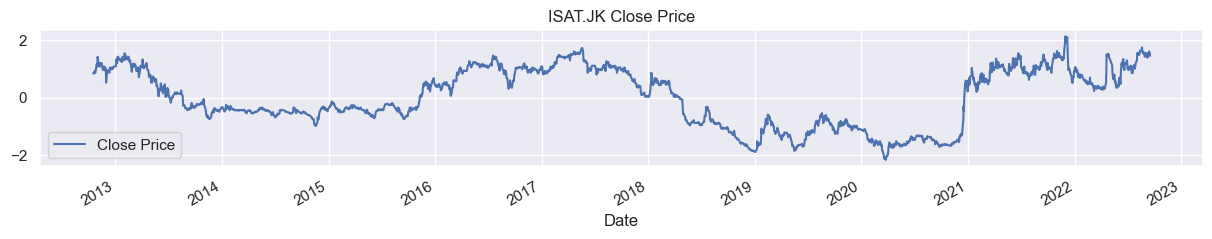

In [3]:
df['Close'].plot(figsize=(15,2))
plt.legend(['Close Price'])
plt.title('ISAT.JK Close Price')

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

print("The best hyperparameters are ",search.best_params_)

[0]	validation_0-rmse:1.14705
[1]	validation_0-rmse:1.13579
[2]	validation_0-rmse:1.12463
[3]	validation_0-rmse:1.11360
[4]	validation_0-rmse:1.10267
[5]	validation_0-rmse:1.09185
[6]	validation_0-rmse:1.08114
[7]	validation_0-rmse:1.07055
[8]	validation_0-rmse:1.06005
[9]	validation_0-rmse:1.04966
[10]	validation_0-rmse:1.03938
[11]	validation_0-rmse:1.02920
[12]	validation_0-rmse:1.01913
[13]	validation_0-rmse:1.00916
[14]	validation_0-rmse:0.99929
[15]	validation_0-rmse:0.98951
[16]	validation_0-rmse:0.97983
[17]	validation_0-rmse:0.97026
[18]	validation_0-rmse:0.96077
[19]	validation_0-rmse:0.95139
[20]	validation_0-rmse:0.94211
[21]	validation_0-rmse:0.93290
[22]	validation_0-rmse:0.92379
[23]	validation_0-rmse:0.91479
[24]	validation_0-rmse:0.90585
[25]	validation_0-rmse:0.89701
[26]	validation_0-rmse:0.88828
[27]	validation_0-rmse:0.87962
[28]	validation_0-rmse:0.87106
[29]	validation_0-rmse:0.86257
[30]	validation_0-rmse:0.85418
[31]	validation_0-rmse:0.84586
[32]	validation_0-

[260]	validation_0-rmse:0.13532
[261]	validation_0-rmse:0.13475
[262]	validation_0-rmse:0.13418
[263]	validation_0-rmse:0.13363
[264]	validation_0-rmse:0.13309
[265]	validation_0-rmse:0.13256
[266]	validation_0-rmse:0.13204
[267]	validation_0-rmse:0.13152
[268]	validation_0-rmse:0.13100
[269]	validation_0-rmse:0.13050
[270]	validation_0-rmse:0.13001
[271]	validation_0-rmse:0.12952
[272]	validation_0-rmse:0.12904
[273]	validation_0-rmse:0.12857
[274]	validation_0-rmse:0.12810
[275]	validation_0-rmse:0.12763
[276]	validation_0-rmse:0.12717
[277]	validation_0-rmse:0.12673
[278]	validation_0-rmse:0.12630
[279]	validation_0-rmse:0.12587
[280]	validation_0-rmse:0.12543
[281]	validation_0-rmse:0.12501
[282]	validation_0-rmse:0.12460
[283]	validation_0-rmse:0.12418
[284]	validation_0-rmse:0.12378
[285]	validation_0-rmse:0.12338
[286]	validation_0-rmse:0.12300
[287]	validation_0-rmse:0.12262
[288]	validation_0-rmse:0.12224
[289]	validation_0-rmse:0.12187
[290]	validation_0-rmse:0.12149
[291]	va

[17]	validation_0-rmse:0.96996
[18]	validation_0-rmse:0.96044
[19]	validation_0-rmse:0.95107
[20]	validation_0-rmse:0.94178
[21]	validation_0-rmse:0.93255
[22]	validation_0-rmse:0.92345
[23]	validation_0-rmse:0.91453
[24]	validation_0-rmse:0.90558
[25]	validation_0-rmse:0.89675
[26]	validation_0-rmse:0.88800
[27]	validation_0-rmse:0.87932
[28]	validation_0-rmse:0.87085
[29]	validation_0-rmse:0.86237
[30]	validation_0-rmse:0.85407
[31]	validation_0-rmse:0.84571
[32]	validation_0-rmse:0.83749
[33]	validation_0-rmse:0.82935
[34]	validation_0-rmse:0.82124
[35]	validation_0-rmse:0.81327
[36]	validation_0-rmse:0.80533
[37]	validation_0-rmse:0.79760
[38]	validation_0-rmse:0.78986
[39]	validation_0-rmse:0.78216
[40]	validation_0-rmse:0.77457
[41]	validation_0-rmse:0.76715
[42]	validation_0-rmse:0.75968
[43]	validation_0-rmse:0.75232
[44]	validation_0-rmse:0.74504
[45]	validation_0-rmse:0.73779
[46]	validation_0-rmse:0.73065
[47]	validation_0-rmse:0.72358
[48]	validation_0-rmse:0.71655
[49]	val

[276]	validation_0-rmse:0.12739
[277]	validation_0-rmse:0.12693
[278]	validation_0-rmse:0.12650
[279]	validation_0-rmse:0.12608
[280]	validation_0-rmse:0.12564
[281]	validation_0-rmse:0.12523
[282]	validation_0-rmse:0.12483
[283]	validation_0-rmse:0.12440
[284]	validation_0-rmse:0.12399
[285]	validation_0-rmse:0.12361
[286]	validation_0-rmse:0.12321
[287]	validation_0-rmse:0.12282
[288]	validation_0-rmse:0.12242
[289]	validation_0-rmse:0.12205
[290]	validation_0-rmse:0.12167
[291]	validation_0-rmse:0.12132
[292]	validation_0-rmse:0.12095
[293]	validation_0-rmse:0.12060
[294]	validation_0-rmse:0.12025
[295]	validation_0-rmse:0.11989
[296]	validation_0-rmse:0.11957
[297]	validation_0-rmse:0.11924
[298]	validation_0-rmse:0.11892
[299]	validation_0-rmse:0.11858
[300]	validation_0-rmse:0.11825
[301]	validation_0-rmse:0.11795
[302]	validation_0-rmse:0.11763
[303]	validation_0-rmse:0.11732
[304]	validation_0-rmse:0.11702
[305]	validation_0-rmse:0.11672
[306]	validation_0-rmse:0.11643
[307]	va

[34]	validation_0-rmse:0.82613
[35]	validation_0-rmse:0.81829
[36]	validation_0-rmse:0.81046
[37]	validation_0-rmse:0.80273
[38]	validation_0-rmse:0.79512
[39]	validation_0-rmse:0.78753
[40]	validation_0-rmse:0.78008
[41]	validation_0-rmse:0.77265
[42]	validation_0-rmse:0.76529
[43]	validation_0-rmse:0.75807
[44]	validation_0-rmse:0.75086
[45]	validation_0-rmse:0.74378
[46]	validation_0-rmse:0.73677
[47]	validation_0-rmse:0.72978
[48]	validation_0-rmse:0.72291
[49]	validation_0-rmse:0.71606
[50]	validation_0-rmse:0.70934
[51]	validation_0-rmse:0.70264
[52]	validation_0-rmse:0.69599
[53]	validation_0-rmse:0.68946
[54]	validation_0-rmse:0.68295
[55]	validation_0-rmse:0.67651
[56]	validation_0-rmse:0.67017
[57]	validation_0-rmse:0.66386
[58]	validation_0-rmse:0.65761
[59]	validation_0-rmse:0.65146
[60]	validation_0-rmse:0.64534
[61]	validation_0-rmse:0.63934
[62]	validation_0-rmse:0.63335
[63]	validation_0-rmse:0.62744
[64]	validation_0-rmse:0.62157
[65]	validation_0-rmse:0.61576
[66]	val

[293]	validation_0-rmse:0.14214
[294]	validation_0-rmse:0.14182
[295]	validation_0-rmse:0.14150
[296]	validation_0-rmse:0.14119
[297]	validation_0-rmse:0.14088
[298]	validation_0-rmse:0.14052
[299]	validation_0-rmse:0.14022
[300]	validation_0-rmse:0.13994
[301]	validation_0-rmse:0.13959
[302]	validation_0-rmse:0.13931
[303]	validation_0-rmse:0.13901
[304]	validation_0-rmse:0.13868
[305]	validation_0-rmse:0.13847
[306]	validation_0-rmse:0.13820
[307]	validation_0-rmse:0.13789
[308]	validation_0-rmse:0.13763
[309]	validation_0-rmse:0.13743
[310]	validation_0-rmse:0.13717
[311]	validation_0-rmse:0.13686
[312]	validation_0-rmse:0.13664
[313]	validation_0-rmse:0.13635
[314]	validation_0-rmse:0.13616
[315]	validation_0-rmse:0.13593
[316]	validation_0-rmse:0.13576
[317]	validation_0-rmse:0.13552
[318]	validation_0-rmse:0.13530
[319]	validation_0-rmse:0.13508
[320]	validation_0-rmse:0.13489
[321]	validation_0-rmse:0.13469
[322]	validation_0-rmse:0.13453
[323]	validation_0-rmse:0.13432
[324]	va

[51]	validation_0-rmse:0.69971
[52]	validation_0-rmse:0.69301
[53]	validation_0-rmse:0.68643
[54]	validation_0-rmse:0.67989
[55]	validation_0-rmse:0.67339
[56]	validation_0-rmse:0.66699
[57]	validation_0-rmse:0.66062
[58]	validation_0-rmse:0.65433
[59]	validation_0-rmse:0.64808
[60]	validation_0-rmse:0.64192
[61]	validation_0-rmse:0.63580
[62]	validation_0-rmse:0.62977
[63]	validation_0-rmse:0.62380
[64]	validation_0-rmse:0.61787
[65]	validation_0-rmse:0.61202
[66]	validation_0-rmse:0.60620
[67]	validation_0-rmse:0.60045
[68]	validation_0-rmse:0.59477
[69]	validation_0-rmse:0.58913
[70]	validation_0-rmse:0.58359
[71]	validation_0-rmse:0.57811
[72]	validation_0-rmse:0.57265
[73]	validation_0-rmse:0.56725
[74]	validation_0-rmse:0.56189
[75]	validation_0-rmse:0.55662
[76]	validation_0-rmse:0.55137
[77]	validation_0-rmse:0.54619
[78]	validation_0-rmse:0.54103
[79]	validation_0-rmse:0.53596
[80]	validation_0-rmse:0.53090
[81]	validation_0-rmse:0.52595
[82]	validation_0-rmse:0.52104
[83]	val

[309]	validation_0-rmse:0.11761
[310]	validation_0-rmse:0.11737
[311]	validation_0-rmse:0.11710
[312]	validation_0-rmse:0.11686
[313]	validation_0-rmse:0.11659
[314]	validation_0-rmse:0.11636
[315]	validation_0-rmse:0.11610
[316]	validation_0-rmse:0.11585
[317]	validation_0-rmse:0.11562
[318]	validation_0-rmse:0.11538
[319]	validation_0-rmse:0.11516
[320]	validation_0-rmse:0.11493
[321]	validation_0-rmse:0.11472
[322]	validation_0-rmse:0.11451
[323]	validation_0-rmse:0.11429
[324]	validation_0-rmse:0.11408
[325]	validation_0-rmse:0.11387
[326]	validation_0-rmse:0.11364
[327]	validation_0-rmse:0.11345
[328]	validation_0-rmse:0.11327
[329]	validation_0-rmse:0.11306
[330]	validation_0-rmse:0.11288
[331]	validation_0-rmse:0.11271
[332]	validation_0-rmse:0.11250
[333]	validation_0-rmse:0.11233
[334]	validation_0-rmse:0.11212
[335]	validation_0-rmse:0.11192
[336]	validation_0-rmse:0.11176
[337]	validation_0-rmse:0.11158
[338]	validation_0-rmse:0.11139
[339]	validation_0-rmse:0.11121
[340]	va

[68]	validation_0-rmse:0.59714
[69]	validation_0-rmse:0.59157
[70]	validation_0-rmse:0.58605
[71]	validation_0-rmse:0.58060
[72]	validation_0-rmse:0.57520
[73]	validation_0-rmse:0.56977
[74]	validation_0-rmse:0.56447
[75]	validation_0-rmse:0.55922
[76]	validation_0-rmse:0.55397
[77]	validation_0-rmse:0.54884
[78]	validation_0-rmse:0.54368
[79]	validation_0-rmse:0.53866
[80]	validation_0-rmse:0.53367
[81]	validation_0-rmse:0.52875
[82]	validation_0-rmse:0.52380
[83]	validation_0-rmse:0.51897
[84]	validation_0-rmse:0.51419
[85]	validation_0-rmse:0.50938
[86]	validation_0-rmse:0.50471
[87]	validation_0-rmse:0.50007
[88]	validation_0-rmse:0.49548
[89]	validation_0-rmse:0.49086
[90]	validation_0-rmse:0.48638
[91]	validation_0-rmse:0.48195
[92]	validation_0-rmse:0.47748
[93]	validation_0-rmse:0.47314
[94]	validation_0-rmse:0.46883
[95]	validation_0-rmse:0.46450
[96]	validation_0-rmse:0.46028
[97]	validation_0-rmse:0.45610
[98]	validation_0-rmse:0.45198
[99]	validation_0-rmse:0.44781
[100]	va

[326]	validation_0-rmse:0.11915
[327]	validation_0-rmse:0.11896
[328]	validation_0-rmse:0.11873
[329]	validation_0-rmse:0.11854
[330]	validation_0-rmse:0.11833
[331]	validation_0-rmse:0.11812
[332]	validation_0-rmse:0.11794
[333]	validation_0-rmse:0.11773
[334]	validation_0-rmse:0.11756
[335]	validation_0-rmse:0.11734
[336]	validation_0-rmse:0.11713
[337]	validation_0-rmse:0.11695
[338]	validation_0-rmse:0.11678
[339]	validation_0-rmse:0.11662
[340]	validation_0-rmse:0.11642
[341]	validation_0-rmse:0.11626
[342]	validation_0-rmse:0.11607
[343]	validation_0-rmse:0.11590
[344]	validation_0-rmse:0.11573
[345]	validation_0-rmse:0.11556
[346]	validation_0-rmse:0.11537
[347]	validation_0-rmse:0.11521
[348]	validation_0-rmse:0.11505
[349]	validation_0-rmse:0.11490
[350]	validation_0-rmse:0.11472
[351]	validation_0-rmse:0.11457
[352]	validation_0-rmse:0.11442
[353]	validation_0-rmse:0.11424
[354]	validation_0-rmse:0.11409
[355]	validation_0-rmse:0.11393
[356]	validation_0-rmse:0.11379
[357]	va

[85]	validation_0-rmse:0.50261
[86]	validation_0-rmse:0.49788
[87]	validation_0-rmse:0.49321
[88]	validation_0-rmse:0.48856
[89]	validation_0-rmse:0.48398
[90]	validation_0-rmse:0.47942
[91]	validation_0-rmse:0.47494
[92]	validation_0-rmse:0.47050
[93]	validation_0-rmse:0.46611
[94]	validation_0-rmse:0.46175
[95]	validation_0-rmse:0.45744
[96]	validation_0-rmse:0.45320
[97]	validation_0-rmse:0.44897
[98]	validation_0-rmse:0.44480
[99]	validation_0-rmse:0.44067
[100]	validation_0-rmse:0.43658
[101]	validation_0-rmse:0.43254
[102]	validation_0-rmse:0.42853
[103]	validation_0-rmse:0.42457
[104]	validation_0-rmse:0.42067
[105]	validation_0-rmse:0.41678
[106]	validation_0-rmse:0.41295
[107]	validation_0-rmse:0.40913
[108]	validation_0-rmse:0.40537
[109]	validation_0-rmse:0.40167
[110]	validation_0-rmse:0.39797
[111]	validation_0-rmse:0.39432
[112]	validation_0-rmse:0.39071
[113]	validation_0-rmse:0.38715
[114]	validation_0-rmse:0.38361
[115]	validation_0-rmse:0.38012
[116]	validation_0-rmse

[342]	validation_0-rmse:0.10828
[343]	validation_0-rmse:0.10812
[344]	validation_0-rmse:0.10795
[345]	validation_0-rmse:0.10779
[346]	validation_0-rmse:0.10763
[347]	validation_0-rmse:0.10748
[348]	validation_0-rmse:0.10734
[349]	validation_0-rmse:0.10719
[350]	validation_0-rmse:0.10704
[351]	validation_0-rmse:0.10690
[352]	validation_0-rmse:0.10675
[353]	validation_0-rmse:0.10661
[354]	validation_0-rmse:0.10648
[355]	validation_0-rmse:0.10636
[356]	validation_0-rmse:0.10623
[357]	validation_0-rmse:0.10611
[358]	validation_0-rmse:0.10597
[359]	validation_0-rmse:0.10585
[360]	validation_0-rmse:0.10574
[361]	validation_0-rmse:0.10562
[362]	validation_0-rmse:0.10552
[363]	validation_0-rmse:0.10539
[364]	validation_0-rmse:0.10527
[365]	validation_0-rmse:0.10517
[366]	validation_0-rmse:0.10504
[367]	validation_0-rmse:0.10494
[368]	validation_0-rmse:0.10484
[369]	validation_0-rmse:0.10474
[370]	validation_0-rmse:0.10464
[371]	validation_0-rmse:0.10453
[372]	validation_0-rmse:0.10442
[373]	va

[599]	validation_0-rmse:0.09453
[0]	validation_0-rmse:1.14702
[1]	validation_0-rmse:1.13572
[2]	validation_0-rmse:1.12454
[3]	validation_0-rmse:1.11347
[4]	validation_0-rmse:1.10252
[5]	validation_0-rmse:1.09170
[6]	validation_0-rmse:1.08097
[7]	validation_0-rmse:1.07038
[8]	validation_0-rmse:1.05986
[9]	validation_0-rmse:1.04948
[10]	validation_0-rmse:1.03917
[11]	validation_0-rmse:1.02899
[12]	validation_0-rmse:1.01889
[13]	validation_0-rmse:1.00888
[14]	validation_0-rmse:0.99901
[15]	validation_0-rmse:0.98924
[16]	validation_0-rmse:0.97953
[17]	validation_0-rmse:0.96996
[18]	validation_0-rmse:0.96044
[19]	validation_0-rmse:0.95107
[20]	validation_0-rmse:0.94178
[21]	validation_0-rmse:0.93255
[22]	validation_0-rmse:0.92345
[23]	validation_0-rmse:0.91453
[24]	validation_0-rmse:0.90558
[25]	validation_0-rmse:0.89675
[26]	validation_0-rmse:0.88800
[27]	validation_0-rmse:0.87932
[28]	validation_0-rmse:0.87085
[29]	validation_0-rmse:0.86237
[30]	validation_0-rmse:0.85407
[31]	validation_0

[259]	validation_0-rmse:0.13616
[260]	validation_0-rmse:0.13557
[261]	validation_0-rmse:0.13499
[262]	validation_0-rmse:0.13444
[263]	validation_0-rmse:0.13390
[264]	validation_0-rmse:0.13334
[265]	validation_0-rmse:0.13282
[266]	validation_0-rmse:0.13231
[267]	validation_0-rmse:0.13177
[268]	validation_0-rmse:0.13125
[269]	validation_0-rmse:0.13075
[270]	validation_0-rmse:0.13024
[271]	validation_0-rmse:0.12973
[272]	validation_0-rmse:0.12926
[273]	validation_0-rmse:0.12880
[274]	validation_0-rmse:0.12832
[275]	validation_0-rmse:0.12787
[276]	validation_0-rmse:0.12739
[277]	validation_0-rmse:0.12693
[278]	validation_0-rmse:0.12650
[279]	validation_0-rmse:0.12608
[280]	validation_0-rmse:0.12564
[281]	validation_0-rmse:0.12523
[282]	validation_0-rmse:0.12483
[283]	validation_0-rmse:0.12440
[284]	validation_0-rmse:0.12399
[285]	validation_0-rmse:0.12361
[286]	validation_0-rmse:0.12321
[287]	validation_0-rmse:0.12282
[288]	validation_0-rmse:0.12242
[289]	validation_0-rmse:0.12205
[290]	va

[515]	validation_0-rmse:0.09524
[516]	validation_0-rmse:0.09520
[517]	validation_0-rmse:0.09517
[518]	validation_0-rmse:0.09513
[519]	validation_0-rmse:0.09511
[520]	validation_0-rmse:0.09507
[521]	validation_0-rmse:0.09506
[522]	validation_0-rmse:0.09501
[523]	validation_0-rmse:0.09500
[524]	validation_0-rmse:0.09496
[525]	validation_0-rmse:0.09495
[526]	validation_0-rmse:0.09492
[527]	validation_0-rmse:0.09491
[528]	validation_0-rmse:0.09488
[529]	validation_0-rmse:0.09485
[530]	validation_0-rmse:0.09484
[531]	validation_0-rmse:0.09483
[532]	validation_0-rmse:0.09480
[533]	validation_0-rmse:0.09479
[534]	validation_0-rmse:0.09476
[535]	validation_0-rmse:0.09473
[536]	validation_0-rmse:0.09470
[537]	validation_0-rmse:0.09469
[538]	validation_0-rmse:0.09468
[539]	validation_0-rmse:0.09465
[540]	validation_0-rmse:0.09463
[541]	validation_0-rmse:0.09459
[542]	validation_0-rmse:0.09458
[543]	validation_0-rmse:0.09457
[544]	validation_0-rmse:0.09454
[545]	validation_0-rmse:0.09454
[546]	va

[175]	validation_0-rmse:0.24242
[176]	validation_0-rmse:0.24076
[177]	validation_0-rmse:0.23909
[178]	validation_0-rmse:0.23749
[179]	validation_0-rmse:0.23584
[180]	validation_0-rmse:0.23427
[181]	validation_0-rmse:0.23271
[182]	validation_0-rmse:0.23113
[183]	validation_0-rmse:0.22954
[184]	validation_0-rmse:0.22805
[185]	validation_0-rmse:0.22652
[186]	validation_0-rmse:0.22508
[187]	validation_0-rmse:0.22358
[188]	validation_0-rmse:0.22216
[189]	validation_0-rmse:0.22076
[190]	validation_0-rmse:0.21937
[191]	validation_0-rmse:0.21802
[192]	validation_0-rmse:0.21668
[193]	validation_0-rmse:0.21534
[194]	validation_0-rmse:0.21403
[195]	validation_0-rmse:0.21274
[196]	validation_0-rmse:0.21141
[197]	validation_0-rmse:0.21014
[198]	validation_0-rmse:0.20882
[199]	validation_0-rmse:0.20758
[200]	validation_0-rmse:0.20638
[201]	validation_0-rmse:0.20518
[202]	validation_0-rmse:0.20400
[203]	validation_0-rmse:0.20276
[204]	validation_0-rmse:0.20154
[205]	validation_0-rmse:0.20040
[206]	va

[432]	validation_0-rmse:0.12295
[433]	validation_0-rmse:0.12296
[434]	validation_0-rmse:0.12297
[435]	validation_0-rmse:0.12293
[436]	validation_0-rmse:0.12294
[437]	validation_0-rmse:0.12289
[438]	validation_0-rmse:0.12282
[439]	validation_0-rmse:0.12279
[440]	validation_0-rmse:0.12280
[441]	validation_0-rmse:0.12281
[442]	validation_0-rmse:0.12276
[443]	validation_0-rmse:0.12277
[444]	validation_0-rmse:0.12273
[445]	validation_0-rmse:0.12274
[446]	validation_0-rmse:0.12275
[447]	validation_0-rmse:0.12271
[448]	validation_0-rmse:0.12273
[449]	validation_0-rmse:0.12268
[450]	validation_0-rmse:0.12269
[451]	validation_0-rmse:0.12265
[452]	validation_0-rmse:0.12266
[453]	validation_0-rmse:0.12259
[454]	validation_0-rmse:0.12252
[455]	validation_0-rmse:0.12254
[456]	validation_0-rmse:0.12249
[457]	validation_0-rmse:0.12252
[458]	validation_0-rmse:0.12251
[459]	validation_0-rmse:0.12248
[460]	validation_0-rmse:0.12246
[461]	validation_0-rmse:0.12240
[462]	validation_0-rmse:0.12238
[463]	va

[92]	validation_0-rmse:0.47446
[93]	validation_0-rmse:0.47003
[94]	validation_0-rmse:0.46572
[95]	validation_0-rmse:0.46140
[96]	validation_0-rmse:0.45717
[97]	validation_0-rmse:0.45292
[98]	validation_0-rmse:0.44876
[99]	validation_0-rmse:0.44463
[100]	validation_0-rmse:0.44055
[101]	validation_0-rmse:0.43648
[102]	validation_0-rmse:0.43250
[103]	validation_0-rmse:0.42850
[104]	validation_0-rmse:0.42459
[105]	validation_0-rmse:0.42067
[106]	validation_0-rmse:0.41685
[107]	validation_0-rmse:0.41308
[108]	validation_0-rmse:0.40929
[109]	validation_0-rmse:0.40556
[110]	validation_0-rmse:0.40188
[111]	validation_0-rmse:0.39824
[112]	validation_0-rmse:0.39463
[113]	validation_0-rmse:0.39101
[114]	validation_0-rmse:0.38751
[115]	validation_0-rmse:0.38400
[116]	validation_0-rmse:0.38049
[117]	validation_0-rmse:0.37706
[118]	validation_0-rmse:0.37367
[119]	validation_0-rmse:0.37028
[120]	validation_0-rmse:0.36697
[121]	validation_0-rmse:0.36370
[122]	validation_0-rmse:0.36042
[123]	validation

[349]	validation_0-rmse:0.10961
[350]	validation_0-rmse:0.10945
[351]	validation_0-rmse:0.10931
[352]	validation_0-rmse:0.10916
[353]	validation_0-rmse:0.10901
[354]	validation_0-rmse:0.10886
[355]	validation_0-rmse:0.10871
[356]	validation_0-rmse:0.10858
[357]	validation_0-rmse:0.10845
[358]	validation_0-rmse:0.10831
[359]	validation_0-rmse:0.10817
[360]	validation_0-rmse:0.10804
[361]	validation_0-rmse:0.10791
[362]	validation_0-rmse:0.10778
[363]	validation_0-rmse:0.10767
[364]	validation_0-rmse:0.10755
[365]	validation_0-rmse:0.10742
[366]	validation_0-rmse:0.10733
[367]	validation_0-rmse:0.10721
[368]	validation_0-rmse:0.10710
[369]	validation_0-rmse:0.10700
[370]	validation_0-rmse:0.10689
[371]	validation_0-rmse:0.10678
[372]	validation_0-rmse:0.10668
[373]	validation_0-rmse:0.10657
[374]	validation_0-rmse:0.10648
[375]	validation_0-rmse:0.10638
[376]	validation_0-rmse:0.10629
[377]	validation_0-rmse:0.10619
[378]	validation_0-rmse:0.10610
[379]	validation_0-rmse:0.10601
[380]	va

[6]	validation_0-rmse:1.08191
[7]	validation_0-rmse:1.07141
[8]	validation_0-rmse:1.06102
[9]	validation_0-rmse:1.05073
[10]	validation_0-rmse:1.04056
[11]	validation_0-rmse:1.03047
[12]	validation_0-rmse:1.02051
[13]	validation_0-rmse:1.01063
[14]	validation_0-rmse:1.00086
[15]	validation_0-rmse:0.99117
[16]	validation_0-rmse:0.98160
[17]	validation_0-rmse:0.97211
[18]	validation_0-rmse:0.96272
[19]	validation_0-rmse:0.95342
[20]	validation_0-rmse:0.94423
[21]	validation_0-rmse:0.93511
[22]	validation_0-rmse:0.92611
[23]	validation_0-rmse:0.91718
[24]	validation_0-rmse:0.90833
[25]	validation_0-rmse:0.89956
[26]	validation_0-rmse:0.89090
[27]	validation_0-rmse:0.88245
[28]	validation_0-rmse:0.87396
[29]	validation_0-rmse:0.86561
[30]	validation_0-rmse:0.85727
[31]	validation_0-rmse:0.84908
[32]	validation_0-rmse:0.84096
[33]	validation_0-rmse:0.83288
[34]	validation_0-rmse:0.82494
[35]	validation_0-rmse:0.81712
[36]	validation_0-rmse:0.80938
[37]	validation_0-rmse:0.80172
[38]	validat

[266]	validation_0-rmse:0.14056
[267]	validation_0-rmse:0.13998
[268]	validation_0-rmse:0.13946
[269]	validation_0-rmse:0.13893
[270]	validation_0-rmse:0.13839
[271]	validation_0-rmse:0.13789
[272]	validation_0-rmse:0.13738
[273]	validation_0-rmse:0.13690
[274]	validation_0-rmse:0.13644
[275]	validation_0-rmse:0.13597
[276]	validation_0-rmse:0.13550
[277]	validation_0-rmse:0.13504
[278]	validation_0-rmse:0.13460
[279]	validation_0-rmse:0.13418
[280]	validation_0-rmse:0.13376
[281]	validation_0-rmse:0.13331
[282]	validation_0-rmse:0.13283
[283]	validation_0-rmse:0.13241
[284]	validation_0-rmse:0.13201
[285]	validation_0-rmse:0.13159
[286]	validation_0-rmse:0.13118
[287]	validation_0-rmse:0.13079
[288]	validation_0-rmse:0.13040
[289]	validation_0-rmse:0.13000
[290]	validation_0-rmse:0.12961
[291]	validation_0-rmse:0.12925
[292]	validation_0-rmse:0.12887
[293]	validation_0-rmse:0.12850
[294]	validation_0-rmse:0.12809
[295]	validation_0-rmse:0.12774
[296]	validation_0-rmse:0.12741
[297]	va

[522]	validation_0-rmse:0.10142
[523]	validation_0-rmse:0.10136
[524]	validation_0-rmse:0.10135
[525]	validation_0-rmse:0.10131
[526]	validation_0-rmse:0.10128
[527]	validation_0-rmse:0.10123
[528]	validation_0-rmse:0.10120
[529]	validation_0-rmse:0.10116
[530]	validation_0-rmse:0.10113
[531]	validation_0-rmse:0.10108
[532]	validation_0-rmse:0.10107
[533]	validation_0-rmse:0.10104
[534]	validation_0-rmse:0.10099
[535]	validation_0-rmse:0.10095
[536]	validation_0-rmse:0.10094
[537]	validation_0-rmse:0.10091
[538]	validation_0-rmse:0.10089
[539]	validation_0-rmse:0.10086
[540]	validation_0-rmse:0.10083
[541]	validation_0-rmse:0.10079
[542]	validation_0-rmse:0.10078
[543]	validation_0-rmse:0.10075
[544]	validation_0-rmse:0.10072
[545]	validation_0-rmse:0.10068
[546]	validation_0-rmse:0.10065
[547]	validation_0-rmse:0.10060
[548]	validation_0-rmse:0.10058
[549]	validation_0-rmse:0.10055
[550]	validation_0-rmse:0.10054
[551]	validation_0-rmse:0.10051
[552]	validation_0-rmse:0.10048
[553]	va

[182]	validation_0-rmse:0.21550
[183]	validation_0-rmse:0.21388
[184]	validation_0-rmse:0.21229
[185]	validation_0-rmse:0.21070
[186]	validation_0-rmse:0.20914
[187]	validation_0-rmse:0.20759
[188]	validation_0-rmse:0.20607
[189]	validation_0-rmse:0.20458
[190]	validation_0-rmse:0.20308
[191]	validation_0-rmse:0.20162
[192]	validation_0-rmse:0.20017
[193]	validation_0-rmse:0.19875
[194]	validation_0-rmse:0.19733
[195]	validation_0-rmse:0.19594
[196]	validation_0-rmse:0.19457
[197]	validation_0-rmse:0.19320
[198]	validation_0-rmse:0.19185
[199]	validation_0-rmse:0.19053
[200]	validation_0-rmse:0.18922
[201]	validation_0-rmse:0.18794
[202]	validation_0-rmse:0.18665
[203]	validation_0-rmse:0.18540
[204]	validation_0-rmse:0.18416
[205]	validation_0-rmse:0.18294
[206]	validation_0-rmse:0.18173
[207]	validation_0-rmse:0.18053
[208]	validation_0-rmse:0.17934
[209]	validation_0-rmse:0.17819
[210]	validation_0-rmse:0.17705
[211]	validation_0-rmse:0.17591
[212]	validation_0-rmse:0.17480
[213]	va

[439]	validation_0-rmse:0.09970
[440]	validation_0-rmse:0.09965
[441]	validation_0-rmse:0.09959
[442]	validation_0-rmse:0.09955
[443]	validation_0-rmse:0.09952
[444]	validation_0-rmse:0.09946
[445]	validation_0-rmse:0.09941
[446]	validation_0-rmse:0.09937
[447]	validation_0-rmse:0.09931
[448]	validation_0-rmse:0.09928
[449]	validation_0-rmse:0.09924
[450]	validation_0-rmse:0.09919
[451]	validation_0-rmse:0.09915
[452]	validation_0-rmse:0.09909
[453]	validation_0-rmse:0.09906
[454]	validation_0-rmse:0.09901
[455]	validation_0-rmse:0.09897
[456]	validation_0-rmse:0.09892
[457]	validation_0-rmse:0.09889
[458]	validation_0-rmse:0.09884
[459]	validation_0-rmse:0.09878
[460]	validation_0-rmse:0.09875
[461]	validation_0-rmse:0.09870
[462]	validation_0-rmse:0.09864
[463]	validation_0-rmse:0.09860
[464]	validation_0-rmse:0.09854
[465]	validation_0-rmse:0.09849
[466]	validation_0-rmse:0.09845
[467]	validation_0-rmse:0.09841
[468]	validation_0-rmse:0.09837
[469]	validation_0-rmse:0.09831
[470]	va

[696]	validation_0-rmse:0.09264
[697]	validation_0-rmse:0.09263
[698]	validation_0-rmse:0.09262
[699]	validation_0-rmse:0.09260
[0]	validation_0-rmse:1.14702
[1]	validation_0-rmse:1.13572
[2]	validation_0-rmse:1.12454
[3]	validation_0-rmse:1.11347
[4]	validation_0-rmse:1.10252
[5]	validation_0-rmse:1.09170
[6]	validation_0-rmse:1.08097
[7]	validation_0-rmse:1.07038
[8]	validation_0-rmse:1.05986
[9]	validation_0-rmse:1.04948
[10]	validation_0-rmse:1.03917
[11]	validation_0-rmse:1.02899
[12]	validation_0-rmse:1.01889
[13]	validation_0-rmse:1.00888
[14]	validation_0-rmse:0.99901
[15]	validation_0-rmse:0.98924
[16]	validation_0-rmse:0.97953
[17]	validation_0-rmse:0.96996
[18]	validation_0-rmse:0.96044
[19]	validation_0-rmse:0.95107
[20]	validation_0-rmse:0.94178
[21]	validation_0-rmse:0.93255
[22]	validation_0-rmse:0.92345
[23]	validation_0-rmse:0.91453
[24]	validation_0-rmse:0.90558
[25]	validation_0-rmse:0.89675
[26]	validation_0-rmse:0.88800
[27]	validation_0-rmse:0.87932
[28]	validatio

[256]	validation_0-rmse:0.13796
[257]	validation_0-rmse:0.13735
[258]	validation_0-rmse:0.13674
[259]	validation_0-rmse:0.13616
[260]	validation_0-rmse:0.13557
[261]	validation_0-rmse:0.13499
[262]	validation_0-rmse:0.13444
[263]	validation_0-rmse:0.13390
[264]	validation_0-rmse:0.13334
[265]	validation_0-rmse:0.13282
[266]	validation_0-rmse:0.13231
[267]	validation_0-rmse:0.13177
[268]	validation_0-rmse:0.13125
[269]	validation_0-rmse:0.13075
[270]	validation_0-rmse:0.13024
[271]	validation_0-rmse:0.12973
[272]	validation_0-rmse:0.12926
[273]	validation_0-rmse:0.12880
[274]	validation_0-rmse:0.12832
[275]	validation_0-rmse:0.12787
[276]	validation_0-rmse:0.12739
[277]	validation_0-rmse:0.12693
[278]	validation_0-rmse:0.12650
[279]	validation_0-rmse:0.12608
[280]	validation_0-rmse:0.12564
[281]	validation_0-rmse:0.12523
[282]	validation_0-rmse:0.12483
[283]	validation_0-rmse:0.12440
[284]	validation_0-rmse:0.12399
[285]	validation_0-rmse:0.12361
[286]	validation_0-rmse:0.12321
[287]	va

[513]	validation_0-rmse:0.09532
[514]	validation_0-rmse:0.09528
[515]	validation_0-rmse:0.09524
[516]	validation_0-rmse:0.09520
[517]	validation_0-rmse:0.09517
[518]	validation_0-rmse:0.09513
[519]	validation_0-rmse:0.09511
[520]	validation_0-rmse:0.09507
[521]	validation_0-rmse:0.09506
[522]	validation_0-rmse:0.09501
[523]	validation_0-rmse:0.09500
[524]	validation_0-rmse:0.09496
[525]	validation_0-rmse:0.09495
[526]	validation_0-rmse:0.09492
[527]	validation_0-rmse:0.09491
[528]	validation_0-rmse:0.09488
[529]	validation_0-rmse:0.09485
[530]	validation_0-rmse:0.09484
[531]	validation_0-rmse:0.09483
[532]	validation_0-rmse:0.09480
[533]	validation_0-rmse:0.09479
[534]	validation_0-rmse:0.09476
[535]	validation_0-rmse:0.09473
[536]	validation_0-rmse:0.09470
[537]	validation_0-rmse:0.09469
[538]	validation_0-rmse:0.09468
[539]	validation_0-rmse:0.09465
[540]	validation_0-rmse:0.09463
[541]	validation_0-rmse:0.09459
[542]	validation_0-rmse:0.09458
[543]	validation_0-rmse:0.09457
[544]	va

[72]	validation_0-rmse:0.57681
[73]	validation_0-rmse:0.57150
[74]	validation_0-rmse:0.56620
[75]	validation_0-rmse:0.56096
[76]	validation_0-rmse:0.55578
[77]	validation_0-rmse:0.55068
[78]	validation_0-rmse:0.54560
[79]	validation_0-rmse:0.54058
[80]	validation_0-rmse:0.53560
[81]	validation_0-rmse:0.53067
[82]	validation_0-rmse:0.52579
[83]	validation_0-rmse:0.52101
[84]	validation_0-rmse:0.51623
[85]	validation_0-rmse:0.51151
[86]	validation_0-rmse:0.50683
[87]	validation_0-rmse:0.50221
[88]	validation_0-rmse:0.49763
[89]	validation_0-rmse:0.49310
[90]	validation_0-rmse:0.48866
[91]	validation_0-rmse:0.48422
[92]	validation_0-rmse:0.47984
[93]	validation_0-rmse:0.47549
[94]	validation_0-rmse:0.47125
[95]	validation_0-rmse:0.46700
[96]	validation_0-rmse:0.46279
[97]	validation_0-rmse:0.45864
[98]	validation_0-rmse:0.45452
[99]	validation_0-rmse:0.45048
[100]	validation_0-rmse:0.44646
[101]	validation_0-rmse:0.44247
[102]	validation_0-rmse:0.43852
[103]	validation_0-rmse:0.43467
[104

[329]	validation_0-rmse:0.13323
[330]	validation_0-rmse:0.13306
[331]	validation_0-rmse:0.13289
[332]	validation_0-rmse:0.13276
[333]	validation_0-rmse:0.13257
[334]	validation_0-rmse:0.13241
[335]	validation_0-rmse:0.13221
[336]	validation_0-rmse:0.13208
[337]	validation_0-rmse:0.13192
[338]	validation_0-rmse:0.13175
[339]	validation_0-rmse:0.13164
[340]	validation_0-rmse:0.13148
[341]	validation_0-rmse:0.13131
[342]	validation_0-rmse:0.13114
[343]	validation_0-rmse:0.13098
[344]	validation_0-rmse:0.13087
[345]	validation_0-rmse:0.13070
[346]	validation_0-rmse:0.13056
[347]	validation_0-rmse:0.13040
[348]	validation_0-rmse:0.13025
[349]	validation_0-rmse:0.13009
[350]	validation_0-rmse:0.12999
[351]	validation_0-rmse:0.12983
[352]	validation_0-rmse:0.12969
[353]	validation_0-rmse:0.12959
[354]	validation_0-rmse:0.12944
[355]	validation_0-rmse:0.12937
[356]	validation_0-rmse:0.12923
[357]	validation_0-rmse:0.12910
[358]	validation_0-rmse:0.12897
[359]	validation_0-rmse:0.12884
[360]	va

[586]	validation_0-rmse:0.12008
[587]	validation_0-rmse:0.12007
[588]	validation_0-rmse:0.12003
[589]	validation_0-rmse:0.12002
[590]	validation_0-rmse:0.12000
[591]	validation_0-rmse:0.11998
[592]	validation_0-rmse:0.11995
[593]	validation_0-rmse:0.11994
[594]	validation_0-rmse:0.11992
[595]	validation_0-rmse:0.11990
[596]	validation_0-rmse:0.11991
[597]	validation_0-rmse:0.11989
[598]	validation_0-rmse:0.11987
[599]	validation_0-rmse:0.11986
[600]	validation_0-rmse:0.11983
[601]	validation_0-rmse:0.11983
[602]	validation_0-rmse:0.11981
[603]	validation_0-rmse:0.11979
[604]	validation_0-rmse:0.11978
[605]	validation_0-rmse:0.11975
[606]	validation_0-rmse:0.11973
[607]	validation_0-rmse:0.11971
[608]	validation_0-rmse:0.11969
[609]	validation_0-rmse:0.11966
[610]	validation_0-rmse:0.11965
[611]	validation_0-rmse:0.11963
[612]	validation_0-rmse:0.11961
[613]	validation_0-rmse:0.11958
[614]	validation_0-rmse:0.11957
[615]	validation_0-rmse:0.11954
[616]	validation_0-rmse:0.11953
[617]	va

[146]	validation_0-rmse:0.29183
[147]	validation_0-rmse:0.28933
[148]	validation_0-rmse:0.28689
[149]	validation_0-rmse:0.28441
[150]	validation_0-rmse:0.28198
[151]	validation_0-rmse:0.27958
[152]	validation_0-rmse:0.27725
[153]	validation_0-rmse:0.27500
[154]	validation_0-rmse:0.27269
[155]	validation_0-rmse:0.27042
[156]	validation_0-rmse:0.26820
[157]	validation_0-rmse:0.26597
[158]	validation_0-rmse:0.26373
[159]	validation_0-rmse:0.26158
[160]	validation_0-rmse:0.25948
[161]	validation_0-rmse:0.25736
[162]	validation_0-rmse:0.25524
[163]	validation_0-rmse:0.25318
[164]	validation_0-rmse:0.25119
[165]	validation_0-rmse:0.24912
[166]	validation_0-rmse:0.24709
[167]	validation_0-rmse:0.24515
[168]	validation_0-rmse:0.24317
[169]	validation_0-rmse:0.24122
[170]	validation_0-rmse:0.23930
[171]	validation_0-rmse:0.23738
[172]	validation_0-rmse:0.23550
[173]	validation_0-rmse:0.23367
[174]	validation_0-rmse:0.23188
[175]	validation_0-rmse:0.23005
[176]	validation_0-rmse:0.22827
[177]	va

[403]	validation_0-rmse:0.10403
[404]	validation_0-rmse:0.10397
[405]	validation_0-rmse:0.10389
[406]	validation_0-rmse:0.10382
[407]	validation_0-rmse:0.10375
[408]	validation_0-rmse:0.10370
[409]	validation_0-rmse:0.10364
[410]	validation_0-rmse:0.10357
[411]	validation_0-rmse:0.10351
[412]	validation_0-rmse:0.10347
[413]	validation_0-rmse:0.10341
[414]	validation_0-rmse:0.10336
[415]	validation_0-rmse:0.10332
[416]	validation_0-rmse:0.10327
[417]	validation_0-rmse:0.10322
[418]	validation_0-rmse:0.10316
[419]	validation_0-rmse:0.10311
[420]	validation_0-rmse:0.10307
[421]	validation_0-rmse:0.10300
[422]	validation_0-rmse:0.10295
[423]	validation_0-rmse:0.10291
[424]	validation_0-rmse:0.10288
[425]	validation_0-rmse:0.10284
[426]	validation_0-rmse:0.10279
[427]	validation_0-rmse:0.10275
[428]	validation_0-rmse:0.10269
[429]	validation_0-rmse:0.10265
[430]	validation_0-rmse:0.10261
[431]	validation_0-rmse:0.10256
[432]	validation_0-rmse:0.10253
[433]	validation_0-rmse:0.10249
[434]	va

[660]	validation_0-rmse:0.09718
[661]	validation_0-rmse:0.09717
[662]	validation_0-rmse:0.09715
[663]	validation_0-rmse:0.09715
[664]	validation_0-rmse:0.09715
[665]	validation_0-rmse:0.09714
[666]	validation_0-rmse:0.09712
[667]	validation_0-rmse:0.09711
[668]	validation_0-rmse:0.09710
[669]	validation_0-rmse:0.09710
[670]	validation_0-rmse:0.09708
[671]	validation_0-rmse:0.09708
[672]	validation_0-rmse:0.09707
[673]	validation_0-rmse:0.09704
[674]	validation_0-rmse:0.09703
[675]	validation_0-rmse:0.09702
[676]	validation_0-rmse:0.09701
[677]	validation_0-rmse:0.09699
[678]	validation_0-rmse:0.09699
[679]	validation_0-rmse:0.09698
[680]	validation_0-rmse:0.09698
[681]	validation_0-rmse:0.09698
[682]	validation_0-rmse:0.09699
[683]	validation_0-rmse:0.09697
[684]	validation_0-rmse:0.09697
[685]	validation_0-rmse:0.09696
[686]	validation_0-rmse:0.09696
[687]	validation_0-rmse:0.09695
[688]	validation_0-rmse:0.09695
[689]	validation_0-rmse:0.09692
[690]	validation_0-rmse:0.09692
[691]	va

[220]	validation_0-rmse:0.17562
[221]	validation_0-rmse:0.17460
[222]	validation_0-rmse:0.17354
[223]	validation_0-rmse:0.17262
[224]	validation_0-rmse:0.17162
[225]	validation_0-rmse:0.17065
[226]	validation_0-rmse:0.16977
[227]	validation_0-rmse:0.16883
[228]	validation_0-rmse:0.16784
[229]	validation_0-rmse:0.16691
[230]	validation_0-rmse:0.16601
[231]	validation_0-rmse:0.16506
[232]	validation_0-rmse:0.16424
[233]	validation_0-rmse:0.16337
[234]	validation_0-rmse:0.16252
[235]	validation_0-rmse:0.16173
[236]	validation_0-rmse:0.16096
[237]	validation_0-rmse:0.16012
[238]	validation_0-rmse:0.15929
[239]	validation_0-rmse:0.15847
[240]	validation_0-rmse:0.15763
[241]	validation_0-rmse:0.15691
[242]	validation_0-rmse:0.15613
[243]	validation_0-rmse:0.15537
[244]	validation_0-rmse:0.15468
[245]	validation_0-rmse:0.15393
[246]	validation_0-rmse:0.15325
[247]	validation_0-rmse:0.15251
[248]	validation_0-rmse:0.15179
[249]	validation_0-rmse:0.15108
[250]	validation_0-rmse:0.15038
[251]	va

[477]	validation_0-rmse:0.10337
[478]	validation_0-rmse:0.10335
[479]	validation_0-rmse:0.10329
[480]	validation_0-rmse:0.10326
[481]	validation_0-rmse:0.10319
[482]	validation_0-rmse:0.10314
[483]	validation_0-rmse:0.10308
[484]	validation_0-rmse:0.10303
[485]	validation_0-rmse:0.10298
[486]	validation_0-rmse:0.10292
[487]	validation_0-rmse:0.10287
[488]	validation_0-rmse:0.10283
[489]	validation_0-rmse:0.10278
[490]	validation_0-rmse:0.10275
[491]	validation_0-rmse:0.10269
[492]	validation_0-rmse:0.10264
[493]	validation_0-rmse:0.10259
[494]	validation_0-rmse:0.10255
[495]	validation_0-rmse:0.10250
[496]	validation_0-rmse:0.10246
[497]	validation_0-rmse:0.10241
[498]	validation_0-rmse:0.10236
[499]	validation_0-rmse:0.10233
[500]	validation_0-rmse:0.10228
[501]	validation_0-rmse:0.10223
[502]	validation_0-rmse:0.10220
[503]	validation_0-rmse:0.10216
[504]	validation_0-rmse:0.10210
[505]	validation_0-rmse:0.10206
[506]	validation_0-rmse:0.10200
[507]	validation_0-rmse:0.10197
[508]	va

[35]	validation_0-rmse:0.81347
[36]	validation_0-rmse:0.80556
[37]	validation_0-rmse:0.79776
[38]	validation_0-rmse:0.79001
[39]	validation_0-rmse:0.78234
[40]	validation_0-rmse:0.77478
[41]	validation_0-rmse:0.76726
[42]	validation_0-rmse:0.75985
[43]	validation_0-rmse:0.75249
[44]	validation_0-rmse:0.74522
[45]	validation_0-rmse:0.73801
[46]	validation_0-rmse:0.73088
[47]	validation_0-rmse:0.72382
[48]	validation_0-rmse:0.71682
[49]	validation_0-rmse:0.70990
[50]	validation_0-rmse:0.70308
[51]	validation_0-rmse:0.69629
[52]	validation_0-rmse:0.68959
[53]	validation_0-rmse:0.68295
[54]	validation_0-rmse:0.67636
[55]	validation_0-rmse:0.66988
[56]	validation_0-rmse:0.66344
[57]	validation_0-rmse:0.65706
[58]	validation_0-rmse:0.65074
[59]	validation_0-rmse:0.64449
[60]	validation_0-rmse:0.63831
[61]	validation_0-rmse:0.63222
[62]	validation_0-rmse:0.62616
[63]	validation_0-rmse:0.62017
[64]	validation_0-rmse:0.61423
[65]	validation_0-rmse:0.60834
[66]	validation_0-rmse:0.60253
[67]	val

[294]	validation_0-rmse:0.12006
[295]	validation_0-rmse:0.11972
[296]	validation_0-rmse:0.11938
[297]	validation_0-rmse:0.11904
[298]	validation_0-rmse:0.11870
[299]	validation_0-rmse:0.11836
[300]	validation_0-rmse:0.11805
[301]	validation_0-rmse:0.11775
[302]	validation_0-rmse:0.11744
[303]	validation_0-rmse:0.11712
[304]	validation_0-rmse:0.11682
[305]	validation_0-rmse:0.11654
[306]	validation_0-rmse:0.11626
[307]	validation_0-rmse:0.11594
[308]	validation_0-rmse:0.11566
[309]	validation_0-rmse:0.11538
[310]	validation_0-rmse:0.11511
[311]	validation_0-rmse:0.11481
[312]	validation_0-rmse:0.11456
[313]	validation_0-rmse:0.11429
[314]	validation_0-rmse:0.11403
[315]	validation_0-rmse:0.11377
[316]	validation_0-rmse:0.11353
[317]	validation_0-rmse:0.11329
[318]	validation_0-rmse:0.11305
[319]	validation_0-rmse:0.11279
[320]	validation_0-rmse:0.11255
[321]	validation_0-rmse:0.11232
[322]	validation_0-rmse:0.11209
[323]	validation_0-rmse:0.11187
[324]	validation_0-rmse:0.11165
[325]	va

[551]	validation_0-rmse:0.09547
[552]	validation_0-rmse:0.09544
[553]	validation_0-rmse:0.09542
[554]	validation_0-rmse:0.09539
[555]	validation_0-rmse:0.09536
[556]	validation_0-rmse:0.09534
[557]	validation_0-rmse:0.09534
[558]	validation_0-rmse:0.09531
[559]	validation_0-rmse:0.09529
[560]	validation_0-rmse:0.09526
[561]	validation_0-rmse:0.09523
[562]	validation_0-rmse:0.09521
[563]	validation_0-rmse:0.09518
[564]	validation_0-rmse:0.09514
[565]	validation_0-rmse:0.09512
[566]	validation_0-rmse:0.09508
[567]	validation_0-rmse:0.09506
[568]	validation_0-rmse:0.09506
[569]	validation_0-rmse:0.09504
[570]	validation_0-rmse:0.09501
[571]	validation_0-rmse:0.09499
[572]	validation_0-rmse:0.09498
[573]	validation_0-rmse:0.09496
[574]	validation_0-rmse:0.09493
[575]	validation_0-rmse:0.09491
[576]	validation_0-rmse:0.09492
[577]	validation_0-rmse:0.09488
[578]	validation_0-rmse:0.09487
[579]	validation_0-rmse:0.09487
[580]	validation_0-rmse:0.09484
[581]	validation_0-rmse:0.09482
[582]	va

[808]	validation_0-rmse:0.09071
[809]	validation_0-rmse:0.09070
[810]	validation_0-rmse:0.09070
[811]	validation_0-rmse:0.09069
[812]	validation_0-rmse:0.09068
[813]	validation_0-rmse:0.09067
[814]	validation_0-rmse:0.09067
[815]	validation_0-rmse:0.09064
[816]	validation_0-rmse:0.09060
[817]	validation_0-rmse:0.09059
[818]	validation_0-rmse:0.09058
[819]	validation_0-rmse:0.09057
[820]	validation_0-rmse:0.09056
[821]	validation_0-rmse:0.09055
[822]	validation_0-rmse:0.09055
[823]	validation_0-rmse:0.09053
[824]	validation_0-rmse:0.09049
[825]	validation_0-rmse:0.09049
[826]	validation_0-rmse:0.09046
[827]	validation_0-rmse:0.09043
[828]	validation_0-rmse:0.09043
[829]	validation_0-rmse:0.09042
[830]	validation_0-rmse:0.09042
[831]	validation_0-rmse:0.09040
[832]	validation_0-rmse:0.09039
[833]	validation_0-rmse:0.09038
[834]	validation_0-rmse:0.09037
[835]	validation_0-rmse:0.09037
[836]	validation_0-rmse:0.09035
[837]	validation_0-rmse:0.09034
[838]	validation_0-rmse:0.09033
[839]	va

[67]	validation_0-rmse:0.59658
[68]	validation_0-rmse:0.59095
[69]	validation_0-rmse:0.58527
[70]	validation_0-rmse:0.57969
[71]	validation_0-rmse:0.57413
[72]	validation_0-rmse:0.56866
[73]	validation_0-rmse:0.56332
[74]	validation_0-rmse:0.55793
[75]	validation_0-rmse:0.55270
[76]	validation_0-rmse:0.54752
[77]	validation_0-rmse:0.54229
[78]	validation_0-rmse:0.53721
[79]	validation_0-rmse:0.53213
[80]	validation_0-rmse:0.52705
[81]	validation_0-rmse:0.52214
[82]	validation_0-rmse:0.51721
[83]	validation_0-rmse:0.51229
[84]	validation_0-rmse:0.50752
[85]	validation_0-rmse:0.50271
[86]	validation_0-rmse:0.49804
[87]	validation_0-rmse:0.49343
[88]	validation_0-rmse:0.48876
[89]	validation_0-rmse:0.48417
[90]	validation_0-rmse:0.47960
[91]	validation_0-rmse:0.47510
[92]	validation_0-rmse:0.47065
[93]	validation_0-rmse:0.46624
[94]	validation_0-rmse:0.46186
[95]	validation_0-rmse:0.45756
[96]	validation_0-rmse:0.45327
[97]	validation_0-rmse:0.44905
[98]	validation_0-rmse:0.44486
[99]	val

[325]	validation_0-rmse:0.11165
[326]	validation_0-rmse:0.11144
[327]	validation_0-rmse:0.11123
[328]	validation_0-rmse:0.11103
[329]	validation_0-rmse:0.11083
[330]	validation_0-rmse:0.11062
[331]	validation_0-rmse:0.11043
[332]	validation_0-rmse:0.11023
[333]	validation_0-rmse:0.11005
[334]	validation_0-rmse:0.10984
[335]	validation_0-rmse:0.10966
[336]	validation_0-rmse:0.10948
[337]	validation_0-rmse:0.10930
[338]	validation_0-rmse:0.10911
[339]	validation_0-rmse:0.10894
[340]	validation_0-rmse:0.10877
[341]	validation_0-rmse:0.10861
[342]	validation_0-rmse:0.10844
[343]	validation_0-rmse:0.10827
[344]	validation_0-rmse:0.10812
[345]	validation_0-rmse:0.10795
[346]	validation_0-rmse:0.10780
[347]	validation_0-rmse:0.10765
[348]	validation_0-rmse:0.10750
[349]	validation_0-rmse:0.10736
[350]	validation_0-rmse:0.10721
[351]	validation_0-rmse:0.10706
[352]	validation_0-rmse:0.10692
[353]	validation_0-rmse:0.10678
[354]	validation_0-rmse:0.10665
[355]	validation_0-rmse:0.10651
[356]	va

[582]	validation_0-rmse:0.09357
[583]	validation_0-rmse:0.09357
[584]	validation_0-rmse:0.09351
[585]	validation_0-rmse:0.09348
[586]	validation_0-rmse:0.09348
[587]	validation_0-rmse:0.09344
[588]	validation_0-rmse:0.09342
[589]	validation_0-rmse:0.09341
[590]	validation_0-rmse:0.09338
[591]	validation_0-rmse:0.09332
[592]	validation_0-rmse:0.09332
[593]	validation_0-rmse:0.09329
[594]	validation_0-rmse:0.09326
[595]	validation_0-rmse:0.09320
[596]	validation_0-rmse:0.09320
[597]	validation_0-rmse:0.09319
[598]	validation_0-rmse:0.09318
[599]	validation_0-rmse:0.09312
[600]	validation_0-rmse:0.09312
[601]	validation_0-rmse:0.09310
[602]	validation_0-rmse:0.09307
[603]	validation_0-rmse:0.09306
[604]	validation_0-rmse:0.09303
[605]	validation_0-rmse:0.09297
[606]	validation_0-rmse:0.09297
[607]	validation_0-rmse:0.09295
[608]	validation_0-rmse:0.09292
[609]	validation_0-rmse:0.09290
[610]	validation_0-rmse:0.09289
[611]	validation_0-rmse:0.09286
[612]	validation_0-rmse:0.09284
[613]	va

[839]	validation_0-rmse:0.08894
[840]	validation_0-rmse:0.08894
[841]	validation_0-rmse:0.08895
[842]	validation_0-rmse:0.08894
[843]	validation_0-rmse:0.08893
[844]	validation_0-rmse:0.08891
[845]	validation_0-rmse:0.08890
[846]	validation_0-rmse:0.08887
[847]	validation_0-rmse:0.08885
[848]	validation_0-rmse:0.08883
[849]	validation_0-rmse:0.08882
[850]	validation_0-rmse:0.08879
[851]	validation_0-rmse:0.08876
[852]	validation_0-rmse:0.08875
[853]	validation_0-rmse:0.08874
[854]	validation_0-rmse:0.08874
[855]	validation_0-rmse:0.08875
[856]	validation_0-rmse:0.08872
[857]	validation_0-rmse:0.08869
[858]	validation_0-rmse:0.08868
[859]	validation_0-rmse:0.08868
[860]	validation_0-rmse:0.08866
[861]	validation_0-rmse:0.08867
[862]	validation_0-rmse:0.08866
[863]	validation_0-rmse:0.08866
[864]	validation_0-rmse:0.08864
[865]	validation_0-rmse:0.08860
[866]	validation_0-rmse:0.08860
[867]	validation_0-rmse:0.08858
[868]	validation_0-rmse:0.08857
[869]	validation_0-rmse:0.08854
[870]	va

[99]	validation_0-rmse:0.45048
[100]	validation_0-rmse:0.44646
[101]	validation_0-rmse:0.44247
[102]	validation_0-rmse:0.43852
[103]	validation_0-rmse:0.43467
[104]	validation_0-rmse:0.43081
[105]	validation_0-rmse:0.42699
[106]	validation_0-rmse:0.42321
[107]	validation_0-rmse:0.41945
[108]	validation_0-rmse:0.41575
[109]	validation_0-rmse:0.41209
[110]	validation_0-rmse:0.40851
[111]	validation_0-rmse:0.40493
[112]	validation_0-rmse:0.40139
[113]	validation_0-rmse:0.39786
[114]	validation_0-rmse:0.39439
[115]	validation_0-rmse:0.39096
[116]	validation_0-rmse:0.38762
[117]	validation_0-rmse:0.38426
[118]	validation_0-rmse:0.38095
[119]	validation_0-rmse:0.37766
[120]	validation_0-rmse:0.37446
[121]	validation_0-rmse:0.37125
[122]	validation_0-rmse:0.36807
[123]	validation_0-rmse:0.36499
[124]	validation_0-rmse:0.36189
[125]	validation_0-rmse:0.35882
[126]	validation_0-rmse:0.35578
[127]	validation_0-rmse:0.35278
[128]	validation_0-rmse:0.34980
[129]	validation_0-rmse:0.34683
[130]	val

[356]	validation_0-rmse:0.12923
[357]	validation_0-rmse:0.12910
[358]	validation_0-rmse:0.12897
[359]	validation_0-rmse:0.12884
[360]	validation_0-rmse:0.12871
[361]	validation_0-rmse:0.12860
[362]	validation_0-rmse:0.12848
[363]	validation_0-rmse:0.12839
[364]	validation_0-rmse:0.12827
[365]	validation_0-rmse:0.12818
[366]	validation_0-rmse:0.12806
[367]	validation_0-rmse:0.12795
[368]	validation_0-rmse:0.12781
[369]	validation_0-rmse:0.12769
[370]	validation_0-rmse:0.12758
[371]	validation_0-rmse:0.12752
[372]	validation_0-rmse:0.12742
[373]	validation_0-rmse:0.12731
[374]	validation_0-rmse:0.12718
[375]	validation_0-rmse:0.12708
[376]	validation_0-rmse:0.12701
[377]	validation_0-rmse:0.12689
[378]	validation_0-rmse:0.12679
[379]	validation_0-rmse:0.12669
[380]	validation_0-rmse:0.12657
[381]	validation_0-rmse:0.12647
[382]	validation_0-rmse:0.12638
[383]	validation_0-rmse:0.12629
[384]	validation_0-rmse:0.12623
[385]	validation_0-rmse:0.12614
[386]	validation_0-rmse:0.12605
[387]	va

[613]	validation_0-rmse:0.11958
[614]	validation_0-rmse:0.11957
[615]	validation_0-rmse:0.11954
[616]	validation_0-rmse:0.11953
[617]	validation_0-rmse:0.11950
[618]	validation_0-rmse:0.11948
[619]	validation_0-rmse:0.11947
[620]	validation_0-rmse:0.11945
[621]	validation_0-rmse:0.11945
[622]	validation_0-rmse:0.11943
[623]	validation_0-rmse:0.11943
[624]	validation_0-rmse:0.11941
[625]	validation_0-rmse:0.11941
[626]	validation_0-rmse:0.11938
[627]	validation_0-rmse:0.11937
[628]	validation_0-rmse:0.11936
[629]	validation_0-rmse:0.11933
[630]	validation_0-rmse:0.11932
[631]	validation_0-rmse:0.11932
[632]	validation_0-rmse:0.11930
[633]	validation_0-rmse:0.11928
[634]	validation_0-rmse:0.11928
[635]	validation_0-rmse:0.11926
[636]	validation_0-rmse:0.11924
[637]	validation_0-rmse:0.11923
[638]	validation_0-rmse:0.11921
[639]	validation_0-rmse:0.11921
[640]	validation_0-rmse:0.11921
[641]	validation_0-rmse:0.11920
[642]	validation_0-rmse:0.11920
[643]	validation_0-rmse:0.11918
[644]	va

[870]	validation_0-rmse:0.11685
[871]	validation_0-rmse:0.11685
[872]	validation_0-rmse:0.11683
[873]	validation_0-rmse:0.11682
[874]	validation_0-rmse:0.11682
[875]	validation_0-rmse:0.11681
[876]	validation_0-rmse:0.11681
[877]	validation_0-rmse:0.11680
[878]	validation_0-rmse:0.11680
[879]	validation_0-rmse:0.11679
[880]	validation_0-rmse:0.11679
[881]	validation_0-rmse:0.11678
[882]	validation_0-rmse:0.11676
[883]	validation_0-rmse:0.11674
[884]	validation_0-rmse:0.11674
[885]	validation_0-rmse:0.11673
[886]	validation_0-rmse:0.11673
[887]	validation_0-rmse:0.11671
[888]	validation_0-rmse:0.11670
[889]	validation_0-rmse:0.11670
[890]	validation_0-rmse:0.11670
[891]	validation_0-rmse:0.11669
[892]	validation_0-rmse:0.11669
[893]	validation_0-rmse:0.11668
[894]	validation_0-rmse:0.11665
[895]	validation_0-rmse:0.11663
[896]	validation_0-rmse:0.11662
[897]	validation_0-rmse:0.11661
[898]	validation_0-rmse:0.11660
[899]	validation_0-rmse:0.11659
[900]	validation_0-rmse:0.11659
[901]	va

[130]	validation_0-rmse:0.33554
[131]	validation_0-rmse:0.33261
[132]	validation_0-rmse:0.32969
[133]	validation_0-rmse:0.32675
[134]	validation_0-rmse:0.32392
[135]	validation_0-rmse:0.32105
[136]	validation_0-rmse:0.31826
[137]	validation_0-rmse:0.31556
[138]	validation_0-rmse:0.31277
[139]	validation_0-rmse:0.31009
[140]	validation_0-rmse:0.30738
[141]	validation_0-rmse:0.30471
[142]	validation_0-rmse:0.30208
[143]	validation_0-rmse:0.29946
[144]	validation_0-rmse:0.29692
[145]	validation_0-rmse:0.29436
[146]	validation_0-rmse:0.29183
[147]	validation_0-rmse:0.28933
[148]	validation_0-rmse:0.28689
[149]	validation_0-rmse:0.28441
[150]	validation_0-rmse:0.28198
[151]	validation_0-rmse:0.27958
[152]	validation_0-rmse:0.27725
[153]	validation_0-rmse:0.27500
[154]	validation_0-rmse:0.27269
[155]	validation_0-rmse:0.27042
[156]	validation_0-rmse:0.26820
[157]	validation_0-rmse:0.26597
[158]	validation_0-rmse:0.26373
[159]	validation_0-rmse:0.26158
[160]	validation_0-rmse:0.25948
[161]	va

[387]	validation_0-rmse:0.10528
[388]	validation_0-rmse:0.10518
[389]	validation_0-rmse:0.10510
[390]	validation_0-rmse:0.10502
[391]	validation_0-rmse:0.10494
[392]	validation_0-rmse:0.10486
[393]	validation_0-rmse:0.10477
[394]	validation_0-rmse:0.10471
[395]	validation_0-rmse:0.10462
[396]	validation_0-rmse:0.10455
[397]	validation_0-rmse:0.10446
[398]	validation_0-rmse:0.10439
[399]	validation_0-rmse:0.10433
[400]	validation_0-rmse:0.10425
[401]	validation_0-rmse:0.10418
[402]	validation_0-rmse:0.10411
[403]	validation_0-rmse:0.10403
[404]	validation_0-rmse:0.10397
[405]	validation_0-rmse:0.10389
[406]	validation_0-rmse:0.10382
[407]	validation_0-rmse:0.10375
[408]	validation_0-rmse:0.10370
[409]	validation_0-rmse:0.10364
[410]	validation_0-rmse:0.10357
[411]	validation_0-rmse:0.10351
[412]	validation_0-rmse:0.10347
[413]	validation_0-rmse:0.10341
[414]	validation_0-rmse:0.10336
[415]	validation_0-rmse:0.10332
[416]	validation_0-rmse:0.10327
[417]	validation_0-rmse:0.10322
[418]	va

[644]	validation_0-rmse:0.09739
[645]	validation_0-rmse:0.09736
[646]	validation_0-rmse:0.09735
[647]	validation_0-rmse:0.09735
[648]	validation_0-rmse:0.09734
[649]	validation_0-rmse:0.09734
[650]	validation_0-rmse:0.09732
[651]	validation_0-rmse:0.09729
[652]	validation_0-rmse:0.09727
[653]	validation_0-rmse:0.09727
[654]	validation_0-rmse:0.09726
[655]	validation_0-rmse:0.09725
[656]	validation_0-rmse:0.09724
[657]	validation_0-rmse:0.09723
[658]	validation_0-rmse:0.09722
[659]	validation_0-rmse:0.09719
[660]	validation_0-rmse:0.09718
[661]	validation_0-rmse:0.09717
[662]	validation_0-rmse:0.09715
[663]	validation_0-rmse:0.09715
[664]	validation_0-rmse:0.09715
[665]	validation_0-rmse:0.09714
[666]	validation_0-rmse:0.09712
[667]	validation_0-rmse:0.09711
[668]	validation_0-rmse:0.09710
[669]	validation_0-rmse:0.09710
[670]	validation_0-rmse:0.09708
[671]	validation_0-rmse:0.09708
[672]	validation_0-rmse:0.09707
[673]	validation_0-rmse:0.09704
[674]	validation_0-rmse:0.09703
[675]	va

[901]	validation_0-rmse:0.09539
[902]	validation_0-rmse:0.09538
[903]	validation_0-rmse:0.09537
[904]	validation_0-rmse:0.09537
[905]	validation_0-rmse:0.09538
[906]	validation_0-rmse:0.09536
[907]	validation_0-rmse:0.09534
[908]	validation_0-rmse:0.09533
[909]	validation_0-rmse:0.09530
[910]	validation_0-rmse:0.09529
[911]	validation_0-rmse:0.09529
[912]	validation_0-rmse:0.09526
[913]	validation_0-rmse:0.09524
[914]	validation_0-rmse:0.09523
[915]	validation_0-rmse:0.09521
[916]	validation_0-rmse:0.09521
[917]	validation_0-rmse:0.09521
[918]	validation_0-rmse:0.09520
[919]	validation_0-rmse:0.09520
[920]	validation_0-rmse:0.09518
[921]	validation_0-rmse:0.09516
[922]	validation_0-rmse:0.09515
[923]	validation_0-rmse:0.09515
[924]	validation_0-rmse:0.09514
[925]	validation_0-rmse:0.09512
[926]	validation_0-rmse:0.09511
[927]	validation_0-rmse:0.09511
[928]	validation_0-rmse:0.09508
[929]	validation_0-rmse:0.09508
[930]	validation_0-rmse:0.09508
[931]	validation_0-rmse:0.09506
[932]	va

[161]	validation_0-rmse:0.26217
[162]	validation_0-rmse:0.26023
[163]	validation_0-rmse:0.25817
[164]	validation_0-rmse:0.25615
[165]	validation_0-rmse:0.25413
[166]	validation_0-rmse:0.25227
[167]	validation_0-rmse:0.25035
[168]	validation_0-rmse:0.24854
[169]	validation_0-rmse:0.24662
[170]	validation_0-rmse:0.24468
[171]	validation_0-rmse:0.24282
[172]	validation_0-rmse:0.24109
[173]	validation_0-rmse:0.23930
[174]	validation_0-rmse:0.23760
[175]	validation_0-rmse:0.23586
[176]	validation_0-rmse:0.23421
[177]	validation_0-rmse:0.23250
[178]	validation_0-rmse:0.23077
[179]	validation_0-rmse:0.22907
[180]	validation_0-rmse:0.22749
[181]	validation_0-rmse:0.22583
[182]	validation_0-rmse:0.22428
[183]	validation_0-rmse:0.22276
[184]	validation_0-rmse:0.22109
[185]	validation_0-rmse:0.21950
[186]	validation_0-rmse:0.21797
[187]	validation_0-rmse:0.21652
[188]	validation_0-rmse:0.21503
[189]	validation_0-rmse:0.21355
[190]	validation_0-rmse:0.21209
[191]	validation_0-rmse:0.21065
[192]	va

[418]	validation_0-rmse:0.10677
[419]	validation_0-rmse:0.10669
[420]	validation_0-rmse:0.10660
[421]	validation_0-rmse:0.10654
[422]	validation_0-rmse:0.10645
[423]	validation_0-rmse:0.10637
[424]	validation_0-rmse:0.10630
[425]	validation_0-rmse:0.10622
[426]	validation_0-rmse:0.10618
[427]	validation_0-rmse:0.10609
[428]	validation_0-rmse:0.10601
[429]	validation_0-rmse:0.10594
[430]	validation_0-rmse:0.10589
[431]	validation_0-rmse:0.10581
[432]	validation_0-rmse:0.10573
[433]	validation_0-rmse:0.10569
[434]	validation_0-rmse:0.10562
[435]	validation_0-rmse:0.10558
[436]	validation_0-rmse:0.10552
[437]	validation_0-rmse:0.10546
[438]	validation_0-rmse:0.10539
[439]	validation_0-rmse:0.10534
[440]	validation_0-rmse:0.10528
[441]	validation_0-rmse:0.10523
[442]	validation_0-rmse:0.10518
[443]	validation_0-rmse:0.10512
[444]	validation_0-rmse:0.10505
[445]	validation_0-rmse:0.10501
[446]	validation_0-rmse:0.10496
[447]	validation_0-rmse:0.10489
[448]	validation_0-rmse:0.10482
[449]	va

[675]	validation_0-rmse:0.09746
[676]	validation_0-rmse:0.09744
[677]	validation_0-rmse:0.09743
[678]	validation_0-rmse:0.09741
[679]	validation_0-rmse:0.09740
[680]	validation_0-rmse:0.09737
[681]	validation_0-rmse:0.09735
[682]	validation_0-rmse:0.09734
[683]	validation_0-rmse:0.09733
[684]	validation_0-rmse:0.09729
[685]	validation_0-rmse:0.09728
[686]	validation_0-rmse:0.09726
[687]	validation_0-rmse:0.09725
[688]	validation_0-rmse:0.09724
[689]	validation_0-rmse:0.09721
[690]	validation_0-rmse:0.09721
[691]	validation_0-rmse:0.09719
[692]	validation_0-rmse:0.09717
[693]	validation_0-rmse:0.09715
[694]	validation_0-rmse:0.09713
[695]	validation_0-rmse:0.09711
[696]	validation_0-rmse:0.09710
[697]	validation_0-rmse:0.09708
[698]	validation_0-rmse:0.09705
[699]	validation_0-rmse:0.09704
[700]	validation_0-rmse:0.09700
[701]	validation_0-rmse:0.09699
[702]	validation_0-rmse:0.09695
[703]	validation_0-rmse:0.09694
[704]	validation_0-rmse:0.09692
[705]	validation_0-rmse:0.09692
[706]	va

[932]	validation_0-rmse:0.09331
[933]	validation_0-rmse:0.09329
[934]	validation_0-rmse:0.09326
[935]	validation_0-rmse:0.09326
[936]	validation_0-rmse:0.09325
[937]	validation_0-rmse:0.09323
[938]	validation_0-rmse:0.09322
[939]	validation_0-rmse:0.09321
[940]	validation_0-rmse:0.09319
[941]	validation_0-rmse:0.09317
[942]	validation_0-rmse:0.09314
[943]	validation_0-rmse:0.09314
[944]	validation_0-rmse:0.09313
[945]	validation_0-rmse:0.09313
[946]	validation_0-rmse:0.09310
[947]	validation_0-rmse:0.09309
[948]	validation_0-rmse:0.09305
[949]	validation_0-rmse:0.09305
[950]	validation_0-rmse:0.09303
[951]	validation_0-rmse:0.09302
[952]	validation_0-rmse:0.09301
[953]	validation_0-rmse:0.09299
[954]	validation_0-rmse:0.09296
[955]	validation_0-rmse:0.09294
[956]	validation_0-rmse:0.09293
[957]	validation_0-rmse:0.09293
[958]	validation_0-rmse:0.09292
[959]	validation_0-rmse:0.09291
[960]	validation_0-rmse:0.09290
[961]	validation_0-rmse:0.09289
[962]	validation_0-rmse:0.09288
[963]	va

[191]	validation_0-rmse:0.19834
[192]	validation_0-rmse:0.19686
[193]	validation_0-rmse:0.19540
[194]	validation_0-rmse:0.19396
[195]	validation_0-rmse:0.19255
[196]	validation_0-rmse:0.19113
[197]	validation_0-rmse:0.18973
[198]	validation_0-rmse:0.18836
[199]	validation_0-rmse:0.18700
[200]	validation_0-rmse:0.18566
[201]	validation_0-rmse:0.18434
[202]	validation_0-rmse:0.18302
[203]	validation_0-rmse:0.18173
[204]	validation_0-rmse:0.18046
[205]	validation_0-rmse:0.17919
[206]	validation_0-rmse:0.17796
[207]	validation_0-rmse:0.17672
[208]	validation_0-rmse:0.17552
[209]	validation_0-rmse:0.17432
[210]	validation_0-rmse:0.17314
[211]	validation_0-rmse:0.17195
[212]	validation_0-rmse:0.17080
[213]	validation_0-rmse:0.16966
[214]	validation_0-rmse:0.16854
[215]	validation_0-rmse:0.16743
[216]	validation_0-rmse:0.16633
[217]	validation_0-rmse:0.16525
[218]	validation_0-rmse:0.16418
[219]	validation_0-rmse:0.16312
[220]	validation_0-rmse:0.16208
[221]	validation_0-rmse:0.16105
[222]	va

[448]	validation_0-rmse:0.09084
[449]	validation_0-rmse:0.09080
[450]	validation_0-rmse:0.09071
[451]	validation_0-rmse:0.09065
[452]	validation_0-rmse:0.09060
[453]	validation_0-rmse:0.09056
[454]	validation_0-rmse:0.09050
[455]	validation_0-rmse:0.09041
[456]	validation_0-rmse:0.09037
[457]	validation_0-rmse:0.09033
[458]	validation_0-rmse:0.09028
[459]	validation_0-rmse:0.09022
[460]	validation_0-rmse:0.09016
[461]	validation_0-rmse:0.09012
[462]	validation_0-rmse:0.09006
[463]	validation_0-rmse:0.09001
[464]	validation_0-rmse:0.08997
[465]	validation_0-rmse:0.08991
[466]	validation_0-rmse:0.08987
[467]	validation_0-rmse:0.08980
[468]	validation_0-rmse:0.08975
[469]	validation_0-rmse:0.08971
[470]	validation_0-rmse:0.08966
[471]	validation_0-rmse:0.08963
[472]	validation_0-rmse:0.08956
[473]	validation_0-rmse:0.08951
[474]	validation_0-rmse:0.08946
[475]	validation_0-rmse:0.08942
[476]	validation_0-rmse:0.08937
[477]	validation_0-rmse:0.08934
[478]	validation_0-rmse:0.08928
[479]	va

[208]	validation_0-rmse:0.17387
[209]	validation_0-rmse:0.17265
[210]	validation_0-rmse:0.17145
[211]	validation_0-rmse:0.17027
[212]	validation_0-rmse:0.16909
[213]	validation_0-rmse:0.16793
[214]	validation_0-rmse:0.16679
[215]	validation_0-rmse:0.16565
[216]	validation_0-rmse:0.16453
[217]	validation_0-rmse:0.16344
[218]	validation_0-rmse:0.16235
[219]	validation_0-rmse:0.16127
[220]	validation_0-rmse:0.16024
[221]	validation_0-rmse:0.15919
[222]	validation_0-rmse:0.15816
[223]	validation_0-rmse:0.15714
[224]	validation_0-rmse:0.15613
[225]	validation_0-rmse:0.15514
[226]	validation_0-rmse:0.15416
[227]	validation_0-rmse:0.15319
[228]	validation_0-rmse:0.15223
[229]	validation_0-rmse:0.15129
[230]	validation_0-rmse:0.15036
[231]	validation_0-rmse:0.14945
[232]	validation_0-rmse:0.14854
[233]	validation_0-rmse:0.14764
[234]	validation_0-rmse:0.14676
[235]	validation_0-rmse:0.14588
[236]	validation_0-rmse:0.14503
[237]	validation_0-rmse:0.14417
[238]	validation_0-rmse:0.14333
[239]	va

[464]	validation_0-rmse:0.08588
[465]	validation_0-rmse:0.08585
[466]	validation_0-rmse:0.08580
[467]	validation_0-rmse:0.08574
[468]	validation_0-rmse:0.08567
[469]	validation_0-rmse:0.08564
[470]	validation_0-rmse:0.08558
[471]	validation_0-rmse:0.08555
[472]	validation_0-rmse:0.08547
[473]	validation_0-rmse:0.08543
[474]	validation_0-rmse:0.08538
[475]	validation_0-rmse:0.08532
[476]	validation_0-rmse:0.08528
[477]	validation_0-rmse:0.08525
[478]	validation_0-rmse:0.08521
[479]	validation_0-rmse:0.08516
[480]	validation_0-rmse:0.08511
[481]	validation_0-rmse:0.08507
[482]	validation_0-rmse:0.08503
[483]	validation_0-rmse:0.08497
[484]	validation_0-rmse:0.08493
[485]	validation_0-rmse:0.08490
[486]	validation_0-rmse:0.08486
[487]	validation_0-rmse:0.08483
[488]	validation_0-rmse:0.08478
[489]	validation_0-rmse:0.08472
[490]	validation_0-rmse:0.08468
[491]	validation_0-rmse:0.08462
[492]	validation_0-rmse:0.08457
[493]	validation_0-rmse:0.08450
[494]	validation_0-rmse:0.08445
[495]	va

[224]	validation_0-rmse:0.17622
[225]	validation_0-rmse:0.17529
[226]	validation_0-rmse:0.17440
[227]	validation_0-rmse:0.17353
[228]	validation_0-rmse:0.17261
[229]	validation_0-rmse:0.17173
[230]	validation_0-rmse:0.17084
[231]	validation_0-rmse:0.16998
[232]	validation_0-rmse:0.16914
[233]	validation_0-rmse:0.16832
[234]	validation_0-rmse:0.16751
[235]	validation_0-rmse:0.16670
[236]	validation_0-rmse:0.16587
[237]	validation_0-rmse:0.16511
[238]	validation_0-rmse:0.16434
[239]	validation_0-rmse:0.16355
[240]	validation_0-rmse:0.16277
[241]	validation_0-rmse:0.16203
[242]	validation_0-rmse:0.16128
[243]	validation_0-rmse:0.16054
[244]	validation_0-rmse:0.15982
[245]	validation_0-rmse:0.15910
[246]	validation_0-rmse:0.15841
[247]	validation_0-rmse:0.15771
[248]	validation_0-rmse:0.15702
[249]	validation_0-rmse:0.15635
[250]	validation_0-rmse:0.15572
[251]	validation_0-rmse:0.15508
[252]	validation_0-rmse:0.15445
[253]	validation_0-rmse:0.15385
[254]	validation_0-rmse:0.15323
[255]	va

[481]	validation_0-rmse:0.11091
[482]	validation_0-rmse:0.11089
[483]	validation_0-rmse:0.11085
[484]	validation_0-rmse:0.11081
[485]	validation_0-rmse:0.11079
[486]	validation_0-rmse:0.11076
[487]	validation_0-rmse:0.11073
[488]	validation_0-rmse:0.11070
[489]	validation_0-rmse:0.11066
[490]	validation_0-rmse:0.11064
[491]	validation_0-rmse:0.11061
[492]	validation_0-rmse:0.11058
[493]	validation_0-rmse:0.11056
[494]	validation_0-rmse:0.11053
[495]	validation_0-rmse:0.11051
[496]	validation_0-rmse:0.11048
[497]	validation_0-rmse:0.11046
[498]	validation_0-rmse:0.11044
[499]	validation_0-rmse:0.11040
[0]	validation_0-rmse:1.14710
[1]	validation_0-rmse:1.13589
[2]	validation_0-rmse:1.12479
[3]	validation_0-rmse:1.11380
[4]	validation_0-rmse:1.10292
[5]	validation_0-rmse:1.09216
[6]	validation_0-rmse:1.08151
[7]	validation_0-rmse:1.07096
[8]	validation_0-rmse:1.06052
[9]	validation_0-rmse:1.05016
[10]	validation_0-rmse:1.03993
[11]	validation_0-rmse:1.02976
[12]	validation_0-rmse:1.01972

[240]	validation_0-rmse:0.14679
[241]	validation_0-rmse:0.14601
[242]	validation_0-rmse:0.14525
[243]	validation_0-rmse:0.14448
[244]	validation_0-rmse:0.14374
[245]	validation_0-rmse:0.14300
[246]	validation_0-rmse:0.14226
[247]	validation_0-rmse:0.14154
[248]	validation_0-rmse:0.14082
[249]	validation_0-rmse:0.14013
[250]	validation_0-rmse:0.13945
[251]	validation_0-rmse:0.13877
[252]	validation_0-rmse:0.13810
[253]	validation_0-rmse:0.13745
[254]	validation_0-rmse:0.13679
[255]	validation_0-rmse:0.13615
[256]	validation_0-rmse:0.13551
[257]	validation_0-rmse:0.13489
[258]	validation_0-rmse:0.13428
[259]	validation_0-rmse:0.13368
[260]	validation_0-rmse:0.13309
[261]	validation_0-rmse:0.13249
[262]	validation_0-rmse:0.13191
[263]	validation_0-rmse:0.13135
[264]	validation_0-rmse:0.13079
[265]	validation_0-rmse:0.13024
[266]	validation_0-rmse:0.12969
[267]	validation_0-rmse:0.12915
[268]	validation_0-rmse:0.12863
[269]	validation_0-rmse:0.12811
[270]	validation_0-rmse:0.12760
[271]	va

[497]	validation_0-rmse:0.09359
[498]	validation_0-rmse:0.09355
[499]	validation_0-rmse:0.09351
[0]	validation_0-rmse:1.14712
[1]	validation_0-rmse:1.13593
[2]	validation_0-rmse:1.12483
[3]	validation_0-rmse:1.11386
[4]	validation_0-rmse:1.10299
[5]	validation_0-rmse:1.09223
[6]	validation_0-rmse:1.08158
[7]	validation_0-rmse:1.07103
[8]	validation_0-rmse:1.06060
[9]	validation_0-rmse:1.05026
[10]	validation_0-rmse:1.04004
[11]	validation_0-rmse:1.02992
[12]	validation_0-rmse:1.01991
[13]	validation_0-rmse:1.00997
[14]	validation_0-rmse:1.00017
[15]	validation_0-rmse:0.99043
[16]	validation_0-rmse:0.98082
[17]	validation_0-rmse:0.97128
[18]	validation_0-rmse:0.96186
[19]	validation_0-rmse:0.95251
[20]	validation_0-rmse:0.94326
[21]	validation_0-rmse:0.93408
[22]	validation_0-rmse:0.92503
[23]	validation_0-rmse:0.91603
[24]	validation_0-rmse:0.90712
[25]	validation_0-rmse:0.89833
[26]	validation_0-rmse:0.88961
[27]	validation_0-rmse:0.88092
[28]	validation_0-rmse:0.87239
[29]	validation

[257]	validation_0-rmse:0.14385
[258]	validation_0-rmse:0.14318
[259]	validation_0-rmse:0.14250
[260]	validation_0-rmse:0.14193
[261]	validation_0-rmse:0.14130
[262]	validation_0-rmse:0.14065
[263]	validation_0-rmse:0.14003
[264]	validation_0-rmse:0.13943
[265]	validation_0-rmse:0.13880
[266]	validation_0-rmse:0.13820
[267]	validation_0-rmse:0.13763
[268]	validation_0-rmse:0.13706
[269]	validation_0-rmse:0.13656
[270]	validation_0-rmse:0.13597
[271]	validation_0-rmse:0.13538
[272]	validation_0-rmse:0.13483
[273]	validation_0-rmse:0.13430
[274]	validation_0-rmse:0.13383
[275]	validation_0-rmse:0.13331
[276]	validation_0-rmse:0.13279
[277]	validation_0-rmse:0.13223
[278]	validation_0-rmse:0.13173
[279]	validation_0-rmse:0.13128
[280]	validation_0-rmse:0.13075
[281]	validation_0-rmse:0.13032
[282]	validation_0-rmse:0.12990
[283]	validation_0-rmse:0.12943
[284]	validation_0-rmse:0.12897
[285]	validation_0-rmse:0.12852
[286]	validation_0-rmse:0.12806
[287]	validation_0-rmse:0.12757
[288]	va

[14]	validation_0-rmse:0.99901
[15]	validation_0-rmse:0.98920
[16]	validation_0-rmse:0.97951
[17]	validation_0-rmse:0.96991
[18]	validation_0-rmse:0.96040
[19]	validation_0-rmse:0.95099
[20]	validation_0-rmse:0.94167
[21]	validation_0-rmse:0.93245
[22]	validation_0-rmse:0.92332
[23]	validation_0-rmse:0.91429
[24]	validation_0-rmse:0.90534
[25]	validation_0-rmse:0.89647
[26]	validation_0-rmse:0.88770
[27]	validation_0-rmse:0.87902
[28]	validation_0-rmse:0.87044
[29]	validation_0-rmse:0.86193
[30]	validation_0-rmse:0.85351
[31]	validation_0-rmse:0.84518
[32]	validation_0-rmse:0.83693
[33]	validation_0-rmse:0.82877
[34]	validation_0-rmse:0.82068
[35]	validation_0-rmse:0.81268
[36]	validation_0-rmse:0.80475
[37]	validation_0-rmse:0.79692
[38]	validation_0-rmse:0.78916
[39]	validation_0-rmse:0.78147
[40]	validation_0-rmse:0.77387
[41]	validation_0-rmse:0.76635
[42]	validation_0-rmse:0.75890
[43]	validation_0-rmse:0.75151
[44]	validation_0-rmse:0.74421
[45]	validation_0-rmse:0.73700
[46]	val

[273]	validation_0-rmse:0.12277
[274]	validation_0-rmse:0.12227
[275]	validation_0-rmse:0.12177
[276]	validation_0-rmse:0.12129
[277]	validation_0-rmse:0.12081
[278]	validation_0-rmse:0.12035
[279]	validation_0-rmse:0.11989
[280]	validation_0-rmse:0.11945
[281]	validation_0-rmse:0.11900
[282]	validation_0-rmse:0.11857
[283]	validation_0-rmse:0.11814
[284]	validation_0-rmse:0.11772
[285]	validation_0-rmse:0.11730
[286]	validation_0-rmse:0.11690
[287]	validation_0-rmse:0.11649
[288]	validation_0-rmse:0.11610
[289]	validation_0-rmse:0.11569
[290]	validation_0-rmse:0.11531
[291]	validation_0-rmse:0.11491
[292]	validation_0-rmse:0.11452
[293]	validation_0-rmse:0.11413
[294]	validation_0-rmse:0.11376
[295]	validation_0-rmse:0.11340
[296]	validation_0-rmse:0.11303
[297]	validation_0-rmse:0.11269
[298]	validation_0-rmse:0.11234
[299]	validation_0-rmse:0.11200
[300]	validation_0-rmse:0.11166
[301]	validation_0-rmse:0.11132
[302]	validation_0-rmse:0.11099
[303]	validation_0-rmse:0.11065
[304]	va

[530]	validation_0-rmse:0.08762
[531]	validation_0-rmse:0.08761
[532]	validation_0-rmse:0.08758
[533]	validation_0-rmse:0.08757
[534]	validation_0-rmse:0.08751
[535]	validation_0-rmse:0.08749
[536]	validation_0-rmse:0.08747
[537]	validation_0-rmse:0.08741
[538]	validation_0-rmse:0.08739
[539]	validation_0-rmse:0.08735
[540]	validation_0-rmse:0.08734
[541]	validation_0-rmse:0.08730
[542]	validation_0-rmse:0.08729
[543]	validation_0-rmse:0.08725
[544]	validation_0-rmse:0.08720
[545]	validation_0-rmse:0.08716
[546]	validation_0-rmse:0.08714
[547]	validation_0-rmse:0.08710
[548]	validation_0-rmse:0.08705
[549]	validation_0-rmse:0.08702
[550]	validation_0-rmse:0.08699
[551]	validation_0-rmse:0.08696
[552]	validation_0-rmse:0.08693
[553]	validation_0-rmse:0.08691
[554]	validation_0-rmse:0.08690
[555]	validation_0-rmse:0.08685
[556]	validation_0-rmse:0.08683
[557]	validation_0-rmse:0.08678
[558]	validation_0-rmse:0.08674
[559]	validation_0-rmse:0.08672
[560]	validation_0-rmse:0.08670
[561]	va

[190]	validation_0-rmse:0.19842
[191]	validation_0-rmse:0.19693
[192]	validation_0-rmse:0.19545
[193]	validation_0-rmse:0.19397
[194]	validation_0-rmse:0.19251
[195]	validation_0-rmse:0.19110
[196]	validation_0-rmse:0.18967
[197]	validation_0-rmse:0.18826
[198]	validation_0-rmse:0.18686
[199]	validation_0-rmse:0.18548
[200]	validation_0-rmse:0.18412
[201]	validation_0-rmse:0.18282
[202]	validation_0-rmse:0.18148
[203]	validation_0-rmse:0.18017
[204]	validation_0-rmse:0.17887
[205]	validation_0-rmse:0.17759
[206]	validation_0-rmse:0.17633
[207]	validation_0-rmse:0.17510
[208]	validation_0-rmse:0.17387
[209]	validation_0-rmse:0.17265
[210]	validation_0-rmse:0.17145
[211]	validation_0-rmse:0.17027
[212]	validation_0-rmse:0.16909
[213]	validation_0-rmse:0.16793
[214]	validation_0-rmse:0.16679
[215]	validation_0-rmse:0.16565
[216]	validation_0-rmse:0.16453
[217]	validation_0-rmse:0.16344
[218]	validation_0-rmse:0.16235
[219]	validation_0-rmse:0.16127
[220]	validation_0-rmse:0.16024
[221]	va

[447]	validation_0-rmse:0.08690
[448]	validation_0-rmse:0.08685
[449]	validation_0-rmse:0.08676
[450]	validation_0-rmse:0.08673
[451]	validation_0-rmse:0.08664
[452]	validation_0-rmse:0.08660
[453]	validation_0-rmse:0.08652
[454]	validation_0-rmse:0.08648
[455]	validation_0-rmse:0.08644
[456]	validation_0-rmse:0.08635
[457]	validation_0-rmse:0.08629
[458]	validation_0-rmse:0.08621
[459]	validation_0-rmse:0.08616
[460]	validation_0-rmse:0.08610
[461]	validation_0-rmse:0.08604
[462]	validation_0-rmse:0.08598
[463]	validation_0-rmse:0.08594
[464]	validation_0-rmse:0.08588
[465]	validation_0-rmse:0.08585
[466]	validation_0-rmse:0.08580
[467]	validation_0-rmse:0.08574
[468]	validation_0-rmse:0.08567
[469]	validation_0-rmse:0.08564
[470]	validation_0-rmse:0.08558
[471]	validation_0-rmse:0.08555
[472]	validation_0-rmse:0.08547
[473]	validation_0-rmse:0.08543
[474]	validation_0-rmse:0.08538
[475]	validation_0-rmse:0.08532
[476]	validation_0-rmse:0.08528
[477]	validation_0-rmse:0.08525
[478]	va

[107]	validation_0-rmse:0.41779
[108]	validation_0-rmse:0.41412
[109]	validation_0-rmse:0.41046
[110]	validation_0-rmse:0.40680
[111]	validation_0-rmse:0.40323
[112]	validation_0-rmse:0.39969
[113]	validation_0-rmse:0.39618
[114]	validation_0-rmse:0.39267
[115]	validation_0-rmse:0.38924
[116]	validation_0-rmse:0.38586
[117]	validation_0-rmse:0.38249
[118]	validation_0-rmse:0.37918
[119]	validation_0-rmse:0.37591
[120]	validation_0-rmse:0.37265
[121]	validation_0-rmse:0.36943
[122]	validation_0-rmse:0.36627
[123]	validation_0-rmse:0.36314
[124]	validation_0-rmse:0.36005
[125]	validation_0-rmse:0.35695
[126]	validation_0-rmse:0.35393
[127]	validation_0-rmse:0.35091
[128]	validation_0-rmse:0.34792
[129]	validation_0-rmse:0.34494
[130]	validation_0-rmse:0.34205
[131]	validation_0-rmse:0.33917
[132]	validation_0-rmse:0.33629
[133]	validation_0-rmse:0.33346
[134]	validation_0-rmse:0.33066
[135]	validation_0-rmse:0.32789
[136]	validation_0-rmse:0.32519
[137]	validation_0-rmse:0.32248
[138]	va

[364]	validation_0-rmse:0.11909
[365]	validation_0-rmse:0.11895
[366]	validation_0-rmse:0.11881
[367]	validation_0-rmse:0.11866
[368]	validation_0-rmse:0.11854
[369]	validation_0-rmse:0.11843
[370]	validation_0-rmse:0.11832
[371]	validation_0-rmse:0.11820
[372]	validation_0-rmse:0.11808
[373]	validation_0-rmse:0.11796
[374]	validation_0-rmse:0.11783
[375]	validation_0-rmse:0.11770
[376]	validation_0-rmse:0.11760
[377]	validation_0-rmse:0.11749
[378]	validation_0-rmse:0.11738
[379]	validation_0-rmse:0.11727
[380]	validation_0-rmse:0.11715
[381]	validation_0-rmse:0.11702
[382]	validation_0-rmse:0.11688
[383]	validation_0-rmse:0.11679
[384]	validation_0-rmse:0.11669
[385]	validation_0-rmse:0.11660
[386]	validation_0-rmse:0.11654
[387]	validation_0-rmse:0.11645
[388]	validation_0-rmse:0.11635
[389]	validation_0-rmse:0.11622
[390]	validation_0-rmse:0.11614
[391]	validation_0-rmse:0.11603
[392]	validation_0-rmse:0.11594
[393]	validation_0-rmse:0.11582
[394]	validation_0-rmse:0.11572
[395]	va

[21]	validation_0-rmse:0.93371
[22]	validation_0-rmse:0.92464
[23]	validation_0-rmse:0.91565
[24]	validation_0-rmse:0.90673
[25]	validation_0-rmse:0.89791
[26]	validation_0-rmse:0.88920
[27]	validation_0-rmse:0.88056
[28]	validation_0-rmse:0.87200
[29]	validation_0-rmse:0.86355
[30]	validation_0-rmse:0.85515
[31]	validation_0-rmse:0.84687
[32]	validation_0-rmse:0.83870
[33]	validation_0-rmse:0.83058
[34]	validation_0-rmse:0.82255
[35]	validation_0-rmse:0.81457
[36]	validation_0-rmse:0.80667
[37]	validation_0-rmse:0.79885
[38]	validation_0-rmse:0.79115
[39]	validation_0-rmse:0.78352
[40]	validation_0-rmse:0.77593
[41]	validation_0-rmse:0.76842
[42]	validation_0-rmse:0.76102
[43]	validation_0-rmse:0.75368
[44]	validation_0-rmse:0.74644
[45]	validation_0-rmse:0.73922
[46]	validation_0-rmse:0.73208
[47]	validation_0-rmse:0.72504
[48]	validation_0-rmse:0.71805
[49]	validation_0-rmse:0.71115
[50]	validation_0-rmse:0.70433
[51]	validation_0-rmse:0.69754
[52]	validation_0-rmse:0.69082
[53]	val

[280]	validation_0-rmse:0.12290
[281]	validation_0-rmse:0.12246
[282]	validation_0-rmse:0.12204
[283]	validation_0-rmse:0.12161
[284]	validation_0-rmse:0.12119
[285]	validation_0-rmse:0.12080
[286]	validation_0-rmse:0.12041
[287]	validation_0-rmse:0.12000
[288]	validation_0-rmse:0.11962
[289]	validation_0-rmse:0.11924
[290]	validation_0-rmse:0.11886
[291]	validation_0-rmse:0.11850
[292]	validation_0-rmse:0.11813
[293]	validation_0-rmse:0.11778
[294]	validation_0-rmse:0.11743
[295]	validation_0-rmse:0.11708
[296]	validation_0-rmse:0.11674
[297]	validation_0-rmse:0.11640
[298]	validation_0-rmse:0.11607
[299]	validation_0-rmse:0.11574
[300]	validation_0-rmse:0.11541
[301]	validation_0-rmse:0.11510
[302]	validation_0-rmse:0.11479
[303]	validation_0-rmse:0.11448
[304]	validation_0-rmse:0.11418
[305]	validation_0-rmse:0.11387
[306]	validation_0-rmse:0.11359
[307]	validation_0-rmse:0.11330
[308]	validation_0-rmse:0.11301
[309]	validation_0-rmse:0.11274
[310]	validation_0-rmse:0.11247
[311]	va

[537]	validation_0-rmse:0.09232
[538]	validation_0-rmse:0.09230
[539]	validation_0-rmse:0.09227
[540]	validation_0-rmse:0.09224
[541]	validation_0-rmse:0.09223
[542]	validation_0-rmse:0.09221
[543]	validation_0-rmse:0.09219
[544]	validation_0-rmse:0.09216
[545]	validation_0-rmse:0.09215
[546]	validation_0-rmse:0.09213
[547]	validation_0-rmse:0.09210
[548]	validation_0-rmse:0.09208
[549]	validation_0-rmse:0.09205
[550]	validation_0-rmse:0.09204
[551]	validation_0-rmse:0.09200
[552]	validation_0-rmse:0.09197
[553]	validation_0-rmse:0.09195
[554]	validation_0-rmse:0.09193
[555]	validation_0-rmse:0.09191
[556]	validation_0-rmse:0.09190
[557]	validation_0-rmse:0.09187
[558]	validation_0-rmse:0.09186
[559]	validation_0-rmse:0.09180
[560]	validation_0-rmse:0.09177
[561]	validation_0-rmse:0.09174
[562]	validation_0-rmse:0.09171
[563]	validation_0-rmse:0.09165
[564]	validation_0-rmse:0.09162
[565]	validation_0-rmse:0.09160
[566]	validation_0-rmse:0.09156
[567]	validation_0-rmse:0.09154
[568]	va

[197]	validation_0-rmse:0.20200
[198]	validation_0-rmse:0.20067
[199]	validation_0-rmse:0.19930
[200]	validation_0-rmse:0.19791
[201]	validation_0-rmse:0.19667
[202]	validation_0-rmse:0.19544
[203]	validation_0-rmse:0.19418
[204]	validation_0-rmse:0.19289
[205]	validation_0-rmse:0.19159
[206]	validation_0-rmse:0.19041
[207]	validation_0-rmse:0.18914
[208]	validation_0-rmse:0.18788
[209]	validation_0-rmse:0.18664
[210]	validation_0-rmse:0.18541
[211]	validation_0-rmse:0.18431
[212]	validation_0-rmse:0.18319
[213]	validation_0-rmse:0.18201
[214]	validation_0-rmse:0.18092
[215]	validation_0-rmse:0.17984
[216]	validation_0-rmse:0.17877
[217]	validation_0-rmse:0.17773
[218]	validation_0-rmse:0.17667
[219]	validation_0-rmse:0.17567
[220]	validation_0-rmse:0.17464
[221]	validation_0-rmse:0.17364
[222]	validation_0-rmse:0.17259
[223]	validation_0-rmse:0.17160
[224]	validation_0-rmse:0.17058
[225]	validation_0-rmse:0.16962
[226]	validation_0-rmse:0.16871
[227]	validation_0-rmse:0.16777
[228]	va

[454]	validation_0-rmse:0.09629
[455]	validation_0-rmse:0.09617
[456]	validation_0-rmse:0.09609
[457]	validation_0-rmse:0.09604
[458]	validation_0-rmse:0.09600
[459]	validation_0-rmse:0.09593
[460]	validation_0-rmse:0.09588
[461]	validation_0-rmse:0.09576
[462]	validation_0-rmse:0.09570
[463]	validation_0-rmse:0.09565
[464]	validation_0-rmse:0.09558
[465]	validation_0-rmse:0.09554
[466]	validation_0-rmse:0.09550
[467]	validation_0-rmse:0.09544
[468]	validation_0-rmse:0.09538
[469]	validation_0-rmse:0.09527
[470]	validation_0-rmse:0.09521
[471]	validation_0-rmse:0.09515
[472]	validation_0-rmse:0.09510
[473]	validation_0-rmse:0.09504
[474]	validation_0-rmse:0.09498
[475]	validation_0-rmse:0.09492
[476]	validation_0-rmse:0.09491
[477]	validation_0-rmse:0.09485
[478]	validation_0-rmse:0.09479
[479]	validation_0-rmse:0.09475
[480]	validation_0-rmse:0.09469
[481]	validation_0-rmse:0.09465
[482]	validation_0-rmse:0.09460
[483]	validation_0-rmse:0.09450
[484]	validation_0-rmse:0.09445
[485]	va

[114]	validation_0-rmse:0.38165
[115]	validation_0-rmse:0.37814
[116]	validation_0-rmse:0.37467
[117]	validation_0-rmse:0.37124
[118]	validation_0-rmse:0.36786
[119]	validation_0-rmse:0.36449
[120]	validation_0-rmse:0.36118
[121]	validation_0-rmse:0.35789
[122]	validation_0-rmse:0.35464
[123]	validation_0-rmse:0.35143
[124]	validation_0-rmse:0.34826
[125]	validation_0-rmse:0.34511
[126]	validation_0-rmse:0.34200
[127]	validation_0-rmse:0.33892
[128]	validation_0-rmse:0.33587
[129]	validation_0-rmse:0.33286
[130]	validation_0-rmse:0.32986
[131]	validation_0-rmse:0.32692
[132]	validation_0-rmse:0.32401
[133]	validation_0-rmse:0.32112
[134]	validation_0-rmse:0.31826
[135]	validation_0-rmse:0.31544
[136]	validation_0-rmse:0.31263
[137]	validation_0-rmse:0.30987
[138]	validation_0-rmse:0.30713
[139]	validation_0-rmse:0.30442
[140]	validation_0-rmse:0.30175
[141]	validation_0-rmse:0.29911
[142]	validation_0-rmse:0.29648
[143]	validation_0-rmse:0.29389
[144]	validation_0-rmse:0.29134
[145]	va

[371]	validation_0-rmse:0.09689
[372]	validation_0-rmse:0.09676
[373]	validation_0-rmse:0.09664
[374]	validation_0-rmse:0.09654
[375]	validation_0-rmse:0.09643
[376]	validation_0-rmse:0.09630
[377]	validation_0-rmse:0.09618
[378]	validation_0-rmse:0.09606
[379]	validation_0-rmse:0.09596
[380]	validation_0-rmse:0.09586
[381]	validation_0-rmse:0.09575
[382]	validation_0-rmse:0.09566
[383]	validation_0-rmse:0.09557
[384]	validation_0-rmse:0.09547
[385]	validation_0-rmse:0.09538
[386]	validation_0-rmse:0.09529
[387]	validation_0-rmse:0.09518
[388]	validation_0-rmse:0.09510
[389]	validation_0-rmse:0.09501
[390]	validation_0-rmse:0.09492
[391]	validation_0-rmse:0.09484
[392]	validation_0-rmse:0.09474
[393]	validation_0-rmse:0.09465
[394]	validation_0-rmse:0.09455
[395]	validation_0-rmse:0.09446
[396]	validation_0-rmse:0.09436
[397]	validation_0-rmse:0.09429
[398]	validation_0-rmse:0.09421
[399]	validation_0-rmse:0.09412
[400]	validation_0-rmse:0.09401
[401]	validation_0-rmse:0.09394
[402]	va

[628]	validation_0-rmse:0.08545
[629]	validation_0-rmse:0.08541
[630]	validation_0-rmse:0.08541
[631]	validation_0-rmse:0.08540
[632]	validation_0-rmse:0.08539
[633]	validation_0-rmse:0.08538
[634]	validation_0-rmse:0.08534
[635]	validation_0-rmse:0.08533
[636]	validation_0-rmse:0.08529
[637]	validation_0-rmse:0.08529
[638]	validation_0-rmse:0.08528
[639]	validation_0-rmse:0.08526
[640]	validation_0-rmse:0.08522
[641]	validation_0-rmse:0.08521
[642]	validation_0-rmse:0.08520
[643]	validation_0-rmse:0.08520
[644]	validation_0-rmse:0.08518
[645]	validation_0-rmse:0.08515
[646]	validation_0-rmse:0.08514
[647]	validation_0-rmse:0.08513
[648]	validation_0-rmse:0.08513
[649]	validation_0-rmse:0.08512
[650]	validation_0-rmse:0.08511
[651]	validation_0-rmse:0.08508
[652]	validation_0-rmse:0.08506
[653]	validation_0-rmse:0.08505
[654]	validation_0-rmse:0.08502
[655]	validation_0-rmse:0.08501
[656]	validation_0-rmse:0.08498
[657]	validation_0-rmse:0.08496
[658]	validation_0-rmse:0.08495
[659]	va

[188]	validation_0-rmse:0.20150
[189]	validation_0-rmse:0.19995
[190]	validation_0-rmse:0.19842
[191]	validation_0-rmse:0.19693
[192]	validation_0-rmse:0.19545
[193]	validation_0-rmse:0.19397
[194]	validation_0-rmse:0.19251
[195]	validation_0-rmse:0.19110
[196]	validation_0-rmse:0.18967
[197]	validation_0-rmse:0.18826
[198]	validation_0-rmse:0.18686
[199]	validation_0-rmse:0.18548
[200]	validation_0-rmse:0.18412
[201]	validation_0-rmse:0.18282
[202]	validation_0-rmse:0.18148
[203]	validation_0-rmse:0.18017
[204]	validation_0-rmse:0.17887
[205]	validation_0-rmse:0.17759
[206]	validation_0-rmse:0.17633
[207]	validation_0-rmse:0.17510
[208]	validation_0-rmse:0.17387
[209]	validation_0-rmse:0.17265
[210]	validation_0-rmse:0.17145
[211]	validation_0-rmse:0.17027
[212]	validation_0-rmse:0.16909
[213]	validation_0-rmse:0.16793
[214]	validation_0-rmse:0.16679
[215]	validation_0-rmse:0.16565
[216]	validation_0-rmse:0.16453
[217]	validation_0-rmse:0.16344
[218]	validation_0-rmse:0.16235
[219]	va

[445]	validation_0-rmse:0.08703
[446]	validation_0-rmse:0.08699
[447]	validation_0-rmse:0.08690
[448]	validation_0-rmse:0.08685
[449]	validation_0-rmse:0.08676
[450]	validation_0-rmse:0.08673
[451]	validation_0-rmse:0.08664
[452]	validation_0-rmse:0.08660
[453]	validation_0-rmse:0.08652
[454]	validation_0-rmse:0.08648
[455]	validation_0-rmse:0.08644
[456]	validation_0-rmse:0.08635
[457]	validation_0-rmse:0.08629
[458]	validation_0-rmse:0.08621
[459]	validation_0-rmse:0.08616
[460]	validation_0-rmse:0.08610
[461]	validation_0-rmse:0.08604
[462]	validation_0-rmse:0.08598
[463]	validation_0-rmse:0.08594
[464]	validation_0-rmse:0.08588
[465]	validation_0-rmse:0.08585
[466]	validation_0-rmse:0.08580
[467]	validation_0-rmse:0.08574
[468]	validation_0-rmse:0.08567
[469]	validation_0-rmse:0.08564
[470]	validation_0-rmse:0.08558
[471]	validation_0-rmse:0.08555
[472]	validation_0-rmse:0.08547
[473]	validation_0-rmse:0.08543
[474]	validation_0-rmse:0.08538
[475]	validation_0-rmse:0.08532
[476]	va

[2]	validation_0-rmse:1.12498
[3]	validation_0-rmse:1.11406
[4]	validation_0-rmse:1.10325
[5]	validation_0-rmse:1.09254
[6]	validation_0-rmse:1.08194
[7]	validation_0-rmse:1.07145
[8]	validation_0-rmse:1.06105
[9]	validation_0-rmse:1.05078
[10]	validation_0-rmse:1.04059
[11]	validation_0-rmse:1.03052
[12]	validation_0-rmse:1.02054
[13]	validation_0-rmse:1.01067
[14]	validation_0-rmse:1.00089
[15]	validation_0-rmse:0.99123
[16]	validation_0-rmse:0.98164
[17]	validation_0-rmse:0.97216
[18]	validation_0-rmse:0.96277
[19]	validation_0-rmse:0.95349
[20]	validation_0-rmse:0.94428
[21]	validation_0-rmse:0.93519
[22]	validation_0-rmse:0.92617
[23]	validation_0-rmse:0.91726
[24]	validation_0-rmse:0.90842
[25]	validation_0-rmse:0.89969
[26]	validation_0-rmse:0.89103
[27]	validation_0-rmse:0.88247
[28]	validation_0-rmse:0.87399
[29]	validation_0-rmse:0.86560
[30]	validation_0-rmse:0.85729
[31]	validation_0-rmse:0.84907
[32]	validation_0-rmse:0.84092
[33]	validation_0-rmse:0.83287
[34]	validation_

[262]	validation_0-rmse:0.14855
[263]	validation_0-rmse:0.14799
[264]	validation_0-rmse:0.14744
[265]	validation_0-rmse:0.14691
[266]	validation_0-rmse:0.14641
[267]	validation_0-rmse:0.14588
[268]	validation_0-rmse:0.14536
[269]	validation_0-rmse:0.14491
[270]	validation_0-rmse:0.14441
[271]	validation_0-rmse:0.14391
[272]	validation_0-rmse:0.14341
[273]	validation_0-rmse:0.14294
[274]	validation_0-rmse:0.14252
[275]	validation_0-rmse:0.14205
[276]	validation_0-rmse:0.14159
[277]	validation_0-rmse:0.14112
[278]	validation_0-rmse:0.14066
[279]	validation_0-rmse:0.14023
[280]	validation_0-rmse:0.13978
[281]	validation_0-rmse:0.13935
[282]	validation_0-rmse:0.13894
[283]	validation_0-rmse:0.13852
[284]	validation_0-rmse:0.13812
[285]	validation_0-rmse:0.13775
[286]	validation_0-rmse:0.13736
[287]	validation_0-rmse:0.13694
[288]	validation_0-rmse:0.13655
[289]	validation_0-rmse:0.13617
[290]	validation_0-rmse:0.13579
[291]	validation_0-rmse:0.13543
[292]	validation_0-rmse:0.13506
[293]	va

[519]	validation_0-rmse:0.10970
[520]	validation_0-rmse:0.10966
[521]	validation_0-rmse:0.10963
[522]	validation_0-rmse:0.10958
[523]	validation_0-rmse:0.10956
[524]	validation_0-rmse:0.10951
[525]	validation_0-rmse:0.10949
[526]	validation_0-rmse:0.10944
[527]	validation_0-rmse:0.10942
[528]	validation_0-rmse:0.10938
[529]	validation_0-rmse:0.10935
[530]	validation_0-rmse:0.10932
[531]	validation_0-rmse:0.10929
[532]	validation_0-rmse:0.10926
[533]	validation_0-rmse:0.10922
[534]	validation_0-rmse:0.10919
[535]	validation_0-rmse:0.10917
[536]	validation_0-rmse:0.10914
[537]	validation_0-rmse:0.10910
[538]	validation_0-rmse:0.10908
[539]	validation_0-rmse:0.10905
[540]	validation_0-rmse:0.10903
[541]	validation_0-rmse:0.10900
[542]	validation_0-rmse:0.10897
[543]	validation_0-rmse:0.10894
[544]	validation_0-rmse:0.10892
[545]	validation_0-rmse:0.10891
[546]	validation_0-rmse:0.10888
[547]	validation_0-rmse:0.10887
[548]	validation_0-rmse:0.10882
[549]	validation_0-rmse:0.10879
[550]	va

[78]	validation_0-rmse:0.53839
[79]	validation_0-rmse:0.53329
[80]	validation_0-rmse:0.52827
[81]	validation_0-rmse:0.52325
[82]	validation_0-rmse:0.51833
[83]	validation_0-rmse:0.51344
[84]	validation_0-rmse:0.50860
[85]	validation_0-rmse:0.50379
[86]	validation_0-rmse:0.49905
[87]	validation_0-rmse:0.49435
[88]	validation_0-rmse:0.48970
[89]	validation_0-rmse:0.48509
[90]	validation_0-rmse:0.48053
[91]	validation_0-rmse:0.47623
[92]	validation_0-rmse:0.47177
[93]	validation_0-rmse:0.46735
[94]	validation_0-rmse:0.46297
[95]	validation_0-rmse:0.45868
[96]	validation_0-rmse:0.45439
[97]	validation_0-rmse:0.45015
[98]	validation_0-rmse:0.44595
[99]	validation_0-rmse:0.44181
[100]	validation_0-rmse:0.43769
[101]	validation_0-rmse:0.43373
[102]	validation_0-rmse:0.42970
[103]	validation_0-rmse:0.42570
[104]	validation_0-rmse:0.42175
[105]	validation_0-rmse:0.41783
[106]	validation_0-rmse:0.41396
[107]	validation_0-rmse:0.41017
[108]	validation_0-rmse:0.40638
[109]	validation_0-rmse:0.4026

[335]	validation_0-rmse:0.10664
[336]	validation_0-rmse:0.10645
[337]	validation_0-rmse:0.10627
[338]	validation_0-rmse:0.10609
[339]	validation_0-rmse:0.10591
[340]	validation_0-rmse:0.10573
[341]	validation_0-rmse:0.10555
[342]	validation_0-rmse:0.10538
[343]	validation_0-rmse:0.10522
[344]	validation_0-rmse:0.10505
[345]	validation_0-rmse:0.10488
[346]	validation_0-rmse:0.10472
[347]	validation_0-rmse:0.10456
[348]	validation_0-rmse:0.10441
[349]	validation_0-rmse:0.10424
[350]	validation_0-rmse:0.10408
[351]	validation_0-rmse:0.10394
[352]	validation_0-rmse:0.10380
[353]	validation_0-rmse:0.10365
[354]	validation_0-rmse:0.10351
[355]	validation_0-rmse:0.10335
[356]	validation_0-rmse:0.10320
[357]	validation_0-rmse:0.10306
[358]	validation_0-rmse:0.10293
[359]	validation_0-rmse:0.10280
[360]	validation_0-rmse:0.10265
[361]	validation_0-rmse:0.10251
[362]	validation_0-rmse:0.10237
[363]	validation_0-rmse:0.10226
[364]	validation_0-rmse:0.10212
[365]	validation_0-rmse:0.10200
[366]	va

[592]	validation_0-rmse:0.09084
[593]	validation_0-rmse:0.09082
[594]	validation_0-rmse:0.09080
[595]	validation_0-rmse:0.09079
[596]	validation_0-rmse:0.09077
[597]	validation_0-rmse:0.09076
[598]	validation_0-rmse:0.09073
[599]	validation_0-rmse:0.09072
[600]	validation_0-rmse:0.09070
[601]	validation_0-rmse:0.09065
[602]	validation_0-rmse:0.09063
[603]	validation_0-rmse:0.09061
[604]	validation_0-rmse:0.09059
[605]	validation_0-rmse:0.09058
[606]	validation_0-rmse:0.09056
[607]	validation_0-rmse:0.09054
[608]	validation_0-rmse:0.09051
[609]	validation_0-rmse:0.09050
[610]	validation_0-rmse:0.09048
[611]	validation_0-rmse:0.09047
[612]	validation_0-rmse:0.09045
[613]	validation_0-rmse:0.09043
[614]	validation_0-rmse:0.09041
[615]	validation_0-rmse:0.09039
[616]	validation_0-rmse:0.09038
[617]	validation_0-rmse:0.09036
[618]	validation_0-rmse:0.09034
[619]	validation_0-rmse:0.09032
[620]	validation_0-rmse:0.09031
[621]	validation_0-rmse:0.09030
[622]	validation_0-rmse:0.09027
[623]	va

[152]	validation_0-rmse:0.28209
[153]	validation_0-rmse:0.27991
[154]	validation_0-rmse:0.27769
[155]	validation_0-rmse:0.27557
[156]	validation_0-rmse:0.27348
[157]	validation_0-rmse:0.27127
[158]	validation_0-rmse:0.26908
[159]	validation_0-rmse:0.26706
[160]	validation_0-rmse:0.26500
[161]	validation_0-rmse:0.26302
[162]	validation_0-rmse:0.26094
[163]	validation_0-rmse:0.25890
[164]	validation_0-rmse:0.25686
[165]	validation_0-rmse:0.25497
[166]	validation_0-rmse:0.25294
[167]	validation_0-rmse:0.25108
[168]	validation_0-rmse:0.24911
[169]	validation_0-rmse:0.24720
[170]	validation_0-rmse:0.24529
[171]	validation_0-rmse:0.24342
[172]	validation_0-rmse:0.24155
[173]	validation_0-rmse:0.23967
[174]	validation_0-rmse:0.23797
[175]	validation_0-rmse:0.23618
[176]	validation_0-rmse:0.23436
[177]	validation_0-rmse:0.23260
[178]	validation_0-rmse:0.23088
[179]	validation_0-rmse:0.22925
[180]	validation_0-rmse:0.22754
[181]	validation_0-rmse:0.22583
[182]	validation_0-rmse:0.22418
[183]	va

[409]	validation_0-rmse:0.09958
[410]	validation_0-rmse:0.09949
[411]	validation_0-rmse:0.09935
[412]	validation_0-rmse:0.09925
[413]	validation_0-rmse:0.09920
[414]	validation_0-rmse:0.09911
[415]	validation_0-rmse:0.09901
[416]	validation_0-rmse:0.09892
[417]	validation_0-rmse:0.09885
[418]	validation_0-rmse:0.09875
[419]	validation_0-rmse:0.09869
[420]	validation_0-rmse:0.09861
[421]	validation_0-rmse:0.09854
[422]	validation_0-rmse:0.09847
[423]	validation_0-rmse:0.09843
[424]	validation_0-rmse:0.09836
[425]	validation_0-rmse:0.09829
[426]	validation_0-rmse:0.09822
[427]	validation_0-rmse:0.09815
[428]	validation_0-rmse:0.09806
[429]	validation_0-rmse:0.09799
[430]	validation_0-rmse:0.09793
[431]	validation_0-rmse:0.09785
[432]	validation_0-rmse:0.09780
[433]	validation_0-rmse:0.09773
[434]	validation_0-rmse:0.09766
[435]	validation_0-rmse:0.09754
[436]	validation_0-rmse:0.09747
[437]	validation_0-rmse:0.09741
[438]	validation_0-rmse:0.09735
[439]	validation_0-rmse:0.09729
[440]	va

[666]	validation_0-rmse:0.08933
[667]	validation_0-rmse:0.08932
[668]	validation_0-rmse:0.08930
[669]	validation_0-rmse:0.08929
[670]	validation_0-rmse:0.08927
[671]	validation_0-rmse:0.08925
[672]	validation_0-rmse:0.08925
[673]	validation_0-rmse:0.08924
[674]	validation_0-rmse:0.08922
[675]	validation_0-rmse:0.08920
[676]	validation_0-rmse:0.08920
[677]	validation_0-rmse:0.08918
[678]	validation_0-rmse:0.08917
[679]	validation_0-rmse:0.08914
[680]	validation_0-rmse:0.08913
[681]	validation_0-rmse:0.08913
[682]	validation_0-rmse:0.08912
[683]	validation_0-rmse:0.08910
[684]	validation_0-rmse:0.08909
[685]	validation_0-rmse:0.08909
[686]	validation_0-rmse:0.08906
[687]	validation_0-rmse:0.08905
[688]	validation_0-rmse:0.08903
[689]	validation_0-rmse:0.08902
[690]	validation_0-rmse:0.08900
[691]	validation_0-rmse:0.08900
[692]	validation_0-rmse:0.08899
[693]	validation_0-rmse:0.08898
[694]	validation_0-rmse:0.08896
[695]	validation_0-rmse:0.08897
[696]	validation_0-rmse:0.08895
[697]	va

[225]	validation_0-rmse:0.15706
[226]	validation_0-rmse:0.15610
[227]	validation_0-rmse:0.15515
[228]	validation_0-rmse:0.15422
[229]	validation_0-rmse:0.15330
[230]	validation_0-rmse:0.15238
[231]	validation_0-rmse:0.15147
[232]	validation_0-rmse:0.15059
[233]	validation_0-rmse:0.14971
[234]	validation_0-rmse:0.14885
[235]	validation_0-rmse:0.14799
[236]	validation_0-rmse:0.14715
[237]	validation_0-rmse:0.14631
[238]	validation_0-rmse:0.14549
[239]	validation_0-rmse:0.14467
[240]	validation_0-rmse:0.14386
[241]	validation_0-rmse:0.14307
[242]	validation_0-rmse:0.14229
[243]	validation_0-rmse:0.14152
[244]	validation_0-rmse:0.14075
[245]	validation_0-rmse:0.14000
[246]	validation_0-rmse:0.13926
[247]	validation_0-rmse:0.13852
[248]	validation_0-rmse:0.13780
[249]	validation_0-rmse:0.13709
[250]	validation_0-rmse:0.13639
[251]	validation_0-rmse:0.13569
[252]	validation_0-rmse:0.13502
[253]	validation_0-rmse:0.13434
[254]	validation_0-rmse:0.13368
[255]	validation_0-rmse:0.13302
[256]	va

[482]	validation_0-rmse:0.08911
[483]	validation_0-rmse:0.08906
[484]	validation_0-rmse:0.08904
[485]	validation_0-rmse:0.08901
[486]	validation_0-rmse:0.08898
[487]	validation_0-rmse:0.08894
[488]	validation_0-rmse:0.08890
[489]	validation_0-rmse:0.08887
[490]	validation_0-rmse:0.08885
[491]	validation_0-rmse:0.08881
[492]	validation_0-rmse:0.08878
[493]	validation_0-rmse:0.08874
[494]	validation_0-rmse:0.08871
[495]	validation_0-rmse:0.08869
[496]	validation_0-rmse:0.08866
[497]	validation_0-rmse:0.08862
[498]	validation_0-rmse:0.08861
[499]	validation_0-rmse:0.08857
[500]	validation_0-rmse:0.08853
[501]	validation_0-rmse:0.08849
[502]	validation_0-rmse:0.08845
[503]	validation_0-rmse:0.08843
[504]	validation_0-rmse:0.08840
[505]	validation_0-rmse:0.08837
[506]	validation_0-rmse:0.08832
[507]	validation_0-rmse:0.08828
[508]	validation_0-rmse:0.08825
[509]	validation_0-rmse:0.08824
[510]	validation_0-rmse:0.08819
[511]	validation_0-rmse:0.08818
[512]	validation_0-rmse:0.08814
[513]	va

[738]	validation_0-rmse:0.08373
[739]	validation_0-rmse:0.08371
[740]	validation_0-rmse:0.08369
[741]	validation_0-rmse:0.08367
[742]	validation_0-rmse:0.08367
[743]	validation_0-rmse:0.08366
[744]	validation_0-rmse:0.08364
[745]	validation_0-rmse:0.08362
[746]	validation_0-rmse:0.08362
[747]	validation_0-rmse:0.08360
[748]	validation_0-rmse:0.08358
[749]	validation_0-rmse:0.08357
[750]	validation_0-rmse:0.08356
[751]	validation_0-rmse:0.08355
[752]	validation_0-rmse:0.08354
[753]	validation_0-rmse:0.08353
[754]	validation_0-rmse:0.08353
[755]	validation_0-rmse:0.08351
[756]	validation_0-rmse:0.08347
[757]	validation_0-rmse:0.08346
[758]	validation_0-rmse:0.08344
[759]	validation_0-rmse:0.08342
[760]	validation_0-rmse:0.08341
[761]	validation_0-rmse:0.08340
[762]	validation_0-rmse:0.08340
[763]	validation_0-rmse:0.08339
[764]	validation_0-rmse:0.08336
[765]	validation_0-rmse:0.08334
[766]	validation_0-rmse:0.08334
[767]	validation_0-rmse:0.08333
[768]	validation_0-rmse:0.08331
[769]	va

[995]	validation_0-rmse:0.08089
[996]	validation_0-rmse:0.08089
[997]	validation_0-rmse:0.08089
[998]	validation_0-rmse:0.08089
[999]	validation_0-rmse:0.08088
[0]	validation_0-rmse:1.14700
[1]	validation_0-rmse:1.13568
[2]	validation_0-rmse:1.12448
[3]	validation_0-rmse:1.11339
[4]	validation_0-rmse:1.10242
[5]	validation_0-rmse:1.09158
[6]	validation_0-rmse:1.08083
[7]	validation_0-rmse:1.07022
[8]	validation_0-rmse:1.05972
[9]	validation_0-rmse:1.04929
[10]	validation_0-rmse:1.03900
[11]	validation_0-rmse:1.02877
[12]	validation_0-rmse:1.01869
[13]	validation_0-rmse:1.00871
[14]	validation_0-rmse:0.99879
[15]	validation_0-rmse:0.98900
[16]	validation_0-rmse:0.97932
[17]	validation_0-rmse:0.96973
[18]	validation_0-rmse:0.96016
[19]	validation_0-rmse:0.95069
[20]	validation_0-rmse:0.94137
[21]	validation_0-rmse:0.93209
[22]	validation_0-rmse:0.92295
[23]	validation_0-rmse:0.91390
[24]	validation_0-rmse:0.90494
[25]	validation_0-rmse:0.89603
[26]	validation_0-rmse:0.88728
[27]	validati

[255]	validation_0-rmse:0.13068
[256]	validation_0-rmse:0.13004
[257]	validation_0-rmse:0.12937
[258]	validation_0-rmse:0.12874
[259]	validation_0-rmse:0.12811
[260]	validation_0-rmse:0.12749
[261]	validation_0-rmse:0.12688
[262]	validation_0-rmse:0.12628
[263]	validation_0-rmse:0.12569
[264]	validation_0-rmse:0.12509
[265]	validation_0-rmse:0.12452
[266]	validation_0-rmse:0.12395
[267]	validation_0-rmse:0.12339
[268]	validation_0-rmse:0.12285
[269]	validation_0-rmse:0.12229
[270]	validation_0-rmse:0.12173
[271]	validation_0-rmse:0.12121
[272]	validation_0-rmse:0.12069
[273]	validation_0-rmse:0.12016
[274]	validation_0-rmse:0.11965
[275]	validation_0-rmse:0.11914
[276]	validation_0-rmse:0.11864
[277]	validation_0-rmse:0.11813
[278]	validation_0-rmse:0.11766
[279]	validation_0-rmse:0.11717
[280]	validation_0-rmse:0.11669
[281]	validation_0-rmse:0.11622
[282]	validation_0-rmse:0.11576
[283]	validation_0-rmse:0.11530
[284]	validation_0-rmse:0.11486
[285]	validation_0-rmse:0.11441
[286]	va

[511]	validation_0-rmse:0.08381
[512]	validation_0-rmse:0.08377
[513]	validation_0-rmse:0.08373
[514]	validation_0-rmse:0.08371
[515]	validation_0-rmse:0.08367
[516]	validation_0-rmse:0.08364
[517]	validation_0-rmse:0.08362
[518]	validation_0-rmse:0.08358
[519]	validation_0-rmse:0.08352
[520]	validation_0-rmse:0.08347
[521]	validation_0-rmse:0.08344
[522]	validation_0-rmse:0.08340
[523]	validation_0-rmse:0.08337
[524]	validation_0-rmse:0.08334
[525]	validation_0-rmse:0.08328
[526]	validation_0-rmse:0.08326
[527]	validation_0-rmse:0.08321
[528]	validation_0-rmse:0.08319
[529]	validation_0-rmse:0.08314
[530]	validation_0-rmse:0.08310
[531]	validation_0-rmse:0.08307
[532]	validation_0-rmse:0.08303
[533]	validation_0-rmse:0.08299
[534]	validation_0-rmse:0.08295
[535]	validation_0-rmse:0.08292
[536]	validation_0-rmse:0.08289
[537]	validation_0-rmse:0.08286
[538]	validation_0-rmse:0.08282
[539]	validation_0-rmse:0.08279
[540]	validation_0-rmse:0.08276
[541]	validation_0-rmse:0.08273
[542]	va

[768]	validation_0-rmse:0.07716
[769]	validation_0-rmse:0.07715
[770]	validation_0-rmse:0.07713
[771]	validation_0-rmse:0.07712
[772]	validation_0-rmse:0.07711
[773]	validation_0-rmse:0.07710
[774]	validation_0-rmse:0.07709
[775]	validation_0-rmse:0.07707
[776]	validation_0-rmse:0.07706
[777]	validation_0-rmse:0.07705
[778]	validation_0-rmse:0.07704
[779]	validation_0-rmse:0.07702
[780]	validation_0-rmse:0.07700
[781]	validation_0-rmse:0.07699
[782]	validation_0-rmse:0.07696
[783]	validation_0-rmse:0.07695
[784]	validation_0-rmse:0.07694
[785]	validation_0-rmse:0.07692
[786]	validation_0-rmse:0.07689
[787]	validation_0-rmse:0.07688
[788]	validation_0-rmse:0.07687
[789]	validation_0-rmse:0.07685
[790]	validation_0-rmse:0.07684
[791]	validation_0-rmse:0.07683
[792]	validation_0-rmse:0.07683
[793]	validation_0-rmse:0.07682
[794]	validation_0-rmse:0.07679
[795]	validation_0-rmse:0.07678
[796]	validation_0-rmse:0.07677
[797]	validation_0-rmse:0.07674
[798]	validation_0-rmse:0.07673
[799]	va

[26]	validation_0-rmse:0.89103
[27]	validation_0-rmse:0.88247
[28]	validation_0-rmse:0.87399
[29]	validation_0-rmse:0.86560
[30]	validation_0-rmse:0.85729
[31]	validation_0-rmse:0.84907
[32]	validation_0-rmse:0.84092
[33]	validation_0-rmse:0.83287
[34]	validation_0-rmse:0.82489
[35]	validation_0-rmse:0.81700
[36]	validation_0-rmse:0.80919
[37]	validation_0-rmse:0.80144
[38]	validation_0-rmse:0.79379
[39]	validation_0-rmse:0.78621
[40]	validation_0-rmse:0.77871
[41]	validation_0-rmse:0.77129
[42]	validation_0-rmse:0.76395
[43]	validation_0-rmse:0.75669
[44]	validation_0-rmse:0.74949
[45]	validation_0-rmse:0.74236
[46]	validation_0-rmse:0.73532
[47]	validation_0-rmse:0.72834
[48]	validation_0-rmse:0.72142
[49]	validation_0-rmse:0.71459
[50]	validation_0-rmse:0.70783
[51]	validation_0-rmse:0.70112
[52]	validation_0-rmse:0.69449
[53]	validation_0-rmse:0.68794
[54]	validation_0-rmse:0.68144
[55]	validation_0-rmse:0.67501
[56]	validation_0-rmse:0.66865
[57]	validation_0-rmse:0.66236
[58]	val

[285]	validation_0-rmse:0.13775
[286]	validation_0-rmse:0.13736
[287]	validation_0-rmse:0.13694
[288]	validation_0-rmse:0.13655
[289]	validation_0-rmse:0.13617
[290]	validation_0-rmse:0.13579
[291]	validation_0-rmse:0.13543
[292]	validation_0-rmse:0.13506
[293]	validation_0-rmse:0.13471
[294]	validation_0-rmse:0.13441
[295]	validation_0-rmse:0.13406
[296]	validation_0-rmse:0.13375
[297]	validation_0-rmse:0.13341
[298]	validation_0-rmse:0.13307
[299]	validation_0-rmse:0.13274
[300]	validation_0-rmse:0.13243
[301]	validation_0-rmse:0.13209
[302]	validation_0-rmse:0.13178
[303]	validation_0-rmse:0.13145
[304]	validation_0-rmse:0.13115
[305]	validation_0-rmse:0.13084
[306]	validation_0-rmse:0.13056
[307]	validation_0-rmse:0.13027
[308]	validation_0-rmse:0.12999
[309]	validation_0-rmse:0.12972
[310]	validation_0-rmse:0.12943
[311]	validation_0-rmse:0.12920
[312]	validation_0-rmse:0.12894
[313]	validation_0-rmse:0.12865
[314]	validation_0-rmse:0.12837
[315]	validation_0-rmse:0.12816
[316]	va

[542]	validation_0-rmse:0.10897
[543]	validation_0-rmse:0.10894
[544]	validation_0-rmse:0.10892
[545]	validation_0-rmse:0.10891
[546]	validation_0-rmse:0.10888
[547]	validation_0-rmse:0.10887
[548]	validation_0-rmse:0.10882
[549]	validation_0-rmse:0.10879
[550]	validation_0-rmse:0.10875
[551]	validation_0-rmse:0.10872
[552]	validation_0-rmse:0.10870
[553]	validation_0-rmse:0.10869
[554]	validation_0-rmse:0.10868
[555]	validation_0-rmse:0.10866
[556]	validation_0-rmse:0.10865
[557]	validation_0-rmse:0.10864
[558]	validation_0-rmse:0.10862
[559]	validation_0-rmse:0.10861
[560]	validation_0-rmse:0.10860
[561]	validation_0-rmse:0.10858
[562]	validation_0-rmse:0.10857
[563]	validation_0-rmse:0.10856
[564]	validation_0-rmse:0.10854
[565]	validation_0-rmse:0.10854
[566]	validation_0-rmse:0.10853
[567]	validation_0-rmse:0.10851
[568]	validation_0-rmse:0.10849
[569]	validation_0-rmse:0.10847
[570]	validation_0-rmse:0.10845
[571]	validation_0-rmse:0.10844
[572]	validation_0-rmse:0.10843
[573]	va

[799]	validation_0-rmse:0.10603
[800]	validation_0-rmse:0.10600
[801]	validation_0-rmse:0.10599
[802]	validation_0-rmse:0.10598
[803]	validation_0-rmse:0.10596
[804]	validation_0-rmse:0.10595
[805]	validation_0-rmse:0.10595
[806]	validation_0-rmse:0.10594
[807]	validation_0-rmse:0.10593
[808]	validation_0-rmse:0.10591
[809]	validation_0-rmse:0.10591
[810]	validation_0-rmse:0.10591
[811]	validation_0-rmse:0.10590
[812]	validation_0-rmse:0.10590
[813]	validation_0-rmse:0.10587
[814]	validation_0-rmse:0.10587
[815]	validation_0-rmse:0.10586
[816]	validation_0-rmse:0.10585
[817]	validation_0-rmse:0.10583
[818]	validation_0-rmse:0.10583
[819]	validation_0-rmse:0.10581
[820]	validation_0-rmse:0.10581
[821]	validation_0-rmse:0.10581
[822]	validation_0-rmse:0.10579
[823]	validation_0-rmse:0.10578
[824]	validation_0-rmse:0.10577
[825]	validation_0-rmse:0.10576
[826]	validation_0-rmse:0.10576
[827]	validation_0-rmse:0.10575
[828]	validation_0-rmse:0.10574
[829]	validation_0-rmse:0.10572
[830]	va

[58]	validation_0-rmse:0.65203
[59]	validation_0-rmse:0.64579
[60]	validation_0-rmse:0.63962
[61]	validation_0-rmse:0.63348
[62]	validation_0-rmse:0.62742
[63]	validation_0-rmse:0.62143
[64]	validation_0-rmse:0.61549
[65]	validation_0-rmse:0.60961
[66]	validation_0-rmse:0.60378
[67]	validation_0-rmse:0.59801
[68]	validation_0-rmse:0.59230
[69]	validation_0-rmse:0.58664
[70]	validation_0-rmse:0.58106
[71]	validation_0-rmse:0.57555
[72]	validation_0-rmse:0.57007
[73]	validation_0-rmse:0.56464
[74]	validation_0-rmse:0.55930
[75]	validation_0-rmse:0.55399
[76]	validation_0-rmse:0.54873
[77]	validation_0-rmse:0.54352
[78]	validation_0-rmse:0.53839
[79]	validation_0-rmse:0.53329
[80]	validation_0-rmse:0.52827
[81]	validation_0-rmse:0.52325
[82]	validation_0-rmse:0.51833
[83]	validation_0-rmse:0.51344
[84]	validation_0-rmse:0.50860
[85]	validation_0-rmse:0.50379
[86]	validation_0-rmse:0.49905
[87]	validation_0-rmse:0.49435
[88]	validation_0-rmse:0.48970
[89]	validation_0-rmse:0.48509
[90]	val

[316]	validation_0-rmse:0.11086
[317]	validation_0-rmse:0.11061
[318]	validation_0-rmse:0.11037
[319]	validation_0-rmse:0.11012
[320]	validation_0-rmse:0.10988
[321]	validation_0-rmse:0.10963
[322]	validation_0-rmse:0.10939
[323]	validation_0-rmse:0.10917
[324]	validation_0-rmse:0.10895
[325]	validation_0-rmse:0.10871
[326]	validation_0-rmse:0.10848
[327]	validation_0-rmse:0.10826
[328]	validation_0-rmse:0.10804
[329]	validation_0-rmse:0.10783
[330]	validation_0-rmse:0.10762
[331]	validation_0-rmse:0.10742
[332]	validation_0-rmse:0.10723
[333]	validation_0-rmse:0.10702
[334]	validation_0-rmse:0.10682
[335]	validation_0-rmse:0.10664
[336]	validation_0-rmse:0.10645
[337]	validation_0-rmse:0.10627
[338]	validation_0-rmse:0.10609
[339]	validation_0-rmse:0.10591
[340]	validation_0-rmse:0.10573
[341]	validation_0-rmse:0.10555
[342]	validation_0-rmse:0.10538
[343]	validation_0-rmse:0.10522
[344]	validation_0-rmse:0.10505
[345]	validation_0-rmse:0.10488
[346]	validation_0-rmse:0.10472
[347]	va

[573]	validation_0-rmse:0.09136
[574]	validation_0-rmse:0.09132
[575]	validation_0-rmse:0.09130
[576]	validation_0-rmse:0.09127
[577]	validation_0-rmse:0.09124
[578]	validation_0-rmse:0.09121
[579]	validation_0-rmse:0.09120
[580]	validation_0-rmse:0.09117
[581]	validation_0-rmse:0.09114
[582]	validation_0-rmse:0.09111
[583]	validation_0-rmse:0.09109
[584]	validation_0-rmse:0.09108
[585]	validation_0-rmse:0.09105
[586]	validation_0-rmse:0.09099
[587]	validation_0-rmse:0.09096
[588]	validation_0-rmse:0.09095
[589]	validation_0-rmse:0.09092
[590]	validation_0-rmse:0.09089
[591]	validation_0-rmse:0.09088
[592]	validation_0-rmse:0.09084
[593]	validation_0-rmse:0.09082
[594]	validation_0-rmse:0.09080
[595]	validation_0-rmse:0.09079
[596]	validation_0-rmse:0.09077
[597]	validation_0-rmse:0.09076
[598]	validation_0-rmse:0.09073
[599]	validation_0-rmse:0.09072
[600]	validation_0-rmse:0.09070
[601]	validation_0-rmse:0.09065
[602]	validation_0-rmse:0.09063
[603]	validation_0-rmse:0.09061
[604]	va

[830]	validation_0-rmse:0.08754
[831]	validation_0-rmse:0.08753
[832]	validation_0-rmse:0.08753
[833]	validation_0-rmse:0.08753
[834]	validation_0-rmse:0.08752
[835]	validation_0-rmse:0.08751
[836]	validation_0-rmse:0.08750
[837]	validation_0-rmse:0.08750
[838]	validation_0-rmse:0.08748
[839]	validation_0-rmse:0.08747
[840]	validation_0-rmse:0.08746
[841]	validation_0-rmse:0.08746
[842]	validation_0-rmse:0.08746
[843]	validation_0-rmse:0.08744
[844]	validation_0-rmse:0.08744
[845]	validation_0-rmse:0.08743
[846]	validation_0-rmse:0.08742
[847]	validation_0-rmse:0.08742
[848]	validation_0-rmse:0.08741
[849]	validation_0-rmse:0.08740
[850]	validation_0-rmse:0.08739
[851]	validation_0-rmse:0.08738
[852]	validation_0-rmse:0.08737
[853]	validation_0-rmse:0.08736
[854]	validation_0-rmse:0.08736
[855]	validation_0-rmse:0.08735
[856]	validation_0-rmse:0.08734
[857]	validation_0-rmse:0.08733
[858]	validation_0-rmse:0.08732
[859]	validation_0-rmse:0.08732
[860]	validation_0-rmse:0.08731
[861]	va

[90]	validation_0-rmse:0.48441
[91]	validation_0-rmse:0.48002
[92]	validation_0-rmse:0.47563
[93]	validation_0-rmse:0.47123
[94]	validation_0-rmse:0.46698
[95]	validation_0-rmse:0.46273
[96]	validation_0-rmse:0.45850
[97]	validation_0-rmse:0.45445
[98]	validation_0-rmse:0.45023
[99]	validation_0-rmse:0.44619
[100]	validation_0-rmse:0.44215
[101]	validation_0-rmse:0.43814
[102]	validation_0-rmse:0.43414
[103]	validation_0-rmse:0.43022
[104]	validation_0-rmse:0.42630
[105]	validation_0-rmse:0.42256
[106]	validation_0-rmse:0.41871
[107]	validation_0-rmse:0.41499
[108]	validation_0-rmse:0.41137
[109]	validation_0-rmse:0.40762
[110]	validation_0-rmse:0.40408
[111]	validation_0-rmse:0.40056
[112]	validation_0-rmse:0.39690
[113]	validation_0-rmse:0.39347
[114]	validation_0-rmse:0.38992
[115]	validation_0-rmse:0.38650
[116]	validation_0-rmse:0.38300
[117]	validation_0-rmse:0.37971
[118]	validation_0-rmse:0.37645
[119]	validation_0-rmse:0.37317
[120]	validation_0-rmse:0.36984
[121]	validation_0

[347]	validation_0-rmse:0.10909
[348]	validation_0-rmse:0.10887
[349]	validation_0-rmse:0.10868
[350]	validation_0-rmse:0.10848
[351]	validation_0-rmse:0.10829
[352]	validation_0-rmse:0.10809
[353]	validation_0-rmse:0.10791
[354]	validation_0-rmse:0.10772
[355]	validation_0-rmse:0.10753
[356]	validation_0-rmse:0.10734
[357]	validation_0-rmse:0.10714
[358]	validation_0-rmse:0.10697
[359]	validation_0-rmse:0.10680
[360]	validation_0-rmse:0.10664
[361]	validation_0-rmse:0.10646
[362]	validation_0-rmse:0.10629
[363]	validation_0-rmse:0.10612
[364]	validation_0-rmse:0.10595
[365]	validation_0-rmse:0.10581
[366]	validation_0-rmse:0.10565
[367]	validation_0-rmse:0.10550
[368]	validation_0-rmse:0.10535
[369]	validation_0-rmse:0.10518
[370]	validation_0-rmse:0.10504
[371]	validation_0-rmse:0.10489
[372]	validation_0-rmse:0.10472
[373]	validation_0-rmse:0.10458
[374]	validation_0-rmse:0.10445
[375]	validation_0-rmse:0.10428
[376]	validation_0-rmse:0.10415
[377]	validation_0-rmse:0.10400
[378]	va

[604]	validation_0-rmse:0.09046
[605]	validation_0-rmse:0.09042
[606]	validation_0-rmse:0.09041
[607]	validation_0-rmse:0.09038
[608]	validation_0-rmse:0.09035
[609]	validation_0-rmse:0.09035
[610]	validation_0-rmse:0.09033
[611]	validation_0-rmse:0.09030
[612]	validation_0-rmse:0.09029
[613]	validation_0-rmse:0.09028
[614]	validation_0-rmse:0.09027
[615]	validation_0-rmse:0.09024
[616]	validation_0-rmse:0.09021
[617]	validation_0-rmse:0.09016
[618]	validation_0-rmse:0.09014
[619]	validation_0-rmse:0.09012
[620]	validation_0-rmse:0.09009
[621]	validation_0-rmse:0.09007
[622]	validation_0-rmse:0.09006
[623]	validation_0-rmse:0.09005
[624]	validation_0-rmse:0.09003
[625]	validation_0-rmse:0.09003
[626]	validation_0-rmse:0.09000
[627]	validation_0-rmse:0.09000
[628]	validation_0-rmse:0.08997
[629]	validation_0-rmse:0.08993
[630]	validation_0-rmse:0.08990
[631]	validation_0-rmse:0.08989
[632]	validation_0-rmse:0.08986
[633]	validation_0-rmse:0.08984
[634]	validation_0-rmse:0.08984
[635]	va

[861]	validation_0-rmse:0.08666
[862]	validation_0-rmse:0.08665
[863]	validation_0-rmse:0.08663
[864]	validation_0-rmse:0.08661
[865]	validation_0-rmse:0.08657
[866]	validation_0-rmse:0.08652
[867]	validation_0-rmse:0.08652
[868]	validation_0-rmse:0.08647
[869]	validation_0-rmse:0.08647
[870]	validation_0-rmse:0.08646
[871]	validation_0-rmse:0.08644
[872]	validation_0-rmse:0.08643
[873]	validation_0-rmse:0.08643
[874]	validation_0-rmse:0.08642
[875]	validation_0-rmse:0.08641
[876]	validation_0-rmse:0.08640
[877]	validation_0-rmse:0.08638
[878]	validation_0-rmse:0.08635
[879]	validation_0-rmse:0.08630
[880]	validation_0-rmse:0.08630
[881]	validation_0-rmse:0.08625
[882]	validation_0-rmse:0.08623
[883]	validation_0-rmse:0.08622
[884]	validation_0-rmse:0.08620
[885]	validation_0-rmse:0.08619
[886]	validation_0-rmse:0.08618
[887]	validation_0-rmse:0.08617
[888]	validation_0-rmse:0.08613
[889]	validation_0-rmse:0.08609
[890]	validation_0-rmse:0.08606
[891]	validation_0-rmse:0.08605
[892]	va

[121]	validation_0-rmse:0.35813
[122]	validation_0-rmse:0.35487
[123]	validation_0-rmse:0.35163
[124]	validation_0-rmse:0.34844
[125]	validation_0-rmse:0.34528
[126]	validation_0-rmse:0.34213
[127]	validation_0-rmse:0.33904
[128]	validation_0-rmse:0.33598
[129]	validation_0-rmse:0.33295
[130]	validation_0-rmse:0.32995
[131]	validation_0-rmse:0.32698
[132]	validation_0-rmse:0.32405
[133]	validation_0-rmse:0.32115
[134]	validation_0-rmse:0.31827
[135]	validation_0-rmse:0.31542
[136]	validation_0-rmse:0.31262
[137]	validation_0-rmse:0.30984
[138]	validation_0-rmse:0.30709
[139]	validation_0-rmse:0.30437
[140]	validation_0-rmse:0.30168
[141]	validation_0-rmse:0.29900
[142]	validation_0-rmse:0.29637
[143]	validation_0-rmse:0.29376
[144]	validation_0-rmse:0.29117
[145]	validation_0-rmse:0.28863
[146]	validation_0-rmse:0.28610
[147]	validation_0-rmse:0.28361
[148]	validation_0-rmse:0.28114
[149]	validation_0-rmse:0.27869
[150]	validation_0-rmse:0.27626
[151]	validation_0-rmse:0.27388
[152]	va

[378]	validation_0-rmse:0.08974
[379]	validation_0-rmse:0.08961
[380]	validation_0-rmse:0.08949
[381]	validation_0-rmse:0.08937
[382]	validation_0-rmse:0.08924
[383]	validation_0-rmse:0.08912
[384]	validation_0-rmse:0.08900
[385]	validation_0-rmse:0.08888
[386]	validation_0-rmse:0.08878
[387]	validation_0-rmse:0.08867
[388]	validation_0-rmse:0.08856
[389]	validation_0-rmse:0.08845
[390]	validation_0-rmse:0.08833
[391]	validation_0-rmse:0.08824
[392]	validation_0-rmse:0.08815
[393]	validation_0-rmse:0.08803
[394]	validation_0-rmse:0.08794
[395]	validation_0-rmse:0.08782
[396]	validation_0-rmse:0.08772
[397]	validation_0-rmse:0.08761
[398]	validation_0-rmse:0.08753
[399]	validation_0-rmse:0.08742
[400]	validation_0-rmse:0.08733
[401]	validation_0-rmse:0.08723
[402]	validation_0-rmse:0.08713
[403]	validation_0-rmse:0.08703
[404]	validation_0-rmse:0.08694
[405]	validation_0-rmse:0.08684
[406]	validation_0-rmse:0.08675
[407]	validation_0-rmse:0.08666
[408]	validation_0-rmse:0.08657
[409]	va

[138]	validation_0-rmse:0.30383
[139]	validation_0-rmse:0.30111
[140]	validation_0-rmse:0.29842
[141]	validation_0-rmse:0.29573
[142]	validation_0-rmse:0.29308
[143]	validation_0-rmse:0.29043
[144]	validation_0-rmse:0.28786
[145]	validation_0-rmse:0.28528
[146]	validation_0-rmse:0.28276
[147]	validation_0-rmse:0.28026
[148]	validation_0-rmse:0.27774
[149]	validation_0-rmse:0.27530
[150]	validation_0-rmse:0.27290
[151]	validation_0-rmse:0.27048
[152]	validation_0-rmse:0.26812
[153]	validation_0-rmse:0.26578
[154]	validation_0-rmse:0.26347
[155]	validation_0-rmse:0.26118
[156]	validation_0-rmse:0.25887
[157]	validation_0-rmse:0.25662
[158]	validation_0-rmse:0.25440
[159]	validation_0-rmse:0.25219
[160]	validation_0-rmse:0.25003
[161]	validation_0-rmse:0.24784
[162]	validation_0-rmse:0.24572
[163]	validation_0-rmse:0.24362
[164]	validation_0-rmse:0.24155
[165]	validation_0-rmse:0.23944
[166]	validation_0-rmse:0.23742
[167]	validation_0-rmse:0.23541
[168]	validation_0-rmse:0.23340
[169]	va

[395]	validation_0-rmse:0.08201
[396]	validation_0-rmse:0.08192
[397]	validation_0-rmse:0.08181
[398]	validation_0-rmse:0.08170
[399]	validation_0-rmse:0.08161
[400]	validation_0-rmse:0.08153
[401]	validation_0-rmse:0.08144
[402]	validation_0-rmse:0.08135
[403]	validation_0-rmse:0.08126
[404]	validation_0-rmse:0.08119
[405]	validation_0-rmse:0.08110
[406]	validation_0-rmse:0.08101
[407]	validation_0-rmse:0.08093
[408]	validation_0-rmse:0.08084
[409]	validation_0-rmse:0.08077
[410]	validation_0-rmse:0.08070
[411]	validation_0-rmse:0.08060
[412]	validation_0-rmse:0.08050
[413]	validation_0-rmse:0.08042
[414]	validation_0-rmse:0.08035
[415]	validation_0-rmse:0.08028
[416]	validation_0-rmse:0.08020
[417]	validation_0-rmse:0.08011
[418]	validation_0-rmse:0.08005
[419]	validation_0-rmse:0.07996
[420]	validation_0-rmse:0.07987
[421]	validation_0-rmse:0.07981
[422]	validation_0-rmse:0.07974
[423]	validation_0-rmse:0.07969
[424]	validation_0-rmse:0.07963
[425]	validation_0-rmse:0.07957
[426]	va

[155]	validation_0-rmse:0.27740
[156]	validation_0-rmse:0.27522
[157]	validation_0-rmse:0.27305
[158]	validation_0-rmse:0.27092
[159]	validation_0-rmse:0.26879
[160]	validation_0-rmse:0.26668
[161]	validation_0-rmse:0.26461
[162]	validation_0-rmse:0.26257
[163]	validation_0-rmse:0.26053
[164]	validation_0-rmse:0.25852
[165]	validation_0-rmse:0.25655
[166]	validation_0-rmse:0.25459
[167]	validation_0-rmse:0.25264
[168]	validation_0-rmse:0.25071
[169]	validation_0-rmse:0.24881
[170]	validation_0-rmse:0.24693
[171]	validation_0-rmse:0.24508
[172]	validation_0-rmse:0.24324
[173]	validation_0-rmse:0.24143
[174]	validation_0-rmse:0.23963
[175]	validation_0-rmse:0.23787
[176]	validation_0-rmse:0.23613
[177]	validation_0-rmse:0.23439
[178]	validation_0-rmse:0.23266
[179]	validation_0-rmse:0.23096
[180]	validation_0-rmse:0.22929
[181]	validation_0-rmse:0.22765
[182]	validation_0-rmse:0.22601
[183]	validation_0-rmse:0.22438
[184]	validation_0-rmse:0.22278
[185]	validation_0-rmse:0.22119
[186]	va

[412]	validation_0-rmse:0.10899
[413]	validation_0-rmse:0.10892
[414]	validation_0-rmse:0.10884
[415]	validation_0-rmse:0.10878
[416]	validation_0-rmse:0.10868
[417]	validation_0-rmse:0.10861
[418]	validation_0-rmse:0.10855
[419]	validation_0-rmse:0.10849
[420]	validation_0-rmse:0.10843
[421]	validation_0-rmse:0.10837
[422]	validation_0-rmse:0.10833
[423]	validation_0-rmse:0.10827
[424]	validation_0-rmse:0.10822
[425]	validation_0-rmse:0.10816
[426]	validation_0-rmse:0.10810
[427]	validation_0-rmse:0.10803
[428]	validation_0-rmse:0.10798
[429]	validation_0-rmse:0.10793
[430]	validation_0-rmse:0.10787
[431]	validation_0-rmse:0.10782
[432]	validation_0-rmse:0.10776
[433]	validation_0-rmse:0.10771
[434]	validation_0-rmse:0.10765
[435]	validation_0-rmse:0.10759
[436]	validation_0-rmse:0.10755
[437]	validation_0-rmse:0.10752
[438]	validation_0-rmse:0.10748
[439]	validation_0-rmse:0.10745
[440]	validation_0-rmse:0.10742
[441]	validation_0-rmse:0.10737
[442]	validation_0-rmse:0.10731
[443]	va

[172]	validation_0-rmse:0.23155
[173]	validation_0-rmse:0.22972
[174]	validation_0-rmse:0.22791
[175]	validation_0-rmse:0.22613
[176]	validation_0-rmse:0.22436
[177]	validation_0-rmse:0.22262
[178]	validation_0-rmse:0.22090
[179]	validation_0-rmse:0.21913
[180]	validation_0-rmse:0.21743
[181]	validation_0-rmse:0.21577
[182]	validation_0-rmse:0.21413
[183]	validation_0-rmse:0.21250
[184]	validation_0-rmse:0.21084
[185]	validation_0-rmse:0.20924
[186]	validation_0-rmse:0.20764
[187]	validation_0-rmse:0.20608
[188]	validation_0-rmse:0.20454
[189]	validation_0-rmse:0.20303
[190]	validation_0-rmse:0.20153
[191]	validation_0-rmse:0.20004
[192]	validation_0-rmse:0.19856
[193]	validation_0-rmse:0.19712
[194]	validation_0-rmse:0.19568
[195]	validation_0-rmse:0.19427
[196]	validation_0-rmse:0.19293
[197]	validation_0-rmse:0.19152
[198]	validation_0-rmse:0.19015
[199]	validation_0-rmse:0.18881
[200]	validation_0-rmse:0.18748
[201]	validation_0-rmse:0.18617
[202]	validation_0-rmse:0.18484
[203]	va

[429]	validation_0-rmse:0.09276
[430]	validation_0-rmse:0.09271
[431]	validation_0-rmse:0.09266
[432]	validation_0-rmse:0.09261
[433]	validation_0-rmse:0.09256
[434]	validation_0-rmse:0.09251
[435]	validation_0-rmse:0.09244
[436]	validation_0-rmse:0.09239
[437]	validation_0-rmse:0.09234
[438]	validation_0-rmse:0.09227
[439]	validation_0-rmse:0.09222
[440]	validation_0-rmse:0.09214
[441]	validation_0-rmse:0.09210
[442]	validation_0-rmse:0.09203
[443]	validation_0-rmse:0.09195
[444]	validation_0-rmse:0.09188
[445]	validation_0-rmse:0.09181
[446]	validation_0-rmse:0.09177
[447]	validation_0-rmse:0.09170
[448]	validation_0-rmse:0.09164
[449]	validation_0-rmse:0.09160
[450]	validation_0-rmse:0.09154
[451]	validation_0-rmse:0.09149
[452]	validation_0-rmse:0.09142
[453]	validation_0-rmse:0.09138
[454]	validation_0-rmse:0.09135
[455]	validation_0-rmse:0.09130
[456]	validation_0-rmse:0.09128
[457]	validation_0-rmse:0.09124
[458]	validation_0-rmse:0.09121
[459]	validation_0-rmse:0.09116
[460]	va

[189]	validation_0-rmse:0.21268
[190]	validation_0-rmse:0.21124
[191]	validation_0-rmse:0.20976
[192]	validation_0-rmse:0.20834
[193]	validation_0-rmse:0.20695
[194]	validation_0-rmse:0.20554
[195]	validation_0-rmse:0.20418
[196]	validation_0-rmse:0.20280
[197]	validation_0-rmse:0.20148
[198]	validation_0-rmse:0.20015
[199]	validation_0-rmse:0.19886
[200]	validation_0-rmse:0.19752
[201]	validation_0-rmse:0.19627
[202]	validation_0-rmse:0.19499
[203]	validation_0-rmse:0.19372
[204]	validation_0-rmse:0.19246
[205]	validation_0-rmse:0.19126
[206]	validation_0-rmse:0.19007
[207]	validation_0-rmse:0.18888
[208]	validation_0-rmse:0.18763
[209]	validation_0-rmse:0.18648
[210]	validation_0-rmse:0.18536
[211]	validation_0-rmse:0.18420
[212]	validation_0-rmse:0.18310
[213]	validation_0-rmse:0.18197
[214]	validation_0-rmse:0.18089
[215]	validation_0-rmse:0.17975
[216]	validation_0-rmse:0.17866
[217]	validation_0-rmse:0.17758
[218]	validation_0-rmse:0.17651
[219]	validation_0-rmse:0.17545
[220]	va

[446]	validation_0-rmse:0.09214
[447]	validation_0-rmse:0.09207
[448]	validation_0-rmse:0.09198
[449]	validation_0-rmse:0.09191
[450]	validation_0-rmse:0.09182
[451]	validation_0-rmse:0.09175
[452]	validation_0-rmse:0.09170
[453]	validation_0-rmse:0.09162
[454]	validation_0-rmse:0.09156
[455]	validation_0-rmse:0.09150
[456]	validation_0-rmse:0.09143
[457]	validation_0-rmse:0.09135
[458]	validation_0-rmse:0.09129
[459]	validation_0-rmse:0.09122
[460]	validation_0-rmse:0.09116
[461]	validation_0-rmse:0.09109
[462]	validation_0-rmse:0.09103
[463]	validation_0-rmse:0.09096
[464]	validation_0-rmse:0.09090
[465]	validation_0-rmse:0.09084
[466]	validation_0-rmse:0.09078
[467]	validation_0-rmse:0.09072
[468]	validation_0-rmse:0.09066
[469]	validation_0-rmse:0.09061
[470]	validation_0-rmse:0.09055
[471]	validation_0-rmse:0.09049
[472]	validation_0-rmse:0.09042
[473]	validation_0-rmse:0.09037
[474]	validation_0-rmse:0.09031
[475]	validation_0-rmse:0.09026
[476]	validation_0-rmse:0.09022
[477]	va

[206]	validation_0-rmse:0.17629
[207]	validation_0-rmse:0.17503
[208]	validation_0-rmse:0.17379
[209]	validation_0-rmse:0.17255
[210]	validation_0-rmse:0.17133
[211]	validation_0-rmse:0.17013
[212]	validation_0-rmse:0.16895
[213]	validation_0-rmse:0.16777
[214]	validation_0-rmse:0.16660
[215]	validation_0-rmse:0.16545
[216]	validation_0-rmse:0.16431
[217]	validation_0-rmse:0.16320
[218]	validation_0-rmse:0.16212
[219]	validation_0-rmse:0.16103
[220]	validation_0-rmse:0.15994
[221]	validation_0-rmse:0.15889
[222]	validation_0-rmse:0.15783
[223]	validation_0-rmse:0.15680
[224]	validation_0-rmse:0.15576
[225]	validation_0-rmse:0.15475
[226]	validation_0-rmse:0.15376
[227]	validation_0-rmse:0.15277
[228]	validation_0-rmse:0.15180
[229]	validation_0-rmse:0.15084
[230]	validation_0-rmse:0.14989
[231]	validation_0-rmse:0.14895
[232]	validation_0-rmse:0.14801
[233]	validation_0-rmse:0.14707
[234]	validation_0-rmse:0.14618
[235]	validation_0-rmse:0.14528
[236]	validation_0-rmse:0.14437
[237]	va

[463]	validation_0-rmse:0.08307
[464]	validation_0-rmse:0.08302
[465]	validation_0-rmse:0.08296
[466]	validation_0-rmse:0.08292
[467]	validation_0-rmse:0.08288
[468]	validation_0-rmse:0.08282
[469]	validation_0-rmse:0.08278
[470]	validation_0-rmse:0.08273
[471]	validation_0-rmse:0.08268
[472]	validation_0-rmse:0.08264
[473]	validation_0-rmse:0.08259
[474]	validation_0-rmse:0.08253
[475]	validation_0-rmse:0.08247
[476]	validation_0-rmse:0.08243
[477]	validation_0-rmse:0.08235
[478]	validation_0-rmse:0.08231
[479]	validation_0-rmse:0.08224
[480]	validation_0-rmse:0.08220
[481]	validation_0-rmse:0.08217
[482]	validation_0-rmse:0.08211
[483]	validation_0-rmse:0.08204
[484]	validation_0-rmse:0.08200
[485]	validation_0-rmse:0.08194
[486]	validation_0-rmse:0.08191
[487]	validation_0-rmse:0.08187
[488]	validation_0-rmse:0.08184
[489]	validation_0-rmse:0.08178
[490]	validation_0-rmse:0.08175
[491]	validation_0-rmse:0.08170
[492]	validation_0-rmse:0.08166
[493]	validation_0-rmse:0.08162
[494]	va

[123]	validation_0-rmse:0.34871
[124]	validation_0-rmse:0.34551
[125]	validation_0-rmse:0.34230
[126]	validation_0-rmse:0.33915
[127]	validation_0-rmse:0.33605
[128]	validation_0-rmse:0.33294
[129]	validation_0-rmse:0.32991
[130]	validation_0-rmse:0.32688
[131]	validation_0-rmse:0.32389
[132]	validation_0-rmse:0.32095
[133]	validation_0-rmse:0.31801
[134]	validation_0-rmse:0.31514
[135]	validation_0-rmse:0.31225
[136]	validation_0-rmse:0.30944
[137]	validation_0-rmse:0.30663
[138]	validation_0-rmse:0.30383
[139]	validation_0-rmse:0.30111
[140]	validation_0-rmse:0.29842
[141]	validation_0-rmse:0.29573
[142]	validation_0-rmse:0.29308
[143]	validation_0-rmse:0.29043
[144]	validation_0-rmse:0.28786
[145]	validation_0-rmse:0.28528
[146]	validation_0-rmse:0.28276
[147]	validation_0-rmse:0.28026
[148]	validation_0-rmse:0.27774
[149]	validation_0-rmse:0.27530
[150]	validation_0-rmse:0.27290
[151]	validation_0-rmse:0.27048
[152]	validation_0-rmse:0.26812
[153]	validation_0-rmse:0.26578
[154]	va

[380]	validation_0-rmse:0.08356
[381]	validation_0-rmse:0.08345
[382]	validation_0-rmse:0.08335
[383]	validation_0-rmse:0.08324
[384]	validation_0-rmse:0.08313
[385]	validation_0-rmse:0.08303
[386]	validation_0-rmse:0.08291
[387]	validation_0-rmse:0.08280
[388]	validation_0-rmse:0.08270
[389]	validation_0-rmse:0.08259
[390]	validation_0-rmse:0.08249
[391]	validation_0-rmse:0.08239
[392]	validation_0-rmse:0.08228
[393]	validation_0-rmse:0.08220
[394]	validation_0-rmse:0.08209
[395]	validation_0-rmse:0.08201
[396]	validation_0-rmse:0.08192
[397]	validation_0-rmse:0.08181
[398]	validation_0-rmse:0.08170
[399]	validation_0-rmse:0.08161
[400]	validation_0-rmse:0.08153
[401]	validation_0-rmse:0.08144
[402]	validation_0-rmse:0.08135
[403]	validation_0-rmse:0.08126
[404]	validation_0-rmse:0.08119
[405]	validation_0-rmse:0.08110
[406]	validation_0-rmse:0.08101
[407]	validation_0-rmse:0.08093
[408]	validation_0-rmse:0.08084
[409]	validation_0-rmse:0.08077
[410]	validation_0-rmse:0.08070
[411]	va

[37]	validation_0-rmse:0.80104
[38]	validation_0-rmse:0.79339
[39]	validation_0-rmse:0.78579
[40]	validation_0-rmse:0.77829
[41]	validation_0-rmse:0.77087
[42]	validation_0-rmse:0.76353
[43]	validation_0-rmse:0.75624
[44]	validation_0-rmse:0.74905
[45]	validation_0-rmse:0.74192
[46]	validation_0-rmse:0.73487
[47]	validation_0-rmse:0.72788
[48]	validation_0-rmse:0.72098
[49]	validation_0-rmse:0.71412
[50]	validation_0-rmse:0.70736
[51]	validation_0-rmse:0.70064
[52]	validation_0-rmse:0.69401
[53]	validation_0-rmse:0.68745
[54]	validation_0-rmse:0.68094
[55]	validation_0-rmse:0.67450
[56]	validation_0-rmse:0.66813
[57]	validation_0-rmse:0.66184
[58]	validation_0-rmse:0.65560
[59]	validation_0-rmse:0.64943
[60]	validation_0-rmse:0.64332
[61]	validation_0-rmse:0.63727
[62]	validation_0-rmse:0.63129
[63]	validation_0-rmse:0.62537
[64]	validation_0-rmse:0.61951
[65]	validation_0-rmse:0.61372
[66]	validation_0-rmse:0.60798
[67]	validation_0-rmse:0.60229
[68]	validation_0-rmse:0.59666
[69]	val

[295]	validation_0-rmse:0.12910
[296]	validation_0-rmse:0.12875
[297]	validation_0-rmse:0.12840
[298]	validation_0-rmse:0.12805
[299]	validation_0-rmse:0.12769
[300]	validation_0-rmse:0.12735
[301]	validation_0-rmse:0.12703
[302]	validation_0-rmse:0.12670
[303]	validation_0-rmse:0.12638
[304]	validation_0-rmse:0.12607
[305]	validation_0-rmse:0.12576
[306]	validation_0-rmse:0.12545
[307]	validation_0-rmse:0.12514
[308]	validation_0-rmse:0.12484
[309]	validation_0-rmse:0.12456
[310]	validation_0-rmse:0.12428
[311]	validation_0-rmse:0.12399
[312]	validation_0-rmse:0.12371
[313]	validation_0-rmse:0.12343
[314]	validation_0-rmse:0.12317
[315]	validation_0-rmse:0.12291
[316]	validation_0-rmse:0.12266
[317]	validation_0-rmse:0.12240
[318]	validation_0-rmse:0.12216
[319]	validation_0-rmse:0.12192
[320]	validation_0-rmse:0.12166
[321]	validation_0-rmse:0.12144
[322]	validation_0-rmse:0.12120
[323]	validation_0-rmse:0.12099
[324]	validation_0-rmse:0.12075
[325]	validation_0-rmse:0.12054
[326]	va

[551]	validation_0-rmse:0.10397
[552]	validation_0-rmse:0.10395
[553]	validation_0-rmse:0.10393
[554]	validation_0-rmse:0.10391
[555]	validation_0-rmse:0.10390
[556]	validation_0-rmse:0.10388
[557]	validation_0-rmse:0.10388
[558]	validation_0-rmse:0.10386
[559]	validation_0-rmse:0.10384
[560]	validation_0-rmse:0.10383
[561]	validation_0-rmse:0.10382
[562]	validation_0-rmse:0.10381
[563]	validation_0-rmse:0.10379
[564]	validation_0-rmse:0.10376
[565]	validation_0-rmse:0.10375
[566]	validation_0-rmse:0.10373
[567]	validation_0-rmse:0.10372
[568]	validation_0-rmse:0.10370
[569]	validation_0-rmse:0.10370
[570]	validation_0-rmse:0.10368
[571]	validation_0-rmse:0.10365
[572]	validation_0-rmse:0.10364
[573]	validation_0-rmse:0.10363
[574]	validation_0-rmse:0.10362
[575]	validation_0-rmse:0.10361
[576]	validation_0-rmse:0.10360
[577]	validation_0-rmse:0.10358
[578]	validation_0-rmse:0.10356
[579]	validation_0-rmse:0.10353
[580]	validation_0-rmse:0.10352
[581]	validation_0-rmse:0.10351
[582]	va

[211]	validation_0-rmse:0.17360
[212]	validation_0-rmse:0.17240
[213]	validation_0-rmse:0.17128
[214]	validation_0-rmse:0.17010
[215]	validation_0-rmse:0.16900
[216]	validation_0-rmse:0.16793
[217]	validation_0-rmse:0.16681
[218]	validation_0-rmse:0.16570
[219]	validation_0-rmse:0.16466
[220]	validation_0-rmse:0.16358
[221]	validation_0-rmse:0.16256
[222]	validation_0-rmse:0.16158
[223]	validation_0-rmse:0.16053
[224]	validation_0-rmse:0.15955
[225]	validation_0-rmse:0.15854
[226]	validation_0-rmse:0.15760
[227]	validation_0-rmse:0.15666
[228]	validation_0-rmse:0.15569
[229]	validation_0-rmse:0.15479
[230]	validation_0-rmse:0.15388
[231]	validation_0-rmse:0.15297
[232]	validation_0-rmse:0.15207
[233]	validation_0-rmse:0.15115
[234]	validation_0-rmse:0.15030
[235]	validation_0-rmse:0.14941
[236]	validation_0-rmse:0.14862
[237]	validation_0-rmse:0.14781
[238]	validation_0-rmse:0.14697
[239]	validation_0-rmse:0.14621
[240]	validation_0-rmse:0.14539
[241]	validation_0-rmse:0.14459
[242]	va

[468]	validation_0-rmse:0.09081
[469]	validation_0-rmse:0.09077
[470]	validation_0-rmse:0.09074
[471]	validation_0-rmse:0.09069
[472]	validation_0-rmse:0.09066
[473]	validation_0-rmse:0.09062
[474]	validation_0-rmse:0.09059
[475]	validation_0-rmse:0.09056
[476]	validation_0-rmse:0.09054
[477]	validation_0-rmse:0.09051
[478]	validation_0-rmse:0.09047
[479]	validation_0-rmse:0.09044
[480]	validation_0-rmse:0.09041
[481]	validation_0-rmse:0.09038
[482]	validation_0-rmse:0.09035
[483]	validation_0-rmse:0.09029
[484]	validation_0-rmse:0.09026
[485]	validation_0-rmse:0.09023
[486]	validation_0-rmse:0.09020
[487]	validation_0-rmse:0.09017
[488]	validation_0-rmse:0.09014
[489]	validation_0-rmse:0.09011
[490]	validation_0-rmse:0.09008
[491]	validation_0-rmse:0.09002
[492]	validation_0-rmse:0.08998
[493]	validation_0-rmse:0.08995
[494]	validation_0-rmse:0.08993
[495]	validation_0-rmse:0.08988
[496]	validation_0-rmse:0.08985
[497]	validation_0-rmse:0.08981
[498]	validation_0-rmse:0.08979
[499]	va

[128]	validation_0-rmse:0.34265
[129]	validation_0-rmse:0.33974
[130]	validation_0-rmse:0.33677
[131]	validation_0-rmse:0.33389
[132]	validation_0-rmse:0.33106
[133]	validation_0-rmse:0.32815
[134]	validation_0-rmse:0.32538
[135]	validation_0-rmse:0.32256
[136]	validation_0-rmse:0.31982
[137]	validation_0-rmse:0.31711
[138]	validation_0-rmse:0.31445
[139]	validation_0-rmse:0.31172
[140]	validation_0-rmse:0.30902
[141]	validation_0-rmse:0.30643
[142]	validation_0-rmse:0.30388
[143]	validation_0-rmse:0.30135
[144]	validation_0-rmse:0.29885
[145]	validation_0-rmse:0.29630
[146]	validation_0-rmse:0.29390
[147]	validation_0-rmse:0.29148
[148]	validation_0-rmse:0.28916
[149]	validation_0-rmse:0.28683
[150]	validation_0-rmse:0.28453
[151]	validation_0-rmse:0.28229
[152]	validation_0-rmse:0.27991
[153]	validation_0-rmse:0.27777
[154]	validation_0-rmse:0.27566
[155]	validation_0-rmse:0.27340
[156]	validation_0-rmse:0.27133
[157]	validation_0-rmse:0.26920
[158]	validation_0-rmse:0.26717
[159]	va

[385]	validation_0-rmse:0.09866
[386]	validation_0-rmse:0.09852
[387]	validation_0-rmse:0.09836
[388]	validation_0-rmse:0.09821
[389]	validation_0-rmse:0.09806
[390]	validation_0-rmse:0.09792
[391]	validation_0-rmse:0.09777
[392]	validation_0-rmse:0.09763
[393]	validation_0-rmse:0.09749
[394]	validation_0-rmse:0.09735
[395]	validation_0-rmse:0.09721
[396]	validation_0-rmse:0.09711
[397]	validation_0-rmse:0.09697
[398]	validation_0-rmse:0.09685
[399]	validation_0-rmse:0.09672
[400]	validation_0-rmse:0.09659
[401]	validation_0-rmse:0.09647
[402]	validation_0-rmse:0.09637
[403]	validation_0-rmse:0.09625
[404]	validation_0-rmse:0.09613
[405]	validation_0-rmse:0.09601
[406]	validation_0-rmse:0.09590
[407]	validation_0-rmse:0.09580
[408]	validation_0-rmse:0.09569
[409]	validation_0-rmse:0.09558
[410]	validation_0-rmse:0.09546
[411]	validation_0-rmse:0.09535
[412]	validation_0-rmse:0.09524
[413]	validation_0-rmse:0.09513
[414]	validation_0-rmse:0.09505
[415]	validation_0-rmse:0.09493
[416]	va

[43]	validation_0-rmse:0.75167
[44]	validation_0-rmse:0.74438
[45]	validation_0-rmse:0.73717
[46]	validation_0-rmse:0.73002
[47]	validation_0-rmse:0.72294
[48]	validation_0-rmse:0.71595
[49]	validation_0-rmse:0.70901
[50]	validation_0-rmse:0.70216
[51]	validation_0-rmse:0.69537
[52]	validation_0-rmse:0.68865
[53]	validation_0-rmse:0.68200
[54]	validation_0-rmse:0.67543
[55]	validation_0-rmse:0.66890
[56]	validation_0-rmse:0.66246
[57]	validation_0-rmse:0.65607
[58]	validation_0-rmse:0.64973
[59]	validation_0-rmse:0.64349
[60]	validation_0-rmse:0.63729
[61]	validation_0-rmse:0.63118
[62]	validation_0-rmse:0.62511
[63]	validation_0-rmse:0.61911
[64]	validation_0-rmse:0.61316
[65]	validation_0-rmse:0.60727
[66]	validation_0-rmse:0.60145
[67]	validation_0-rmse:0.59570
[68]	validation_0-rmse:0.58997
[69]	validation_0-rmse:0.58434
[70]	validation_0-rmse:0.57876
[71]	validation_0-rmse:0.57320
[72]	validation_0-rmse:0.56773
[73]	validation_0-rmse:0.56232
[74]	validation_0-rmse:0.55696
[75]	val

[301]	validation_0-rmse:0.10625
[302]	validation_0-rmse:0.10590
[303]	validation_0-rmse:0.10557
[304]	validation_0-rmse:0.10523
[305]	validation_0-rmse:0.10492
[306]	validation_0-rmse:0.10460
[307]	validation_0-rmse:0.10428
[308]	validation_0-rmse:0.10397
[309]	validation_0-rmse:0.10366
[310]	validation_0-rmse:0.10335
[311]	validation_0-rmse:0.10303
[312]	validation_0-rmse:0.10273
[313]	validation_0-rmse:0.10241
[314]	validation_0-rmse:0.10213
[315]	validation_0-rmse:0.10185
[316]	validation_0-rmse:0.10157
[317]	validation_0-rmse:0.10130
[318]	validation_0-rmse:0.10099
[319]	validation_0-rmse:0.10073
[320]	validation_0-rmse:0.10044
[321]	validation_0-rmse:0.10018
[322]	validation_0-rmse:0.09991
[323]	validation_0-rmse:0.09964
[324]	validation_0-rmse:0.09938
[325]	validation_0-rmse:0.09911
[326]	validation_0-rmse:0.09884
[327]	validation_0-rmse:0.09859
[328]	validation_0-rmse:0.09833
[329]	validation_0-rmse:0.09810
[330]	validation_0-rmse:0.09785
[331]	validation_0-rmse:0.09762
[332]	va

[558]	validation_0-rmse:0.07967
[559]	validation_0-rmse:0.07966
[560]	validation_0-rmse:0.07963
[561]	validation_0-rmse:0.07960
[562]	validation_0-rmse:0.07958
[563]	validation_0-rmse:0.07956
[564]	validation_0-rmse:0.07954
[565]	validation_0-rmse:0.07951
[566]	validation_0-rmse:0.07949
[567]	validation_0-rmse:0.07947
[568]	validation_0-rmse:0.07943
[569]	validation_0-rmse:0.07941
[570]	validation_0-rmse:0.07939
[571]	validation_0-rmse:0.07935
[572]	validation_0-rmse:0.07934
[573]	validation_0-rmse:0.07932
[574]	validation_0-rmse:0.07929
[575]	validation_0-rmse:0.07926
[576]	validation_0-rmse:0.07925
[577]	validation_0-rmse:0.07922
[578]	validation_0-rmse:0.07918
[579]	validation_0-rmse:0.07917
[580]	validation_0-rmse:0.07914
[581]	validation_0-rmse:0.07911
[582]	validation_0-rmse:0.07909
[583]	validation_0-rmse:0.07907
[584]	validation_0-rmse:0.07904
[585]	validation_0-rmse:0.07902
[586]	validation_0-rmse:0.07900
[587]	validation_0-rmse:0.07897
[588]	validation_0-rmse:0.07895
[589]	va

[118]	validation_0-rmse:0.36536
[119]	validation_0-rmse:0.36196
[120]	validation_0-rmse:0.35859
[121]	validation_0-rmse:0.35529
[122]	validation_0-rmse:0.35197
[123]	validation_0-rmse:0.34871
[124]	validation_0-rmse:0.34551
[125]	validation_0-rmse:0.34230
[126]	validation_0-rmse:0.33915
[127]	validation_0-rmse:0.33605
[128]	validation_0-rmse:0.33294
[129]	validation_0-rmse:0.32991
[130]	validation_0-rmse:0.32688
[131]	validation_0-rmse:0.32389
[132]	validation_0-rmse:0.32095
[133]	validation_0-rmse:0.31801
[134]	validation_0-rmse:0.31514
[135]	validation_0-rmse:0.31225
[136]	validation_0-rmse:0.30944
[137]	validation_0-rmse:0.30663
[138]	validation_0-rmse:0.30383
[139]	validation_0-rmse:0.30111
[140]	validation_0-rmse:0.29842
[141]	validation_0-rmse:0.29573
[142]	validation_0-rmse:0.29308
[143]	validation_0-rmse:0.29043
[144]	validation_0-rmse:0.28786
[145]	validation_0-rmse:0.28528
[146]	validation_0-rmse:0.28276
[147]	validation_0-rmse:0.28026
[148]	validation_0-rmse:0.27774
[149]	va

[375]	validation_0-rmse:0.08421
[376]	validation_0-rmse:0.08407
[377]	validation_0-rmse:0.08393
[378]	validation_0-rmse:0.08380
[379]	validation_0-rmse:0.08369
[380]	validation_0-rmse:0.08356
[381]	validation_0-rmse:0.08345
[382]	validation_0-rmse:0.08335
[383]	validation_0-rmse:0.08324
[384]	validation_0-rmse:0.08313
[385]	validation_0-rmse:0.08303
[386]	validation_0-rmse:0.08291
[387]	validation_0-rmse:0.08280
[388]	validation_0-rmse:0.08270
[389]	validation_0-rmse:0.08259
[390]	validation_0-rmse:0.08249
[391]	validation_0-rmse:0.08239
[392]	validation_0-rmse:0.08228
[393]	validation_0-rmse:0.08220
[394]	validation_0-rmse:0.08209
[395]	validation_0-rmse:0.08201
[396]	validation_0-rmse:0.08192
[397]	validation_0-rmse:0.08181
[398]	validation_0-rmse:0.08170
[399]	validation_0-rmse:0.08161
[400]	validation_0-rmse:0.08153
[401]	validation_0-rmse:0.08144
[402]	validation_0-rmse:0.08135
[403]	validation_0-rmse:0.08126
[404]	validation_0-rmse:0.08119
[405]	validation_0-rmse:0.08110
[406]	va

[632]	validation_0-rmse:0.07234
[633]	validation_0-rmse:0.07232
[634]	validation_0-rmse:0.07229
[635]	validation_0-rmse:0.07227
[636]	validation_0-rmse:0.07224
[637]	validation_0-rmse:0.07223
[638]	validation_0-rmse:0.07220
[639]	validation_0-rmse:0.07218
[640]	validation_0-rmse:0.07216
[641]	validation_0-rmse:0.07213
[642]	validation_0-rmse:0.07211
[643]	validation_0-rmse:0.07208
[644]	validation_0-rmse:0.07207
[645]	validation_0-rmse:0.07203
[646]	validation_0-rmse:0.07201
[647]	validation_0-rmse:0.07198
[648]	validation_0-rmse:0.07197
[649]	validation_0-rmse:0.07194
[650]	validation_0-rmse:0.07193
[651]	validation_0-rmse:0.07190
[652]	validation_0-rmse:0.07187
[653]	validation_0-rmse:0.07185
[654]	validation_0-rmse:0.07183
[655]	validation_0-rmse:0.07180
[656]	validation_0-rmse:0.07178
[657]	validation_0-rmse:0.07176
[658]	validation_0-rmse:0.07173
[659]	validation_0-rmse:0.07170
[660]	validation_0-rmse:0.07168
[661]	validation_0-rmse:0.07165
[662]	validation_0-rmse:0.07163
[663]	va

[192]	validation_0-rmse:0.21062
[193]	validation_0-rmse:0.20918
[194]	validation_0-rmse:0.20776
[195]	validation_0-rmse:0.20635
[196]	validation_0-rmse:0.20497
[197]	validation_0-rmse:0.20361
[198]	validation_0-rmse:0.20226
[199]	validation_0-rmse:0.20093
[200]	validation_0-rmse:0.19961
[201]	validation_0-rmse:0.19831
[202]	validation_0-rmse:0.19705
[203]	validation_0-rmse:0.19579
[204]	validation_0-rmse:0.19452
[205]	validation_0-rmse:0.19330
[206]	validation_0-rmse:0.19207
[207]	validation_0-rmse:0.19087
[208]	validation_0-rmse:0.18969
[209]	validation_0-rmse:0.18851
[210]	validation_0-rmse:0.18735
[211]	validation_0-rmse:0.18622
[212]	validation_0-rmse:0.18509
[213]	validation_0-rmse:0.18399
[214]	validation_0-rmse:0.18288
[215]	validation_0-rmse:0.18180
[216]	validation_0-rmse:0.18073
[217]	validation_0-rmse:0.17967
[218]	validation_0-rmse:0.17863
[219]	validation_0-rmse:0.17760
[220]	validation_0-rmse:0.17658
[221]	validation_0-rmse:0.17556
[222]	validation_0-rmse:0.17455
[223]	va

[449]	validation_0-rmse:0.10694
[450]	validation_0-rmse:0.10689
[451]	validation_0-rmse:0.10687
[452]	validation_0-rmse:0.10683
[453]	validation_0-rmse:0.10678
[454]	validation_0-rmse:0.10674
[455]	validation_0-rmse:0.10668
[456]	validation_0-rmse:0.10664
[457]	validation_0-rmse:0.10658
[458]	validation_0-rmse:0.10654
[459]	validation_0-rmse:0.10650
[460]	validation_0-rmse:0.10649
[461]	validation_0-rmse:0.10644
[462]	validation_0-rmse:0.10641
[463]	validation_0-rmse:0.10636
[464]	validation_0-rmse:0.10635
[465]	validation_0-rmse:0.10629
[466]	validation_0-rmse:0.10624
[467]	validation_0-rmse:0.10620
[468]	validation_0-rmse:0.10616
[469]	validation_0-rmse:0.10612
[470]	validation_0-rmse:0.10609
[471]	validation_0-rmse:0.10606
[472]	validation_0-rmse:0.10600
[473]	validation_0-rmse:0.10597
[474]	validation_0-rmse:0.10596
[475]	validation_0-rmse:0.10591
[476]	validation_0-rmse:0.10586
[477]	validation_0-rmse:0.10582
[478]	validation_0-rmse:0.10579
[479]	validation_0-rmse:0.10574
[480]	va

[6]	validation_0-rmse:1.08154
[7]	validation_0-rmse:1.07101
[8]	validation_0-rmse:1.06057
[9]	validation_0-rmse:1.05021
[10]	validation_0-rmse:1.03998
[11]	validation_0-rmse:1.02981
[12]	validation_0-rmse:1.01976
[13]	validation_0-rmse:1.00981
[14]	validation_0-rmse:0.99994
[15]	validation_0-rmse:0.99017
[16]	validation_0-rmse:0.98055
[17]	validation_0-rmse:0.97097
[18]	validation_0-rmse:0.96151
[19]	validation_0-rmse:0.95214
[20]	validation_0-rmse:0.94287
[21]	validation_0-rmse:0.93367
[22]	validation_0-rmse:0.92457
[23]	validation_0-rmse:0.91557
[24]	validation_0-rmse:0.90666
[25]	validation_0-rmse:0.89782
[26]	validation_0-rmse:0.88909
[27]	validation_0-rmse:0.88043
[28]	validation_0-rmse:0.87188
[29]	validation_0-rmse:0.86344
[30]	validation_0-rmse:0.85504
[31]	validation_0-rmse:0.84673
[32]	validation_0-rmse:0.83852
[33]	validation_0-rmse:0.83041
[34]	validation_0-rmse:0.82234
[35]	validation_0-rmse:0.81440
[36]	validation_0-rmse:0.80650
[37]	validation_0-rmse:0.79869
[38]	validat

[266]	validation_0-rmse:0.12784
[267]	validation_0-rmse:0.12727
[268]	validation_0-rmse:0.12670
[269]	validation_0-rmse:0.12616
[270]	validation_0-rmse:0.12561
[271]	validation_0-rmse:0.12509
[272]	validation_0-rmse:0.12457
[273]	validation_0-rmse:0.12404
[274]	validation_0-rmse:0.12353
[275]	validation_0-rmse:0.12304
[276]	validation_0-rmse:0.12254
[277]	validation_0-rmse:0.12207
[278]	validation_0-rmse:0.12159
[279]	validation_0-rmse:0.12110
[280]	validation_0-rmse:0.12065
[281]	validation_0-rmse:0.12017
[282]	validation_0-rmse:0.11973
[283]	validation_0-rmse:0.11926
[284]	validation_0-rmse:0.11882
[285]	validation_0-rmse:0.11838
[286]	validation_0-rmse:0.11798
[287]	validation_0-rmse:0.11755
[288]	validation_0-rmse:0.11715
[289]	validation_0-rmse:0.11673
[290]	validation_0-rmse:0.11633
[291]	validation_0-rmse:0.11593
[292]	validation_0-rmse:0.11556
[293]	validation_0-rmse:0.11516
[294]	validation_0-rmse:0.11479
[295]	validation_0-rmse:0.11442
[296]	validation_0-rmse:0.11406
[297]	va

[523]	validation_0-rmse:0.08911
[524]	validation_0-rmse:0.08908
[525]	validation_0-rmse:0.08906
[526]	validation_0-rmse:0.08903
[527]	validation_0-rmse:0.08900
[528]	validation_0-rmse:0.08899
[529]	validation_0-rmse:0.08897
[530]	validation_0-rmse:0.08895
[531]	validation_0-rmse:0.08891
[532]	validation_0-rmse:0.08888
[533]	validation_0-rmse:0.08885
[534]	validation_0-rmse:0.08883
[535]	validation_0-rmse:0.08881
[536]	validation_0-rmse:0.08879
[537]	validation_0-rmse:0.08876
[538]	validation_0-rmse:0.08874
[539]	validation_0-rmse:0.08873
[540]	validation_0-rmse:0.08873
[541]	validation_0-rmse:0.08870
[542]	validation_0-rmse:0.08869
[543]	validation_0-rmse:0.08868
[544]	validation_0-rmse:0.08866
[545]	validation_0-rmse:0.08864
[546]	validation_0-rmse:0.08861
[547]	validation_0-rmse:0.08860
[548]	validation_0-rmse:0.08857
[549]	validation_0-rmse:0.08856
[550]	validation_0-rmse:0.08853
[551]	validation_0-rmse:0.08852
[552]	validation_0-rmse:0.08849
[553]	validation_0-rmse:0.08848
[554]	va

[82]	validation_0-rmse:0.52003
[83]	validation_0-rmse:0.51518
[84]	validation_0-rmse:0.51040
[85]	validation_0-rmse:0.50569
[86]	validation_0-rmse:0.50093
[87]	validation_0-rmse:0.49639
[88]	validation_0-rmse:0.49178
[89]	validation_0-rmse:0.48736
[90]	validation_0-rmse:0.48296
[91]	validation_0-rmse:0.47845
[92]	validation_0-rmse:0.47417
[93]	validation_0-rmse:0.46973
[94]	validation_0-rmse:0.46553
[95]	validation_0-rmse:0.46125
[96]	validation_0-rmse:0.45694
[97]	validation_0-rmse:0.45286
[98]	validation_0-rmse:0.44860
[99]	validation_0-rmse:0.44460
[100]	validation_0-rmse:0.44064
[101]	validation_0-rmse:0.43660
[102]	validation_0-rmse:0.43273
[103]	validation_0-rmse:0.42877
[104]	validation_0-rmse:0.42487
[105]	validation_0-rmse:0.42090
[106]	validation_0-rmse:0.41717
[107]	validation_0-rmse:0.41350
[108]	validation_0-rmse:0.40973
[109]	validation_0-rmse:0.40612
[110]	validation_0-rmse:0.40243
[111]	validation_0-rmse:0.39890
[112]	validation_0-rmse:0.39540
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.10778
[340]	validation_0-rmse:0.10752
[341]	validation_0-rmse:0.10727
[342]	validation_0-rmse:0.10702
[343]	validation_0-rmse:0.10676
[344]	validation_0-rmse:0.10650
[345]	validation_0-rmse:0.10626
[346]	validation_0-rmse:0.10603
[347]	validation_0-rmse:0.10578
[348]	validation_0-rmse:0.10555
[349]	validation_0-rmse:0.10534
[350]	validation_0-rmse:0.10511
[351]	validation_0-rmse:0.10487
[352]	validation_0-rmse:0.10471
[353]	validation_0-rmse:0.10447
[354]	validation_0-rmse:0.10424
[355]	validation_0-rmse:0.10403
[356]	validation_0-rmse:0.10381
[357]	validation_0-rmse:0.10360
[358]	validation_0-rmse:0.10339
[359]	validation_0-rmse:0.10317
[360]	validation_0-rmse:0.10297
[361]	validation_0-rmse:0.10279
[362]	validation_0-rmse:0.10259
[363]	validation_0-rmse:0.10238
[364]	validation_0-rmse:0.10219
[365]	validation_0-rmse:0.10199
[366]	validation_0-rmse:0.10182
[367]	validation_0-rmse:0.10162
[368]	validation_0-rmse:0.10143
[369]	validation_0-rmse:0.10124
[370]	va

[596]	validation_0-rmse:0.08596
[597]	validation_0-rmse:0.08594
[598]	validation_0-rmse:0.08592
[599]	validation_0-rmse:0.08589
[600]	validation_0-rmse:0.08586
[601]	validation_0-rmse:0.08583
[602]	validation_0-rmse:0.08580
[603]	validation_0-rmse:0.08577
[604]	validation_0-rmse:0.08576
[605]	validation_0-rmse:0.08574
[606]	validation_0-rmse:0.08571
[607]	validation_0-rmse:0.08570
[608]	validation_0-rmse:0.08567
[609]	validation_0-rmse:0.08564
[610]	validation_0-rmse:0.08562
[611]	validation_0-rmse:0.08560
[612]	validation_0-rmse:0.08558
[613]	validation_0-rmse:0.08556
[614]	validation_0-rmse:0.08554
[615]	validation_0-rmse:0.08551
[616]	validation_0-rmse:0.08549
[617]	validation_0-rmse:0.08548
[618]	validation_0-rmse:0.08545
[619]	validation_0-rmse:0.08543
[620]	validation_0-rmse:0.08542
[621]	validation_0-rmse:0.08538
[622]	validation_0-rmse:0.08534
[623]	validation_0-rmse:0.08533
[624]	validation_0-rmse:0.08530
[625]	validation_0-rmse:0.08529
[626]	validation_0-rmse:0.08527
[627]	va

[156]	validation_0-rmse:0.26231
[157]	validation_0-rmse:0.26007
[158]	validation_0-rmse:0.25785
[159]	validation_0-rmse:0.25566
[160]	validation_0-rmse:0.25349
[161]	validation_0-rmse:0.25135
[162]	validation_0-rmse:0.24923
[163]	validation_0-rmse:0.24713
[164]	validation_0-rmse:0.24506
[165]	validation_0-rmse:0.24301
[166]	validation_0-rmse:0.24099
[167]	validation_0-rmse:0.23898
[168]	validation_0-rmse:0.23700
[169]	validation_0-rmse:0.23504
[170]	validation_0-rmse:0.23311
[171]	validation_0-rmse:0.23120
[172]	validation_0-rmse:0.22930
[173]	validation_0-rmse:0.22743
[174]	validation_0-rmse:0.22557
[175]	validation_0-rmse:0.22374
[176]	validation_0-rmse:0.22193
[177]	validation_0-rmse:0.22014
[178]	validation_0-rmse:0.21838
[179]	validation_0-rmse:0.21663
[180]	validation_0-rmse:0.21489
[181]	validation_0-rmse:0.21318
[182]	validation_0-rmse:0.21149
[183]	validation_0-rmse:0.20982
[184]	validation_0-rmse:0.20817
[185]	validation_0-rmse:0.20654
[186]	validation_0-rmse:0.20493
[187]	va

[413]	validation_0-rmse:0.08616
[414]	validation_0-rmse:0.08610
[415]	validation_0-rmse:0.08603
[416]	validation_0-rmse:0.08596
[417]	validation_0-rmse:0.08588
[418]	validation_0-rmse:0.08578
[419]	validation_0-rmse:0.08569
[420]	validation_0-rmse:0.08563
[421]	validation_0-rmse:0.08556
[422]	validation_0-rmse:0.08549
[423]	validation_0-rmse:0.08541
[424]	validation_0-rmse:0.08534
[425]	validation_0-rmse:0.08527
[426]	validation_0-rmse:0.08521
[427]	validation_0-rmse:0.08516
[428]	validation_0-rmse:0.08506
[429]	validation_0-rmse:0.08501
[430]	validation_0-rmse:0.08493
[431]	validation_0-rmse:0.08486
[432]	validation_0-rmse:0.08477
[433]	validation_0-rmse:0.08471
[434]	validation_0-rmse:0.08465
[435]	validation_0-rmse:0.08459
[436]	validation_0-rmse:0.08452
[437]	validation_0-rmse:0.08446
[438]	validation_0-rmse:0.08441
[439]	validation_0-rmse:0.08434
[440]	validation_0-rmse:0.08429
[441]	validation_0-rmse:0.08423
[442]	validation_0-rmse:0.08418
[443]	validation_0-rmse:0.08411
[444]	va

[670]	validation_0-rmse:0.07762
[671]	validation_0-rmse:0.07761
[672]	validation_0-rmse:0.07760
[673]	validation_0-rmse:0.07758
[674]	validation_0-rmse:0.07757
[675]	validation_0-rmse:0.07756
[676]	validation_0-rmse:0.07753
[677]	validation_0-rmse:0.07753
[678]	validation_0-rmse:0.07752
[679]	validation_0-rmse:0.07751
[680]	validation_0-rmse:0.07750
[681]	validation_0-rmse:0.07749
[682]	validation_0-rmse:0.07747
[683]	validation_0-rmse:0.07745
[684]	validation_0-rmse:0.07744
[685]	validation_0-rmse:0.07743
[686]	validation_0-rmse:0.07742
[687]	validation_0-rmse:0.07741
[688]	validation_0-rmse:0.07739
[689]	validation_0-rmse:0.07738
[690]	validation_0-rmse:0.07735
[691]	validation_0-rmse:0.07734
[692]	validation_0-rmse:0.07733
[693]	validation_0-rmse:0.07732
[694]	validation_0-rmse:0.07731
[695]	validation_0-rmse:0.07729
[696]	validation_0-rmse:0.07728
[697]	validation_0-rmse:0.07728
[698]	validation_0-rmse:0.07727
[699]	validation_0-rmse:0.07726
[700]	validation_0-rmse:0.07725
[701]	va

[927]	validation_0-rmse:0.07556
[928]	validation_0-rmse:0.07556
[929]	validation_0-rmse:0.07555
[930]	validation_0-rmse:0.07554
[931]	validation_0-rmse:0.07553
[932]	validation_0-rmse:0.07553
[933]	validation_0-rmse:0.07551
[934]	validation_0-rmse:0.07551
[935]	validation_0-rmse:0.07551
[936]	validation_0-rmse:0.07549
[937]	validation_0-rmse:0.07549
[938]	validation_0-rmse:0.07549
[939]	validation_0-rmse:0.07547
[940]	validation_0-rmse:0.07546
[941]	validation_0-rmse:0.07545
[942]	validation_0-rmse:0.07544
[943]	validation_0-rmse:0.07543
[944]	validation_0-rmse:0.07543
[945]	validation_0-rmse:0.07542
[946]	validation_0-rmse:0.07541
[947]	validation_0-rmse:0.07540
[948]	validation_0-rmse:0.07540
[949]	validation_0-rmse:0.07539
[950]	validation_0-rmse:0.07538
[951]	validation_0-rmse:0.07537
[952]	validation_0-rmse:0.07537
[953]	validation_0-rmse:0.07535
[954]	validation_0-rmse:0.07534
[955]	validation_0-rmse:0.07533
[956]	validation_0-rmse:0.07533
[957]	validation_0-rmse:0.07532
[958]	va

[187]	validation_0-rmse:0.19951
[188]	validation_0-rmse:0.19790
[189]	validation_0-rmse:0.19635
[190]	validation_0-rmse:0.19481
[191]	validation_0-rmse:0.19327
[192]	validation_0-rmse:0.19173
[193]	validation_0-rmse:0.19025
[194]	validation_0-rmse:0.18877
[195]	validation_0-rmse:0.18732
[196]	validation_0-rmse:0.18585
[197]	validation_0-rmse:0.18443
[198]	validation_0-rmse:0.18301
[199]	validation_0-rmse:0.18159
[200]	validation_0-rmse:0.18022
[201]	validation_0-rmse:0.17883
[202]	validation_0-rmse:0.17749
[203]	validation_0-rmse:0.17615
[204]	validation_0-rmse:0.17482
[205]	validation_0-rmse:0.17351
[206]	validation_0-rmse:0.17220
[207]	validation_0-rmse:0.17092
[208]	validation_0-rmse:0.16966
[209]	validation_0-rmse:0.16839
[210]	validation_0-rmse:0.16716
[211]	validation_0-rmse:0.16592
[212]	validation_0-rmse:0.16472
[213]	validation_0-rmse:0.16350
[214]	validation_0-rmse:0.16233
[215]	validation_0-rmse:0.16114
[216]	validation_0-rmse:0.16000
[217]	validation_0-rmse:0.15884
[218]	va

[444]	validation_0-rmse:0.07842
[445]	validation_0-rmse:0.07837
[446]	validation_0-rmse:0.07833
[447]	validation_0-rmse:0.07827
[448]	validation_0-rmse:0.07823
[449]	validation_0-rmse:0.07819
[450]	validation_0-rmse:0.07814
[451]	validation_0-rmse:0.07809
[452]	validation_0-rmse:0.07804
[453]	validation_0-rmse:0.07798
[454]	validation_0-rmse:0.07794
[455]	validation_0-rmse:0.07789
[456]	validation_0-rmse:0.07783
[457]	validation_0-rmse:0.07778
[458]	validation_0-rmse:0.07774
[459]	validation_0-rmse:0.07769
[460]	validation_0-rmse:0.07764
[461]	validation_0-rmse:0.07760
[462]	validation_0-rmse:0.07755
[463]	validation_0-rmse:0.07751
[464]	validation_0-rmse:0.07746
[465]	validation_0-rmse:0.07741
[466]	validation_0-rmse:0.07737
[467]	validation_0-rmse:0.07733
[468]	validation_0-rmse:0.07728
[469]	validation_0-rmse:0.07724
[470]	validation_0-rmse:0.07720
[471]	validation_0-rmse:0.07713
[472]	validation_0-rmse:0.07707
[473]	validation_0-rmse:0.07704
[474]	validation_0-rmse:0.07699
[475]	va

[701]	validation_0-rmse:0.07079
[702]	validation_0-rmse:0.07077
[703]	validation_0-rmse:0.07075
[704]	validation_0-rmse:0.07073
[705]	validation_0-rmse:0.07071
[706]	validation_0-rmse:0.07070
[707]	validation_0-rmse:0.07068
[708]	validation_0-rmse:0.07065
[709]	validation_0-rmse:0.07064
[710]	validation_0-rmse:0.07062
[711]	validation_0-rmse:0.07060
[712]	validation_0-rmse:0.07058
[713]	validation_0-rmse:0.07057
[714]	validation_0-rmse:0.07055
[715]	validation_0-rmse:0.07053
[716]	validation_0-rmse:0.07051
[717]	validation_0-rmse:0.07050
[718]	validation_0-rmse:0.07048
[719]	validation_0-rmse:0.07047
[720]	validation_0-rmse:0.07045
[721]	validation_0-rmse:0.07043
[722]	validation_0-rmse:0.07041
[723]	validation_0-rmse:0.07040
[724]	validation_0-rmse:0.07038
[725]	validation_0-rmse:0.07038
[726]	validation_0-rmse:0.07037
[727]	validation_0-rmse:0.07035
[728]	validation_0-rmse:0.07035
[729]	validation_0-rmse:0.07035
[730]	validation_0-rmse:0.07034
[731]	validation_0-rmse:0.07033
[732]	va

[958]	validation_0-rmse:0.06827
[959]	validation_0-rmse:0.06827
[960]	validation_0-rmse:0.06826
[961]	validation_0-rmse:0.06825
[962]	validation_0-rmse:0.06825
[963]	validation_0-rmse:0.06825
[964]	validation_0-rmse:0.06824
[965]	validation_0-rmse:0.06824
[966]	validation_0-rmse:0.06823
[967]	validation_0-rmse:0.06822
[968]	validation_0-rmse:0.06822
[969]	validation_0-rmse:0.06821
[970]	validation_0-rmse:0.06821
[971]	validation_0-rmse:0.06820
[972]	validation_0-rmse:0.06819
[973]	validation_0-rmse:0.06818
[974]	validation_0-rmse:0.06818
[975]	validation_0-rmse:0.06817
[976]	validation_0-rmse:0.06817
[977]	validation_0-rmse:0.06816
[978]	validation_0-rmse:0.06816
[979]	validation_0-rmse:0.06816
[980]	validation_0-rmse:0.06815
[981]	validation_0-rmse:0.06815
[982]	validation_0-rmse:0.06813
[983]	validation_0-rmse:0.06813
[984]	validation_0-rmse:0.06813
[985]	validation_0-rmse:0.06813
[986]	validation_0-rmse:0.06812
[987]	validation_0-rmse:0.06811
[988]	validation_0-rmse:0.06810
[989]	va

[218]	validation_0-rmse:0.17863
[219]	validation_0-rmse:0.17760
[220]	validation_0-rmse:0.17658
[221]	validation_0-rmse:0.17556
[222]	validation_0-rmse:0.17455
[223]	validation_0-rmse:0.17357
[224]	validation_0-rmse:0.17260
[225]	validation_0-rmse:0.17165
[226]	validation_0-rmse:0.17071
[227]	validation_0-rmse:0.16977
[228]	validation_0-rmse:0.16887
[229]	validation_0-rmse:0.16797
[230]	validation_0-rmse:0.16708
[231]	validation_0-rmse:0.16619
[232]	validation_0-rmse:0.16532
[233]	validation_0-rmse:0.16446
[234]	validation_0-rmse:0.16363
[235]	validation_0-rmse:0.16280
[236]	validation_0-rmse:0.16198
[237]	validation_0-rmse:0.16117
[238]	validation_0-rmse:0.16038
[239]	validation_0-rmse:0.15959
[240]	validation_0-rmse:0.15882
[241]	validation_0-rmse:0.15805
[242]	validation_0-rmse:0.15730
[243]	validation_0-rmse:0.15654
[244]	validation_0-rmse:0.15582
[245]	validation_0-rmse:0.15509
[246]	validation_0-rmse:0.15439
[247]	validation_0-rmse:0.15368
[248]	validation_0-rmse:0.15300
[249]	va

[475]	validation_0-rmse:0.10591
[476]	validation_0-rmse:0.10586
[477]	validation_0-rmse:0.10582
[478]	validation_0-rmse:0.10579
[479]	validation_0-rmse:0.10574
[480]	validation_0-rmse:0.10571
[481]	validation_0-rmse:0.10570
[482]	validation_0-rmse:0.10565
[483]	validation_0-rmse:0.10561
[484]	validation_0-rmse:0.10556
[485]	validation_0-rmse:0.10552
[486]	validation_0-rmse:0.10547
[487]	validation_0-rmse:0.10546
[488]	validation_0-rmse:0.10543
[489]	validation_0-rmse:0.10538
[490]	validation_0-rmse:0.10535
[491]	validation_0-rmse:0.10532
[492]	validation_0-rmse:0.10529
[493]	validation_0-rmse:0.10526
[494]	validation_0-rmse:0.10523
[495]	validation_0-rmse:0.10521
[496]	validation_0-rmse:0.10518
[497]	validation_0-rmse:0.10515
[498]	validation_0-rmse:0.10511
[499]	validation_0-rmse:0.10509
[500]	validation_0-rmse:0.10506
[501]	validation_0-rmse:0.10503
[502]	validation_0-rmse:0.10500
[503]	validation_0-rmse:0.10498
[504]	validation_0-rmse:0.10495
[505]	validation_0-rmse:0.10492
[506]	va

[732]	validation_0-rmse:0.10261
[733]	validation_0-rmse:0.10260
[734]	validation_0-rmse:0.10259
[735]	validation_0-rmse:0.10258
[736]	validation_0-rmse:0.10257
[737]	validation_0-rmse:0.10256
[738]	validation_0-rmse:0.10254
[739]	validation_0-rmse:0.10254
[740]	validation_0-rmse:0.10253
[741]	validation_0-rmse:0.10252
[742]	validation_0-rmse:0.10251
[743]	validation_0-rmse:0.10251
[744]	validation_0-rmse:0.10250
[745]	validation_0-rmse:0.10249
[746]	validation_0-rmse:0.10249
[747]	validation_0-rmse:0.10250
[748]	validation_0-rmse:0.10249
[749]	validation_0-rmse:0.10249
[750]	validation_0-rmse:0.10248
[751]	validation_0-rmse:0.10249
[752]	validation_0-rmse:0.10249
[753]	validation_0-rmse:0.10248
[754]	validation_0-rmse:0.10248
[755]	validation_0-rmse:0.10249
[756]	validation_0-rmse:0.10248
[757]	validation_0-rmse:0.10248
[758]	validation_0-rmse:0.10247
[759]	validation_0-rmse:0.10245
[760]	validation_0-rmse:0.10246
[761]	validation_0-rmse:0.10246
[762]	validation_0-rmse:0.10242
[763]	va

[989]	validation_0-rmse:0.10073
[990]	validation_0-rmse:0.10071
[991]	validation_0-rmse:0.10070
[992]	validation_0-rmse:0.10068
[993]	validation_0-rmse:0.10068
[994]	validation_0-rmse:0.10068
[995]	validation_0-rmse:0.10066
[996]	validation_0-rmse:0.10066
[997]	validation_0-rmse:0.10065
[998]	validation_0-rmse:0.10065
[999]	validation_0-rmse:0.10065
[0]	validation_0-rmse:1.14711
[1]	validation_0-rmse:1.13590
[2]	validation_0-rmse:1.12481
[3]	validation_0-rmse:1.11382
[4]	validation_0-rmse:1.10295
[5]	validation_0-rmse:1.09220
[6]	validation_0-rmse:1.08154
[7]	validation_0-rmse:1.07101
[8]	validation_0-rmse:1.06057
[9]	validation_0-rmse:1.05021
[10]	validation_0-rmse:1.03998
[11]	validation_0-rmse:1.02981
[12]	validation_0-rmse:1.01976
[13]	validation_0-rmse:1.00981
[14]	validation_0-rmse:0.99994
[15]	validation_0-rmse:0.99017
[16]	validation_0-rmse:0.98055
[17]	validation_0-rmse:0.97097
[18]	validation_0-rmse:0.96151
[19]	validation_0-rmse:0.95214
[20]	validation_0-rmse:0.94287
[21]	va

[249]	validation_0-rmse:0.13872
[250]	validation_0-rmse:0.13800
[251]	validation_0-rmse:0.13730
[252]	validation_0-rmse:0.13659
[253]	validation_0-rmse:0.13589
[254]	validation_0-rmse:0.13521
[255]	validation_0-rmse:0.13459
[256]	validation_0-rmse:0.13391
[257]	validation_0-rmse:0.13332
[258]	validation_0-rmse:0.13266
[259]	validation_0-rmse:0.13203
[260]	validation_0-rmse:0.13140
[261]	validation_0-rmse:0.13078
[262]	validation_0-rmse:0.13020
[263]	validation_0-rmse:0.12958
[264]	validation_0-rmse:0.12900
[265]	validation_0-rmse:0.12840
[266]	validation_0-rmse:0.12784
[267]	validation_0-rmse:0.12727
[268]	validation_0-rmse:0.12670
[269]	validation_0-rmse:0.12616
[270]	validation_0-rmse:0.12561
[271]	validation_0-rmse:0.12509
[272]	validation_0-rmse:0.12457
[273]	validation_0-rmse:0.12404
[274]	validation_0-rmse:0.12353
[275]	validation_0-rmse:0.12304
[276]	validation_0-rmse:0.12254
[277]	validation_0-rmse:0.12207
[278]	validation_0-rmse:0.12159
[279]	validation_0-rmse:0.12110
[280]	va

[506]	validation_0-rmse:0.08957
[507]	validation_0-rmse:0.08954
[508]	validation_0-rmse:0.08951
[509]	validation_0-rmse:0.08948
[510]	validation_0-rmse:0.08946
[511]	validation_0-rmse:0.08943
[512]	validation_0-rmse:0.08939
[513]	validation_0-rmse:0.08936
[514]	validation_0-rmse:0.08934
[515]	validation_0-rmse:0.08930
[516]	validation_0-rmse:0.08927
[517]	validation_0-rmse:0.08924
[518]	validation_0-rmse:0.08922
[519]	validation_0-rmse:0.08920
[520]	validation_0-rmse:0.08918
[521]	validation_0-rmse:0.08915
[522]	validation_0-rmse:0.08913
[523]	validation_0-rmse:0.08911
[524]	validation_0-rmse:0.08908
[525]	validation_0-rmse:0.08906
[526]	validation_0-rmse:0.08903
[527]	validation_0-rmse:0.08900
[528]	validation_0-rmse:0.08899
[529]	validation_0-rmse:0.08897
[530]	validation_0-rmse:0.08895
[531]	validation_0-rmse:0.08891
[532]	validation_0-rmse:0.08888
[533]	validation_0-rmse:0.08885
[534]	validation_0-rmse:0.08883
[535]	validation_0-rmse:0.08881
[536]	validation_0-rmse:0.08879
[537]	va

[763]	validation_0-rmse:0.08590
[764]	validation_0-rmse:0.08588
[765]	validation_0-rmse:0.08588
[766]	validation_0-rmse:0.08588
[767]	validation_0-rmse:0.08588
[768]	validation_0-rmse:0.08588
[769]	validation_0-rmse:0.08586
[770]	validation_0-rmse:0.08586
[771]	validation_0-rmse:0.08585
[772]	validation_0-rmse:0.08584
[773]	validation_0-rmse:0.08583
[774]	validation_0-rmse:0.08582
[775]	validation_0-rmse:0.08582
[776]	validation_0-rmse:0.08581
[777]	validation_0-rmse:0.08581
[778]	validation_0-rmse:0.08579
[779]	validation_0-rmse:0.08579
[780]	validation_0-rmse:0.08577
[781]	validation_0-rmse:0.08576
[782]	validation_0-rmse:0.08576
[783]	validation_0-rmse:0.08575
[784]	validation_0-rmse:0.08576
[785]	validation_0-rmse:0.08573
[786]	validation_0-rmse:0.08572
[787]	validation_0-rmse:0.08571
[788]	validation_0-rmse:0.08570
[789]	validation_0-rmse:0.08569
[790]	validation_0-rmse:0.08566
[791]	validation_0-rmse:0.08566
[792]	validation_0-rmse:0.08566
[793]	validation_0-rmse:0.08565
[794]	va

[20]	validation_0-rmse:0.94292
[21]	validation_0-rmse:0.93375
[22]	validation_0-rmse:0.92468
[23]	validation_0-rmse:0.91568
[24]	validation_0-rmse:0.90677
[25]	validation_0-rmse:0.89797
[26]	validation_0-rmse:0.88925
[27]	validation_0-rmse:0.88062
[28]	validation_0-rmse:0.87208
[29]	validation_0-rmse:0.86362
[30]	validation_0-rmse:0.85516
[31]	validation_0-rmse:0.84686
[32]	validation_0-rmse:0.83864
[33]	validation_0-rmse:0.83052
[34]	validation_0-rmse:0.82247
[35]	validation_0-rmse:0.81454
[36]	validation_0-rmse:0.80665
[37]	validation_0-rmse:0.79884
[38]	validation_0-rmse:0.79114
[39]	validation_0-rmse:0.78357
[40]	validation_0-rmse:0.77599
[41]	validation_0-rmse:0.76853
[42]	validation_0-rmse:0.76119
[43]	validation_0-rmse:0.75383
[44]	validation_0-rmse:0.74663
[45]	validation_0-rmse:0.73942
[46]	validation_0-rmse:0.73246
[47]	validation_0-rmse:0.72546
[48]	validation_0-rmse:0.71862
[49]	validation_0-rmse:0.71185
[50]	validation_0-rmse:0.70507
[51]	validation_0-rmse:0.69843
[52]	val

[279]	validation_0-rmse:0.13008
[280]	validation_0-rmse:0.12959
[281]	validation_0-rmse:0.12907
[282]	validation_0-rmse:0.12856
[283]	validation_0-rmse:0.12805
[284]	validation_0-rmse:0.12755
[285]	validation_0-rmse:0.12704
[286]	validation_0-rmse:0.12654
[287]	validation_0-rmse:0.12607
[288]	validation_0-rmse:0.12561
[289]	validation_0-rmse:0.12514
[290]	validation_0-rmse:0.12466
[291]	validation_0-rmse:0.12419
[292]	validation_0-rmse:0.12372
[293]	validation_0-rmse:0.12329
[294]	validation_0-rmse:0.12282
[295]	validation_0-rmse:0.12240
[296]	validation_0-rmse:0.12198
[297]	validation_0-rmse:0.12156
[298]	validation_0-rmse:0.12118
[299]	validation_0-rmse:0.12080
[300]	validation_0-rmse:0.12044
[301]	validation_0-rmse:0.12004
[302]	validation_0-rmse:0.11965
[303]	validation_0-rmse:0.11925
[304]	validation_0-rmse:0.11883
[305]	validation_0-rmse:0.11847
[306]	validation_0-rmse:0.11807
[307]	validation_0-rmse:0.11772
[308]	validation_0-rmse:0.11739
[309]	validation_0-rmse:0.11701
[310]	va

[536]	validation_0-rmse:0.08793
[537]	validation_0-rmse:0.08790
[538]	validation_0-rmse:0.08786
[539]	validation_0-rmse:0.08783
[540]	validation_0-rmse:0.08780
[541]	validation_0-rmse:0.08777
[542]	validation_0-rmse:0.08774
[543]	validation_0-rmse:0.08770
[544]	validation_0-rmse:0.08764
[545]	validation_0-rmse:0.08761
[546]	validation_0-rmse:0.08755
[547]	validation_0-rmse:0.08751
[548]	validation_0-rmse:0.08747
[549]	validation_0-rmse:0.08741
[550]	validation_0-rmse:0.08737
[551]	validation_0-rmse:0.08733
[552]	validation_0-rmse:0.08729
[553]	validation_0-rmse:0.08722
[554]	validation_0-rmse:0.08720
[555]	validation_0-rmse:0.08713
[556]	validation_0-rmse:0.08709
[557]	validation_0-rmse:0.08707
[558]	validation_0-rmse:0.08704
[559]	validation_0-rmse:0.08701
[560]	validation_0-rmse:0.08698
[561]	validation_0-rmse:0.08694
[562]	validation_0-rmse:0.08693
[563]	validation_0-rmse:0.08690
[564]	validation_0-rmse:0.08688
[565]	validation_0-rmse:0.08685
[566]	validation_0-rmse:0.08684
[567]	va

[792]	validation_0-rmse:0.08247
[793]	validation_0-rmse:0.08246
[794]	validation_0-rmse:0.08245
[795]	validation_0-rmse:0.08243
[796]	validation_0-rmse:0.08242
[797]	validation_0-rmse:0.08241
[798]	validation_0-rmse:0.08240
[799]	validation_0-rmse:0.08239
[800]	validation_0-rmse:0.08239
[801]	validation_0-rmse:0.08238
[802]	validation_0-rmse:0.08236
[803]	validation_0-rmse:0.08235
[804]	validation_0-rmse:0.08235
[805]	validation_0-rmse:0.08233
[806]	validation_0-rmse:0.08232
[807]	validation_0-rmse:0.08230
[808]	validation_0-rmse:0.08229
[809]	validation_0-rmse:0.08228
[810]	validation_0-rmse:0.08227
[811]	validation_0-rmse:0.08225
[812]	validation_0-rmse:0.08224
[813]	validation_0-rmse:0.08223
[814]	validation_0-rmse:0.08223
[815]	validation_0-rmse:0.08221
[816]	validation_0-rmse:0.08220
[817]	validation_0-rmse:0.08220
[818]	validation_0-rmse:0.08218
[819]	validation_0-rmse:0.08216
[820]	validation_0-rmse:0.08215
[821]	validation_0-rmse:0.08213
[822]	validation_0-rmse:0.08212
[823]	va

[50]	validation_0-rmse:0.54911
[51]	validation_0-rmse:0.54127
[52]	validation_0-rmse:0.53356
[53]	validation_0-rmse:0.52600
[54]	validation_0-rmse:0.51852
[55]	validation_0-rmse:0.51116
[56]	validation_0-rmse:0.50396
[57]	validation_0-rmse:0.49683
[58]	validation_0-rmse:0.48984
[59]	validation_0-rmse:0.48293
[60]	validation_0-rmse:0.47614
[61]	validation_0-rmse:0.46944
[62]	validation_0-rmse:0.46286
[63]	validation_0-rmse:0.45638
[64]	validation_0-rmse:0.45000
[65]	validation_0-rmse:0.44373
[66]	validation_0-rmse:0.43755
[67]	validation_0-rmse:0.43148
[68]	validation_0-rmse:0.42550
[69]	validation_0-rmse:0.41959
[70]	validation_0-rmse:0.41380
[71]	validation_0-rmse:0.40810
[72]	validation_0-rmse:0.40249
[73]	validation_0-rmse:0.39694
[74]	validation_0-rmse:0.39149
[75]	validation_0-rmse:0.38612
[76]	validation_0-rmse:0.38086
[77]	validation_0-rmse:0.37567
[78]	validation_0-rmse:0.37056
[79]	validation_0-rmse:0.36554
[80]	validation_0-rmse:0.36058
[81]	validation_0-rmse:0.35574
[82]	val

[308]	validation_0-rmse:0.09860
[309]	validation_0-rmse:0.09853
[310]	validation_0-rmse:0.09847
[311]	validation_0-rmse:0.09841
[312]	validation_0-rmse:0.09834
[313]	validation_0-rmse:0.09831
[314]	validation_0-rmse:0.09826
[315]	validation_0-rmse:0.09817
[316]	validation_0-rmse:0.09811
[317]	validation_0-rmse:0.09805
[318]	validation_0-rmse:0.09802
[319]	validation_0-rmse:0.09799
[320]	validation_0-rmse:0.09794
[321]	validation_0-rmse:0.09787
[322]	validation_0-rmse:0.09784
[323]	validation_0-rmse:0.09778
[324]	validation_0-rmse:0.09771
[325]	validation_0-rmse:0.09765
[326]	validation_0-rmse:0.09758
[327]	validation_0-rmse:0.09754
[328]	validation_0-rmse:0.09749
[329]	validation_0-rmse:0.09743
[330]	validation_0-rmse:0.09738
[331]	validation_0-rmse:0.09733
[332]	validation_0-rmse:0.09728
[333]	validation_0-rmse:0.09722
[334]	validation_0-rmse:0.09714
[335]	validation_0-rmse:0.09710
[336]	validation_0-rmse:0.09706
[337]	validation_0-rmse:0.09699
[338]	validation_0-rmse:0.09693
[339]	va

[67]	validation_0-rmse:0.43160
[68]	validation_0-rmse:0.42558
[69]	validation_0-rmse:0.41969
[70]	validation_0-rmse:0.41387
[71]	validation_0-rmse:0.40816
[72]	validation_0-rmse:0.40251
[73]	validation_0-rmse:0.39704
[74]	validation_0-rmse:0.39158
[75]	validation_0-rmse:0.38621
[76]	validation_0-rmse:0.38100
[77]	validation_0-rmse:0.37578
[78]	validation_0-rmse:0.37067
[79]	validation_0-rmse:0.36564
[80]	validation_0-rmse:0.36076
[81]	validation_0-rmse:0.35586
[82]	validation_0-rmse:0.35105
[83]	validation_0-rmse:0.34640
[84]	validation_0-rmse:0.34173
[85]	validation_0-rmse:0.33717
[86]	validation_0-rmse:0.33265
[87]	validation_0-rmse:0.32822
[88]	validation_0-rmse:0.32387
[89]	validation_0-rmse:0.31957
[90]	validation_0-rmse:0.31536
[91]	validation_0-rmse:0.31120
[92]	validation_0-rmse:0.30712
[93]	validation_0-rmse:0.30311
[94]	validation_0-rmse:0.29915
[95]	validation_0-rmse:0.29527
[96]	validation_0-rmse:0.29143
[97]	validation_0-rmse:0.28768
[98]	validation_0-rmse:0.28404
[99]	val

[324]	validation_0-rmse:0.09627
[325]	validation_0-rmse:0.09619
[326]	validation_0-rmse:0.09612
[327]	validation_0-rmse:0.09605
[328]	validation_0-rmse:0.09597
[329]	validation_0-rmse:0.09591
[330]	validation_0-rmse:0.09584
[331]	validation_0-rmse:0.09577
[332]	validation_0-rmse:0.09574
[333]	validation_0-rmse:0.09568
[334]	validation_0-rmse:0.09561
[335]	validation_0-rmse:0.09555
[336]	validation_0-rmse:0.09549
[337]	validation_0-rmse:0.09542
[338]	validation_0-rmse:0.09536
[339]	validation_0-rmse:0.09529
[340]	validation_0-rmse:0.09525
[341]	validation_0-rmse:0.09519
[342]	validation_0-rmse:0.09512
[343]	validation_0-rmse:0.09506
[344]	validation_0-rmse:0.09501
[345]	validation_0-rmse:0.09498
[346]	validation_0-rmse:0.09494
[347]	validation_0-rmse:0.09492
[348]	validation_0-rmse:0.09487
[349]	validation_0-rmse:0.09485
[350]	validation_0-rmse:0.09480
[351]	validation_0-rmse:0.09478
[352]	validation_0-rmse:0.09472
[353]	validation_0-rmse:0.09468
[354]	validation_0-rmse:0.09466
[355]	va

[83]	validation_0-rmse:0.35800
[84]	validation_0-rmse:0.35346
[85]	validation_0-rmse:0.34900
[86]	validation_0-rmse:0.34460
[87]	validation_0-rmse:0.34027
[88]	validation_0-rmse:0.33611
[89]	validation_0-rmse:0.33194
[90]	validation_0-rmse:0.32783
[91]	validation_0-rmse:0.32380
[92]	validation_0-rmse:0.31978
[93]	validation_0-rmse:0.31586
[94]	validation_0-rmse:0.31203
[95]	validation_0-rmse:0.30825
[96]	validation_0-rmse:0.30449
[97]	validation_0-rmse:0.30085
[98]	validation_0-rmse:0.29734
[99]	validation_0-rmse:0.29381
[100]	validation_0-rmse:0.29034
[101]	validation_0-rmse:0.28695
[102]	validation_0-rmse:0.28369
[103]	validation_0-rmse:0.28042
[104]	validation_0-rmse:0.27720
[105]	validation_0-rmse:0.27398
[106]	validation_0-rmse:0.27093
[107]	validation_0-rmse:0.26787
[108]	validation_0-rmse:0.26482
[109]	validation_0-rmse:0.26188
[110]	validation_0-rmse:0.25896
[111]	validation_0-rmse:0.25606
[112]	validation_0-rmse:0.25328
[113]	validation_0-rmse:0.25051
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.12135
[341]	validation_0-rmse:0.12131
[342]	validation_0-rmse:0.12130
[343]	validation_0-rmse:0.12128
[344]	validation_0-rmse:0.12125
[345]	validation_0-rmse:0.12120
[346]	validation_0-rmse:0.12117
[347]	validation_0-rmse:0.12116
[348]	validation_0-rmse:0.12114
[349]	validation_0-rmse:0.12113
[350]	validation_0-rmse:0.12110
[351]	validation_0-rmse:0.12108
[352]	validation_0-rmse:0.12105
[353]	validation_0-rmse:0.12103
[354]	validation_0-rmse:0.12100
[355]	validation_0-rmse:0.12099
[356]	validation_0-rmse:0.12098
[357]	validation_0-rmse:0.12096
[358]	validation_0-rmse:0.12092
[359]	validation_0-rmse:0.12088
[360]	validation_0-rmse:0.12085
[361]	validation_0-rmse:0.12083
[362]	validation_0-rmse:0.12081
[363]	validation_0-rmse:0.12080
[364]	validation_0-rmse:0.12078
[365]	validation_0-rmse:0.12074
[366]	validation_0-rmse:0.12071
[367]	validation_0-rmse:0.12069
[368]	validation_0-rmse:0.12064
[369]	validation_0-rmse:0.12061
[370]	validation_0-rmse:0.12059
[371]	va

[100]	validation_0-rmse:0.28011
[101]	validation_0-rmse:0.27654
[102]	validation_0-rmse:0.27299
[103]	validation_0-rmse:0.26962
[104]	validation_0-rmse:0.26624
[105]	validation_0-rmse:0.26296
[106]	validation_0-rmse:0.25974
[107]	validation_0-rmse:0.25650
[108]	validation_0-rmse:0.25334
[109]	validation_0-rmse:0.25030
[110]	validation_0-rmse:0.24725
[111]	validation_0-rmse:0.24435
[112]	validation_0-rmse:0.24140
[113]	validation_0-rmse:0.23854
[114]	validation_0-rmse:0.23569
[115]	validation_0-rmse:0.23297
[116]	validation_0-rmse:0.23022
[117]	validation_0-rmse:0.22754
[118]	validation_0-rmse:0.22488
[119]	validation_0-rmse:0.22231
[120]	validation_0-rmse:0.21982
[121]	validation_0-rmse:0.21731
[122]	validation_0-rmse:0.21484
[123]	validation_0-rmse:0.21241
[124]	validation_0-rmse:0.21012
[125]	validation_0-rmse:0.20780
[126]	validation_0-rmse:0.20554
[127]	validation_0-rmse:0.20335
[128]	validation_0-rmse:0.20114
[129]	validation_0-rmse:0.19900
[130]	validation_0-rmse:0.19686
[131]	va

[357]	validation_0-rmse:0.09954
[358]	validation_0-rmse:0.09951
[359]	validation_0-rmse:0.09948
[360]	validation_0-rmse:0.09944
[361]	validation_0-rmse:0.09942
[362]	validation_0-rmse:0.09939
[363]	validation_0-rmse:0.09937
[364]	validation_0-rmse:0.09934
[365]	validation_0-rmse:0.09929
[366]	validation_0-rmse:0.09925
[367]	validation_0-rmse:0.09921
[368]	validation_0-rmse:0.09918
[369]	validation_0-rmse:0.09914
[370]	validation_0-rmse:0.09910
[371]	validation_0-rmse:0.09908
[372]	validation_0-rmse:0.09904
[373]	validation_0-rmse:0.09901
[374]	validation_0-rmse:0.09897
[375]	validation_0-rmse:0.09893
[376]	validation_0-rmse:0.09892
[377]	validation_0-rmse:0.09888
[378]	validation_0-rmse:0.09886
[379]	validation_0-rmse:0.09880
[380]	validation_0-rmse:0.09878
[381]	validation_0-rmse:0.09874
[382]	validation_0-rmse:0.09873
[383]	validation_0-rmse:0.09869
[384]	validation_0-rmse:0.09865
[385]	validation_0-rmse:0.09862
[386]	validation_0-rmse:0.09862
[387]	validation_0-rmse:0.09857
[388]	va

[117]	validation_0-rmse:0.23338
[118]	validation_0-rmse:0.23094
[119]	validation_0-rmse:0.22839
[120]	validation_0-rmse:0.22603
[121]	validation_0-rmse:0.22356
[122]	validation_0-rmse:0.22114
[123]	validation_0-rmse:0.21891
[124]	validation_0-rmse:0.21663
[125]	validation_0-rmse:0.21439
[126]	validation_0-rmse:0.21217
[127]	validation_0-rmse:0.20997
[128]	validation_0-rmse:0.20793
[129]	validation_0-rmse:0.20585
[130]	validation_0-rmse:0.20367
[131]	validation_0-rmse:0.20153
[132]	validation_0-rmse:0.19956
[133]	validation_0-rmse:0.19771
[134]	validation_0-rmse:0.19580
[135]	validation_0-rmse:0.19392
[136]	validation_0-rmse:0.19216
[137]	validation_0-rmse:0.19022
[138]	validation_0-rmse:0.18853
[139]	validation_0-rmse:0.18687
[140]	validation_0-rmse:0.18519
[141]	validation_0-rmse:0.18360
[142]	validation_0-rmse:0.18192
[143]	validation_0-rmse:0.18025
[144]	validation_0-rmse:0.17864
[145]	validation_0-rmse:0.17717
[146]	validation_0-rmse:0.17554
[147]	validation_0-rmse:0.17402
[148]	va

[374]	validation_0-rmse:0.10016
[375]	validation_0-rmse:0.10009
[376]	validation_0-rmse:0.10007
[377]	validation_0-rmse:0.10003
[378]	validation_0-rmse:0.10000
[379]	validation_0-rmse:0.09993
[380]	validation_0-rmse:0.09986
[381]	validation_0-rmse:0.09984
[382]	validation_0-rmse:0.09982
[383]	validation_0-rmse:0.09978
[384]	validation_0-rmse:0.09977
[385]	validation_0-rmse:0.09973
[386]	validation_0-rmse:0.09970
[387]	validation_0-rmse:0.09967
[388]	validation_0-rmse:0.09960
[389]	validation_0-rmse:0.09953
[390]	validation_0-rmse:0.09952
[391]	validation_0-rmse:0.09946
[392]	validation_0-rmse:0.09943
[393]	validation_0-rmse:0.09940
[394]	validation_0-rmse:0.09938
[395]	validation_0-rmse:0.09937
[396]	validation_0-rmse:0.09933
[397]	validation_0-rmse:0.09930
[398]	validation_0-rmse:0.09925
[399]	validation_0-rmse:0.09923
[400]	validation_0-rmse:0.09922
[401]	validation_0-rmse:0.09919
[402]	validation_0-rmse:0.09915
[403]	validation_0-rmse:0.09908
[404]	validation_0-rmse:0.09905
[405]	va

[134]	validation_0-rmse:0.18664
[135]	validation_0-rmse:0.18473
[136]	validation_0-rmse:0.18288
[137]	validation_0-rmse:0.18107
[138]	validation_0-rmse:0.17928
[139]	validation_0-rmse:0.17754
[140]	validation_0-rmse:0.17584
[141]	validation_0-rmse:0.17417
[142]	validation_0-rmse:0.17252
[143]	validation_0-rmse:0.17091
[144]	validation_0-rmse:0.16934
[145]	validation_0-rmse:0.16781
[146]	validation_0-rmse:0.16627
[147]	validation_0-rmse:0.16479
[148]	validation_0-rmse:0.16332
[149]	validation_0-rmse:0.16187
[150]	validation_0-rmse:0.16047
[151]	validation_0-rmse:0.15907
[152]	validation_0-rmse:0.15770
[153]	validation_0-rmse:0.15639
[154]	validation_0-rmse:0.15508
[155]	validation_0-rmse:0.15383
[156]	validation_0-rmse:0.15260
[157]	validation_0-rmse:0.15136
[158]	validation_0-rmse:0.15017
[159]	validation_0-rmse:0.14901
[160]	validation_0-rmse:0.14785
[161]	validation_0-rmse:0.14675
[162]	validation_0-rmse:0.14565
[163]	validation_0-rmse:0.14457
[164]	validation_0-rmse:0.14351
[165]	va

[391]	validation_0-rmse:0.09480
[392]	validation_0-rmse:0.09475
[393]	validation_0-rmse:0.09470
[394]	validation_0-rmse:0.09467
[395]	validation_0-rmse:0.09468
[396]	validation_0-rmse:0.09463
[397]	validation_0-rmse:0.09460
[398]	validation_0-rmse:0.09458
[399]	validation_0-rmse:0.09453
[400]	validation_0-rmse:0.09452
[401]	validation_0-rmse:0.09450
[402]	validation_0-rmse:0.09451
[403]	validation_0-rmse:0.09445
[404]	validation_0-rmse:0.09442
[405]	validation_0-rmse:0.09440
[406]	validation_0-rmse:0.09434
[407]	validation_0-rmse:0.09429
[408]	validation_0-rmse:0.09427
[409]	validation_0-rmse:0.09424
[410]	validation_0-rmse:0.09418
[411]	validation_0-rmse:0.09417
[412]	validation_0-rmse:0.09414
[413]	validation_0-rmse:0.09412
[414]	validation_0-rmse:0.09407
[415]	validation_0-rmse:0.09402
[416]	validation_0-rmse:0.09399
[417]	validation_0-rmse:0.09394
[418]	validation_0-rmse:0.09392
[419]	validation_0-rmse:0.09389
[420]	validation_0-rmse:0.09388
[421]	validation_0-rmse:0.09383
[422]	va

[49]	validation_0-rmse:0.55709
[50]	validation_0-rmse:0.54916
[51]	validation_0-rmse:0.54128
[52]	validation_0-rmse:0.53369
[53]	validation_0-rmse:0.52605
[54]	validation_0-rmse:0.51870
[55]	validation_0-rmse:0.51136
[56]	validation_0-rmse:0.50408
[57]	validation_0-rmse:0.49706
[58]	validation_0-rmse:0.49000
[59]	validation_0-rmse:0.48309
[60]	validation_0-rmse:0.47639
[61]	validation_0-rmse:0.46970
[62]	validation_0-rmse:0.46308
[63]	validation_0-rmse:0.45660
[64]	validation_0-rmse:0.45018
[65]	validation_0-rmse:0.44390
[66]	validation_0-rmse:0.43772
[67]	validation_0-rmse:0.43160
[68]	validation_0-rmse:0.42558
[69]	validation_0-rmse:0.41969
[70]	validation_0-rmse:0.41387
[71]	validation_0-rmse:0.40816
[72]	validation_0-rmse:0.40251
[73]	validation_0-rmse:0.39704
[74]	validation_0-rmse:0.39158
[75]	validation_0-rmse:0.38621
[76]	validation_0-rmse:0.38100
[77]	validation_0-rmse:0.37578
[78]	validation_0-rmse:0.37067
[79]	validation_0-rmse:0.36564
[80]	validation_0-rmse:0.36076
[81]	val

[307]	validation_0-rmse:0.09737
[308]	validation_0-rmse:0.09732
[309]	validation_0-rmse:0.09727
[310]	validation_0-rmse:0.09718
[311]	validation_0-rmse:0.09710
[312]	validation_0-rmse:0.09702
[313]	validation_0-rmse:0.09697
[314]	validation_0-rmse:0.09689
[315]	validation_0-rmse:0.09684
[316]	validation_0-rmse:0.09676
[317]	validation_0-rmse:0.09670
[318]	validation_0-rmse:0.09665
[319]	validation_0-rmse:0.09659
[320]	validation_0-rmse:0.09651
[321]	validation_0-rmse:0.09644
[322]	validation_0-rmse:0.09638
[323]	validation_0-rmse:0.09633
[324]	validation_0-rmse:0.09627
[325]	validation_0-rmse:0.09619
[326]	validation_0-rmse:0.09612
[327]	validation_0-rmse:0.09605
[328]	validation_0-rmse:0.09597
[329]	validation_0-rmse:0.09591
[330]	validation_0-rmse:0.09584
[331]	validation_0-rmse:0.09577
[332]	validation_0-rmse:0.09574
[333]	validation_0-rmse:0.09568
[334]	validation_0-rmse:0.09561
[335]	validation_0-rmse:0.09555
[336]	validation_0-rmse:0.09549
[337]	validation_0-rmse:0.09542
[338]	va

[564]	validation_0-rmse:0.08884
[565]	validation_0-rmse:0.08883
[566]	validation_0-rmse:0.08878
[567]	validation_0-rmse:0.08876
[568]	validation_0-rmse:0.08874
[569]	validation_0-rmse:0.08876
[570]	validation_0-rmse:0.08875
[571]	validation_0-rmse:0.08871
[572]	validation_0-rmse:0.08868
[573]	validation_0-rmse:0.08865
[574]	validation_0-rmse:0.08864
[575]	validation_0-rmse:0.08861
[576]	validation_0-rmse:0.08861
[577]	validation_0-rmse:0.08857
[578]	validation_0-rmse:0.08855
[579]	validation_0-rmse:0.08854
[580]	validation_0-rmse:0.08851
[581]	validation_0-rmse:0.08849
[582]	validation_0-rmse:0.08849
[583]	validation_0-rmse:0.08846
[584]	validation_0-rmse:0.08845
[585]	validation_0-rmse:0.08843
[586]	validation_0-rmse:0.08842
[587]	validation_0-rmse:0.08840
[588]	validation_0-rmse:0.08842
[589]	validation_0-rmse:0.08838
[590]	validation_0-rmse:0.08833
[591]	validation_0-rmse:0.08832
[592]	validation_0-rmse:0.08829
[593]	validation_0-rmse:0.08827
[594]	validation_0-rmse:0.08826
[595]	va

[224]	validation_0-rmse:0.13177
[225]	validation_0-rmse:0.13153
[226]	validation_0-rmse:0.13136
[227]	validation_0-rmse:0.13111
[228]	validation_0-rmse:0.13089
[229]	validation_0-rmse:0.13068
[230]	validation_0-rmse:0.13050
[231]	validation_0-rmse:0.13028
[232]	validation_0-rmse:0.13005
[233]	validation_0-rmse:0.12984
[234]	validation_0-rmse:0.12970
[235]	validation_0-rmse:0.12950
[236]	validation_0-rmse:0.12930
[237]	validation_0-rmse:0.12909
[238]	validation_0-rmse:0.12895
[239]	validation_0-rmse:0.12875
[240]	validation_0-rmse:0.12856
[241]	validation_0-rmse:0.12843
[242]	validation_0-rmse:0.12822
[243]	validation_0-rmse:0.12804
[244]	validation_0-rmse:0.12786
[245]	validation_0-rmse:0.12771
[246]	validation_0-rmse:0.12754
[247]	validation_0-rmse:0.12743
[248]	validation_0-rmse:0.12727
[249]	validation_0-rmse:0.12712
[250]	validation_0-rmse:0.12692
[251]	validation_0-rmse:0.12678
[252]	validation_0-rmse:0.12664
[253]	validation_0-rmse:0.12650
[254]	validation_0-rmse:0.12631
[255]	va

[481]	validation_0-rmse:0.11854
[482]	validation_0-rmse:0.11850
[483]	validation_0-rmse:0.11849
[484]	validation_0-rmse:0.11846
[485]	validation_0-rmse:0.11845
[486]	validation_0-rmse:0.11843
[487]	validation_0-rmse:0.11840
[488]	validation_0-rmse:0.11840
[489]	validation_0-rmse:0.11837
[490]	validation_0-rmse:0.11836
[491]	validation_0-rmse:0.11835
[492]	validation_0-rmse:0.11831
[493]	validation_0-rmse:0.11831
[494]	validation_0-rmse:0.11828
[495]	validation_0-rmse:0.11827
[496]	validation_0-rmse:0.11825
[497]	validation_0-rmse:0.11824
[498]	validation_0-rmse:0.11823
[499]	validation_0-rmse:0.11821
[500]	validation_0-rmse:0.11820
[501]	validation_0-rmse:0.11819
[502]	validation_0-rmse:0.11817
[503]	validation_0-rmse:0.11816
[504]	validation_0-rmse:0.11815
[505]	validation_0-rmse:0.11811
[506]	validation_0-rmse:0.11807
[507]	validation_0-rmse:0.11806
[508]	validation_0-rmse:0.11806
[509]	validation_0-rmse:0.11805
[510]	validation_0-rmse:0.11801
[511]	validation_0-rmse:0.11800
[512]	va

[141]	validation_0-rmse:0.17623
[142]	validation_0-rmse:0.17452
[143]	validation_0-rmse:0.17293
[144]	validation_0-rmse:0.17135
[145]	validation_0-rmse:0.16974
[146]	validation_0-rmse:0.16819
[147]	validation_0-rmse:0.16674
[148]	validation_0-rmse:0.16528
[149]	validation_0-rmse:0.16382
[150]	validation_0-rmse:0.16236
[151]	validation_0-rmse:0.16100
[152]	validation_0-rmse:0.15962
[153]	validation_0-rmse:0.15829
[154]	validation_0-rmse:0.15698
[155]	validation_0-rmse:0.15567
[156]	validation_0-rmse:0.15439
[157]	validation_0-rmse:0.15314
[158]	validation_0-rmse:0.15199
[159]	validation_0-rmse:0.15080
[160]	validation_0-rmse:0.14969
[161]	validation_0-rmse:0.14855
[162]	validation_0-rmse:0.14743
[163]	validation_0-rmse:0.14639
[164]	validation_0-rmse:0.14536
[165]	validation_0-rmse:0.14432
[166]	validation_0-rmse:0.14329
[167]	validation_0-rmse:0.14229
[168]	validation_0-rmse:0.14131
[169]	validation_0-rmse:0.14039
[170]	validation_0-rmse:0.13950
[171]	validation_0-rmse:0.13859
[172]	va

[398]	validation_0-rmse:0.09829
[399]	validation_0-rmse:0.09826
[400]	validation_0-rmse:0.09823
[401]	validation_0-rmse:0.09820
[402]	validation_0-rmse:0.09815
[403]	validation_0-rmse:0.09813
[404]	validation_0-rmse:0.09810
[405]	validation_0-rmse:0.09810
[406]	validation_0-rmse:0.09806
[407]	validation_0-rmse:0.09805
[408]	validation_0-rmse:0.09803
[409]	validation_0-rmse:0.09800
[410]	validation_0-rmse:0.09799
[411]	validation_0-rmse:0.09795
[412]	validation_0-rmse:0.09792
[413]	validation_0-rmse:0.09790
[414]	validation_0-rmse:0.09785
[415]	validation_0-rmse:0.09784
[416]	validation_0-rmse:0.09782
[417]	validation_0-rmse:0.09778
[418]	validation_0-rmse:0.09775
[419]	validation_0-rmse:0.09769
[420]	validation_0-rmse:0.09766
[421]	validation_0-rmse:0.09764
[422]	validation_0-rmse:0.09760
[423]	validation_0-rmse:0.09759
[424]	validation_0-rmse:0.09756
[425]	validation_0-rmse:0.09752
[426]	validation_0-rmse:0.09749
[427]	validation_0-rmse:0.09745
[428]	validation_0-rmse:0.09744
[429]	va

[57]	validation_0-rmse:0.50373
[58]	validation_0-rmse:0.49668
[59]	validation_0-rmse:0.48986
[60]	validation_0-rmse:0.48312
[61]	validation_0-rmse:0.47650
[62]	validation_0-rmse:0.46988
[63]	validation_0-rmse:0.46350
[64]	validation_0-rmse:0.45722
[65]	validation_0-rmse:0.45089
[66]	validation_0-rmse:0.44478
[67]	validation_0-rmse:0.43875
[68]	validation_0-rmse:0.43271
[69]	validation_0-rmse:0.42688
[70]	validation_0-rmse:0.42116
[71]	validation_0-rmse:0.41550
[72]	validation_0-rmse:0.40981
[73]	validation_0-rmse:0.40437
[74]	validation_0-rmse:0.39887
[75]	validation_0-rmse:0.39350
[76]	validation_0-rmse:0.38817
[77]	validation_0-rmse:0.38300
[78]	validation_0-rmse:0.37779
[79]	validation_0-rmse:0.37283
[80]	validation_0-rmse:0.36777
[81]	validation_0-rmse:0.36293
[82]	validation_0-rmse:0.35824
[83]	validation_0-rmse:0.35358
[84]	validation_0-rmse:0.34884
[85]	validation_0-rmse:0.34435
[86]	validation_0-rmse:0.33980
[87]	validation_0-rmse:0.33545
[88]	validation_0-rmse:0.33111
[89]	val

[315]	validation_0-rmse:0.10345
[316]	validation_0-rmse:0.10339
[317]	validation_0-rmse:0.10329
[318]	validation_0-rmse:0.10322
[319]	validation_0-rmse:0.10314
[320]	validation_0-rmse:0.10307
[321]	validation_0-rmse:0.10299
[322]	validation_0-rmse:0.10290
[323]	validation_0-rmse:0.10283
[324]	validation_0-rmse:0.10278
[325]	validation_0-rmse:0.10269
[326]	validation_0-rmse:0.10262
[327]	validation_0-rmse:0.10255
[328]	validation_0-rmse:0.10248
[329]	validation_0-rmse:0.10241
[330]	validation_0-rmse:0.10235
[331]	validation_0-rmse:0.10227
[332]	validation_0-rmse:0.10221
[333]	validation_0-rmse:0.10216
[334]	validation_0-rmse:0.10209
[335]	validation_0-rmse:0.10203
[336]	validation_0-rmse:0.10195
[337]	validation_0-rmse:0.10189
[338]	validation_0-rmse:0.10183
[339]	validation_0-rmse:0.10179
[340]	validation_0-rmse:0.10173
[341]	validation_0-rmse:0.10169
[342]	validation_0-rmse:0.10163
[343]	validation_0-rmse:0.10155
[344]	validation_0-rmse:0.10150
[345]	validation_0-rmse:0.10147
[346]	va

[572]	validation_0-rmse:0.09443
[573]	validation_0-rmse:0.09443
[574]	validation_0-rmse:0.09443
[575]	validation_0-rmse:0.09437
[576]	validation_0-rmse:0.09434
[577]	validation_0-rmse:0.09432
[578]	validation_0-rmse:0.09430
[579]	validation_0-rmse:0.09428
[580]	validation_0-rmse:0.09426
[581]	validation_0-rmse:0.09424
[582]	validation_0-rmse:0.09424
[583]	validation_0-rmse:0.09422
[584]	validation_0-rmse:0.09419
[585]	validation_0-rmse:0.09417
[586]	validation_0-rmse:0.09416
[587]	validation_0-rmse:0.09415
[588]	validation_0-rmse:0.09412
[589]	validation_0-rmse:0.09411
[590]	validation_0-rmse:0.09408
[591]	validation_0-rmse:0.09404
[592]	validation_0-rmse:0.09403
[593]	validation_0-rmse:0.09399
[594]	validation_0-rmse:0.09396
[595]	validation_0-rmse:0.09396
[596]	validation_0-rmse:0.09394
[597]	validation_0-rmse:0.09392
[598]	validation_0-rmse:0.09387
[599]	validation_0-rmse:0.09387
[0]	validation_0-rmse:1.14136
[1]	validation_0-rmse:1.12455
[2]	validation_0-rmse:1.10800
[3]	validation

[232]	validation_0-rmse:0.10708
[233]	validation_0-rmse:0.10684
[234]	validation_0-rmse:0.10662
[235]	validation_0-rmse:0.10642
[236]	validation_0-rmse:0.10625
[237]	validation_0-rmse:0.10605
[238]	validation_0-rmse:0.10589
[239]	validation_0-rmse:0.10571
[240]	validation_0-rmse:0.10552
[241]	validation_0-rmse:0.10536
[242]	validation_0-rmse:0.10519
[243]	validation_0-rmse:0.10504
[244]	validation_0-rmse:0.10485
[245]	validation_0-rmse:0.10469
[246]	validation_0-rmse:0.10455
[247]	validation_0-rmse:0.10439
[248]	validation_0-rmse:0.10426
[249]	validation_0-rmse:0.10411
[250]	validation_0-rmse:0.10396
[251]	validation_0-rmse:0.10384
[252]	validation_0-rmse:0.10370
[253]	validation_0-rmse:0.10358
[254]	validation_0-rmse:0.10346
[255]	validation_0-rmse:0.10333
[256]	validation_0-rmse:0.10320
[257]	validation_0-rmse:0.10310
[258]	validation_0-rmse:0.10298
[259]	validation_0-rmse:0.10286
[260]	validation_0-rmse:0.10275
[261]	validation_0-rmse:0.10264
[262]	validation_0-rmse:0.10253
[263]	va

[489]	validation_0-rmse:0.09199
[490]	validation_0-rmse:0.09193
[491]	validation_0-rmse:0.09192
[492]	validation_0-rmse:0.09191
[493]	validation_0-rmse:0.09190
[494]	validation_0-rmse:0.09186
[495]	validation_0-rmse:0.09185
[496]	validation_0-rmse:0.09179
[497]	validation_0-rmse:0.09175
[498]	validation_0-rmse:0.09174
[499]	validation_0-rmse:0.09172
[500]	validation_0-rmse:0.09169
[501]	validation_0-rmse:0.09168
[502]	validation_0-rmse:0.09164
[503]	validation_0-rmse:0.09163
[504]	validation_0-rmse:0.09159
[505]	validation_0-rmse:0.09156
[506]	validation_0-rmse:0.09156
[507]	validation_0-rmse:0.09152
[508]	validation_0-rmse:0.09146
[509]	validation_0-rmse:0.09140
[510]	validation_0-rmse:0.09137
[511]	validation_0-rmse:0.09136
[512]	validation_0-rmse:0.09134
[513]	validation_0-rmse:0.09134
[514]	validation_0-rmse:0.09131
[515]	validation_0-rmse:0.09130
[516]	validation_0-rmse:0.09125
[517]	validation_0-rmse:0.09119
[518]	validation_0-rmse:0.09117
[519]	validation_0-rmse:0.09115
[520]	va

[47]	validation_0-rmse:0.57329
[48]	validation_0-rmse:0.56505
[49]	validation_0-rmse:0.55709
[50]	validation_0-rmse:0.54916
[51]	validation_0-rmse:0.54128
[52]	validation_0-rmse:0.53369
[53]	validation_0-rmse:0.52605
[54]	validation_0-rmse:0.51870
[55]	validation_0-rmse:0.51136
[56]	validation_0-rmse:0.50408
[57]	validation_0-rmse:0.49706
[58]	validation_0-rmse:0.49000
[59]	validation_0-rmse:0.48309
[60]	validation_0-rmse:0.47639
[61]	validation_0-rmse:0.46970
[62]	validation_0-rmse:0.46308
[63]	validation_0-rmse:0.45660
[64]	validation_0-rmse:0.45018
[65]	validation_0-rmse:0.44390
[66]	validation_0-rmse:0.43772
[67]	validation_0-rmse:0.43160
[68]	validation_0-rmse:0.42558
[69]	validation_0-rmse:0.41969
[70]	validation_0-rmse:0.41387
[71]	validation_0-rmse:0.40816
[72]	validation_0-rmse:0.40251
[73]	validation_0-rmse:0.39704
[74]	validation_0-rmse:0.39158
[75]	validation_0-rmse:0.38621
[76]	validation_0-rmse:0.38100
[77]	validation_0-rmse:0.37578
[78]	validation_0-rmse:0.37067
[79]	val

[305]	validation_0-rmse:0.09754
[306]	validation_0-rmse:0.09746
[307]	validation_0-rmse:0.09737
[308]	validation_0-rmse:0.09732
[309]	validation_0-rmse:0.09727
[310]	validation_0-rmse:0.09718
[311]	validation_0-rmse:0.09710
[312]	validation_0-rmse:0.09702
[313]	validation_0-rmse:0.09697
[314]	validation_0-rmse:0.09689
[315]	validation_0-rmse:0.09684
[316]	validation_0-rmse:0.09676
[317]	validation_0-rmse:0.09670
[318]	validation_0-rmse:0.09665
[319]	validation_0-rmse:0.09659
[320]	validation_0-rmse:0.09651
[321]	validation_0-rmse:0.09644
[322]	validation_0-rmse:0.09638
[323]	validation_0-rmse:0.09633
[324]	validation_0-rmse:0.09627
[325]	validation_0-rmse:0.09619
[326]	validation_0-rmse:0.09612
[327]	validation_0-rmse:0.09605
[328]	validation_0-rmse:0.09597
[329]	validation_0-rmse:0.09591
[330]	validation_0-rmse:0.09584
[331]	validation_0-rmse:0.09577
[332]	validation_0-rmse:0.09574
[333]	validation_0-rmse:0.09568
[334]	validation_0-rmse:0.09561
[335]	validation_0-rmse:0.09555
[336]	va

[562]	validation_0-rmse:0.08891
[563]	validation_0-rmse:0.08889
[564]	validation_0-rmse:0.08884
[565]	validation_0-rmse:0.08883
[566]	validation_0-rmse:0.08878
[567]	validation_0-rmse:0.08876
[568]	validation_0-rmse:0.08874
[569]	validation_0-rmse:0.08876
[570]	validation_0-rmse:0.08875
[571]	validation_0-rmse:0.08871
[572]	validation_0-rmse:0.08868
[573]	validation_0-rmse:0.08865
[574]	validation_0-rmse:0.08864
[575]	validation_0-rmse:0.08861
[576]	validation_0-rmse:0.08861
[577]	validation_0-rmse:0.08857
[578]	validation_0-rmse:0.08855
[579]	validation_0-rmse:0.08854
[580]	validation_0-rmse:0.08851
[581]	validation_0-rmse:0.08849
[582]	validation_0-rmse:0.08849
[583]	validation_0-rmse:0.08846
[584]	validation_0-rmse:0.08845
[585]	validation_0-rmse:0.08843
[586]	validation_0-rmse:0.08842
[587]	validation_0-rmse:0.08840
[588]	validation_0-rmse:0.08842
[589]	validation_0-rmse:0.08838
[590]	validation_0-rmse:0.08833
[591]	validation_0-rmse:0.08832
[592]	validation_0-rmse:0.08829
[593]	va

[122]	validation_0-rmse:0.22833
[123]	validation_0-rmse:0.22605
[124]	validation_0-rmse:0.22390
[125]	validation_0-rmse:0.22169
[126]	validation_0-rmse:0.21961
[127]	validation_0-rmse:0.21756
[128]	validation_0-rmse:0.21542
[129]	validation_0-rmse:0.21337
[130]	validation_0-rmse:0.21144
[131]	validation_0-rmse:0.20956
[132]	validation_0-rmse:0.20771
[133]	validation_0-rmse:0.20577
[134]	validation_0-rmse:0.20391
[135]	validation_0-rmse:0.20216
[136]	validation_0-rmse:0.20045
[137]	validation_0-rmse:0.19880
[138]	validation_0-rmse:0.19715
[139]	validation_0-rmse:0.19554
[140]	validation_0-rmse:0.19385
[141]	validation_0-rmse:0.19219
[142]	validation_0-rmse:0.19069
[143]	validation_0-rmse:0.18913
[144]	validation_0-rmse:0.18769
[145]	validation_0-rmse:0.18626
[146]	validation_0-rmse:0.18476
[147]	validation_0-rmse:0.18330
[148]	validation_0-rmse:0.18199
[149]	validation_0-rmse:0.18065
[150]	validation_0-rmse:0.17933
[151]	validation_0-rmse:0.17797
[152]	validation_0-rmse:0.17677
[153]	va

[378]	validation_0-rmse:0.12038
[379]	validation_0-rmse:0.12040
[380]	validation_0-rmse:0.12036
[381]	validation_0-rmse:0.12032
[382]	validation_0-rmse:0.12031
[383]	validation_0-rmse:0.12030
[384]	validation_0-rmse:0.12028
[385]	validation_0-rmse:0.12025
[386]	validation_0-rmse:0.12022
[387]	validation_0-rmse:0.12017
[388]	validation_0-rmse:0.12014
[389]	validation_0-rmse:0.12012
[390]	validation_0-rmse:0.12008
[391]	validation_0-rmse:0.12004
[392]	validation_0-rmse:0.12002
[393]	validation_0-rmse:0.11999
[394]	validation_0-rmse:0.11995
[395]	validation_0-rmse:0.11993
[396]	validation_0-rmse:0.11992
[397]	validation_0-rmse:0.11990
[398]	validation_0-rmse:0.11988
[399]	validation_0-rmse:0.11987
[400]	validation_0-rmse:0.11984
[401]	validation_0-rmse:0.11984
[402]	validation_0-rmse:0.11981
[403]	validation_0-rmse:0.11978
[404]	validation_0-rmse:0.11975
[405]	validation_0-rmse:0.11975
[406]	validation_0-rmse:0.11974
[407]	validation_0-rmse:0.11971
[408]	validation_0-rmse:0.11969
[409]	va

[635]	validation_0-rmse:0.11637
[636]	validation_0-rmse:0.11635
[637]	validation_0-rmse:0.11635
[638]	validation_0-rmse:0.11633
[639]	validation_0-rmse:0.11630
[640]	validation_0-rmse:0.11629
[641]	validation_0-rmse:0.11628
[642]	validation_0-rmse:0.11627
[643]	validation_0-rmse:0.11626
[644]	validation_0-rmse:0.11624
[645]	validation_0-rmse:0.11623
[646]	validation_0-rmse:0.11622
[647]	validation_0-rmse:0.11619
[648]	validation_0-rmse:0.11618
[649]	validation_0-rmse:0.11620
[650]	validation_0-rmse:0.11619
[651]	validation_0-rmse:0.11618
[652]	validation_0-rmse:0.11617
[653]	validation_0-rmse:0.11616
[654]	validation_0-rmse:0.11614
[655]	validation_0-rmse:0.11613
[656]	validation_0-rmse:0.11613
[657]	validation_0-rmse:0.11611
[658]	validation_0-rmse:0.11609
[659]	validation_0-rmse:0.11608
[660]	validation_0-rmse:0.11608
[661]	validation_0-rmse:0.11609
[662]	validation_0-rmse:0.11606
[663]	validation_0-rmse:0.11606
[664]	validation_0-rmse:0.11606
[665]	validation_0-rmse:0.11605
[666]	va

[195]	validation_0-rmse:0.12227
[196]	validation_0-rmse:0.12178
[197]	validation_0-rmse:0.12130
[198]	validation_0-rmse:0.12079
[199]	validation_0-rmse:0.12028
[200]	validation_0-rmse:0.11984
[201]	validation_0-rmse:0.11936
[202]	validation_0-rmse:0.11894
[203]	validation_0-rmse:0.11850
[204]	validation_0-rmse:0.11806
[205]	validation_0-rmse:0.11768
[206]	validation_0-rmse:0.11727
[207]	validation_0-rmse:0.11690
[208]	validation_0-rmse:0.11650
[209]	validation_0-rmse:0.11612
[210]	validation_0-rmse:0.11577
[211]	validation_0-rmse:0.11541
[212]	validation_0-rmse:0.11508
[213]	validation_0-rmse:0.11473
[214]	validation_0-rmse:0.11441
[215]	validation_0-rmse:0.11411
[216]	validation_0-rmse:0.11383
[217]	validation_0-rmse:0.11349
[218]	validation_0-rmse:0.11322
[219]	validation_0-rmse:0.11290
[220]	validation_0-rmse:0.11264
[221]	validation_0-rmse:0.11238
[222]	validation_0-rmse:0.11208
[223]	validation_0-rmse:0.11179
[224]	validation_0-rmse:0.11150
[225]	validation_0-rmse:0.11121
[226]	va

[452]	validation_0-rmse:0.09704
[453]	validation_0-rmse:0.09704
[454]	validation_0-rmse:0.09703
[455]	validation_0-rmse:0.09703
[456]	validation_0-rmse:0.09702
[457]	validation_0-rmse:0.09704
[458]	validation_0-rmse:0.09703
[459]	validation_0-rmse:0.09698
[460]	validation_0-rmse:0.09697
[461]	validation_0-rmse:0.09696
[462]	validation_0-rmse:0.09693
[463]	validation_0-rmse:0.09692
[464]	validation_0-rmse:0.09692
[465]	validation_0-rmse:0.09693
[466]	validation_0-rmse:0.09691
[467]	validation_0-rmse:0.09691
[468]	validation_0-rmse:0.09690
[469]	validation_0-rmse:0.09690
[470]	validation_0-rmse:0.09687
[471]	validation_0-rmse:0.09686
[472]	validation_0-rmse:0.09686
[473]	validation_0-rmse:0.09685
[474]	validation_0-rmse:0.09687
[475]	validation_0-rmse:0.09687
[476]	validation_0-rmse:0.09687
[477]	validation_0-rmse:0.09686
[478]	validation_0-rmse:0.09685
[479]	validation_0-rmse:0.09685
[480]	validation_0-rmse:0.09685
[481]	validation_0-rmse:0.09685
[482]	validation_0-rmse:0.09686
[483]	va

[9]	validation_0-rmse:1.00049
[10]	validation_0-rmse:0.98598
[11]	validation_0-rmse:0.97167
[12]	validation_0-rmse:0.95761
[13]	validation_0-rmse:0.94373
[14]	validation_0-rmse:0.93006
[15]	validation_0-rmse:0.91663
[16]	validation_0-rmse:0.90339
[17]	validation_0-rmse:0.89031
[18]	validation_0-rmse:0.87763
[19]	validation_0-rmse:0.86504
[20]	validation_0-rmse:0.85266
[21]	validation_0-rmse:0.84037
[22]	validation_0-rmse:0.82825
[23]	validation_0-rmse:0.81641
[24]	validation_0-rmse:0.80463
[25]	validation_0-rmse:0.79317
[26]	validation_0-rmse:0.78184
[27]	validation_0-rmse:0.77071
[28]	validation_0-rmse:0.75966
[29]	validation_0-rmse:0.74885
[30]	validation_0-rmse:0.73825
[31]	validation_0-rmse:0.72774
[32]	validation_0-rmse:0.71742
[33]	validation_0-rmse:0.70718
[34]	validation_0-rmse:0.69719
[35]	validation_0-rmse:0.68734
[36]	validation_0-rmse:0.67750
[37]	validation_0-rmse:0.66793
[38]	validation_0-rmse:0.65848
[39]	validation_0-rmse:0.64917
[40]	validation_0-rmse:0.63991
[41]	vali

[268]	validation_0-rmse:0.10805
[269]	validation_0-rmse:0.10793
[270]	validation_0-rmse:0.10778
[271]	validation_0-rmse:0.10760
[272]	validation_0-rmse:0.10749
[273]	validation_0-rmse:0.10734
[274]	validation_0-rmse:0.10726
[275]	validation_0-rmse:0.10711
[276]	validation_0-rmse:0.10695
[277]	validation_0-rmse:0.10687
[278]	validation_0-rmse:0.10673
[279]	validation_0-rmse:0.10662
[280]	validation_0-rmse:0.10648
[281]	validation_0-rmse:0.10641
[282]	validation_0-rmse:0.10627
[283]	validation_0-rmse:0.10612
[284]	validation_0-rmse:0.10600
[285]	validation_0-rmse:0.10593
[286]	validation_0-rmse:0.10581
[287]	validation_0-rmse:0.10570
[288]	validation_0-rmse:0.10558
[289]	validation_0-rmse:0.10550
[290]	validation_0-rmse:0.10539
[291]	validation_0-rmse:0.10531
[292]	validation_0-rmse:0.10525
[293]	validation_0-rmse:0.10520
[294]	validation_0-rmse:0.10510
[295]	validation_0-rmse:0.10500
[296]	validation_0-rmse:0.10492
[297]	validation_0-rmse:0.10484
[298]	validation_0-rmse:0.10475
[299]	va

[525]	validation_0-rmse:0.09536
[526]	validation_0-rmse:0.09533
[527]	validation_0-rmse:0.09532
[528]	validation_0-rmse:0.09531
[529]	validation_0-rmse:0.09529
[530]	validation_0-rmse:0.09526
[531]	validation_0-rmse:0.09526
[532]	validation_0-rmse:0.09525
[533]	validation_0-rmse:0.09522
[534]	validation_0-rmse:0.09518
[535]	validation_0-rmse:0.09515
[536]	validation_0-rmse:0.09513
[537]	validation_0-rmse:0.09510
[538]	validation_0-rmse:0.09509
[539]	validation_0-rmse:0.09508
[540]	validation_0-rmse:0.09507
[541]	validation_0-rmse:0.09504
[542]	validation_0-rmse:0.09503
[543]	validation_0-rmse:0.09503
[544]	validation_0-rmse:0.09499
[545]	validation_0-rmse:0.09495
[546]	validation_0-rmse:0.09494
[547]	validation_0-rmse:0.09494
[548]	validation_0-rmse:0.09491
[549]	validation_0-rmse:0.09490
[550]	validation_0-rmse:0.09489
[551]	validation_0-rmse:0.09484
[552]	validation_0-rmse:0.09482
[553]	validation_0-rmse:0.09481
[554]	validation_0-rmse:0.09479
[555]	validation_0-rmse:0.09475
[556]	va

[83]	validation_0-rmse:0.34621
[84]	validation_0-rmse:0.34157
[85]	validation_0-rmse:0.33698
[86]	validation_0-rmse:0.33251
[87]	validation_0-rmse:0.32811
[88]	validation_0-rmse:0.32378
[89]	validation_0-rmse:0.31951
[90]	validation_0-rmse:0.31532
[91]	validation_0-rmse:0.31117
[92]	validation_0-rmse:0.30711
[93]	validation_0-rmse:0.30308
[94]	validation_0-rmse:0.29916
[95]	validation_0-rmse:0.29529
[96]	validation_0-rmse:0.29147
[97]	validation_0-rmse:0.28773
[98]	validation_0-rmse:0.28405
[99]	validation_0-rmse:0.28045
[100]	validation_0-rmse:0.27691
[101]	validation_0-rmse:0.27339
[102]	validation_0-rmse:0.26996
[103]	validation_0-rmse:0.26655
[104]	validation_0-rmse:0.26325
[105]	validation_0-rmse:0.25996
[106]	validation_0-rmse:0.25675
[107]	validation_0-rmse:0.25358
[108]	validation_0-rmse:0.25048
[109]	validation_0-rmse:0.24744
[110]	validation_0-rmse:0.24445
[111]	validation_0-rmse:0.24150
[112]	validation_0-rmse:0.23861
[113]	validation_0-rmse:0.23576
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.09682
[341]	validation_0-rmse:0.09678
[342]	validation_0-rmse:0.09674
[343]	validation_0-rmse:0.09667
[344]	validation_0-rmse:0.09664
[345]	validation_0-rmse:0.09657
[346]	validation_0-rmse:0.09653
[347]	validation_0-rmse:0.09649
[348]	validation_0-rmse:0.09646
[349]	validation_0-rmse:0.09639
[350]	validation_0-rmse:0.09635
[351]	validation_0-rmse:0.09632
[352]	validation_0-rmse:0.09626
[353]	validation_0-rmse:0.09620
[354]	validation_0-rmse:0.09617
[355]	validation_0-rmse:0.09611
[356]	validation_0-rmse:0.09605
[357]	validation_0-rmse:0.09600
[358]	validation_0-rmse:0.09594
[359]	validation_0-rmse:0.09591
[360]	validation_0-rmse:0.09587
[361]	validation_0-rmse:0.09584
[362]	validation_0-rmse:0.09580
[363]	validation_0-rmse:0.09574
[364]	validation_0-rmse:0.09571
[365]	validation_0-rmse:0.09567
[366]	validation_0-rmse:0.09562
[367]	validation_0-rmse:0.09558
[368]	validation_0-rmse:0.09554
[369]	validation_0-rmse:0.09549
[370]	validation_0-rmse:0.09544
[371]	va

[597]	validation_0-rmse:0.08962
[598]	validation_0-rmse:0.08960
[599]	validation_0-rmse:0.08958
[600]	validation_0-rmse:0.08957
[601]	validation_0-rmse:0.08954
[602]	validation_0-rmse:0.08953
[603]	validation_0-rmse:0.08952
[604]	validation_0-rmse:0.08950
[605]	validation_0-rmse:0.08949
[606]	validation_0-rmse:0.08946
[607]	validation_0-rmse:0.08943
[608]	validation_0-rmse:0.08943
[609]	validation_0-rmse:0.08939
[610]	validation_0-rmse:0.08939
[611]	validation_0-rmse:0.08937
[612]	validation_0-rmse:0.08936
[613]	validation_0-rmse:0.08934
[614]	validation_0-rmse:0.08933
[615]	validation_0-rmse:0.08931
[616]	validation_0-rmse:0.08929
[617]	validation_0-rmse:0.08928
[618]	validation_0-rmse:0.08927
[619]	validation_0-rmse:0.08925
[620]	validation_0-rmse:0.08922
[621]	validation_0-rmse:0.08920
[622]	validation_0-rmse:0.08920
[623]	validation_0-rmse:0.08917
[624]	validation_0-rmse:0.08914
[625]	validation_0-rmse:0.08914
[626]	validation_0-rmse:0.08912
[627]	validation_0-rmse:0.08910
[628]	va

[854]	validation_0-rmse:0.08642
[855]	validation_0-rmse:0.08642
[856]	validation_0-rmse:0.08641
[857]	validation_0-rmse:0.08640
[858]	validation_0-rmse:0.08638
[859]	validation_0-rmse:0.08637
[860]	validation_0-rmse:0.08637
[861]	validation_0-rmse:0.08636
[862]	validation_0-rmse:0.08635
[863]	validation_0-rmse:0.08633
[864]	validation_0-rmse:0.08633
[865]	validation_0-rmse:0.08632
[866]	validation_0-rmse:0.08631
[867]	validation_0-rmse:0.08630
[868]	validation_0-rmse:0.08630
[869]	validation_0-rmse:0.08627
[870]	validation_0-rmse:0.08627
[871]	validation_0-rmse:0.08626
[872]	validation_0-rmse:0.08625
[873]	validation_0-rmse:0.08624
[874]	validation_0-rmse:0.08624
[875]	validation_0-rmse:0.08623
[876]	validation_0-rmse:0.08622
[877]	validation_0-rmse:0.08620
[878]	validation_0-rmse:0.08619
[879]	validation_0-rmse:0.08617
[880]	validation_0-rmse:0.08616
[881]	validation_0-rmse:0.08616
[882]	validation_0-rmse:0.08614
[883]	validation_0-rmse:0.08612
[884]	validation_0-rmse:0.08611
[885]	va

[114]	validation_0-rmse:0.23291
[115]	validation_0-rmse:0.23018
[116]	validation_0-rmse:0.22751
[117]	validation_0-rmse:0.22485
[118]	validation_0-rmse:0.22224
[119]	validation_0-rmse:0.21972
[120]	validation_0-rmse:0.21719
[121]	validation_0-rmse:0.21476
[122]	validation_0-rmse:0.21233
[123]	validation_0-rmse:0.20999
[124]	validation_0-rmse:0.20766
[125]	validation_0-rmse:0.20536
[126]	validation_0-rmse:0.20312
[127]	validation_0-rmse:0.20091
[128]	validation_0-rmse:0.19874
[129]	validation_0-rmse:0.19665
[130]	validation_0-rmse:0.19458
[131]	validation_0-rmse:0.19253
[132]	validation_0-rmse:0.19055
[133]	validation_0-rmse:0.18857
[134]	validation_0-rmse:0.18664
[135]	validation_0-rmse:0.18474
[136]	validation_0-rmse:0.18291
[137]	validation_0-rmse:0.18112
[138]	validation_0-rmse:0.17933
[139]	validation_0-rmse:0.17762
[140]	validation_0-rmse:0.17591
[141]	validation_0-rmse:0.17425
[142]	validation_0-rmse:0.17258
[143]	validation_0-rmse:0.17096
[144]	validation_0-rmse:0.16936
[145]	va

[371]	validation_0-rmse:0.09404
[372]	validation_0-rmse:0.09394
[373]	validation_0-rmse:0.09390
[374]	validation_0-rmse:0.09391
[375]	validation_0-rmse:0.09390
[376]	validation_0-rmse:0.09386
[377]	validation_0-rmse:0.09377
[378]	validation_0-rmse:0.09372
[379]	validation_0-rmse:0.09372
[380]	validation_0-rmse:0.09368
[381]	validation_0-rmse:0.09368
[382]	validation_0-rmse:0.09360
[383]	validation_0-rmse:0.09351
[384]	validation_0-rmse:0.09347
[385]	validation_0-rmse:0.09347
[386]	validation_0-rmse:0.09344
[387]	validation_0-rmse:0.09335
[388]	validation_0-rmse:0.09334
[389]	validation_0-rmse:0.09330
[390]	validation_0-rmse:0.09327
[391]	validation_0-rmse:0.09327
[392]	validation_0-rmse:0.09320
[393]	validation_0-rmse:0.09315
[394]	validation_0-rmse:0.09307
[395]	validation_0-rmse:0.09308
[396]	validation_0-rmse:0.09304
[397]	validation_0-rmse:0.09302
[398]	validation_0-rmse:0.09295
[399]	validation_0-rmse:0.09290
[400]	validation_0-rmse:0.09282
[401]	validation_0-rmse:0.09283
[402]	va

[628]	validation_0-rmse:0.08768
[629]	validation_0-rmse:0.08769
[630]	validation_0-rmse:0.08763
[631]	validation_0-rmse:0.08761
[632]	validation_0-rmse:0.08757
[633]	validation_0-rmse:0.08756
[634]	validation_0-rmse:0.08754
[635]	validation_0-rmse:0.08752
[636]	validation_0-rmse:0.08750
[637]	validation_0-rmse:0.08748
[638]	validation_0-rmse:0.08743
[639]	validation_0-rmse:0.08741
[640]	validation_0-rmse:0.08740
[641]	validation_0-rmse:0.08739
[642]	validation_0-rmse:0.08737
[643]	validation_0-rmse:0.08735
[644]	validation_0-rmse:0.08730
[645]	validation_0-rmse:0.08726
[646]	validation_0-rmse:0.08724
[647]	validation_0-rmse:0.08723
[648]	validation_0-rmse:0.08721
[649]	validation_0-rmse:0.08720
[650]	validation_0-rmse:0.08719
[651]	validation_0-rmse:0.08718
[652]	validation_0-rmse:0.08712
[653]	validation_0-rmse:0.08711
[654]	validation_0-rmse:0.08708
[655]	validation_0-rmse:0.08707
[656]	validation_0-rmse:0.08706
[657]	validation_0-rmse:0.08704
[658]	validation_0-rmse:0.08699
[659]	va

[885]	validation_0-rmse:0.08328
[886]	validation_0-rmse:0.08327
[887]	validation_0-rmse:0.08325
[888]	validation_0-rmse:0.08323
[889]	validation_0-rmse:0.08322
[890]	validation_0-rmse:0.08322
[891]	validation_0-rmse:0.08319
[892]	validation_0-rmse:0.08318
[893]	validation_0-rmse:0.08318
[894]	validation_0-rmse:0.08317
[895]	validation_0-rmse:0.08315
[896]	validation_0-rmse:0.08314
[897]	validation_0-rmse:0.08310
[898]	validation_0-rmse:0.08310
[899]	validation_0-rmse:0.08309
[900]	validation_0-rmse:0.08308
[901]	validation_0-rmse:0.08306
[902]	validation_0-rmse:0.08306
[903]	validation_0-rmse:0.08305
[904]	validation_0-rmse:0.08304
[905]	validation_0-rmse:0.08303
[906]	validation_0-rmse:0.08302
[907]	validation_0-rmse:0.08301
[908]	validation_0-rmse:0.08301
[909]	validation_0-rmse:0.08300
[910]	validation_0-rmse:0.08299
[911]	validation_0-rmse:0.08298
[912]	validation_0-rmse:0.08295
[913]	validation_0-rmse:0.08294
[914]	validation_0-rmse:0.08291
[915]	validation_0-rmse:0.08293
[916]	va

[145]	validation_0-rmse:0.18626
[146]	validation_0-rmse:0.18476
[147]	validation_0-rmse:0.18330
[148]	validation_0-rmse:0.18199
[149]	validation_0-rmse:0.18065
[150]	validation_0-rmse:0.17933
[151]	validation_0-rmse:0.17797
[152]	validation_0-rmse:0.17677
[153]	validation_0-rmse:0.17559
[154]	validation_0-rmse:0.17432
[155]	validation_0-rmse:0.17319
[156]	validation_0-rmse:0.17197
[157]	validation_0-rmse:0.17082
[158]	validation_0-rmse:0.16977
[159]	validation_0-rmse:0.16863
[160]	validation_0-rmse:0.16751
[161]	validation_0-rmse:0.16640
[162]	validation_0-rmse:0.16538
[163]	validation_0-rmse:0.16444
[164]	validation_0-rmse:0.16347
[165]	validation_0-rmse:0.16256
[166]	validation_0-rmse:0.16161
[167]	validation_0-rmse:0.16074
[168]	validation_0-rmse:0.15979
[169]	validation_0-rmse:0.15898
[170]	validation_0-rmse:0.15810
[171]	validation_0-rmse:0.15728
[172]	validation_0-rmse:0.15649
[173]	validation_0-rmse:0.15574
[174]	validation_0-rmse:0.15501
[175]	validation_0-rmse:0.15426
[176]	va

[402]	validation_0-rmse:0.11981
[403]	validation_0-rmse:0.11978
[404]	validation_0-rmse:0.11975
[405]	validation_0-rmse:0.11975
[406]	validation_0-rmse:0.11974
[407]	validation_0-rmse:0.11971
[408]	validation_0-rmse:0.11969
[409]	validation_0-rmse:0.11966
[410]	validation_0-rmse:0.11963
[411]	validation_0-rmse:0.11960
[412]	validation_0-rmse:0.11960
[413]	validation_0-rmse:0.11960
[414]	validation_0-rmse:0.11958
[415]	validation_0-rmse:0.11954
[416]	validation_0-rmse:0.11954
[417]	validation_0-rmse:0.11952
[418]	validation_0-rmse:0.11949
[419]	validation_0-rmse:0.11947
[420]	validation_0-rmse:0.11943
[421]	validation_0-rmse:0.11943
[422]	validation_0-rmse:0.11943
[423]	validation_0-rmse:0.11940
[424]	validation_0-rmse:0.11939
[425]	validation_0-rmse:0.11939
[426]	validation_0-rmse:0.11937
[427]	validation_0-rmse:0.11934
[428]	validation_0-rmse:0.11933
[429]	validation_0-rmse:0.11931
[430]	validation_0-rmse:0.11930
[431]	validation_0-rmse:0.11929
[432]	validation_0-rmse:0.11928
[433]	va

[658]	validation_0-rmse:0.11609
[659]	validation_0-rmse:0.11608
[660]	validation_0-rmse:0.11608
[661]	validation_0-rmse:0.11609
[662]	validation_0-rmse:0.11606
[663]	validation_0-rmse:0.11606
[664]	validation_0-rmse:0.11606
[665]	validation_0-rmse:0.11605
[666]	validation_0-rmse:0.11603
[667]	validation_0-rmse:0.11601
[668]	validation_0-rmse:0.11598
[669]	validation_0-rmse:0.11597
[670]	validation_0-rmse:0.11594
[671]	validation_0-rmse:0.11592
[672]	validation_0-rmse:0.11592
[673]	validation_0-rmse:0.11589
[674]	validation_0-rmse:0.11588
[675]	validation_0-rmse:0.11586
[676]	validation_0-rmse:0.11584
[677]	validation_0-rmse:0.11583
[678]	validation_0-rmse:0.11580
[679]	validation_0-rmse:0.11579
[680]	validation_0-rmse:0.11576
[681]	validation_0-rmse:0.11575
[682]	validation_0-rmse:0.11575
[683]	validation_0-rmse:0.11574
[684]	validation_0-rmse:0.11573
[685]	validation_0-rmse:0.11575
[686]	validation_0-rmse:0.11574
[687]	validation_0-rmse:0.11573
[688]	validation_0-rmse:0.11572
[689]	va

[915]	validation_0-rmse:0.11267
[916]	validation_0-rmse:0.11265
[917]	validation_0-rmse:0.11263
[918]	validation_0-rmse:0.11262
[919]	validation_0-rmse:0.11261
[920]	validation_0-rmse:0.11258
[921]	validation_0-rmse:0.11257
[922]	validation_0-rmse:0.11255
[923]	validation_0-rmse:0.11255
[924]	validation_0-rmse:0.11254
[925]	validation_0-rmse:0.11254
[926]	validation_0-rmse:0.11254
[927]	validation_0-rmse:0.11253
[928]	validation_0-rmse:0.11253
[929]	validation_0-rmse:0.11251
[930]	validation_0-rmse:0.11249
[931]	validation_0-rmse:0.11248
[932]	validation_0-rmse:0.11247
[933]	validation_0-rmse:0.11244
[934]	validation_0-rmse:0.11244
[935]	validation_0-rmse:0.11242
[936]	validation_0-rmse:0.11240
[937]	validation_0-rmse:0.11239
[938]	validation_0-rmse:0.11238
[939]	validation_0-rmse:0.11239
[940]	validation_0-rmse:0.11238
[941]	validation_0-rmse:0.11238
[942]	validation_0-rmse:0.11236
[943]	validation_0-rmse:0.11235
[944]	validation_0-rmse:0.11234
[945]	validation_0-rmse:0.11233
[946]	va

[175]	validation_0-rmse:0.13517
[176]	validation_0-rmse:0.13439
[177]	validation_0-rmse:0.13360
[178]	validation_0-rmse:0.13286
[179]	validation_0-rmse:0.13210
[180]	validation_0-rmse:0.13136
[181]	validation_0-rmse:0.13066
[182]	validation_0-rmse:0.12995
[183]	validation_0-rmse:0.12926
[184]	validation_0-rmse:0.12862
[185]	validation_0-rmse:0.12796
[186]	validation_0-rmse:0.12731
[187]	validation_0-rmse:0.12672
[188]	validation_0-rmse:0.12612
[189]	validation_0-rmse:0.12554
[190]	validation_0-rmse:0.12495
[191]	validation_0-rmse:0.12437
[192]	validation_0-rmse:0.12383
[193]	validation_0-rmse:0.12327
[194]	validation_0-rmse:0.12276
[195]	validation_0-rmse:0.12227
[196]	validation_0-rmse:0.12178
[197]	validation_0-rmse:0.12130
[198]	validation_0-rmse:0.12079
[199]	validation_0-rmse:0.12028
[200]	validation_0-rmse:0.11984
[201]	validation_0-rmse:0.11936
[202]	validation_0-rmse:0.11894
[203]	validation_0-rmse:0.11850
[204]	validation_0-rmse:0.11806
[205]	validation_0-rmse:0.11768
[206]	va

[432]	validation_0-rmse:0.09738
[433]	validation_0-rmse:0.09737
[434]	validation_0-rmse:0.09737
[435]	validation_0-rmse:0.09735
[436]	validation_0-rmse:0.09732
[437]	validation_0-rmse:0.09728
[438]	validation_0-rmse:0.09727
[439]	validation_0-rmse:0.09727
[440]	validation_0-rmse:0.09725
[441]	validation_0-rmse:0.09723
[442]	validation_0-rmse:0.09722
[443]	validation_0-rmse:0.09720
[444]	validation_0-rmse:0.09721
[445]	validation_0-rmse:0.09720
[446]	validation_0-rmse:0.09719
[447]	validation_0-rmse:0.09711
[448]	validation_0-rmse:0.09707
[449]	validation_0-rmse:0.09707
[450]	validation_0-rmse:0.09706
[451]	validation_0-rmse:0.09705
[452]	validation_0-rmse:0.09704
[453]	validation_0-rmse:0.09704
[454]	validation_0-rmse:0.09703
[455]	validation_0-rmse:0.09703
[456]	validation_0-rmse:0.09702
[457]	validation_0-rmse:0.09704
[458]	validation_0-rmse:0.09703
[459]	validation_0-rmse:0.09698
[460]	validation_0-rmse:0.09697
[461]	validation_0-rmse:0.09696
[462]	validation_0-rmse:0.09693
[463]	va

[689]	validation_0-rmse:0.09424
[690]	validation_0-rmse:0.09424
[691]	validation_0-rmse:0.09423
[692]	validation_0-rmse:0.09421
[693]	validation_0-rmse:0.09421
[694]	validation_0-rmse:0.09419
[695]	validation_0-rmse:0.09419
[696]	validation_0-rmse:0.09419
[697]	validation_0-rmse:0.09419
[698]	validation_0-rmse:0.09420
[699]	validation_0-rmse:0.09417
[700]	validation_0-rmse:0.09416
[701]	validation_0-rmse:0.09415
[702]	validation_0-rmse:0.09412
[703]	validation_0-rmse:0.09410
[704]	validation_0-rmse:0.09408
[705]	validation_0-rmse:0.09408
[706]	validation_0-rmse:0.09409
[707]	validation_0-rmse:0.09408
[708]	validation_0-rmse:0.09407
[709]	validation_0-rmse:0.09405
[710]	validation_0-rmse:0.09403
[711]	validation_0-rmse:0.09403
[712]	validation_0-rmse:0.09404
[713]	validation_0-rmse:0.09400
[714]	validation_0-rmse:0.09399
[715]	validation_0-rmse:0.09399
[716]	validation_0-rmse:0.09397
[717]	validation_0-rmse:0.09396
[718]	validation_0-rmse:0.09397
[719]	validation_0-rmse:0.09397
[720]	va

[946]	validation_0-rmse:0.09119
[947]	validation_0-rmse:0.09118
[948]	validation_0-rmse:0.09117
[949]	validation_0-rmse:0.09117
[950]	validation_0-rmse:0.09116
[951]	validation_0-rmse:0.09115
[952]	validation_0-rmse:0.09113
[953]	validation_0-rmse:0.09113
[954]	validation_0-rmse:0.09112
[955]	validation_0-rmse:0.09112
[956]	validation_0-rmse:0.09112
[957]	validation_0-rmse:0.09111
[958]	validation_0-rmse:0.09110
[959]	validation_0-rmse:0.09110
[960]	validation_0-rmse:0.09108
[961]	validation_0-rmse:0.09108
[962]	validation_0-rmse:0.09108
[963]	validation_0-rmse:0.09108
[964]	validation_0-rmse:0.09107
[965]	validation_0-rmse:0.09106
[966]	validation_0-rmse:0.09104
[967]	validation_0-rmse:0.09103
[968]	validation_0-rmse:0.09101
[969]	validation_0-rmse:0.09101
[970]	validation_0-rmse:0.09101
[971]	validation_0-rmse:0.09101
[972]	validation_0-rmse:0.09099
[973]	validation_0-rmse:0.09097
[974]	validation_0-rmse:0.09097
[975]	validation_0-rmse:0.09094
[976]	validation_0-rmse:0.09089
[977]	va

[206]	validation_0-rmse:0.12285
[207]	validation_0-rmse:0.12247
[208]	validation_0-rmse:0.12207
[209]	validation_0-rmse:0.12168
[210]	validation_0-rmse:0.12132
[211]	validation_0-rmse:0.12098
[212]	validation_0-rmse:0.12060
[213]	validation_0-rmse:0.12027
[214]	validation_0-rmse:0.11995
[215]	validation_0-rmse:0.11964
[216]	validation_0-rmse:0.11921
[217]	validation_0-rmse:0.11891
[218]	validation_0-rmse:0.11861
[219]	validation_0-rmse:0.11832
[220]	validation_0-rmse:0.11799
[221]	validation_0-rmse:0.11772
[222]	validation_0-rmse:0.11742
[223]	validation_0-rmse:0.11717
[224]	validation_0-rmse:0.11685
[225]	validation_0-rmse:0.11656
[226]	validation_0-rmse:0.11631
[227]	validation_0-rmse:0.11604
[228]	validation_0-rmse:0.11580
[229]	validation_0-rmse:0.11557
[230]	validation_0-rmse:0.11530
[231]	validation_0-rmse:0.11507
[232]	validation_0-rmse:0.11484
[233]	validation_0-rmse:0.11458
[234]	validation_0-rmse:0.11436
[235]	validation_0-rmse:0.11409
[236]	validation_0-rmse:0.11387
[237]	va

[463]	validation_0-rmse:0.09692
[464]	validation_0-rmse:0.09691
[465]	validation_0-rmse:0.09690
[466]	validation_0-rmse:0.09687
[467]	validation_0-rmse:0.09684
[468]	validation_0-rmse:0.09680
[469]	validation_0-rmse:0.09673
[470]	validation_0-rmse:0.09669
[471]	validation_0-rmse:0.09666
[472]	validation_0-rmse:0.09664
[473]	validation_0-rmse:0.09658
[474]	validation_0-rmse:0.09654
[475]	validation_0-rmse:0.09651
[476]	validation_0-rmse:0.09649
[477]	validation_0-rmse:0.09645
[478]	validation_0-rmse:0.09645
[479]	validation_0-rmse:0.09642
[480]	validation_0-rmse:0.09639
[481]	validation_0-rmse:0.09636
[482]	validation_0-rmse:0.09631
[483]	validation_0-rmse:0.09627
[484]	validation_0-rmse:0.09624
[485]	validation_0-rmse:0.09623
[486]	validation_0-rmse:0.09623
[487]	validation_0-rmse:0.09620
[488]	validation_0-rmse:0.09618
[489]	validation_0-rmse:0.09615
[490]	validation_0-rmse:0.09612
[491]	validation_0-rmse:0.09609
[492]	validation_0-rmse:0.09606
[493]	validation_0-rmse:0.09601
[494]	va

[720]	validation_0-rmse:0.09165
[721]	validation_0-rmse:0.09164
[722]	validation_0-rmse:0.09162
[723]	validation_0-rmse:0.09160
[724]	validation_0-rmse:0.09159
[725]	validation_0-rmse:0.09155
[726]	validation_0-rmse:0.09156
[727]	validation_0-rmse:0.09155
[728]	validation_0-rmse:0.09153
[729]	validation_0-rmse:0.09152
[730]	validation_0-rmse:0.09151
[731]	validation_0-rmse:0.09150
[732]	validation_0-rmse:0.09146
[733]	validation_0-rmse:0.09144
[734]	validation_0-rmse:0.09143
[735]	validation_0-rmse:0.09138
[736]	validation_0-rmse:0.09137
[737]	validation_0-rmse:0.09137
[738]	validation_0-rmse:0.09134
[739]	validation_0-rmse:0.09132
[740]	validation_0-rmse:0.09130
[741]	validation_0-rmse:0.09128
[742]	validation_0-rmse:0.09126
[743]	validation_0-rmse:0.09125
[744]	validation_0-rmse:0.09124
[745]	validation_0-rmse:0.09122
[746]	validation_0-rmse:0.09121
[747]	validation_0-rmse:0.09121
[748]	validation_0-rmse:0.09117
[749]	validation_0-rmse:0.09116
[750]	validation_0-rmse:0.09114
[751]	va

[977]	validation_0-rmse:0.08805
[978]	validation_0-rmse:0.08804
[979]	validation_0-rmse:0.08803
[980]	validation_0-rmse:0.08803
[981]	validation_0-rmse:0.08804
[982]	validation_0-rmse:0.08804
[983]	validation_0-rmse:0.08802
[984]	validation_0-rmse:0.08800
[985]	validation_0-rmse:0.08799
[986]	validation_0-rmse:0.08797
[987]	validation_0-rmse:0.08795
[988]	validation_0-rmse:0.08794
[989]	validation_0-rmse:0.08792
[990]	validation_0-rmse:0.08792
[991]	validation_0-rmse:0.08790
[992]	validation_0-rmse:0.08789
[993]	validation_0-rmse:0.08788
[994]	validation_0-rmse:0.08787
[995]	validation_0-rmse:0.08787
[996]	validation_0-rmse:0.08785
[997]	validation_0-rmse:0.08786
[998]	validation_0-rmse:0.08784
[999]	validation_0-rmse:0.08783
[0]	validation_0-rmse:1.14134
[1]	validation_0-rmse:1.12451
[2]	validation_0-rmse:1.10793
[3]	validation_0-rmse:1.09161
[4]	validation_0-rmse:1.07554
[5]	validation_0-rmse:1.05971
[6]	validation_0-rmse:1.04410
[7]	validation_0-rmse:1.02872
[8]	validation_0-rmse:1.

[237]	validation_0-rmse:0.09882
[238]	validation_0-rmse:0.09859
[239]	validation_0-rmse:0.09839
[240]	validation_0-rmse:0.09818
[241]	validation_0-rmse:0.09795
[242]	validation_0-rmse:0.09776
[243]	validation_0-rmse:0.09754
[244]	validation_0-rmse:0.09736
[245]	validation_0-rmse:0.09720
[246]	validation_0-rmse:0.09703
[247]	validation_0-rmse:0.09682
[248]	validation_0-rmse:0.09667
[249]	validation_0-rmse:0.09651
[250]	validation_0-rmse:0.09633
[251]	validation_0-rmse:0.09615
[252]	validation_0-rmse:0.09599
[253]	validation_0-rmse:0.09585
[254]	validation_0-rmse:0.09572
[255]	validation_0-rmse:0.09559
[256]	validation_0-rmse:0.09543
[257]	validation_0-rmse:0.09527
[258]	validation_0-rmse:0.09512
[259]	validation_0-rmse:0.09499
[260]	validation_0-rmse:0.09480
[261]	validation_0-rmse:0.09469
[262]	validation_0-rmse:0.09459
[263]	validation_0-rmse:0.09448
[264]	validation_0-rmse:0.09433
[265]	validation_0-rmse:0.09422
[266]	validation_0-rmse:0.09405
[267]	validation_0-rmse:0.09387
[268]	va

[494]	validation_0-rmse:0.08371
[495]	validation_0-rmse:0.08368
[496]	validation_0-rmse:0.08366
[497]	validation_0-rmse:0.08363
[498]	validation_0-rmse:0.08362
[499]	validation_0-rmse:0.08356
[0]	validation_0-rmse:1.14128
[1]	validation_0-rmse:1.12439
[2]	validation_0-rmse:1.10777
[3]	validation_0-rmse:1.09139
[4]	validation_0-rmse:1.07532
[5]	validation_0-rmse:1.05944
[6]	validation_0-rmse:1.04385
[7]	validation_0-rmse:1.02848
[8]	validation_0-rmse:1.01330
[9]	validation_0-rmse:0.99841
[10]	validation_0-rmse:0.98369
[11]	validation_0-rmse:0.96920
[12]	validation_0-rmse:0.95494
[13]	validation_0-rmse:0.94081
[14]	validation_0-rmse:0.92698
[15]	validation_0-rmse:0.91338
[16]	validation_0-rmse:0.89989
[17]	validation_0-rmse:0.88670
[18]	validation_0-rmse:0.87371
[19]	validation_0-rmse:0.86080
[20]	validation_0-rmse:0.84817
[21]	validation_0-rmse:0.83572
[22]	validation_0-rmse:0.82347
[23]	validation_0-rmse:0.81151
[24]	validation_0-rmse:0.79973
[25]	validation_0-rmse:0.78813
[26]	validat

[254]	validation_0-rmse:0.09197
[255]	validation_0-rmse:0.09182
[256]	validation_0-rmse:0.09168
[257]	validation_0-rmse:0.09153
[258]	validation_0-rmse:0.09140
[259]	validation_0-rmse:0.09125
[260]	validation_0-rmse:0.09111
[261]	validation_0-rmse:0.09096
[262]	validation_0-rmse:0.09082
[263]	validation_0-rmse:0.09067
[264]	validation_0-rmse:0.09054
[265]	validation_0-rmse:0.09039
[266]	validation_0-rmse:0.09025
[267]	validation_0-rmse:0.09013
[268]	validation_0-rmse:0.09000
[269]	validation_0-rmse:0.08985
[270]	validation_0-rmse:0.08974
[271]	validation_0-rmse:0.08962
[272]	validation_0-rmse:0.08949
[273]	validation_0-rmse:0.08937
[274]	validation_0-rmse:0.08927
[275]	validation_0-rmse:0.08914
[276]	validation_0-rmse:0.08903
[277]	validation_0-rmse:0.08891
[278]	validation_0-rmse:0.08880
[279]	validation_0-rmse:0.08869
[280]	validation_0-rmse:0.08858
[281]	validation_0-rmse:0.08846
[282]	validation_0-rmse:0.08836
[283]	validation_0-rmse:0.08827
[284]	validation_0-rmse:0.08813
[285]	va

[11]	validation_0-rmse:0.97175
[12]	validation_0-rmse:0.95767
[13]	validation_0-rmse:0.94382
[14]	validation_0-rmse:0.93016
[15]	validation_0-rmse:0.91673
[16]	validation_0-rmse:0.90348
[17]	validation_0-rmse:0.89047
[18]	validation_0-rmse:0.87762
[19]	validation_0-rmse:0.86498
[20]	validation_0-rmse:0.85252
[21]	validation_0-rmse:0.84026
[22]	validation_0-rmse:0.82819
[23]	validation_0-rmse:0.81629
[24]	validation_0-rmse:0.80458
[25]	validation_0-rmse:0.79305
[26]	validation_0-rmse:0.78171
[27]	validation_0-rmse:0.77053
[28]	validation_0-rmse:0.75952
[29]	validation_0-rmse:0.74867
[30]	validation_0-rmse:0.73800
[31]	validation_0-rmse:0.72749
[32]	validation_0-rmse:0.71715
[33]	validation_0-rmse:0.70698
[34]	validation_0-rmse:0.69694
[35]	validation_0-rmse:0.68706
[36]	validation_0-rmse:0.67732
[37]	validation_0-rmse:0.66775
[38]	validation_0-rmse:0.65832
[39]	validation_0-rmse:0.64904
[40]	validation_0-rmse:0.63991
[41]	validation_0-rmse:0.63092
[42]	validation_0-rmse:0.62206
[43]	val

[270]	validation_0-rmse:0.11461
[271]	validation_0-rmse:0.11451
[272]	validation_0-rmse:0.11438
[273]	validation_0-rmse:0.11427
[274]	validation_0-rmse:0.11416
[275]	validation_0-rmse:0.11404
[276]	validation_0-rmse:0.11395
[277]	validation_0-rmse:0.11386
[278]	validation_0-rmse:0.11378
[279]	validation_0-rmse:0.11368
[280]	validation_0-rmse:0.11354
[281]	validation_0-rmse:0.11345
[282]	validation_0-rmse:0.11336
[283]	validation_0-rmse:0.11324
[284]	validation_0-rmse:0.11317
[285]	validation_0-rmse:0.11308
[286]	validation_0-rmse:0.11300
[287]	validation_0-rmse:0.11292
[288]	validation_0-rmse:0.11283
[289]	validation_0-rmse:0.11273
[290]	validation_0-rmse:0.11265
[291]	validation_0-rmse:0.11255
[292]	validation_0-rmse:0.11246
[293]	validation_0-rmse:0.11238
[294]	validation_0-rmse:0.11230
[295]	validation_0-rmse:0.11222
[296]	validation_0-rmse:0.11215
[297]	validation_0-rmse:0.11209
[298]	validation_0-rmse:0.11199
[299]	validation_0-rmse:0.11192
[300]	validation_0-rmse:0.11184
[301]	va

[28]	validation_0-rmse:0.75655
[29]	validation_0-rmse:0.74557
[30]	validation_0-rmse:0.73482
[31]	validation_0-rmse:0.72418
[32]	validation_0-rmse:0.71373
[33]	validation_0-rmse:0.70345
[34]	validation_0-rmse:0.69334
[35]	validation_0-rmse:0.68336
[36]	validation_0-rmse:0.67349
[37]	validation_0-rmse:0.66378
[38]	validation_0-rmse:0.65421
[39]	validation_0-rmse:0.64483
[40]	validation_0-rmse:0.63558
[41]	validation_0-rmse:0.62644
[42]	validation_0-rmse:0.61747
[43]	validation_0-rmse:0.60864
[44]	validation_0-rmse:0.59992
[45]	validation_0-rmse:0.59132
[46]	validation_0-rmse:0.58286
[47]	validation_0-rmse:0.57453
[48]	validation_0-rmse:0.56631
[49]	validation_0-rmse:0.55827
[50]	validation_0-rmse:0.55033
[51]	validation_0-rmse:0.54249
[52]	validation_0-rmse:0.53484
[53]	validation_0-rmse:0.52724
[54]	validation_0-rmse:0.51973
[55]	validation_0-rmse:0.51240
[56]	validation_0-rmse:0.50515
[57]	validation_0-rmse:0.49801
[58]	validation_0-rmse:0.49100
[59]	validation_0-rmse:0.48439
[60]	val

[287]	validation_0-rmse:0.09641
[288]	validation_0-rmse:0.09634
[289]	validation_0-rmse:0.09625
[290]	validation_0-rmse:0.09618
[291]	validation_0-rmse:0.09610
[292]	validation_0-rmse:0.09602
[293]	validation_0-rmse:0.09596
[294]	validation_0-rmse:0.09588
[295]	validation_0-rmse:0.09581
[296]	validation_0-rmse:0.09573
[297]	validation_0-rmse:0.09565
[298]	validation_0-rmse:0.09557
[299]	validation_0-rmse:0.09547
[300]	validation_0-rmse:0.09537
[301]	validation_0-rmse:0.09529
[302]	validation_0-rmse:0.09523
[303]	validation_0-rmse:0.09517
[304]	validation_0-rmse:0.09510
[305]	validation_0-rmse:0.09502
[306]	validation_0-rmse:0.09495
[307]	validation_0-rmse:0.09489
[308]	validation_0-rmse:0.09482
[309]	validation_0-rmse:0.09475
[310]	validation_0-rmse:0.09467
[311]	validation_0-rmse:0.09460
[312]	validation_0-rmse:0.09454
[313]	validation_0-rmse:0.09449
[314]	validation_0-rmse:0.09441
[315]	validation_0-rmse:0.09435
[316]	validation_0-rmse:0.09427
[317]	validation_0-rmse:0.09419
[318]	va

[45]	validation_0-rmse:0.59302
[46]	validation_0-rmse:0.58472
[47]	validation_0-rmse:0.57644
[48]	validation_0-rmse:0.56856
[49]	validation_0-rmse:0.56063
[50]	validation_0-rmse:0.55272
[51]	validation_0-rmse:0.54493
[52]	validation_0-rmse:0.53736
[53]	validation_0-rmse:0.52975
[54]	validation_0-rmse:0.52240
[55]	validation_0-rmse:0.51517
[56]	validation_0-rmse:0.50821
[57]	validation_0-rmse:0.50125
[58]	validation_0-rmse:0.49454
[59]	validation_0-rmse:0.48764
[60]	validation_0-rmse:0.48079
[61]	validation_0-rmse:0.47437
[62]	validation_0-rmse:0.46794
[63]	validation_0-rmse:0.46152
[64]	validation_0-rmse:0.45539
[65]	validation_0-rmse:0.44919
[66]	validation_0-rmse:0.44314
[67]	validation_0-rmse:0.43705
[68]	validation_0-rmse:0.43100
[69]	validation_0-rmse:0.42518
[70]	validation_0-rmse:0.41950
[71]	validation_0-rmse:0.41379
[72]	validation_0-rmse:0.40838
[73]	validation_0-rmse:0.40289
[74]	validation_0-rmse:0.39744
[75]	validation_0-rmse:0.39208
[76]	validation_0-rmse:0.38677
[77]	val

[303]	validation_0-rmse:0.09674
[304]	validation_0-rmse:0.09663
[305]	validation_0-rmse:0.09656
[306]	validation_0-rmse:0.09646
[307]	validation_0-rmse:0.09635
[308]	validation_0-rmse:0.09627
[309]	validation_0-rmse:0.09617
[310]	validation_0-rmse:0.09606
[311]	validation_0-rmse:0.09586
[312]	validation_0-rmse:0.09583
[313]	validation_0-rmse:0.09574
[314]	validation_0-rmse:0.09565
[315]	validation_0-rmse:0.09562
[316]	validation_0-rmse:0.09556
[317]	validation_0-rmse:0.09548
[318]	validation_0-rmse:0.09529
[319]	validation_0-rmse:0.09521
[320]	validation_0-rmse:0.09513
[321]	validation_0-rmse:0.09505
[322]	validation_0-rmse:0.09489
[323]	validation_0-rmse:0.09471
[324]	validation_0-rmse:0.09464
[325]	validation_0-rmse:0.09454
[326]	validation_0-rmse:0.09446
[327]	validation_0-rmse:0.09439
[328]	validation_0-rmse:0.09432
[329]	validation_0-rmse:0.09430
[330]	validation_0-rmse:0.09425
[331]	validation_0-rmse:0.09421
[332]	validation_0-rmse:0.09419
[333]	validation_0-rmse:0.09412
[334]	va

[62]	validation_0-rmse:0.46119
[63]	validation_0-rmse:0.45470
[64]	validation_0-rmse:0.44829
[65]	validation_0-rmse:0.44198
[66]	validation_0-rmse:0.43580
[67]	validation_0-rmse:0.42969
[68]	validation_0-rmse:0.42367
[69]	validation_0-rmse:0.41776
[70]	validation_0-rmse:0.41193
[71]	validation_0-rmse:0.40620
[72]	validation_0-rmse:0.40055
[73]	validation_0-rmse:0.39500
[74]	validation_0-rmse:0.38953
[75]	validation_0-rmse:0.38414
[76]	validation_0-rmse:0.37886
[77]	validation_0-rmse:0.37366
[78]	validation_0-rmse:0.36854
[79]	validation_0-rmse:0.36349
[80]	validation_0-rmse:0.35853
[81]	validation_0-rmse:0.35365
[82]	validation_0-rmse:0.34884
[83]	validation_0-rmse:0.34410
[84]	validation_0-rmse:0.33946
[85]	validation_0-rmse:0.33489
[86]	validation_0-rmse:0.33040
[87]	validation_0-rmse:0.32598
[88]	validation_0-rmse:0.32161
[89]	validation_0-rmse:0.31730
[90]	validation_0-rmse:0.31309
[91]	validation_0-rmse:0.30891
[92]	validation_0-rmse:0.30483
[93]	validation_0-rmse:0.30079
[94]	val

[320]	validation_0-rmse:0.08918
[321]	validation_0-rmse:0.08913
[322]	validation_0-rmse:0.08906
[323]	validation_0-rmse:0.08899
[324]	validation_0-rmse:0.08894
[325]	validation_0-rmse:0.08885
[326]	validation_0-rmse:0.08879
[327]	validation_0-rmse:0.08876
[328]	validation_0-rmse:0.08872
[329]	validation_0-rmse:0.08866
[330]	validation_0-rmse:0.08861
[331]	validation_0-rmse:0.08859
[332]	validation_0-rmse:0.08854
[333]	validation_0-rmse:0.08851
[334]	validation_0-rmse:0.08846
[335]	validation_0-rmse:0.08840
[336]	validation_0-rmse:0.08833
[337]	validation_0-rmse:0.08828
[338]	validation_0-rmse:0.08822
[339]	validation_0-rmse:0.08816
[340]	validation_0-rmse:0.08810
[341]	validation_0-rmse:0.08805
[342]	validation_0-rmse:0.08800
[343]	validation_0-rmse:0.08797
[344]	validation_0-rmse:0.08792
[345]	validation_0-rmse:0.08788
[346]	validation_0-rmse:0.08786
[347]	validation_0-rmse:0.08781
[348]	validation_0-rmse:0.08778
[349]	validation_0-rmse:0.08773
[350]	validation_0-rmse:0.08769
[351]	va

[577]	validation_0-rmse:0.08212
[578]	validation_0-rmse:0.08209
[579]	validation_0-rmse:0.08205
[580]	validation_0-rmse:0.08205
[581]	validation_0-rmse:0.08202
[582]	validation_0-rmse:0.08202
[583]	validation_0-rmse:0.08200
[584]	validation_0-rmse:0.08200
[585]	validation_0-rmse:0.08200
[586]	validation_0-rmse:0.08197
[587]	validation_0-rmse:0.08194
[588]	validation_0-rmse:0.08194
[589]	validation_0-rmse:0.08193
[590]	validation_0-rmse:0.08193
[591]	validation_0-rmse:0.08191
[592]	validation_0-rmse:0.08188
[593]	validation_0-rmse:0.08188
[594]	validation_0-rmse:0.08187
[595]	validation_0-rmse:0.08186
[596]	validation_0-rmse:0.08186
[597]	validation_0-rmse:0.08184
[598]	validation_0-rmse:0.08184
[599]	validation_0-rmse:0.08180
[0]	validation_0-rmse:1.14128
[1]	validation_0-rmse:1.12439
[2]	validation_0-rmse:1.10777
[3]	validation_0-rmse:1.09139
[4]	validation_0-rmse:1.07532
[5]	validation_0-rmse:1.05944
[6]	validation_0-rmse:1.04385
[7]	validation_0-rmse:1.02848
[8]	validation_0-rmse:1.

[237]	validation_0-rmse:0.09528
[238]	validation_0-rmse:0.09504
[239]	validation_0-rmse:0.09481
[240]	validation_0-rmse:0.09459
[241]	validation_0-rmse:0.09435
[242]	validation_0-rmse:0.09414
[243]	validation_0-rmse:0.09393
[244]	validation_0-rmse:0.09372
[245]	validation_0-rmse:0.09356
[246]	validation_0-rmse:0.09336
[247]	validation_0-rmse:0.09319
[248]	validation_0-rmse:0.09300
[249]	validation_0-rmse:0.09283
[250]	validation_0-rmse:0.09265
[251]	validation_0-rmse:0.09247
[252]	validation_0-rmse:0.09230
[253]	validation_0-rmse:0.09214
[254]	validation_0-rmse:0.09197
[255]	validation_0-rmse:0.09182
[256]	validation_0-rmse:0.09168
[257]	validation_0-rmse:0.09153
[258]	validation_0-rmse:0.09140
[259]	validation_0-rmse:0.09125
[260]	validation_0-rmse:0.09111
[261]	validation_0-rmse:0.09096
[262]	validation_0-rmse:0.09082
[263]	validation_0-rmse:0.09067
[264]	validation_0-rmse:0.09054
[265]	validation_0-rmse:0.09039
[266]	validation_0-rmse:0.09025
[267]	validation_0-rmse:0.09013
[268]	va

[494]	validation_0-rmse:0.07744
[495]	validation_0-rmse:0.07741
[496]	validation_0-rmse:0.07740
[497]	validation_0-rmse:0.07739
[498]	validation_0-rmse:0.07735
[499]	validation_0-rmse:0.07733
[500]	validation_0-rmse:0.07732
[501]	validation_0-rmse:0.07731
[502]	validation_0-rmse:0.07730
[503]	validation_0-rmse:0.07727
[504]	validation_0-rmse:0.07723
[505]	validation_0-rmse:0.07722
[506]	validation_0-rmse:0.07718
[507]	validation_0-rmse:0.07716
[508]	validation_0-rmse:0.07714
[509]	validation_0-rmse:0.07710
[510]	validation_0-rmse:0.07706
[511]	validation_0-rmse:0.07705
[512]	validation_0-rmse:0.07703
[513]	validation_0-rmse:0.07699
[514]	validation_0-rmse:0.07698
[515]	validation_0-rmse:0.07697
[516]	validation_0-rmse:0.07693
[517]	validation_0-rmse:0.07693
[518]	validation_0-rmse:0.07693
[519]	validation_0-rmse:0.07689
[520]	validation_0-rmse:0.07688
[521]	validation_0-rmse:0.07684
[522]	validation_0-rmse:0.07683
[523]	validation_0-rmse:0.07683
[524]	validation_0-rmse:0.07681
[525]	va

[154]	validation_0-rmse:0.16918
[155]	validation_0-rmse:0.16789
[156]	validation_0-rmse:0.16666
[157]	validation_0-rmse:0.16546
[158]	validation_0-rmse:0.16425
[159]	validation_0-rmse:0.16309
[160]	validation_0-rmse:0.16196
[161]	validation_0-rmse:0.16087
[162]	validation_0-rmse:0.15977
[163]	validation_0-rmse:0.15871
[164]	validation_0-rmse:0.15767
[165]	validation_0-rmse:0.15674
[166]	validation_0-rmse:0.15573
[167]	validation_0-rmse:0.15479
[168]	validation_0-rmse:0.15383
[169]	validation_0-rmse:0.15290
[170]	validation_0-rmse:0.15201
[171]	validation_0-rmse:0.15120
[172]	validation_0-rmse:0.15031
[173]	validation_0-rmse:0.14942
[174]	validation_0-rmse:0.14858
[175]	validation_0-rmse:0.14774
[176]	validation_0-rmse:0.14698
[177]	validation_0-rmse:0.14618
[178]	validation_0-rmse:0.14539
[179]	validation_0-rmse:0.14462
[180]	validation_0-rmse:0.14386
[181]	validation_0-rmse:0.14311
[182]	validation_0-rmse:0.14239
[183]	validation_0-rmse:0.14166
[184]	validation_0-rmse:0.14097
[185]	va

[411]	validation_0-rmse:0.10753
[412]	validation_0-rmse:0.10750
[413]	validation_0-rmse:0.10749
[414]	validation_0-rmse:0.10746
[415]	validation_0-rmse:0.10743
[416]	validation_0-rmse:0.10742
[417]	validation_0-rmse:0.10740
[418]	validation_0-rmse:0.10738
[419]	validation_0-rmse:0.10736
[420]	validation_0-rmse:0.10733
[421]	validation_0-rmse:0.10732
[422]	validation_0-rmse:0.10731
[423]	validation_0-rmse:0.10728
[424]	validation_0-rmse:0.10727
[425]	validation_0-rmse:0.10724
[426]	validation_0-rmse:0.10722
[427]	validation_0-rmse:0.10720
[428]	validation_0-rmse:0.10719
[429]	validation_0-rmse:0.10718
[430]	validation_0-rmse:0.10715
[431]	validation_0-rmse:0.10714
[432]	validation_0-rmse:0.10712
[433]	validation_0-rmse:0.10711
[434]	validation_0-rmse:0.10709
[435]	validation_0-rmse:0.10706
[436]	validation_0-rmse:0.10705
[437]	validation_0-rmse:0.10704
[438]	validation_0-rmse:0.10701
[439]	validation_0-rmse:0.10698
[440]	validation_0-rmse:0.10697
[441]	validation_0-rmse:0.10695
[442]	va

[70]	validation_0-rmse:0.41487
[71]	validation_0-rmse:0.40911
[72]	validation_0-rmse:0.40343
[73]	validation_0-rmse:0.39787
[74]	validation_0-rmse:0.39237
[75]	validation_0-rmse:0.38698
[76]	validation_0-rmse:0.38165
[77]	validation_0-rmse:0.37643
[78]	validation_0-rmse:0.37126
[79]	validation_0-rmse:0.36619
[80]	validation_0-rmse:0.36119
[81]	validation_0-rmse:0.35627
[82]	validation_0-rmse:0.35143
[83]	validation_0-rmse:0.34675
[84]	validation_0-rmse:0.34213
[85]	validation_0-rmse:0.33752
[86]	validation_0-rmse:0.33305
[87]	validation_0-rmse:0.32858
[88]	validation_0-rmse:0.32419
[89]	validation_0-rmse:0.31987
[90]	validation_0-rmse:0.31561
[91]	validation_0-rmse:0.31151
[92]	validation_0-rmse:0.30737
[93]	validation_0-rmse:0.30332
[94]	validation_0-rmse:0.29933
[95]	validation_0-rmse:0.29541
[96]	validation_0-rmse:0.29160
[97]	validation_0-rmse:0.28786
[98]	validation_0-rmse:0.28412
[99]	validation_0-rmse:0.28040
[100]	validation_0-rmse:0.27684
[101]	validation_0-rmse:0.27336
[102]	

[327]	validation_0-rmse:0.09362
[328]	validation_0-rmse:0.09356
[329]	validation_0-rmse:0.09352
[330]	validation_0-rmse:0.09346
[331]	validation_0-rmse:0.09341
[332]	validation_0-rmse:0.09337
[333]	validation_0-rmse:0.09333
[334]	validation_0-rmse:0.09327
[335]	validation_0-rmse:0.09322
[336]	validation_0-rmse:0.09316
[337]	validation_0-rmse:0.09313
[338]	validation_0-rmse:0.09308
[339]	validation_0-rmse:0.09302
[340]	validation_0-rmse:0.09298
[341]	validation_0-rmse:0.09291
[342]	validation_0-rmse:0.09285
[343]	validation_0-rmse:0.09282
[344]	validation_0-rmse:0.09276
[345]	validation_0-rmse:0.09272
[346]	validation_0-rmse:0.09266
[347]	validation_0-rmse:0.09263
[348]	validation_0-rmse:0.09259
[349]	validation_0-rmse:0.09254
[350]	validation_0-rmse:0.09250
[351]	validation_0-rmse:0.09245
[352]	validation_0-rmse:0.09242
[353]	validation_0-rmse:0.09238
[354]	validation_0-rmse:0.09233
[355]	validation_0-rmse:0.09230
[356]	validation_0-rmse:0.09225
[357]	validation_0-rmse:0.09221
[358]	va

[584]	validation_0-rmse:0.08720
[585]	validation_0-rmse:0.08719
[586]	validation_0-rmse:0.08718
[587]	validation_0-rmse:0.08716
[588]	validation_0-rmse:0.08717
[589]	validation_0-rmse:0.08712
[590]	validation_0-rmse:0.08711
[591]	validation_0-rmse:0.08709
[592]	validation_0-rmse:0.08707
[593]	validation_0-rmse:0.08704
[594]	validation_0-rmse:0.08703
[595]	validation_0-rmse:0.08701
[596]	validation_0-rmse:0.08699
[597]	validation_0-rmse:0.08698
[598]	validation_0-rmse:0.08697
[599]	validation_0-rmse:0.08695
[0]	validation_0-rmse:1.14147
[1]	validation_0-rmse:1.12474
[2]	validation_0-rmse:1.10829
[3]	validation_0-rmse:1.09206
[4]	validation_0-rmse:1.07609
[5]	validation_0-rmse:1.06036
[6]	validation_0-rmse:1.04489
[7]	validation_0-rmse:1.02962
[8]	validation_0-rmse:1.01461
[9]	validation_0-rmse:0.99980
[10]	validation_0-rmse:0.98521
[11]	validation_0-rmse:0.97084
[12]	validation_0-rmse:0.95671
[13]	validation_0-rmse:0.94277
[14]	validation_0-rmse:0.92901
[15]	validation_0-rmse:0.91551
[1

[244]	validation_0-rmse:0.10581
[245]	validation_0-rmse:0.10559
[246]	validation_0-rmse:0.10535
[247]	validation_0-rmse:0.10516
[248]	validation_0-rmse:0.10498
[249]	validation_0-rmse:0.10480
[250]	validation_0-rmse:0.10456
[251]	validation_0-rmse:0.10427
[252]	validation_0-rmse:0.10402
[253]	validation_0-rmse:0.10379
[254]	validation_0-rmse:0.10358
[255]	validation_0-rmse:0.10331
[256]	validation_0-rmse:0.10309
[257]	validation_0-rmse:0.10288
[258]	validation_0-rmse:0.10261
[259]	validation_0-rmse:0.10241
[260]	validation_0-rmse:0.10222
[261]	validation_0-rmse:0.10202
[262]	validation_0-rmse:0.10177
[263]	validation_0-rmse:0.10158
[264]	validation_0-rmse:0.10138
[265]	validation_0-rmse:0.10115
[266]	validation_0-rmse:0.10100
[267]	validation_0-rmse:0.10078
[268]	validation_0-rmse:0.10066
[269]	validation_0-rmse:0.10053
[270]	validation_0-rmse:0.10040
[271]	validation_0-rmse:0.10024
[272]	validation_0-rmse:0.10010
[273]	validation_0-rmse:0.09999
[274]	validation_0-rmse:0.09986
[275]	va

[501]	validation_0-rmse:0.08849
[502]	validation_0-rmse:0.08847
[503]	validation_0-rmse:0.08844
[504]	validation_0-rmse:0.08843
[505]	validation_0-rmse:0.08841
[506]	validation_0-rmse:0.08840
[507]	validation_0-rmse:0.08838
[508]	validation_0-rmse:0.08836
[509]	validation_0-rmse:0.08835
[510]	validation_0-rmse:0.08832
[511]	validation_0-rmse:0.08830
[512]	validation_0-rmse:0.08830
[513]	validation_0-rmse:0.08829
[514]	validation_0-rmse:0.08827
[515]	validation_0-rmse:0.08826
[516]	validation_0-rmse:0.08824
[517]	validation_0-rmse:0.08821
[518]	validation_0-rmse:0.08819
[519]	validation_0-rmse:0.08818
[520]	validation_0-rmse:0.08817
[521]	validation_0-rmse:0.08815
[522]	validation_0-rmse:0.08814
[523]	validation_0-rmse:0.08812
[524]	validation_0-rmse:0.08811
[525]	validation_0-rmse:0.08807
[526]	validation_0-rmse:0.08807
[527]	validation_0-rmse:0.08806
[528]	validation_0-rmse:0.08804
[529]	validation_0-rmse:0.08802
[530]	validation_0-rmse:0.08801
[531]	validation_0-rmse:0.08799
[532]	va

[161]	validation_0-rmse:0.14187
[162]	validation_0-rmse:0.14072
[163]	validation_0-rmse:0.13960
[164]	validation_0-rmse:0.13849
[165]	validation_0-rmse:0.13742
[166]	validation_0-rmse:0.13634
[167]	validation_0-rmse:0.13531
[168]	validation_0-rmse:0.13429
[169]	validation_0-rmse:0.13329
[170]	validation_0-rmse:0.13231
[171]	validation_0-rmse:0.13135
[172]	validation_0-rmse:0.13042
[173]	validation_0-rmse:0.12950
[174]	validation_0-rmse:0.12862
[175]	validation_0-rmse:0.12774
[176]	validation_0-rmse:0.12690
[177]	validation_0-rmse:0.12607
[178]	validation_0-rmse:0.12526
[179]	validation_0-rmse:0.12447
[180]	validation_0-rmse:0.12369
[181]	validation_0-rmse:0.12291
[182]	validation_0-rmse:0.12217
[183]	validation_0-rmse:0.12145
[184]	validation_0-rmse:0.12073
[185]	validation_0-rmse:0.12001
[186]	validation_0-rmse:0.11935
[187]	validation_0-rmse:0.11868
[188]	validation_0-rmse:0.11803
[189]	validation_0-rmse:0.11737
[190]	validation_0-rmse:0.11676
[191]	validation_0-rmse:0.11616
[192]	va

[418]	validation_0-rmse:0.08542
[419]	validation_0-rmse:0.08537
[420]	validation_0-rmse:0.08536
[421]	validation_0-rmse:0.08535
[422]	validation_0-rmse:0.08534
[423]	validation_0-rmse:0.08532
[424]	validation_0-rmse:0.08527
[425]	validation_0-rmse:0.08524
[426]	validation_0-rmse:0.08523
[427]	validation_0-rmse:0.08522
[428]	validation_0-rmse:0.08517
[429]	validation_0-rmse:0.08514
[430]	validation_0-rmse:0.08512
[431]	validation_0-rmse:0.08507
[432]	validation_0-rmse:0.08506
[433]	validation_0-rmse:0.08506
[434]	validation_0-rmse:0.08504
[435]	validation_0-rmse:0.08503
[436]	validation_0-rmse:0.08501
[437]	validation_0-rmse:0.08496
[438]	validation_0-rmse:0.08495
[439]	validation_0-rmse:0.08492
[440]	validation_0-rmse:0.08492
[441]	validation_0-rmse:0.08487
[442]	validation_0-rmse:0.08484
[443]	validation_0-rmse:0.08482
[444]	validation_0-rmse:0.08477
[445]	validation_0-rmse:0.08476
[446]	validation_0-rmse:0.08475
[447]	validation_0-rmse:0.08470
[448]	validation_0-rmse:0.08468
[449]	va

[675]	validation_0-rmse:0.08089
[676]	validation_0-rmse:0.08084
[677]	validation_0-rmse:0.08084
[678]	validation_0-rmse:0.08083
[679]	validation_0-rmse:0.08083
[680]	validation_0-rmse:0.08082
[681]	validation_0-rmse:0.08083
[682]	validation_0-rmse:0.08082
[683]	validation_0-rmse:0.08078
[684]	validation_0-rmse:0.08077
[685]	validation_0-rmse:0.08076
[686]	validation_0-rmse:0.08074
[687]	validation_0-rmse:0.08074
[688]	validation_0-rmse:0.08074
[689]	validation_0-rmse:0.08070
[690]	validation_0-rmse:0.08070
[691]	validation_0-rmse:0.08069
[692]	validation_0-rmse:0.08068
[693]	validation_0-rmse:0.08068
[694]	validation_0-rmse:0.08066
[695]	validation_0-rmse:0.08063
[696]	validation_0-rmse:0.08063
[697]	validation_0-rmse:0.08063
[698]	validation_0-rmse:0.08062
[699]	validation_0-rmse:0.08058
[0]	validation_0-rmse:1.14128
[1]	validation_0-rmse:1.12439
[2]	validation_0-rmse:1.10777
[3]	validation_0-rmse:1.09139
[4]	validation_0-rmse:1.07532
[5]	validation_0-rmse:1.05944
[6]	validation_0-rms

[235]	validation_0-rmse:0.09572
[236]	validation_0-rmse:0.09548
[237]	validation_0-rmse:0.09528
[238]	validation_0-rmse:0.09504
[239]	validation_0-rmse:0.09481
[240]	validation_0-rmse:0.09459
[241]	validation_0-rmse:0.09435
[242]	validation_0-rmse:0.09414
[243]	validation_0-rmse:0.09393
[244]	validation_0-rmse:0.09372
[245]	validation_0-rmse:0.09356
[246]	validation_0-rmse:0.09336
[247]	validation_0-rmse:0.09319
[248]	validation_0-rmse:0.09300
[249]	validation_0-rmse:0.09283
[250]	validation_0-rmse:0.09265
[251]	validation_0-rmse:0.09247
[252]	validation_0-rmse:0.09230
[253]	validation_0-rmse:0.09214
[254]	validation_0-rmse:0.09197
[255]	validation_0-rmse:0.09182
[256]	validation_0-rmse:0.09168
[257]	validation_0-rmse:0.09153
[258]	validation_0-rmse:0.09140
[259]	validation_0-rmse:0.09125
[260]	validation_0-rmse:0.09111
[261]	validation_0-rmse:0.09096
[262]	validation_0-rmse:0.09082
[263]	validation_0-rmse:0.09067
[264]	validation_0-rmse:0.09054
[265]	validation_0-rmse:0.09039
[266]	va

[492]	validation_0-rmse:0.07748
[493]	validation_0-rmse:0.07744
[494]	validation_0-rmse:0.07744
[495]	validation_0-rmse:0.07741
[496]	validation_0-rmse:0.07740
[497]	validation_0-rmse:0.07739
[498]	validation_0-rmse:0.07735
[499]	validation_0-rmse:0.07733
[500]	validation_0-rmse:0.07732
[501]	validation_0-rmse:0.07731
[502]	validation_0-rmse:0.07730
[503]	validation_0-rmse:0.07727
[504]	validation_0-rmse:0.07723
[505]	validation_0-rmse:0.07722
[506]	validation_0-rmse:0.07718
[507]	validation_0-rmse:0.07716
[508]	validation_0-rmse:0.07714
[509]	validation_0-rmse:0.07710
[510]	validation_0-rmse:0.07706
[511]	validation_0-rmse:0.07705
[512]	validation_0-rmse:0.07703
[513]	validation_0-rmse:0.07699
[514]	validation_0-rmse:0.07698
[515]	validation_0-rmse:0.07697
[516]	validation_0-rmse:0.07693
[517]	validation_0-rmse:0.07693
[518]	validation_0-rmse:0.07693
[519]	validation_0-rmse:0.07689
[520]	validation_0-rmse:0.07688
[521]	validation_0-rmse:0.07684
[522]	validation_0-rmse:0.07683
[523]	va

[50]	validation_0-rmse:0.55592
[51]	validation_0-rmse:0.54821
[52]	validation_0-rmse:0.54063
[53]	validation_0-rmse:0.53315
[54]	validation_0-rmse:0.52580
[55]	validation_0-rmse:0.51855
[56]	validation_0-rmse:0.51143
[57]	validation_0-rmse:0.50440
[58]	validation_0-rmse:0.49751
[59]	validation_0-rmse:0.49071
[60]	validation_0-rmse:0.48401
[61]	validation_0-rmse:0.47740
[62]	validation_0-rmse:0.47092
[63]	validation_0-rmse:0.46448
[64]	validation_0-rmse:0.45819
[65]	validation_0-rmse:0.45200
[66]	validation_0-rmse:0.44586
[67]	validation_0-rmse:0.43989
[68]	validation_0-rmse:0.43399
[69]	validation_0-rmse:0.42814
[70]	validation_0-rmse:0.42242
[71]	validation_0-rmse:0.41684
[72]	validation_0-rmse:0.41130
[73]	validation_0-rmse:0.40586
[74]	validation_0-rmse:0.40051
[75]	validation_0-rmse:0.39519
[76]	validation_0-rmse:0.39000
[77]	validation_0-rmse:0.38492
[78]	validation_0-rmse:0.37992
[79]	validation_0-rmse:0.37496
[80]	validation_0-rmse:0.37012
[81]	validation_0-rmse:0.36533
[82]	val

[308]	validation_0-rmse:0.11131
[309]	validation_0-rmse:0.11127
[310]	validation_0-rmse:0.11121
[311]	validation_0-rmse:0.11116
[312]	validation_0-rmse:0.11112
[313]	validation_0-rmse:0.11109
[314]	validation_0-rmse:0.11104
[315]	validation_0-rmse:0.11101
[316]	validation_0-rmse:0.11098
[317]	validation_0-rmse:0.11092
[318]	validation_0-rmse:0.11087
[319]	validation_0-rmse:0.11082
[320]	validation_0-rmse:0.11079
[321]	validation_0-rmse:0.11075
[322]	validation_0-rmse:0.11069
[323]	validation_0-rmse:0.11065
[324]	validation_0-rmse:0.11060
[325]	validation_0-rmse:0.11055
[326]	validation_0-rmse:0.11052
[327]	validation_0-rmse:0.11048
[328]	validation_0-rmse:0.11043
[329]	validation_0-rmse:0.11037
[330]	validation_0-rmse:0.11032
[331]	validation_0-rmse:0.11028
[332]	validation_0-rmse:0.11025
[333]	validation_0-rmse:0.11021
[334]	validation_0-rmse:0.11016
[335]	validation_0-rmse:0.11012
[336]	validation_0-rmse:0.11008
[337]	validation_0-rmse:0.11001
[338]	validation_0-rmse:0.10996
[339]	va

[565]	validation_0-rmse:0.10528
[566]	validation_0-rmse:0.10528
[567]	validation_0-rmse:0.10528
[568]	validation_0-rmse:0.10525
[569]	validation_0-rmse:0.10525
[570]	validation_0-rmse:0.10526
[571]	validation_0-rmse:0.10524
[572]	validation_0-rmse:0.10523
[573]	validation_0-rmse:0.10523
[574]	validation_0-rmse:0.10521
[575]	validation_0-rmse:0.10520
[576]	validation_0-rmse:0.10518
[577]	validation_0-rmse:0.10517
[578]	validation_0-rmse:0.10517
[579]	validation_0-rmse:0.10517
[580]	validation_0-rmse:0.10517
[581]	validation_0-rmse:0.10516
[582]	validation_0-rmse:0.10515
[583]	validation_0-rmse:0.10514
[584]	validation_0-rmse:0.10513
[585]	validation_0-rmse:0.10511
[586]	validation_0-rmse:0.10511
[587]	validation_0-rmse:0.10509
[588]	validation_0-rmse:0.10509
[589]	validation_0-rmse:0.10507
[590]	validation_0-rmse:0.10505
[591]	validation_0-rmse:0.10505
[592]	validation_0-rmse:0.10504
[593]	validation_0-rmse:0.10504
[594]	validation_0-rmse:0.10503
[595]	validation_0-rmse:0.10502
[596]	va

[125]	validation_0-rmse:0.20454
[126]	validation_0-rmse:0.20226
[127]	validation_0-rmse:0.20008
[128]	validation_0-rmse:0.19795
[129]	validation_0-rmse:0.19578
[130]	validation_0-rmse:0.19373
[131]	validation_0-rmse:0.19163
[132]	validation_0-rmse:0.18960
[133]	validation_0-rmse:0.18765
[134]	validation_0-rmse:0.18572
[135]	validation_0-rmse:0.18378
[136]	validation_0-rmse:0.18189
[137]	validation_0-rmse:0.18004
[138]	validation_0-rmse:0.17826
[139]	validation_0-rmse:0.17647
[140]	validation_0-rmse:0.17471
[141]	validation_0-rmse:0.17298
[142]	validation_0-rmse:0.17135
[143]	validation_0-rmse:0.16966
[144]	validation_0-rmse:0.16805
[145]	validation_0-rmse:0.16645
[146]	validation_0-rmse:0.16488
[147]	validation_0-rmse:0.16330
[148]	validation_0-rmse:0.16177
[149]	validation_0-rmse:0.16030
[150]	validation_0-rmse:0.15885
[151]	validation_0-rmse:0.15743
[152]	validation_0-rmse:0.15602
[153]	validation_0-rmse:0.15465
[154]	validation_0-rmse:0.15329
[155]	validation_0-rmse:0.15199
[156]	va

[382]	validation_0-rmse:0.09122
[383]	validation_0-rmse:0.09119
[384]	validation_0-rmse:0.09117
[385]	validation_0-rmse:0.09112
[386]	validation_0-rmse:0.09103
[387]	validation_0-rmse:0.09100
[388]	validation_0-rmse:0.09095
[389]	validation_0-rmse:0.09093
[390]	validation_0-rmse:0.09088
[391]	validation_0-rmse:0.09084
[392]	validation_0-rmse:0.09079
[393]	validation_0-rmse:0.09076
[394]	validation_0-rmse:0.09072
[395]	validation_0-rmse:0.09068
[396]	validation_0-rmse:0.09066
[397]	validation_0-rmse:0.09062
[398]	validation_0-rmse:0.09059
[399]	validation_0-rmse:0.09057
[400]	validation_0-rmse:0.09054
[401]	validation_0-rmse:0.09053
[402]	validation_0-rmse:0.09051
[403]	validation_0-rmse:0.09047
[404]	validation_0-rmse:0.09045
[405]	validation_0-rmse:0.09043
[406]	validation_0-rmse:0.09038
[407]	validation_0-rmse:0.09036
[408]	validation_0-rmse:0.09035
[409]	validation_0-rmse:0.09030
[410]	validation_0-rmse:0.09028
[411]	validation_0-rmse:0.09025
[412]	validation_0-rmse:0.09022
[413]	va

[639]	validation_0-rmse:0.08638
[640]	validation_0-rmse:0.08638
[641]	validation_0-rmse:0.08637
[642]	validation_0-rmse:0.08635
[643]	validation_0-rmse:0.08634
[644]	validation_0-rmse:0.08633
[645]	validation_0-rmse:0.08629
[646]	validation_0-rmse:0.08628
[647]	validation_0-rmse:0.08627
[648]	validation_0-rmse:0.08625
[649]	validation_0-rmse:0.08623
[650]	validation_0-rmse:0.08622
[651]	validation_0-rmse:0.08622
[652]	validation_0-rmse:0.08622
[653]	validation_0-rmse:0.08619
[654]	validation_0-rmse:0.08619
[655]	validation_0-rmse:0.08618
[656]	validation_0-rmse:0.08617
[657]	validation_0-rmse:0.08618
[658]	validation_0-rmse:0.08617
[659]	validation_0-rmse:0.08615
[660]	validation_0-rmse:0.08614
[661]	validation_0-rmse:0.08612
[662]	validation_0-rmse:0.08610
[663]	validation_0-rmse:0.08609
[664]	validation_0-rmse:0.08609
[665]	validation_0-rmse:0.08609
[666]	validation_0-rmse:0.08608
[667]	validation_0-rmse:0.08607
[668]	validation_0-rmse:0.08607
[669]	validation_0-rmse:0.08605
[670]	va

[199]	validation_0-rmse:0.12288
[200]	validation_0-rmse:0.12231
[201]	validation_0-rmse:0.12175
[202]	validation_0-rmse:0.12121
[203]	validation_0-rmse:0.12068
[204]	validation_0-rmse:0.12015
[205]	validation_0-rmse:0.11966
[206]	validation_0-rmse:0.11915
[207]	validation_0-rmse:0.11866
[208]	validation_0-rmse:0.11817
[209]	validation_0-rmse:0.11767
[210]	validation_0-rmse:0.11717
[211]	validation_0-rmse:0.11670
[212]	validation_0-rmse:0.11628
[213]	validation_0-rmse:0.11588
[214]	validation_0-rmse:0.11541
[215]	validation_0-rmse:0.11503
[216]	validation_0-rmse:0.11457
[217]	validation_0-rmse:0.11417
[218]	validation_0-rmse:0.11380
[219]	validation_0-rmse:0.11339
[220]	validation_0-rmse:0.11305
[221]	validation_0-rmse:0.11264
[222]	validation_0-rmse:0.11227
[223]	validation_0-rmse:0.11192
[224]	validation_0-rmse:0.11158
[225]	validation_0-rmse:0.11123
[226]	validation_0-rmse:0.11092
[227]	validation_0-rmse:0.11055
[228]	validation_0-rmse:0.11028
[229]	validation_0-rmse:0.10990
[230]	va

[456]	validation_0-rmse:0.08953
[457]	validation_0-rmse:0.08949
[458]	validation_0-rmse:0.08945
[459]	validation_0-rmse:0.08941
[460]	validation_0-rmse:0.08939
[461]	validation_0-rmse:0.08935
[462]	validation_0-rmse:0.08931
[463]	validation_0-rmse:0.08925
[464]	validation_0-rmse:0.08922
[465]	validation_0-rmse:0.08920
[466]	validation_0-rmse:0.08920
[467]	validation_0-rmse:0.08917
[468]	validation_0-rmse:0.08913
[469]	validation_0-rmse:0.08910
[470]	validation_0-rmse:0.08909
[471]	validation_0-rmse:0.08908
[472]	validation_0-rmse:0.08906
[473]	validation_0-rmse:0.08905
[474]	validation_0-rmse:0.08902
[475]	validation_0-rmse:0.08899
[476]	validation_0-rmse:0.08897
[477]	validation_0-rmse:0.08895
[478]	validation_0-rmse:0.08891
[479]	validation_0-rmse:0.08889
[480]	validation_0-rmse:0.08888
[481]	validation_0-rmse:0.08886
[482]	validation_0-rmse:0.08886
[483]	validation_0-rmse:0.08882
[484]	validation_0-rmse:0.08881
[485]	validation_0-rmse:0.08879
[486]	validation_0-rmse:0.08876
[487]	va

[13]	validation_0-rmse:0.94119
[14]	validation_0-rmse:0.92737
[15]	validation_0-rmse:0.91376
[16]	validation_0-rmse:0.90035
[17]	validation_0-rmse:0.88714
[18]	validation_0-rmse:0.87412
[19]	validation_0-rmse:0.86130
[20]	validation_0-rmse:0.84868
[21]	validation_0-rmse:0.83626
[22]	validation_0-rmse:0.82401
[23]	validation_0-rmse:0.81197
[24]	validation_0-rmse:0.80009
[25]	validation_0-rmse:0.78840
[26]	validation_0-rmse:0.77689
[27]	validation_0-rmse:0.76557
[28]	validation_0-rmse:0.75440
[29]	validation_0-rmse:0.74339
[30]	validation_0-rmse:0.73256
[31]	validation_0-rmse:0.72188
[32]	validation_0-rmse:0.71140
[33]	validation_0-rmse:0.70107
[34]	validation_0-rmse:0.69090
[35]	validation_0-rmse:0.68089
[36]	validation_0-rmse:0.67100
[37]	validation_0-rmse:0.66129
[38]	validation_0-rmse:0.65173
[39]	validation_0-rmse:0.64229
[40]	validation_0-rmse:0.63301
[41]	validation_0-rmse:0.62388
[42]	validation_0-rmse:0.61487
[43]	validation_0-rmse:0.60599
[44]	validation_0-rmse:0.59726
[45]	val

[272]	validation_0-rmse:0.09331
[273]	validation_0-rmse:0.09319
[274]	validation_0-rmse:0.09308
[275]	validation_0-rmse:0.09297
[276]	validation_0-rmse:0.09285
[277]	validation_0-rmse:0.09276
[278]	validation_0-rmse:0.09264
[279]	validation_0-rmse:0.09256
[280]	validation_0-rmse:0.09248
[281]	validation_0-rmse:0.09238
[282]	validation_0-rmse:0.09227
[283]	validation_0-rmse:0.09217
[284]	validation_0-rmse:0.09208
[285]	validation_0-rmse:0.09199
[286]	validation_0-rmse:0.09190
[287]	validation_0-rmse:0.09179
[288]	validation_0-rmse:0.09170
[289]	validation_0-rmse:0.09161
[290]	validation_0-rmse:0.09153
[291]	validation_0-rmse:0.09144
[292]	validation_0-rmse:0.09137
[293]	validation_0-rmse:0.09130
[294]	validation_0-rmse:0.09124
[295]	validation_0-rmse:0.09117
[296]	validation_0-rmse:0.09108
[297]	validation_0-rmse:0.09102
[298]	validation_0-rmse:0.09092
[299]	validation_0-rmse:0.09082
[300]	validation_0-rmse:0.09075
[301]	validation_0-rmse:0.09066
[302]	validation_0-rmse:0.09057
[303]	va

[529]	validation_0-rmse:0.08298
[530]	validation_0-rmse:0.08295
[531]	validation_0-rmse:0.08294
[532]	validation_0-rmse:0.08293
[533]	validation_0-rmse:0.08291
[534]	validation_0-rmse:0.08289
[535]	validation_0-rmse:0.08289
[536]	validation_0-rmse:0.08287
[537]	validation_0-rmse:0.08286
[538]	validation_0-rmse:0.08285
[539]	validation_0-rmse:0.08283
[540]	validation_0-rmse:0.08281
[541]	validation_0-rmse:0.08279
[542]	validation_0-rmse:0.08279
[543]	validation_0-rmse:0.08275
[544]	validation_0-rmse:0.08273
[545]	validation_0-rmse:0.08272
[546]	validation_0-rmse:0.08272
[547]	validation_0-rmse:0.08271
[548]	validation_0-rmse:0.08269
[549]	validation_0-rmse:0.08267
[550]	validation_0-rmse:0.08264
[551]	validation_0-rmse:0.08259
[552]	validation_0-rmse:0.08258
[553]	validation_0-rmse:0.08254
[554]	validation_0-rmse:0.08254
[555]	validation_0-rmse:0.08250
[556]	validation_0-rmse:0.08246
[557]	validation_0-rmse:0.08245
[558]	validation_0-rmse:0.08242
[559]	validation_0-rmse:0.08239
[560]	va

[786]	validation_0-rmse:0.07929
[787]	validation_0-rmse:0.07928
[788]	validation_0-rmse:0.07925
[789]	validation_0-rmse:0.07925
[790]	validation_0-rmse:0.07925
[791]	validation_0-rmse:0.07923
[792]	validation_0-rmse:0.07923
[793]	validation_0-rmse:0.07923
[794]	validation_0-rmse:0.07923
[795]	validation_0-rmse:0.07921
[796]	validation_0-rmse:0.07920
[797]	validation_0-rmse:0.07919
[798]	validation_0-rmse:0.07918
[799]	validation_0-rmse:0.07918
[800]	validation_0-rmse:0.07917
[801]	validation_0-rmse:0.07917
[802]	validation_0-rmse:0.07915
[803]	validation_0-rmse:0.07915
[804]	validation_0-rmse:0.07914
[805]	validation_0-rmse:0.07912
[806]	validation_0-rmse:0.07910
[807]	validation_0-rmse:0.07910
[808]	validation_0-rmse:0.07910
[809]	validation_0-rmse:0.07909
[810]	validation_0-rmse:0.07908
[811]	validation_0-rmse:0.07908
[812]	validation_0-rmse:0.07907
[813]	validation_0-rmse:0.07905
[814]	validation_0-rmse:0.07904
[815]	validation_0-rmse:0.07903
[816]	validation_0-rmse:0.07903
[817]	va

[44]	validation_0-rmse:0.59696
[45]	validation_0-rmse:0.58843
[46]	validation_0-rmse:0.57987
[47]	validation_0-rmse:0.57146
[48]	validation_0-rmse:0.56330
[49]	validation_0-rmse:0.55527
[50]	validation_0-rmse:0.54736
[51]	validation_0-rmse:0.53949
[52]	validation_0-rmse:0.53173
[53]	validation_0-rmse:0.52405
[54]	validation_0-rmse:0.51661
[55]	validation_0-rmse:0.50916
[56]	validation_0-rmse:0.50182
[57]	validation_0-rmse:0.49461
[58]	validation_0-rmse:0.48751
[59]	validation_0-rmse:0.48054
[60]	validation_0-rmse:0.47367
[61]	validation_0-rmse:0.46689
[62]	validation_0-rmse:0.46022
[63]	validation_0-rmse:0.45374
[64]	validation_0-rmse:0.44733
[65]	validation_0-rmse:0.44107
[66]	validation_0-rmse:0.43481
[67]	validation_0-rmse:0.42873
[68]	validation_0-rmse:0.42272
[69]	validation_0-rmse:0.41683
[70]	validation_0-rmse:0.41094
[71]	validation_0-rmse:0.40519
[72]	validation_0-rmse:0.39958
[73]	validation_0-rmse:0.39405
[74]	validation_0-rmse:0.38857
[75]	validation_0-rmse:0.38322
[76]	val

[302]	validation_0-rmse:0.08638
[303]	validation_0-rmse:0.08633
[304]	validation_0-rmse:0.08621
[305]	validation_0-rmse:0.08615
[306]	validation_0-rmse:0.08607
[307]	validation_0-rmse:0.08596
[308]	validation_0-rmse:0.08587
[309]	validation_0-rmse:0.08582
[310]	validation_0-rmse:0.08569
[311]	validation_0-rmse:0.08555
[312]	validation_0-rmse:0.08548
[313]	validation_0-rmse:0.08536
[314]	validation_0-rmse:0.08528
[315]	validation_0-rmse:0.08516
[316]	validation_0-rmse:0.08508
[317]	validation_0-rmse:0.08497
[318]	validation_0-rmse:0.08488
[319]	validation_0-rmse:0.08480
[320]	validation_0-rmse:0.08475
[321]	validation_0-rmse:0.08469
[322]	validation_0-rmse:0.08461
[323]	validation_0-rmse:0.08455
[324]	validation_0-rmse:0.08451
[325]	validation_0-rmse:0.08446
[326]	validation_0-rmse:0.08439
[327]	validation_0-rmse:0.08435
[328]	validation_0-rmse:0.08428
[329]	validation_0-rmse:0.08422
[330]	validation_0-rmse:0.08418
[331]	validation_0-rmse:0.08413
[332]	validation_0-rmse:0.08407
[333]	va

[559]	validation_0-rmse:0.07623
[560]	validation_0-rmse:0.07623
[561]	validation_0-rmse:0.07620
[562]	validation_0-rmse:0.07617
[563]	validation_0-rmse:0.07616
[564]	validation_0-rmse:0.07614
[565]	validation_0-rmse:0.07613
[566]	validation_0-rmse:0.07612
[567]	validation_0-rmse:0.07610
[568]	validation_0-rmse:0.07609
[569]	validation_0-rmse:0.07608
[570]	validation_0-rmse:0.07607
[571]	validation_0-rmse:0.07606
[572]	validation_0-rmse:0.07605
[573]	validation_0-rmse:0.07602
[574]	validation_0-rmse:0.07600
[575]	validation_0-rmse:0.07599
[576]	validation_0-rmse:0.07598
[577]	validation_0-rmse:0.07595
[578]	validation_0-rmse:0.07592
[579]	validation_0-rmse:0.07591
[580]	validation_0-rmse:0.07588
[581]	validation_0-rmse:0.07587
[582]	validation_0-rmse:0.07587
[583]	validation_0-rmse:0.07585
[584]	validation_0-rmse:0.07583
[585]	validation_0-rmse:0.07582
[586]	validation_0-rmse:0.07581
[587]	validation_0-rmse:0.07577
[588]	validation_0-rmse:0.07577
[589]	validation_0-rmse:0.07575
[590]	va

[816]	validation_0-rmse:0.07156
[817]	validation_0-rmse:0.07152
[818]	validation_0-rmse:0.07152
[819]	validation_0-rmse:0.07151
[820]	validation_0-rmse:0.07150
[821]	validation_0-rmse:0.07147
[822]	validation_0-rmse:0.07146
[823]	validation_0-rmse:0.07145
[824]	validation_0-rmse:0.07144
[825]	validation_0-rmse:0.07143
[826]	validation_0-rmse:0.07139
[827]	validation_0-rmse:0.07135
[828]	validation_0-rmse:0.07132
[829]	validation_0-rmse:0.07131
[830]	validation_0-rmse:0.07127
[831]	validation_0-rmse:0.07124
[832]	validation_0-rmse:0.07123
[833]	validation_0-rmse:0.07120
[834]	validation_0-rmse:0.07118
[835]	validation_0-rmse:0.07117
[836]	validation_0-rmse:0.07116
[837]	validation_0-rmse:0.07114
[838]	validation_0-rmse:0.07113
[839]	validation_0-rmse:0.07110
[840]	validation_0-rmse:0.07106
[841]	validation_0-rmse:0.07104
[842]	validation_0-rmse:0.07103
[843]	validation_0-rmse:0.07102
[844]	validation_0-rmse:0.07099
[845]	validation_0-rmse:0.07098
[846]	validation_0-rmse:0.07096
[847]	va

[75]	validation_0-rmse:0.39519
[76]	validation_0-rmse:0.39000
[77]	validation_0-rmse:0.38492
[78]	validation_0-rmse:0.37992
[79]	validation_0-rmse:0.37496
[80]	validation_0-rmse:0.37012
[81]	validation_0-rmse:0.36533
[82]	validation_0-rmse:0.36063
[83]	validation_0-rmse:0.35603
[84]	validation_0-rmse:0.35144
[85]	validation_0-rmse:0.34695
[86]	validation_0-rmse:0.34257
[87]	validation_0-rmse:0.33823
[88]	validation_0-rmse:0.33396
[89]	validation_0-rmse:0.32975
[90]	validation_0-rmse:0.32564
[91]	validation_0-rmse:0.32154
[92]	validation_0-rmse:0.31759
[93]	validation_0-rmse:0.31366
[94]	validation_0-rmse:0.30980
[95]	validation_0-rmse:0.30600
[96]	validation_0-rmse:0.30230
[97]	validation_0-rmse:0.29865
[98]	validation_0-rmse:0.29505
[99]	validation_0-rmse:0.29147
[100]	validation_0-rmse:0.28802
[101]	validation_0-rmse:0.28461
[102]	validation_0-rmse:0.28125
[103]	validation_0-rmse:0.27795
[104]	validation_0-rmse:0.27473
[105]	validation_0-rmse:0.27149
[106]	validation_0-rmse:0.26836
[

[331]	validation_0-rmse:0.11028
[332]	validation_0-rmse:0.11025
[333]	validation_0-rmse:0.11021
[334]	validation_0-rmse:0.11016
[335]	validation_0-rmse:0.11012
[336]	validation_0-rmse:0.11008
[337]	validation_0-rmse:0.11001
[338]	validation_0-rmse:0.10996
[339]	validation_0-rmse:0.10991
[340]	validation_0-rmse:0.10987
[341]	validation_0-rmse:0.10983
[342]	validation_0-rmse:0.10976
[343]	validation_0-rmse:0.10973
[344]	validation_0-rmse:0.10968
[345]	validation_0-rmse:0.10962
[346]	validation_0-rmse:0.10958
[347]	validation_0-rmse:0.10953
[348]	validation_0-rmse:0.10946
[349]	validation_0-rmse:0.10942
[350]	validation_0-rmse:0.10935
[351]	validation_0-rmse:0.10932
[352]	validation_0-rmse:0.10925
[353]	validation_0-rmse:0.10922
[354]	validation_0-rmse:0.10918
[355]	validation_0-rmse:0.10912
[356]	validation_0-rmse:0.10906
[357]	validation_0-rmse:0.10902
[358]	validation_0-rmse:0.10899
[359]	validation_0-rmse:0.10893
[360]	validation_0-rmse:0.10889
[361]	validation_0-rmse:0.10884
[362]	va

[588]	validation_0-rmse:0.10509
[589]	validation_0-rmse:0.10507
[590]	validation_0-rmse:0.10505
[591]	validation_0-rmse:0.10505
[592]	validation_0-rmse:0.10504
[593]	validation_0-rmse:0.10504
[594]	validation_0-rmse:0.10503
[595]	validation_0-rmse:0.10502
[596]	validation_0-rmse:0.10501
[597]	validation_0-rmse:0.10500
[598]	validation_0-rmse:0.10499
[599]	validation_0-rmse:0.10498
[600]	validation_0-rmse:0.10498
[601]	validation_0-rmse:0.10495
[602]	validation_0-rmse:0.10494
[603]	validation_0-rmse:0.10494
[604]	validation_0-rmse:0.10494
[605]	validation_0-rmse:0.10492
[606]	validation_0-rmse:0.10490
[607]	validation_0-rmse:0.10487
[608]	validation_0-rmse:0.10486
[609]	validation_0-rmse:0.10484
[610]	validation_0-rmse:0.10483
[611]	validation_0-rmse:0.10481
[612]	validation_0-rmse:0.10479
[613]	validation_0-rmse:0.10478
[614]	validation_0-rmse:0.10477
[615]	validation_0-rmse:0.10477
[616]	validation_0-rmse:0.10476
[617]	validation_0-rmse:0.10474
[618]	validation_0-rmse:0.10474
[619]	va

[845]	validation_0-rmse:0.10207
[846]	validation_0-rmse:0.10207
[847]	validation_0-rmse:0.10207
[848]	validation_0-rmse:0.10205
[849]	validation_0-rmse:0.10203
[850]	validation_0-rmse:0.10203
[851]	validation_0-rmse:0.10202
[852]	validation_0-rmse:0.10201
[853]	validation_0-rmse:0.10201
[854]	validation_0-rmse:0.10200
[855]	validation_0-rmse:0.10199
[856]	validation_0-rmse:0.10198
[857]	validation_0-rmse:0.10197
[858]	validation_0-rmse:0.10197
[859]	validation_0-rmse:0.10197
[860]	validation_0-rmse:0.10196
[861]	validation_0-rmse:0.10194
[862]	validation_0-rmse:0.10193
[863]	validation_0-rmse:0.10194
[864]	validation_0-rmse:0.10193
[865]	validation_0-rmse:0.10192
[866]	validation_0-rmse:0.10191
[867]	validation_0-rmse:0.10192
[868]	validation_0-rmse:0.10191
[869]	validation_0-rmse:0.10186
[870]	validation_0-rmse:0.10186
[871]	validation_0-rmse:0.10181
[872]	validation_0-rmse:0.10181
[873]	validation_0-rmse:0.10181
[874]	validation_0-rmse:0.10178
[875]	validation_0-rmse:0.10178
[876]	va

[105]	validation_0-rmse:0.25968
[106]	validation_0-rmse:0.25637
[107]	validation_0-rmse:0.25317
[108]	validation_0-rmse:0.25011
[109]	validation_0-rmse:0.24705
[110]	validation_0-rmse:0.24405
[111]	validation_0-rmse:0.24106
[112]	validation_0-rmse:0.23811
[113]	validation_0-rmse:0.23518
[114]	validation_0-rmse:0.23242
[115]	validation_0-rmse:0.22970
[116]	validation_0-rmse:0.22692
[117]	validation_0-rmse:0.22419
[118]	validation_0-rmse:0.22162
[119]	validation_0-rmse:0.21904
[120]	validation_0-rmse:0.21651
[121]	validation_0-rmse:0.21407
[122]	validation_0-rmse:0.21167
[123]	validation_0-rmse:0.20925
[124]	validation_0-rmse:0.20687
[125]	validation_0-rmse:0.20454
[126]	validation_0-rmse:0.20226
[127]	validation_0-rmse:0.20008
[128]	validation_0-rmse:0.19795
[129]	validation_0-rmse:0.19578
[130]	validation_0-rmse:0.19373
[131]	validation_0-rmse:0.19163
[132]	validation_0-rmse:0.18960
[133]	validation_0-rmse:0.18765
[134]	validation_0-rmse:0.18572
[135]	validation_0-rmse:0.18378
[136]	va

[362]	validation_0-rmse:0.09201
[363]	validation_0-rmse:0.09198
[364]	validation_0-rmse:0.09195
[365]	validation_0-rmse:0.09193
[366]	validation_0-rmse:0.09188
[367]	validation_0-rmse:0.09187
[368]	validation_0-rmse:0.09182
[369]	validation_0-rmse:0.09178
[370]	validation_0-rmse:0.09174
[371]	validation_0-rmse:0.09171
[372]	validation_0-rmse:0.09168
[373]	validation_0-rmse:0.09166
[374]	validation_0-rmse:0.09156
[375]	validation_0-rmse:0.09152
[376]	validation_0-rmse:0.09149
[377]	validation_0-rmse:0.09147
[378]	validation_0-rmse:0.09143
[379]	validation_0-rmse:0.09141
[380]	validation_0-rmse:0.09131
[381]	validation_0-rmse:0.09128
[382]	validation_0-rmse:0.09122
[383]	validation_0-rmse:0.09119
[384]	validation_0-rmse:0.09117
[385]	validation_0-rmse:0.09112
[386]	validation_0-rmse:0.09103
[387]	validation_0-rmse:0.09100
[388]	validation_0-rmse:0.09095
[389]	validation_0-rmse:0.09093
[390]	validation_0-rmse:0.09088
[391]	validation_0-rmse:0.09084
[392]	validation_0-rmse:0.09079
[393]	va

[619]	validation_0-rmse:0.08670
[620]	validation_0-rmse:0.08667
[621]	validation_0-rmse:0.08665
[622]	validation_0-rmse:0.08664
[623]	validation_0-rmse:0.08662
[624]	validation_0-rmse:0.08660
[625]	validation_0-rmse:0.08659
[626]	validation_0-rmse:0.08657
[627]	validation_0-rmse:0.08656
[628]	validation_0-rmse:0.08656
[629]	validation_0-rmse:0.08655
[630]	validation_0-rmse:0.08651
[631]	validation_0-rmse:0.08650
[632]	validation_0-rmse:0.08649
[633]	validation_0-rmse:0.08648
[634]	validation_0-rmse:0.08646
[635]	validation_0-rmse:0.08644
[636]	validation_0-rmse:0.08645
[637]	validation_0-rmse:0.08643
[638]	validation_0-rmse:0.08642
[639]	validation_0-rmse:0.08638
[640]	validation_0-rmse:0.08638
[641]	validation_0-rmse:0.08637
[642]	validation_0-rmse:0.08635
[643]	validation_0-rmse:0.08634
[644]	validation_0-rmse:0.08633
[645]	validation_0-rmse:0.08629
[646]	validation_0-rmse:0.08628
[647]	validation_0-rmse:0.08627
[648]	validation_0-rmse:0.08625
[649]	validation_0-rmse:0.08623
[650]	va

[876]	validation_0-rmse:0.08408
[877]	validation_0-rmse:0.08407
[878]	validation_0-rmse:0.08406
[879]	validation_0-rmse:0.08405
[880]	validation_0-rmse:0.08403
[881]	validation_0-rmse:0.08402
[882]	validation_0-rmse:0.08401
[883]	validation_0-rmse:0.08399
[884]	validation_0-rmse:0.08399
[885]	validation_0-rmse:0.08400
[886]	validation_0-rmse:0.08399
[887]	validation_0-rmse:0.08398
[888]	validation_0-rmse:0.08397
[889]	validation_0-rmse:0.08397
[890]	validation_0-rmse:0.08396
[891]	validation_0-rmse:0.08395
[892]	validation_0-rmse:0.08396
[893]	validation_0-rmse:0.08394
[894]	validation_0-rmse:0.08393
[895]	validation_0-rmse:0.08391
[896]	validation_0-rmse:0.08392
[897]	validation_0-rmse:0.08392
[898]	validation_0-rmse:0.08391
[899]	validation_0-rmse:0.08391
[900]	validation_0-rmse:0.08390
[901]	validation_0-rmse:0.08391
[902]	validation_0-rmse:0.08390
[903]	validation_0-rmse:0.08391
[904]	validation_0-rmse:0.08390
[905]	validation_0-rmse:0.08389
[906]	validation_0-rmse:0.08388
[907]	va

[136]	validation_0-rmse:0.19140
[137]	validation_0-rmse:0.18964
[138]	validation_0-rmse:0.18793
[139]	validation_0-rmse:0.18619
[140]	validation_0-rmse:0.18436
[141]	validation_0-rmse:0.18269
[142]	validation_0-rmse:0.18093
[143]	validation_0-rmse:0.17932
[144]	validation_0-rmse:0.17770
[145]	validation_0-rmse:0.17612
[146]	validation_0-rmse:0.17465
[147]	validation_0-rmse:0.17316
[148]	validation_0-rmse:0.17167
[149]	validation_0-rmse:0.17023
[150]	validation_0-rmse:0.16887
[151]	validation_0-rmse:0.16747
[152]	validation_0-rmse:0.16608
[153]	validation_0-rmse:0.16463
[154]	validation_0-rmse:0.16324
[155]	validation_0-rmse:0.16193
[156]	validation_0-rmse:0.16067
[157]	validation_0-rmse:0.15932
[158]	validation_0-rmse:0.15802
[159]	validation_0-rmse:0.15676
[160]	validation_0-rmse:0.15548
[161]	validation_0-rmse:0.15431
[162]	validation_0-rmse:0.15308
[163]	validation_0-rmse:0.15191
[164]	validation_0-rmse:0.15084
[165]	validation_0-rmse:0.14984
[166]	validation_0-rmse:0.14885
[167]	va

[393]	validation_0-rmse:0.09131
[394]	validation_0-rmse:0.09130
[395]	validation_0-rmse:0.09127
[396]	validation_0-rmse:0.09126
[397]	validation_0-rmse:0.09120
[398]	validation_0-rmse:0.09115
[399]	validation_0-rmse:0.09113
[400]	validation_0-rmse:0.09112
[401]	validation_0-rmse:0.09105
[402]	validation_0-rmse:0.09103
[403]	validation_0-rmse:0.09102
[404]	validation_0-rmse:0.09096
[405]	validation_0-rmse:0.09095
[406]	validation_0-rmse:0.09093
[407]	validation_0-rmse:0.09091
[408]	validation_0-rmse:0.09087
[409]	validation_0-rmse:0.09083
[410]	validation_0-rmse:0.09079
[411]	validation_0-rmse:0.09079
[412]	validation_0-rmse:0.09074
[413]	validation_0-rmse:0.09072
[414]	validation_0-rmse:0.09069
[415]	validation_0-rmse:0.09065
[416]	validation_0-rmse:0.09064
[417]	validation_0-rmse:0.09061
[418]	validation_0-rmse:0.09061
[419]	validation_0-rmse:0.09058
[420]	validation_0-rmse:0.09056
[421]	validation_0-rmse:0.09053
[422]	validation_0-rmse:0.09050
[423]	validation_0-rmse:0.09049
[424]	va

[650]	validation_0-rmse:0.08564
[651]	validation_0-rmse:0.08563
[652]	validation_0-rmse:0.08560
[653]	validation_0-rmse:0.08557
[654]	validation_0-rmse:0.08557
[655]	validation_0-rmse:0.08554
[656]	validation_0-rmse:0.08552
[657]	validation_0-rmse:0.08552
[658]	validation_0-rmse:0.08551
[659]	validation_0-rmse:0.08548
[660]	validation_0-rmse:0.08547
[661]	validation_0-rmse:0.08547
[662]	validation_0-rmse:0.08546
[663]	validation_0-rmse:0.08543
[664]	validation_0-rmse:0.08539
[665]	validation_0-rmse:0.08540
[666]	validation_0-rmse:0.08539
[667]	validation_0-rmse:0.08538
[668]	validation_0-rmse:0.08534
[669]	validation_0-rmse:0.08534
[670]	validation_0-rmse:0.08532
[671]	validation_0-rmse:0.08531
[672]	validation_0-rmse:0.08530
[673]	validation_0-rmse:0.08529
[674]	validation_0-rmse:0.08530
[675]	validation_0-rmse:0.08528
[676]	validation_0-rmse:0.08525
[677]	validation_0-rmse:0.08523
[678]	validation_0-rmse:0.08523
[679]	validation_0-rmse:0.08522
[680]	validation_0-rmse:0.08518
[681]	va

[907]	validation_0-rmse:0.08194
[908]	validation_0-rmse:0.08192
[909]	validation_0-rmse:0.08191
[910]	validation_0-rmse:0.08188
[911]	validation_0-rmse:0.08187
[912]	validation_0-rmse:0.08186
[913]	validation_0-rmse:0.08185
[914]	validation_0-rmse:0.08185
[915]	validation_0-rmse:0.08183
[916]	validation_0-rmse:0.08180
[917]	validation_0-rmse:0.08179
[918]	validation_0-rmse:0.08178
[919]	validation_0-rmse:0.08177
[920]	validation_0-rmse:0.08177
[921]	validation_0-rmse:0.08176
[922]	validation_0-rmse:0.08175
[923]	validation_0-rmse:0.08174
[924]	validation_0-rmse:0.08174
[925]	validation_0-rmse:0.08174
[926]	validation_0-rmse:0.08171
[927]	validation_0-rmse:0.08171
[928]	validation_0-rmse:0.08170
[929]	validation_0-rmse:0.08168
[930]	validation_0-rmse:0.08167
[931]	validation_0-rmse:0.08167
[932]	validation_0-rmse:0.08165
[933]	validation_0-rmse:0.08163
[934]	validation_0-rmse:0.08162
[935]	validation_0-rmse:0.08162
[936]	validation_0-rmse:0.08160
[937]	validation_0-rmse:0.08159
[938]	va

[167]	validation_0-rmse:0.13198
[168]	validation_0-rmse:0.13091
[169]	validation_0-rmse:0.12987
[170]	validation_0-rmse:0.12885
[171]	validation_0-rmse:0.12785
[172]	validation_0-rmse:0.12687
[173]	validation_0-rmse:0.12590
[174]	validation_0-rmse:0.12496
[175]	validation_0-rmse:0.12402
[176]	validation_0-rmse:0.12313
[177]	validation_0-rmse:0.12223
[178]	validation_0-rmse:0.12139
[179]	validation_0-rmse:0.12054
[180]	validation_0-rmse:0.11971
[181]	validation_0-rmse:0.11890
[182]	validation_0-rmse:0.11809
[183]	validation_0-rmse:0.11732
[184]	validation_0-rmse:0.11655
[185]	validation_0-rmse:0.11582
[186]	validation_0-rmse:0.11509
[187]	validation_0-rmse:0.11437
[188]	validation_0-rmse:0.11367
[189]	validation_0-rmse:0.11299
[190]	validation_0-rmse:0.11232
[191]	validation_0-rmse:0.11170
[192]	validation_0-rmse:0.11106
[193]	validation_0-rmse:0.11041
[194]	validation_0-rmse:0.10979
[195]	validation_0-rmse:0.10920
[196]	validation_0-rmse:0.10863
[197]	validation_0-rmse:0.10804
[198]	va

[424]	validation_0-rmse:0.07787
[425]	validation_0-rmse:0.07785
[426]	validation_0-rmse:0.07784
[427]	validation_0-rmse:0.07782
[428]	validation_0-rmse:0.07780
[429]	validation_0-rmse:0.07776
[430]	validation_0-rmse:0.07774
[431]	validation_0-rmse:0.07772
[432]	validation_0-rmse:0.07771
[433]	validation_0-rmse:0.07769
[434]	validation_0-rmse:0.07767
[435]	validation_0-rmse:0.07765
[436]	validation_0-rmse:0.07764
[437]	validation_0-rmse:0.07762
[438]	validation_0-rmse:0.07761
[439]	validation_0-rmse:0.07758
[440]	validation_0-rmse:0.07756
[441]	validation_0-rmse:0.07755
[442]	validation_0-rmse:0.07753
[443]	validation_0-rmse:0.07752
[444]	validation_0-rmse:0.07750
[445]	validation_0-rmse:0.07748
[446]	validation_0-rmse:0.07746
[447]	validation_0-rmse:0.07745
[448]	validation_0-rmse:0.07742
[449]	validation_0-rmse:0.07741
[450]	validation_0-rmse:0.07742
[451]	validation_0-rmse:0.07738
[452]	validation_0-rmse:0.07740
[453]	validation_0-rmse:0.07738
[454]	validation_0-rmse:0.07740
[455]	va

[184]	validation_0-rmse:0.11213
[185]	validation_0-rmse:0.11136
[186]	validation_0-rmse:0.11061
[187]	validation_0-rmse:0.10988
[188]	validation_0-rmse:0.10917
[189]	validation_0-rmse:0.10846
[190]	validation_0-rmse:0.10776
[191]	validation_0-rmse:0.10709
[192]	validation_0-rmse:0.10642
[193]	validation_0-rmse:0.10577
[194]	validation_0-rmse:0.10513
[195]	validation_0-rmse:0.10451
[196]	validation_0-rmse:0.10391
[197]	validation_0-rmse:0.10332
[198]	validation_0-rmse:0.10274
[199]	validation_0-rmse:0.10214
[200]	validation_0-rmse:0.10160
[201]	validation_0-rmse:0.10104
[202]	validation_0-rmse:0.10049
[203]	validation_0-rmse:0.09995
[204]	validation_0-rmse:0.09943
[205]	validation_0-rmse:0.09896
[206]	validation_0-rmse:0.09847
[207]	validation_0-rmse:0.09797
[208]	validation_0-rmse:0.09753
[209]	validation_0-rmse:0.09705
[210]	validation_0-rmse:0.09660
[211]	validation_0-rmse:0.09614
[212]	validation_0-rmse:0.09574
[213]	validation_0-rmse:0.09530
[214]	validation_0-rmse:0.09488
[215]	va

[441]	validation_0-rmse:0.07176
[442]	validation_0-rmse:0.07174
[443]	validation_0-rmse:0.07171
[444]	validation_0-rmse:0.07168
[445]	validation_0-rmse:0.07165
[446]	validation_0-rmse:0.07163
[447]	validation_0-rmse:0.07160
[448]	validation_0-rmse:0.07156
[449]	validation_0-rmse:0.07154
[450]	validation_0-rmse:0.07151
[451]	validation_0-rmse:0.07150
[452]	validation_0-rmse:0.07147
[453]	validation_0-rmse:0.07144
[454]	validation_0-rmse:0.07142
[455]	validation_0-rmse:0.07138
[456]	validation_0-rmse:0.07136
[457]	validation_0-rmse:0.07134
[458]	validation_0-rmse:0.07130
[459]	validation_0-rmse:0.07128
[460]	validation_0-rmse:0.07126
[461]	validation_0-rmse:0.07124
[462]	validation_0-rmse:0.07122
[463]	validation_0-rmse:0.07118
[464]	validation_0-rmse:0.07117
[465]	validation_0-rmse:0.07115
[466]	validation_0-rmse:0.07112
[467]	validation_0-rmse:0.07110
[468]	validation_0-rmse:0.07108
[469]	validation_0-rmse:0.07105
[470]	validation_0-rmse:0.07103
[471]	validation_0-rmse:0.07100
[472]	va

[201]	validation_0-rmse:0.12627
[202]	validation_0-rmse:0.12575
[203]	validation_0-rmse:0.12523
[204]	validation_0-rmse:0.12483
[205]	validation_0-rmse:0.12439
[206]	validation_0-rmse:0.12392
[207]	validation_0-rmse:0.12353
[208]	validation_0-rmse:0.12312
[209]	validation_0-rmse:0.12275
[210]	validation_0-rmse:0.12233
[211]	validation_0-rmse:0.12196
[212]	validation_0-rmse:0.12157
[213]	validation_0-rmse:0.12122
[214]	validation_0-rmse:0.12086
[215]	validation_0-rmse:0.12053
[216]	validation_0-rmse:0.12020
[217]	validation_0-rmse:0.11986
[218]	validation_0-rmse:0.11953
[219]	validation_0-rmse:0.11919
[220]	validation_0-rmse:0.11886
[221]	validation_0-rmse:0.11855
[222]	validation_0-rmse:0.11824
[223]	validation_0-rmse:0.11793
[224]	validation_0-rmse:0.11765
[225]	validation_0-rmse:0.11735
[226]	validation_0-rmse:0.11706
[227]	validation_0-rmse:0.11676
[228]	validation_0-rmse:0.11652
[229]	validation_0-rmse:0.11623
[230]	validation_0-rmse:0.11598
[231]	validation_0-rmse:0.11572
[232]	va

[458]	validation_0-rmse:0.10203
[459]	validation_0-rmse:0.10201
[460]	validation_0-rmse:0.10200
[461]	validation_0-rmse:0.10200
[462]	validation_0-rmse:0.10200
[463]	validation_0-rmse:0.10199
[464]	validation_0-rmse:0.10198
[465]	validation_0-rmse:0.10198
[466]	validation_0-rmse:0.10197
[467]	validation_0-rmse:0.10194
[468]	validation_0-rmse:0.10194
[469]	validation_0-rmse:0.10193
[470]	validation_0-rmse:0.10190
[471]	validation_0-rmse:0.10189
[472]	validation_0-rmse:0.10188
[473]	validation_0-rmse:0.10185
[474]	validation_0-rmse:0.10184
[475]	validation_0-rmse:0.10183
[476]	validation_0-rmse:0.10180
[477]	validation_0-rmse:0.10178
[478]	validation_0-rmse:0.10179
[479]	validation_0-rmse:0.10177
[480]	validation_0-rmse:0.10176
[481]	validation_0-rmse:0.10176
[482]	validation_0-rmse:0.10174
[483]	validation_0-rmse:0.10172
[484]	validation_0-rmse:0.10173
[485]	validation_0-rmse:0.10171
[486]	validation_0-rmse:0.10171
[487]	validation_0-rmse:0.10170
[488]	validation_0-rmse:0.10171
[489]	va

[218]	validation_0-rmse:0.10392
[219]	validation_0-rmse:0.10359
[220]	validation_0-rmse:0.10325
[221]	validation_0-rmse:0.10293
[222]	validation_0-rmse:0.10258
[223]	validation_0-rmse:0.10227
[224]	validation_0-rmse:0.10198
[225]	validation_0-rmse:0.10168
[226]	validation_0-rmse:0.10137
[227]	validation_0-rmse:0.10110
[228]	validation_0-rmse:0.10083
[229]	validation_0-rmse:0.10057
[230]	validation_0-rmse:0.10031
[231]	validation_0-rmse:0.10004
[232]	validation_0-rmse:0.09980
[233]	validation_0-rmse:0.09956
[234]	validation_0-rmse:0.09933
[235]	validation_0-rmse:0.09910
[236]	validation_0-rmse:0.09886
[237]	validation_0-rmse:0.09866
[238]	validation_0-rmse:0.09843
[239]	validation_0-rmse:0.09821
[240]	validation_0-rmse:0.09800
[241]	validation_0-rmse:0.09782
[242]	validation_0-rmse:0.09761
[243]	validation_0-rmse:0.09744
[244]	validation_0-rmse:0.09724
[245]	validation_0-rmse:0.09707
[246]	validation_0-rmse:0.09691
[247]	validation_0-rmse:0.09676
[248]	validation_0-rmse:0.09661
[249]	va

[475]	validation_0-rmse:0.08512
[476]	validation_0-rmse:0.08511
[477]	validation_0-rmse:0.08511
[478]	validation_0-rmse:0.08507
[479]	validation_0-rmse:0.08506
[480]	validation_0-rmse:0.08506
[481]	validation_0-rmse:0.08502
[482]	validation_0-rmse:0.08500
[483]	validation_0-rmse:0.08498
[484]	validation_0-rmse:0.08494
[485]	validation_0-rmse:0.08491
[486]	validation_0-rmse:0.08490
[487]	validation_0-rmse:0.08489
[488]	validation_0-rmse:0.08487
[489]	validation_0-rmse:0.08484
[490]	validation_0-rmse:0.08481
[491]	validation_0-rmse:0.08480
[492]	validation_0-rmse:0.08478
[493]	validation_0-rmse:0.08478
[494]	validation_0-rmse:0.08476
[495]	validation_0-rmse:0.08474
[496]	validation_0-rmse:0.08473
[497]	validation_0-rmse:0.08471
[498]	validation_0-rmse:0.08468
[499]	validation_0-rmse:0.08467
[0]	validation_0-rmse:1.14146
[1]	validation_0-rmse:1.12472
[2]	validation_0-rmse:1.10825
[3]	validation_0-rmse:1.09201
[4]	validation_0-rmse:1.07601
[5]	validation_0-rmse:1.06026
[6]	validation_0-rms

[235]	validation_0-rmse:0.10361
[236]	validation_0-rmse:0.10329
[237]	validation_0-rmse:0.10302
[238]	validation_0-rmse:0.10270
[239]	validation_0-rmse:0.10239
[240]	validation_0-rmse:0.10208
[241]	validation_0-rmse:0.10178
[242]	validation_0-rmse:0.10151
[243]	validation_0-rmse:0.10122
[244]	validation_0-rmse:0.10094
[245]	validation_0-rmse:0.10064
[246]	validation_0-rmse:0.10046
[247]	validation_0-rmse:0.10019
[248]	validation_0-rmse:0.10001
[249]	validation_0-rmse:0.09973
[250]	validation_0-rmse:0.09950
[251]	validation_0-rmse:0.09926
[252]	validation_0-rmse:0.09903
[253]	validation_0-rmse:0.09879
[254]	validation_0-rmse:0.09855
[255]	validation_0-rmse:0.09833
[256]	validation_0-rmse:0.09808
[257]	validation_0-rmse:0.09784
[258]	validation_0-rmse:0.09764
[259]	validation_0-rmse:0.09742
[260]	validation_0-rmse:0.09719
[261]	validation_0-rmse:0.09700
[262]	validation_0-rmse:0.09677
[263]	validation_0-rmse:0.09655
[264]	validation_0-rmse:0.09635
[265]	validation_0-rmse:0.09617
[266]	va

[491]	validation_0-rmse:0.08325
[492]	validation_0-rmse:0.08322
[493]	validation_0-rmse:0.08321
[494]	validation_0-rmse:0.08319
[495]	validation_0-rmse:0.08318
[496]	validation_0-rmse:0.08316
[497]	validation_0-rmse:0.08312
[498]	validation_0-rmse:0.08310
[499]	validation_0-rmse:0.08310
[0]	validation_0-rmse:1.14133
[1]	validation_0-rmse:1.12451
[2]	validation_0-rmse:1.10792
[3]	validation_0-rmse:1.09159
[4]	validation_0-rmse:1.07551
[5]	validation_0-rmse:1.05967
[6]	validation_0-rmse:1.04405
[7]	validation_0-rmse:1.02867
[8]	validation_0-rmse:1.01353
[9]	validation_0-rmse:0.99861
[10]	validation_0-rmse:0.98390
[11]	validation_0-rmse:0.96942
[12]	validation_0-rmse:0.95521
[13]	validation_0-rmse:0.94116
[14]	validation_0-rmse:0.92734
[15]	validation_0-rmse:0.91373
[16]	validation_0-rmse:0.90031
[17]	validation_0-rmse:0.88714
[18]	validation_0-rmse:0.87413
[19]	validation_0-rmse:0.86130
[20]	validation_0-rmse:0.84872
[21]	validation_0-rmse:0.83632
[22]	validation_0-rmse:0.82408
[23]	vali

[251]	validation_0-rmse:0.08987
[252]	validation_0-rmse:0.08970
[253]	validation_0-rmse:0.08954
[254]	validation_0-rmse:0.08937
[255]	validation_0-rmse:0.08921
[256]	validation_0-rmse:0.08905
[257]	validation_0-rmse:0.08888
[258]	validation_0-rmse:0.08871
[259]	validation_0-rmse:0.08854
[260]	validation_0-rmse:0.08835
[261]	validation_0-rmse:0.08822
[262]	validation_0-rmse:0.08808
[263]	validation_0-rmse:0.08795
[264]	validation_0-rmse:0.08780
[265]	validation_0-rmse:0.08767
[266]	validation_0-rmse:0.08753
[267]	validation_0-rmse:0.08740
[268]	validation_0-rmse:0.08726
[269]	validation_0-rmse:0.08712
[270]	validation_0-rmse:0.08698
[271]	validation_0-rmse:0.08684
[272]	validation_0-rmse:0.08671
[273]	validation_0-rmse:0.08660
[274]	validation_0-rmse:0.08648
[275]	validation_0-rmse:0.08635
[276]	validation_0-rmse:0.08622
[277]	validation_0-rmse:0.08611
[278]	validation_0-rmse:0.08601
[279]	validation_0-rmse:0.08591
[280]	validation_0-rmse:0.08580
[281]	validation_0-rmse:0.08571
[282]	va

[508]	validation_0-rmse:0.07665
[509]	validation_0-rmse:0.07666
[510]	validation_0-rmse:0.07665
[511]	validation_0-rmse:0.07665
[512]	validation_0-rmse:0.07663
[513]	validation_0-rmse:0.07662
[514]	validation_0-rmse:0.07662
[515]	validation_0-rmse:0.07663
[516]	validation_0-rmse:0.07662
[517]	validation_0-rmse:0.07661
[518]	validation_0-rmse:0.07658
[519]	validation_0-rmse:0.07659
[520]	validation_0-rmse:0.07658
[521]	validation_0-rmse:0.07658
[522]	validation_0-rmse:0.07657
[523]	validation_0-rmse:0.07656
[524]	validation_0-rmse:0.07655
[525]	validation_0-rmse:0.07655
[526]	validation_0-rmse:0.07656
[527]	validation_0-rmse:0.07655
[528]	validation_0-rmse:0.07655
[529]	validation_0-rmse:0.07656
[530]	validation_0-rmse:0.07654
[531]	validation_0-rmse:0.07653
[532]	validation_0-rmse:0.07652
[533]	validation_0-rmse:0.07650
[534]	validation_0-rmse:0.07649
[535]	validation_0-rmse:0.07645
[536]	validation_0-rmse:0.07644
[537]	validation_0-rmse:0.07644
[538]	validation_0-rmse:0.07641
[539]	va

[168]	validation_0-rmse:0.12669
[169]	validation_0-rmse:0.12567
[170]	validation_0-rmse:0.12464
[171]	validation_0-rmse:0.12363
[172]	validation_0-rmse:0.12261
[173]	validation_0-rmse:0.12167
[174]	validation_0-rmse:0.12070
[175]	validation_0-rmse:0.11975
[176]	validation_0-rmse:0.11883
[177]	validation_0-rmse:0.11794
[178]	validation_0-rmse:0.11705
[179]	validation_0-rmse:0.11621
[180]	validation_0-rmse:0.11538
[181]	validation_0-rmse:0.11454
[182]	validation_0-rmse:0.11373
[183]	validation_0-rmse:0.11289
[184]	validation_0-rmse:0.11213
[185]	validation_0-rmse:0.11136
[186]	validation_0-rmse:0.11061
[187]	validation_0-rmse:0.10988
[188]	validation_0-rmse:0.10917
[189]	validation_0-rmse:0.10846
[190]	validation_0-rmse:0.10776
[191]	validation_0-rmse:0.10709
[192]	validation_0-rmse:0.10642
[193]	validation_0-rmse:0.10577
[194]	validation_0-rmse:0.10513
[195]	validation_0-rmse:0.10451
[196]	validation_0-rmse:0.10391
[197]	validation_0-rmse:0.10332
[198]	validation_0-rmse:0.10274
[199]	va

[425]	validation_0-rmse:0.07236
[426]	validation_0-rmse:0.07229
[427]	validation_0-rmse:0.07226
[428]	validation_0-rmse:0.07219
[429]	validation_0-rmse:0.07217
[430]	validation_0-rmse:0.07215
[431]	validation_0-rmse:0.07212
[432]	validation_0-rmse:0.07208
[433]	validation_0-rmse:0.07205
[434]	validation_0-rmse:0.07201
[435]	validation_0-rmse:0.07196
[436]	validation_0-rmse:0.07193
[437]	validation_0-rmse:0.07189
[438]	validation_0-rmse:0.07185
[439]	validation_0-rmse:0.07181
[440]	validation_0-rmse:0.07178
[441]	validation_0-rmse:0.07176
[442]	validation_0-rmse:0.07174
[443]	validation_0-rmse:0.07171
[444]	validation_0-rmse:0.07168
[445]	validation_0-rmse:0.07165
[446]	validation_0-rmse:0.07163
[447]	validation_0-rmse:0.07160
[448]	validation_0-rmse:0.07156
[449]	validation_0-rmse:0.07154
[450]	validation_0-rmse:0.07151
[451]	validation_0-rmse:0.07150
[452]	validation_0-rmse:0.07147
[453]	validation_0-rmse:0.07144
[454]	validation_0-rmse:0.07142
[455]	validation_0-rmse:0.07138
[456]	va

[84]	validation_0-rmse:0.35060
[85]	validation_0-rmse:0.34607
[86]	validation_0-rmse:0.34166
[87]	validation_0-rmse:0.33728
[88]	validation_0-rmse:0.33296
[89]	validation_0-rmse:0.32876
[90]	validation_0-rmse:0.32459
[91]	validation_0-rmse:0.32053
[92]	validation_0-rmse:0.31654
[93]	validation_0-rmse:0.31257
[94]	validation_0-rmse:0.30871
[95]	validation_0-rmse:0.30487
[96]	validation_0-rmse:0.30109
[97]	validation_0-rmse:0.29741
[98]	validation_0-rmse:0.29379
[99]	validation_0-rmse:0.29020
[100]	validation_0-rmse:0.28668
[101]	validation_0-rmse:0.28324
[102]	validation_0-rmse:0.27985
[103]	validation_0-rmse:0.27649
[104]	validation_0-rmse:0.27322
[105]	validation_0-rmse:0.27001
[106]	validation_0-rmse:0.26686
[107]	validation_0-rmse:0.26376
[108]	validation_0-rmse:0.26067
[109]	validation_0-rmse:0.25766
[110]	validation_0-rmse:0.25472
[111]	validation_0-rmse:0.25181
[112]	validation_0-rmse:0.24893
[113]	validation_0-rmse:0.24610
[114]	validation_0-rmse:0.24335
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.10430
[342]	validation_0-rmse:0.10428
[343]	validation_0-rmse:0.10424
[344]	validation_0-rmse:0.10422
[345]	validation_0-rmse:0.10418
[346]	validation_0-rmse:0.10414
[347]	validation_0-rmse:0.10413
[348]	validation_0-rmse:0.10409
[349]	validation_0-rmse:0.10405
[350]	validation_0-rmse:0.10404
[351]	validation_0-rmse:0.10401
[352]	validation_0-rmse:0.10398
[353]	validation_0-rmse:0.10395
[354]	validation_0-rmse:0.10392
[355]	validation_0-rmse:0.10388
[356]	validation_0-rmse:0.10385
[357]	validation_0-rmse:0.10383
[358]	validation_0-rmse:0.10380
[359]	validation_0-rmse:0.10378
[360]	validation_0-rmse:0.10376
[361]	validation_0-rmse:0.10373
[362]	validation_0-rmse:0.10370
[363]	validation_0-rmse:0.10369
[364]	validation_0-rmse:0.10367
[365]	validation_0-rmse:0.10365
[366]	validation_0-rmse:0.10363
[367]	validation_0-rmse:0.10359
[368]	validation_0-rmse:0.10358
[369]	validation_0-rmse:0.10356
[370]	validation_0-rmse:0.10354
[371]	validation_0-rmse:0.10349
[372]	va

[598]	validation_0-rmse:0.10079
[599]	validation_0-rmse:0.10077
[0]	validation_0-rmse:1.14145
[1]	validation_0-rmse:1.12472
[2]	validation_0-rmse:1.10825
[3]	validation_0-rmse:1.09203
[4]	validation_0-rmse:1.07606
[5]	validation_0-rmse:1.06033
[6]	validation_0-rmse:1.04484
[7]	validation_0-rmse:1.02953
[8]	validation_0-rmse:1.01445
[9]	validation_0-rmse:0.99961
[10]	validation_0-rmse:0.98496
[11]	validation_0-rmse:0.97054
[12]	validation_0-rmse:0.95635
[13]	validation_0-rmse:0.94235
[14]	validation_0-rmse:0.92860
[15]	validation_0-rmse:0.91503
[16]	validation_0-rmse:0.90170
[17]	validation_0-rmse:0.88855
[18]	validation_0-rmse:0.87557
[19]	validation_0-rmse:0.86282
[20]	validation_0-rmse:0.85023
[21]	validation_0-rmse:0.83787
[22]	validation_0-rmse:0.82565
[23]	validation_0-rmse:0.81366
[24]	validation_0-rmse:0.80182
[25]	validation_0-rmse:0.79021
[26]	validation_0-rmse:0.77870
[27]	validation_0-rmse:0.76748
[28]	validation_0-rmse:0.75632
[29]	validation_0-rmse:0.74541
[30]	validation_

[258]	validation_0-rmse:0.09512
[259]	validation_0-rmse:0.09501
[260]	validation_0-rmse:0.09489
[261]	validation_0-rmse:0.09476
[262]	validation_0-rmse:0.09463
[263]	validation_0-rmse:0.09448
[264]	validation_0-rmse:0.09442
[265]	validation_0-rmse:0.09428
[266]	validation_0-rmse:0.09414
[267]	validation_0-rmse:0.09403
[268]	validation_0-rmse:0.09390
[269]	validation_0-rmse:0.09379
[270]	validation_0-rmse:0.09366
[271]	validation_0-rmse:0.09356
[272]	validation_0-rmse:0.09345
[273]	validation_0-rmse:0.09332
[274]	validation_0-rmse:0.09319
[275]	validation_0-rmse:0.09309
[276]	validation_0-rmse:0.09297
[277]	validation_0-rmse:0.09285
[278]	validation_0-rmse:0.09272
[279]	validation_0-rmse:0.09263
[280]	validation_0-rmse:0.09260
[281]	validation_0-rmse:0.09251
[282]	validation_0-rmse:0.09239
[283]	validation_0-rmse:0.09230
[284]	validation_0-rmse:0.09221
[285]	validation_0-rmse:0.09210
[286]	validation_0-rmse:0.09203
[287]	validation_0-rmse:0.09192
[288]	validation_0-rmse:0.09184
[289]	va

[515]	validation_0-rmse:0.08450
[516]	validation_0-rmse:0.08450
[517]	validation_0-rmse:0.08449
[518]	validation_0-rmse:0.08449
[519]	validation_0-rmse:0.08448
[520]	validation_0-rmse:0.08447
[521]	validation_0-rmse:0.08446
[522]	validation_0-rmse:0.08446
[523]	validation_0-rmse:0.08445
[524]	validation_0-rmse:0.08445
[525]	validation_0-rmse:0.08445
[526]	validation_0-rmse:0.08444
[527]	validation_0-rmse:0.08442
[528]	validation_0-rmse:0.08442
[529]	validation_0-rmse:0.08442
[530]	validation_0-rmse:0.08439
[531]	validation_0-rmse:0.08439
[532]	validation_0-rmse:0.08439
[533]	validation_0-rmse:0.08438
[534]	validation_0-rmse:0.08436
[535]	validation_0-rmse:0.08435
[536]	validation_0-rmse:0.08434
[537]	validation_0-rmse:0.08433
[538]	validation_0-rmse:0.08431
[539]	validation_0-rmse:0.08427
[540]	validation_0-rmse:0.08427
[541]	validation_0-rmse:0.08426
[542]	validation_0-rmse:0.08426
[543]	validation_0-rmse:0.08425
[544]	validation_0-rmse:0.08425
[545]	validation_0-rmse:0.08425
[546]	va

[175]	validation_0-rmse:0.13824
[176]	validation_0-rmse:0.13729
[177]	validation_0-rmse:0.13640
[178]	validation_0-rmse:0.13545
[179]	validation_0-rmse:0.13455
[180]	validation_0-rmse:0.13366
[181]	validation_0-rmse:0.13277
[182]	validation_0-rmse:0.13193
[183]	validation_0-rmse:0.13107
[184]	validation_0-rmse:0.13023
[185]	validation_0-rmse:0.12942
[186]	validation_0-rmse:0.12864
[187]	validation_0-rmse:0.12786
[188]	validation_0-rmse:0.12712
[189]	validation_0-rmse:0.12637
[190]	validation_0-rmse:0.12565
[191]	validation_0-rmse:0.12491
[192]	validation_0-rmse:0.12423
[193]	validation_0-rmse:0.12348
[194]	validation_0-rmse:0.12277
[195]	validation_0-rmse:0.12205
[196]	validation_0-rmse:0.12147
[197]	validation_0-rmse:0.12080
[198]	validation_0-rmse:0.12022
[199]	validation_0-rmse:0.11961
[200]	validation_0-rmse:0.11900
[201]	validation_0-rmse:0.11836
[202]	validation_0-rmse:0.11775
[203]	validation_0-rmse:0.11725
[204]	validation_0-rmse:0.11668
[205]	validation_0-rmse:0.11618
[206]	va

[432]	validation_0-rmse:0.08457
[433]	validation_0-rmse:0.08454
[434]	validation_0-rmse:0.08452
[435]	validation_0-rmse:0.08449
[436]	validation_0-rmse:0.08448
[437]	validation_0-rmse:0.08444
[438]	validation_0-rmse:0.08440
[439]	validation_0-rmse:0.08433
[440]	validation_0-rmse:0.08432
[441]	validation_0-rmse:0.08430
[442]	validation_0-rmse:0.08427
[443]	validation_0-rmse:0.08424
[444]	validation_0-rmse:0.08422
[445]	validation_0-rmse:0.08422
[446]	validation_0-rmse:0.08419
[447]	validation_0-rmse:0.08417
[448]	validation_0-rmse:0.08415
[449]	validation_0-rmse:0.08414
[450]	validation_0-rmse:0.08411
[451]	validation_0-rmse:0.08408
[452]	validation_0-rmse:0.08406
[453]	validation_0-rmse:0.08405
[454]	validation_0-rmse:0.08404
[455]	validation_0-rmse:0.08402
[456]	validation_0-rmse:0.08400
[457]	validation_0-rmse:0.08398
[458]	validation_0-rmse:0.08395
[459]	validation_0-rmse:0.08393
[460]	validation_0-rmse:0.08392
[461]	validation_0-rmse:0.08388
[462]	validation_0-rmse:0.08387
[463]	va

[92]	validation_0-rmse:0.30472
[93]	validation_0-rmse:0.30068
[94]	validation_0-rmse:0.29670
[95]	validation_0-rmse:0.29278
[96]	validation_0-rmse:0.28893
[97]	validation_0-rmse:0.28512
[98]	validation_0-rmse:0.28139
[99]	validation_0-rmse:0.27770
[100]	validation_0-rmse:0.27410
[101]	validation_0-rmse:0.27055
[102]	validation_0-rmse:0.26706
[103]	validation_0-rmse:0.26363
[104]	validation_0-rmse:0.26026
[105]	validation_0-rmse:0.25694
[106]	validation_0-rmse:0.25367
[107]	validation_0-rmse:0.25045
[108]	validation_0-rmse:0.24730
[109]	validation_0-rmse:0.24418
[110]	validation_0-rmse:0.24112
[111]	validation_0-rmse:0.23813
[112]	validation_0-rmse:0.23518
[113]	validation_0-rmse:0.23227
[114]	validation_0-rmse:0.22941
[115]	validation_0-rmse:0.22660
[116]	validation_0-rmse:0.22384
[117]	validation_0-rmse:0.22113
[118]	validation_0-rmse:0.21845
[119]	validation_0-rmse:0.21583
[120]	validation_0-rmse:0.21326
[121]	validation_0-rmse:0.21073
[122]	validation_0-rmse:0.20824
[123]	validation

[349]	validation_0-rmse:0.08073
[350]	validation_0-rmse:0.08067
[351]	validation_0-rmse:0.08061
[352]	validation_0-rmse:0.08057
[353]	validation_0-rmse:0.08052
[354]	validation_0-rmse:0.08045
[355]	validation_0-rmse:0.08042
[356]	validation_0-rmse:0.08036
[357]	validation_0-rmse:0.08031
[358]	validation_0-rmse:0.08025
[359]	validation_0-rmse:0.08021
[360]	validation_0-rmse:0.08015
[361]	validation_0-rmse:0.08012
[362]	validation_0-rmse:0.08007
[363]	validation_0-rmse:0.08003
[364]	validation_0-rmse:0.08002
[365]	validation_0-rmse:0.07998
[366]	validation_0-rmse:0.07993
[367]	validation_0-rmse:0.07988
[368]	validation_0-rmse:0.07986
[369]	validation_0-rmse:0.07983
[370]	validation_0-rmse:0.07979
[371]	validation_0-rmse:0.07977
[372]	validation_0-rmse:0.07972
[373]	validation_0-rmse:0.07969
[374]	validation_0-rmse:0.07965
[375]	validation_0-rmse:0.07959
[376]	validation_0-rmse:0.07955
[377]	validation_0-rmse:0.07950
[378]	validation_0-rmse:0.07946
[379]	validation_0-rmse:0.07942
[380]	va

[606]	validation_0-rmse:0.07567
[607]	validation_0-rmse:0.07566
[608]	validation_0-rmse:0.07565
[609]	validation_0-rmse:0.07565
[610]	validation_0-rmse:0.07564
[611]	validation_0-rmse:0.07564
[612]	validation_0-rmse:0.07562
[613]	validation_0-rmse:0.07562
[614]	validation_0-rmse:0.07561
[615]	validation_0-rmse:0.07560
[616]	validation_0-rmse:0.07559
[617]	validation_0-rmse:0.07558
[618]	validation_0-rmse:0.07557
[619]	validation_0-rmse:0.07557
[620]	validation_0-rmse:0.07556
[621]	validation_0-rmse:0.07555
[622]	validation_0-rmse:0.07555
[623]	validation_0-rmse:0.07554
[624]	validation_0-rmse:0.07553
[625]	validation_0-rmse:0.07552
[626]	validation_0-rmse:0.07552
[627]	validation_0-rmse:0.07551
[628]	validation_0-rmse:0.07550
[629]	validation_0-rmse:0.07550
[630]	validation_0-rmse:0.07549
[631]	validation_0-rmse:0.07547
[632]	validation_0-rmse:0.07547
[633]	validation_0-rmse:0.07547
[634]	validation_0-rmse:0.07545
[635]	validation_0-rmse:0.07544
[636]	validation_0-rmse:0.07543
[637]	va

[166]	validation_0-rmse:0.12886
[167]	validation_0-rmse:0.12777
[168]	validation_0-rmse:0.12669
[169]	validation_0-rmse:0.12567
[170]	validation_0-rmse:0.12464
[171]	validation_0-rmse:0.12363
[172]	validation_0-rmse:0.12261
[173]	validation_0-rmse:0.12167
[174]	validation_0-rmse:0.12070
[175]	validation_0-rmse:0.11975
[176]	validation_0-rmse:0.11883
[177]	validation_0-rmse:0.11794
[178]	validation_0-rmse:0.11705
[179]	validation_0-rmse:0.11621
[180]	validation_0-rmse:0.11538
[181]	validation_0-rmse:0.11454
[182]	validation_0-rmse:0.11373
[183]	validation_0-rmse:0.11289
[184]	validation_0-rmse:0.11213
[185]	validation_0-rmse:0.11136
[186]	validation_0-rmse:0.11061
[187]	validation_0-rmse:0.10988
[188]	validation_0-rmse:0.10917
[189]	validation_0-rmse:0.10846
[190]	validation_0-rmse:0.10776
[191]	validation_0-rmse:0.10709
[192]	validation_0-rmse:0.10642
[193]	validation_0-rmse:0.10577
[194]	validation_0-rmse:0.10513
[195]	validation_0-rmse:0.10451
[196]	validation_0-rmse:0.10391
[197]	va

[423]	validation_0-rmse:0.07241
[424]	validation_0-rmse:0.07239
[425]	validation_0-rmse:0.07236
[426]	validation_0-rmse:0.07229
[427]	validation_0-rmse:0.07226
[428]	validation_0-rmse:0.07219
[429]	validation_0-rmse:0.07217
[430]	validation_0-rmse:0.07215
[431]	validation_0-rmse:0.07212
[432]	validation_0-rmse:0.07208
[433]	validation_0-rmse:0.07205
[434]	validation_0-rmse:0.07201
[435]	validation_0-rmse:0.07196
[436]	validation_0-rmse:0.07193
[437]	validation_0-rmse:0.07189
[438]	validation_0-rmse:0.07185
[439]	validation_0-rmse:0.07181
[440]	validation_0-rmse:0.07178
[441]	validation_0-rmse:0.07176
[442]	validation_0-rmse:0.07174
[443]	validation_0-rmse:0.07171
[444]	validation_0-rmse:0.07168
[445]	validation_0-rmse:0.07165
[446]	validation_0-rmse:0.07163
[447]	validation_0-rmse:0.07160
[448]	validation_0-rmse:0.07156
[449]	validation_0-rmse:0.07154
[450]	validation_0-rmse:0.07151
[451]	validation_0-rmse:0.07150
[452]	validation_0-rmse:0.07147
[453]	validation_0-rmse:0.07144
[454]	va

[680]	validation_0-rmse:0.06854
[681]	validation_0-rmse:0.06854
[682]	validation_0-rmse:0.06854
[683]	validation_0-rmse:0.06854
[684]	validation_0-rmse:0.06853
[685]	validation_0-rmse:0.06853
[686]	validation_0-rmse:0.06850
[687]	validation_0-rmse:0.06849
[688]	validation_0-rmse:0.06848
[689]	validation_0-rmse:0.06847
[690]	validation_0-rmse:0.06845
[691]	validation_0-rmse:0.06844
[692]	validation_0-rmse:0.06845
[693]	validation_0-rmse:0.06844
[694]	validation_0-rmse:0.06843
[695]	validation_0-rmse:0.06841
[696]	validation_0-rmse:0.06839
[697]	validation_0-rmse:0.06835
[698]	validation_0-rmse:0.06834
[699]	validation_0-rmse:0.06833
[0]	validation_0-rmse:1.14151
[1]	validation_0-rmse:1.12485
[2]	validation_0-rmse:1.10843
[3]	validation_0-rmse:1.09228
[4]	validation_0-rmse:1.07636
[5]	validation_0-rmse:1.06068
[6]	validation_0-rmse:1.04525
[7]	validation_0-rmse:1.03004
[8]	validation_0-rmse:1.01508
[9]	validation_0-rmse:1.00032
[10]	validation_0-rmse:0.98581
[11]	validation_0-rmse:0.9715

[240]	validation_0-rmse:0.11369
[241]	validation_0-rmse:0.11347
[242]	validation_0-rmse:0.11324
[243]	validation_0-rmse:0.11304
[244]	validation_0-rmse:0.11282
[245]	validation_0-rmse:0.11263
[246]	validation_0-rmse:0.11244
[247]	validation_0-rmse:0.11227
[248]	validation_0-rmse:0.11209
[249]	validation_0-rmse:0.11189
[250]	validation_0-rmse:0.11172
[251]	validation_0-rmse:0.11155
[252]	validation_0-rmse:0.11140
[253]	validation_0-rmse:0.11122
[254]	validation_0-rmse:0.11106
[255]	validation_0-rmse:0.11090
[256]	validation_0-rmse:0.11076
[257]	validation_0-rmse:0.11060
[258]	validation_0-rmse:0.11047
[259]	validation_0-rmse:0.11033
[260]	validation_0-rmse:0.11020
[261]	validation_0-rmse:0.11004
[262]	validation_0-rmse:0.10993
[263]	validation_0-rmse:0.10978
[264]	validation_0-rmse:0.10965
[265]	validation_0-rmse:0.10953
[266]	validation_0-rmse:0.10938
[267]	validation_0-rmse:0.10925
[268]	validation_0-rmse:0.10915
[269]	validation_0-rmse:0.10904
[270]	validation_0-rmse:0.10891
[271]	va

[497]	validation_0-rmse:0.10161
[498]	validation_0-rmse:0.10161
[499]	validation_0-rmse:0.10160
[500]	validation_0-rmse:0.10161
[501]	validation_0-rmse:0.10161
[502]	validation_0-rmse:0.10161
[503]	validation_0-rmse:0.10158
[504]	validation_0-rmse:0.10158
[505]	validation_0-rmse:0.10156
[506]	validation_0-rmse:0.10156
[507]	validation_0-rmse:0.10157
[508]	validation_0-rmse:0.10157
[509]	validation_0-rmse:0.10154
[510]	validation_0-rmse:0.10149
[511]	validation_0-rmse:0.10147
[512]	validation_0-rmse:0.10146
[513]	validation_0-rmse:0.10146
[514]	validation_0-rmse:0.10144
[515]	validation_0-rmse:0.10144
[516]	validation_0-rmse:0.10144
[517]	validation_0-rmse:0.10143
[518]	validation_0-rmse:0.10142
[519]	validation_0-rmse:0.10142
[520]	validation_0-rmse:0.10142
[521]	validation_0-rmse:0.10142
[522]	validation_0-rmse:0.10141
[523]	validation_0-rmse:0.10141
[524]	validation_0-rmse:0.10139
[525]	validation_0-rmse:0.10139
[526]	validation_0-rmse:0.10137
[527]	validation_0-rmse:0.10135
[528]	va

[56]	validation_0-rmse:0.50502
[57]	validation_0-rmse:0.49787
[58]	validation_0-rmse:0.49083
[59]	validation_0-rmse:0.48389
[60]	validation_0-rmse:0.47705
[61]	validation_0-rmse:0.47038
[62]	validation_0-rmse:0.46376
[63]	validation_0-rmse:0.45723
[64]	validation_0-rmse:0.45082
[65]	validation_0-rmse:0.44451
[66]	validation_0-rmse:0.43828
[67]	validation_0-rmse:0.43216
[68]	validation_0-rmse:0.42612
[69]	validation_0-rmse:0.42012
[70]	validation_0-rmse:0.41426
[71]	validation_0-rmse:0.40853
[72]	validation_0-rmse:0.40284
[73]	validation_0-rmse:0.39729
[74]	validation_0-rmse:0.39175
[75]	validation_0-rmse:0.38641
[76]	validation_0-rmse:0.38111
[77]	validation_0-rmse:0.37586
[78]	validation_0-rmse:0.37071
[79]	validation_0-rmse:0.36559
[80]	validation_0-rmse:0.36086
[81]	validation_0-rmse:0.35602
[82]	validation_0-rmse:0.35116
[83]	validation_0-rmse:0.34637
[84]	validation_0-rmse:0.34165
[85]	validation_0-rmse:0.33706
[86]	validation_0-rmse:0.33255
[87]	validation_0-rmse:0.32810
[88]	val

[314]	validation_0-rmse:0.08994
[315]	validation_0-rmse:0.08989
[316]	validation_0-rmse:0.08984
[317]	validation_0-rmse:0.08980
[318]	validation_0-rmse:0.08973
[319]	validation_0-rmse:0.08969
[320]	validation_0-rmse:0.08964
[321]	validation_0-rmse:0.08959
[322]	validation_0-rmse:0.08956
[323]	validation_0-rmse:0.08951
[324]	validation_0-rmse:0.08948
[325]	validation_0-rmse:0.08943
[326]	validation_0-rmse:0.08938
[327]	validation_0-rmse:0.08934
[328]	validation_0-rmse:0.08929
[329]	validation_0-rmse:0.08925
[330]	validation_0-rmse:0.08920
[331]	validation_0-rmse:0.08916
[332]	validation_0-rmse:0.08913
[333]	validation_0-rmse:0.08909
[334]	validation_0-rmse:0.08905
[335]	validation_0-rmse:0.08903
[336]	validation_0-rmse:0.08899
[337]	validation_0-rmse:0.08890
[338]	validation_0-rmse:0.08887
[339]	validation_0-rmse:0.08884
[340]	validation_0-rmse:0.08879
[341]	validation_0-rmse:0.08876
[342]	validation_0-rmse:0.08872
[343]	validation_0-rmse:0.08869
[344]	validation_0-rmse:0.08866
[345]	va

[571]	validation_0-rmse:0.08399
[572]	validation_0-rmse:0.08400
[573]	validation_0-rmse:0.08400
[574]	validation_0-rmse:0.08399
[575]	validation_0-rmse:0.08398
[576]	validation_0-rmse:0.08397
[577]	validation_0-rmse:0.08395
[578]	validation_0-rmse:0.08394
[579]	validation_0-rmse:0.08392
[580]	validation_0-rmse:0.08391
[581]	validation_0-rmse:0.08391
[582]	validation_0-rmse:0.08390
[583]	validation_0-rmse:0.08388
[584]	validation_0-rmse:0.08387
[585]	validation_0-rmse:0.08387
[586]	validation_0-rmse:0.08385
[587]	validation_0-rmse:0.08384
[588]	validation_0-rmse:0.08384
[589]	validation_0-rmse:0.08383
[590]	validation_0-rmse:0.08382
[591]	validation_0-rmse:0.08379
[592]	validation_0-rmse:0.08380
[593]	validation_0-rmse:0.08379
[594]	validation_0-rmse:0.08377
[595]	validation_0-rmse:0.08376
[596]	validation_0-rmse:0.08375
[597]	validation_0-rmse:0.08374
[598]	validation_0-rmse:0.08372
[599]	validation_0-rmse:0.08370
[600]	validation_0-rmse:0.08369
[601]	validation_0-rmse:0.08368
[602]	va

[131]	validation_0-rmse:0.20019
[132]	validation_0-rmse:0.19812
[133]	validation_0-rmse:0.19619
[134]	validation_0-rmse:0.19428
[135]	validation_0-rmse:0.19238
[136]	validation_0-rmse:0.19053
[137]	validation_0-rmse:0.18872
[138]	validation_0-rmse:0.18685
[139]	validation_0-rmse:0.18506
[140]	validation_0-rmse:0.18336
[141]	validation_0-rmse:0.18171
[142]	validation_0-rmse:0.18006
[143]	validation_0-rmse:0.17846
[144]	validation_0-rmse:0.17679
[145]	validation_0-rmse:0.17524
[146]	validation_0-rmse:0.17366
[147]	validation_0-rmse:0.17211
[148]	validation_0-rmse:0.17059
[149]	validation_0-rmse:0.16910
[150]	validation_0-rmse:0.16760
[151]	validation_0-rmse:0.16615
[152]	validation_0-rmse:0.16474
[153]	validation_0-rmse:0.16335
[154]	validation_0-rmse:0.16198
[155]	validation_0-rmse:0.16073
[156]	validation_0-rmse:0.15941
[157]	validation_0-rmse:0.15813
[158]	validation_0-rmse:0.15687
[159]	validation_0-rmse:0.15561
[160]	validation_0-rmse:0.15440
[161]	validation_0-rmse:0.15323
[162]	va

[388]	validation_0-rmse:0.08598
[389]	validation_0-rmse:0.08596
[390]	validation_0-rmse:0.08591
[391]	validation_0-rmse:0.08585
[392]	validation_0-rmse:0.08583
[393]	validation_0-rmse:0.08579
[394]	validation_0-rmse:0.08578
[395]	validation_0-rmse:0.08572
[396]	validation_0-rmse:0.08566
[397]	validation_0-rmse:0.08561
[398]	validation_0-rmse:0.08556
[399]	validation_0-rmse:0.08550
[400]	validation_0-rmse:0.08545
[401]	validation_0-rmse:0.08543
[402]	validation_0-rmse:0.08538
[403]	validation_0-rmse:0.08533
[404]	validation_0-rmse:0.08529
[405]	validation_0-rmse:0.08527
[406]	validation_0-rmse:0.08523
[407]	validation_0-rmse:0.08519
[408]	validation_0-rmse:0.08515
[409]	validation_0-rmse:0.08514
[410]	validation_0-rmse:0.08510
[411]	validation_0-rmse:0.08507
[412]	validation_0-rmse:0.08503
[413]	validation_0-rmse:0.08499
[414]	validation_0-rmse:0.08496
[415]	validation_0-rmse:0.08492
[416]	validation_0-rmse:0.08489
[417]	validation_0-rmse:0.08486
[418]	validation_0-rmse:0.08482
[419]	va

[645]	validation_0-rmse:0.08039
[646]	validation_0-rmse:0.08036
[647]	validation_0-rmse:0.08034
[648]	validation_0-rmse:0.08034
[649]	validation_0-rmse:0.08030
[650]	validation_0-rmse:0.08028
[651]	validation_0-rmse:0.08027
[652]	validation_0-rmse:0.08026
[653]	validation_0-rmse:0.08025
[654]	validation_0-rmse:0.08025
[655]	validation_0-rmse:0.08024
[656]	validation_0-rmse:0.08021
[657]	validation_0-rmse:0.08019
[658]	validation_0-rmse:0.08019
[659]	validation_0-rmse:0.08018
[660]	validation_0-rmse:0.08018
[661]	validation_0-rmse:0.08016
[662]	validation_0-rmse:0.08015
[663]	validation_0-rmse:0.08015
[664]	validation_0-rmse:0.08011
[665]	validation_0-rmse:0.08010
[666]	validation_0-rmse:0.08010
[667]	validation_0-rmse:0.08010
[668]	validation_0-rmse:0.08008
[669]	validation_0-rmse:0.08008
[670]	validation_0-rmse:0.08007
[671]	validation_0-rmse:0.08006
[672]	validation_0-rmse:0.08005
[673]	validation_0-rmse:0.08005
[674]	validation_0-rmse:0.08003
[675]	validation_0-rmse:0.08001
[676]	va

[205]	validation_0-rmse:0.10397
[206]	validation_0-rmse:0.10349
[207]	validation_0-rmse:0.10301
[208]	validation_0-rmse:0.10253
[209]	validation_0-rmse:0.10209
[210]	validation_0-rmse:0.10167
[211]	validation_0-rmse:0.10126
[212]	validation_0-rmse:0.10083
[213]	validation_0-rmse:0.10041
[214]	validation_0-rmse:0.10003
[215]	validation_0-rmse:0.09962
[216]	validation_0-rmse:0.09926
[217]	validation_0-rmse:0.09889
[218]	validation_0-rmse:0.09853
[219]	validation_0-rmse:0.09818
[220]	validation_0-rmse:0.09780
[221]	validation_0-rmse:0.09749
[222]	validation_0-rmse:0.09716
[223]	validation_0-rmse:0.09683
[224]	validation_0-rmse:0.09649
[225]	validation_0-rmse:0.09619
[226]	validation_0-rmse:0.09586
[227]	validation_0-rmse:0.09553
[228]	validation_0-rmse:0.09523
[229]	validation_0-rmse:0.09493
[230]	validation_0-rmse:0.09465
[231]	validation_0-rmse:0.09439
[232]	validation_0-rmse:0.09414
[233]	validation_0-rmse:0.09387
[234]	validation_0-rmse:0.09360
[235]	validation_0-rmse:0.09336
[236]	va

[462]	validation_0-rmse:0.07723
[463]	validation_0-rmse:0.07721
[464]	validation_0-rmse:0.07720
[465]	validation_0-rmse:0.07719
[466]	validation_0-rmse:0.07715
[467]	validation_0-rmse:0.07713
[468]	validation_0-rmse:0.07712
[469]	validation_0-rmse:0.07711
[470]	validation_0-rmse:0.07710
[471]	validation_0-rmse:0.07709
[472]	validation_0-rmse:0.07708
[473]	validation_0-rmse:0.07707
[474]	validation_0-rmse:0.07703
[475]	validation_0-rmse:0.07701
[476]	validation_0-rmse:0.07700
[477]	validation_0-rmse:0.07699
[478]	validation_0-rmse:0.07699
[479]	validation_0-rmse:0.07699
[480]	validation_0-rmse:0.07698
[481]	validation_0-rmse:0.07698
[482]	validation_0-rmse:0.07697
[483]	validation_0-rmse:0.07696
[484]	validation_0-rmse:0.07696
[485]	validation_0-rmse:0.07696
[486]	validation_0-rmse:0.07695
[487]	validation_0-rmse:0.07696
[488]	validation_0-rmse:0.07695
[489]	validation_0-rmse:0.07694
[490]	validation_0-rmse:0.07691
[491]	validation_0-rmse:0.07690
[492]	validation_0-rmse:0.07689
[493]	va

[719]	validation_0-rmse:0.07438
[720]	validation_0-rmse:0.07437
[721]	validation_0-rmse:0.07437
[722]	validation_0-rmse:0.07435
[723]	validation_0-rmse:0.07434
[724]	validation_0-rmse:0.07432
[725]	validation_0-rmse:0.07430
[726]	validation_0-rmse:0.07430
[727]	validation_0-rmse:0.07429
[728]	validation_0-rmse:0.07429
[729]	validation_0-rmse:0.07427
[730]	validation_0-rmse:0.07426
[731]	validation_0-rmse:0.07424
[732]	validation_0-rmse:0.07424
[733]	validation_0-rmse:0.07424
[734]	validation_0-rmse:0.07423
[735]	validation_0-rmse:0.07421
[736]	validation_0-rmse:0.07420
[737]	validation_0-rmse:0.07420
[738]	validation_0-rmse:0.07420
[739]	validation_0-rmse:0.07418
[740]	validation_0-rmse:0.07416
[741]	validation_0-rmse:0.07416
[742]	validation_0-rmse:0.07415
[743]	validation_0-rmse:0.07414
[744]	validation_0-rmse:0.07414
[745]	validation_0-rmse:0.07413
[746]	validation_0-rmse:0.07410
[747]	validation_0-rmse:0.07409
[748]	validation_0-rmse:0.07409
[749]	validation_0-rmse:0.07408
[750]	va

[976]	validation_0-rmse:0.07214
[977]	validation_0-rmse:0.07212
[978]	validation_0-rmse:0.07211
[979]	validation_0-rmse:0.07210
[980]	validation_0-rmse:0.07210
[981]	validation_0-rmse:0.07210
[982]	validation_0-rmse:0.07210
[983]	validation_0-rmse:0.07209
[984]	validation_0-rmse:0.07208
[985]	validation_0-rmse:0.07208
[986]	validation_0-rmse:0.07207
[987]	validation_0-rmse:0.07207
[988]	validation_0-rmse:0.07207
[989]	validation_0-rmse:0.07206
[990]	validation_0-rmse:0.07205
[991]	validation_0-rmse:0.07205
[992]	validation_0-rmse:0.07205
[993]	validation_0-rmse:0.07204
[994]	validation_0-rmse:0.07203
[995]	validation_0-rmse:0.07203
[996]	validation_0-rmse:0.07203
[997]	validation_0-rmse:0.07202
[998]	validation_0-rmse:0.07201
[999]	validation_0-rmse:0.07201
[0]	validation_0-rmse:1.14128
[1]	validation_0-rmse:1.12438
[2]	validation_0-rmse:1.10775
[3]	validation_0-rmse:1.09136
[4]	validation_0-rmse:1.07528
[5]	validation_0-rmse:1.05939
[6]	validation_0-rmse:1.04380
[7]	validation_0-rmse:

[236]	validation_0-rmse:0.08764
[237]	validation_0-rmse:0.08738
[238]	validation_0-rmse:0.08711
[239]	validation_0-rmse:0.08689
[240]	validation_0-rmse:0.08664
[241]	validation_0-rmse:0.08638
[242]	validation_0-rmse:0.08614
[243]	validation_0-rmse:0.08591
[244]	validation_0-rmse:0.08569
[245]	validation_0-rmse:0.08553
[246]	validation_0-rmse:0.08532
[247]	validation_0-rmse:0.08510
[248]	validation_0-rmse:0.08491
[249]	validation_0-rmse:0.08468
[250]	validation_0-rmse:0.08448
[251]	validation_0-rmse:0.08427
[252]	validation_0-rmse:0.08408
[253]	validation_0-rmse:0.08393
[254]	validation_0-rmse:0.08375
[255]	validation_0-rmse:0.08356
[256]	validation_0-rmse:0.08340
[257]	validation_0-rmse:0.08325
[258]	validation_0-rmse:0.08309
[259]	validation_0-rmse:0.08295
[260]	validation_0-rmse:0.08277
[261]	validation_0-rmse:0.08261
[262]	validation_0-rmse:0.08247
[263]	validation_0-rmse:0.08233
[264]	validation_0-rmse:0.08223
[265]	validation_0-rmse:0.08207
[266]	validation_0-rmse:0.08197
[267]	va

[493]	validation_0-rmse:0.07056
[494]	validation_0-rmse:0.07056
[495]	validation_0-rmse:0.07056
[496]	validation_0-rmse:0.07054
[497]	validation_0-rmse:0.07054
[498]	validation_0-rmse:0.07053
[499]	validation_0-rmse:0.07051
[500]	validation_0-rmse:0.07048
[501]	validation_0-rmse:0.07046
[502]	validation_0-rmse:0.07046
[503]	validation_0-rmse:0.07044
[504]	validation_0-rmse:0.07042
[505]	validation_0-rmse:0.07039
[506]	validation_0-rmse:0.07037
[507]	validation_0-rmse:0.07035
[508]	validation_0-rmse:0.07032
[509]	validation_0-rmse:0.07030
[510]	validation_0-rmse:0.07031
[511]	validation_0-rmse:0.07029
[512]	validation_0-rmse:0.07027
[513]	validation_0-rmse:0.07027
[514]	validation_0-rmse:0.07024
[515]	validation_0-rmse:0.07021
[516]	validation_0-rmse:0.07020
[517]	validation_0-rmse:0.07020
[518]	validation_0-rmse:0.07018
[519]	validation_0-rmse:0.07015
[520]	validation_0-rmse:0.07013
[521]	validation_0-rmse:0.07012
[522]	validation_0-rmse:0.07009
[523]	validation_0-rmse:0.07008
[524]	va

[750]	validation_0-rmse:0.06769
[751]	validation_0-rmse:0.06768
[752]	validation_0-rmse:0.06768
[753]	validation_0-rmse:0.06766
[754]	validation_0-rmse:0.06766
[755]	validation_0-rmse:0.06765
[756]	validation_0-rmse:0.06763
[757]	validation_0-rmse:0.06762
[758]	validation_0-rmse:0.06761
[759]	validation_0-rmse:0.06760
[760]	validation_0-rmse:0.06759
[761]	validation_0-rmse:0.06759
[762]	validation_0-rmse:0.06757
[763]	validation_0-rmse:0.06756
[764]	validation_0-rmse:0.06755
[765]	validation_0-rmse:0.06754
[766]	validation_0-rmse:0.06752
[767]	validation_0-rmse:0.06751
[768]	validation_0-rmse:0.06751
[769]	validation_0-rmse:0.06750
[770]	validation_0-rmse:0.06749
[771]	validation_0-rmse:0.06749
[772]	validation_0-rmse:0.06749
[773]	validation_0-rmse:0.06747
[774]	validation_0-rmse:0.06745
[775]	validation_0-rmse:0.06742
[776]	validation_0-rmse:0.06742
[777]	validation_0-rmse:0.06741
[778]	validation_0-rmse:0.06740
[779]	validation_0-rmse:0.06738
[780]	validation_0-rmse:0.06738
[781]	va

[7]	validation_0-rmse:1.03004
[8]	validation_0-rmse:1.01508
[9]	validation_0-rmse:1.00032
[10]	validation_0-rmse:0.98581
[11]	validation_0-rmse:0.97150
[12]	validation_0-rmse:0.95741
[13]	validation_0-rmse:0.94353
[14]	validation_0-rmse:0.92987
[15]	validation_0-rmse:0.91642
[16]	validation_0-rmse:0.90316
[17]	validation_0-rmse:0.89011
[18]	validation_0-rmse:0.87725
[19]	validation_0-rmse:0.86460
[20]	validation_0-rmse:0.85214
[21]	validation_0-rmse:0.83986
[22]	validation_0-rmse:0.82777
[23]	validation_0-rmse:0.81586
[24]	validation_0-rmse:0.80415
[25]	validation_0-rmse:0.79263
[26]	validation_0-rmse:0.78129
[27]	validation_0-rmse:0.77009
[28]	validation_0-rmse:0.75908
[29]	validation_0-rmse:0.74824
[30]	validation_0-rmse:0.73756
[31]	validation_0-rmse:0.72703
[32]	validation_0-rmse:0.71668
[33]	validation_0-rmse:0.70648
[34]	validation_0-rmse:0.69646
[35]	validation_0-rmse:0.68655
[36]	validation_0-rmse:0.67682
[37]	validation_0-rmse:0.66724
[38]	validation_0-rmse:0.65779
[39]	valida

[267]	validation_0-rmse:0.10925
[268]	validation_0-rmse:0.10915
[269]	validation_0-rmse:0.10904
[270]	validation_0-rmse:0.10891
[271]	validation_0-rmse:0.10880
[272]	validation_0-rmse:0.10868
[273]	validation_0-rmse:0.10859
[274]	validation_0-rmse:0.10849
[275]	validation_0-rmse:0.10837
[276]	validation_0-rmse:0.10827
[277]	validation_0-rmse:0.10815
[278]	validation_0-rmse:0.10806
[279]	validation_0-rmse:0.10793
[280]	validation_0-rmse:0.10783
[281]	validation_0-rmse:0.10774
[282]	validation_0-rmse:0.10765
[283]	validation_0-rmse:0.10756
[284]	validation_0-rmse:0.10747
[285]	validation_0-rmse:0.10737
[286]	validation_0-rmse:0.10728
[287]	validation_0-rmse:0.10721
[288]	validation_0-rmse:0.10712
[289]	validation_0-rmse:0.10704
[290]	validation_0-rmse:0.10697
[291]	validation_0-rmse:0.10687
[292]	validation_0-rmse:0.10678
[293]	validation_0-rmse:0.10668
[294]	validation_0-rmse:0.10660
[295]	validation_0-rmse:0.10651
[296]	validation_0-rmse:0.10645
[297]	validation_0-rmse:0.10641
[298]	va

[524]	validation_0-rmse:0.10139
[525]	validation_0-rmse:0.10139
[526]	validation_0-rmse:0.10137
[527]	validation_0-rmse:0.10135
[528]	validation_0-rmse:0.10134
[529]	validation_0-rmse:0.10135
[530]	validation_0-rmse:0.10133
[531]	validation_0-rmse:0.10133
[532]	validation_0-rmse:0.10131
[533]	validation_0-rmse:0.10132
[534]	validation_0-rmse:0.10132
[535]	validation_0-rmse:0.10130
[536]	validation_0-rmse:0.10128
[537]	validation_0-rmse:0.10127
[538]	validation_0-rmse:0.10128
[539]	validation_0-rmse:0.10128
[540]	validation_0-rmse:0.10124
[541]	validation_0-rmse:0.10124
[542]	validation_0-rmse:0.10122
[543]	validation_0-rmse:0.10120
[544]	validation_0-rmse:0.10118
[545]	validation_0-rmse:0.10118
[546]	validation_0-rmse:0.10119
[547]	validation_0-rmse:0.10118
[548]	validation_0-rmse:0.10116
[549]	validation_0-rmse:0.10115
[550]	validation_0-rmse:0.10113
[551]	validation_0-rmse:0.10112
[552]	validation_0-rmse:0.10113
[553]	validation_0-rmse:0.10112
[554]	validation_0-rmse:0.10110
[555]	va

[781]	validation_0-rmse:0.09885
[782]	validation_0-rmse:0.09884
[783]	validation_0-rmse:0.09884
[784]	validation_0-rmse:0.09883
[785]	validation_0-rmse:0.09883
[786]	validation_0-rmse:0.09882
[787]	validation_0-rmse:0.09882
[788]	validation_0-rmse:0.09881
[789]	validation_0-rmse:0.09880
[790]	validation_0-rmse:0.09879
[791]	validation_0-rmse:0.09878
[792]	validation_0-rmse:0.09878
[793]	validation_0-rmse:0.09876
[794]	validation_0-rmse:0.09876
[795]	validation_0-rmse:0.09876
[796]	validation_0-rmse:0.09877
[797]	validation_0-rmse:0.09876
[798]	validation_0-rmse:0.09876
[799]	validation_0-rmse:0.09874
[800]	validation_0-rmse:0.09873
[801]	validation_0-rmse:0.09872
[802]	validation_0-rmse:0.09871
[803]	validation_0-rmse:0.09871
[804]	validation_0-rmse:0.09870
[805]	validation_0-rmse:0.09869
[806]	validation_0-rmse:0.09867
[807]	validation_0-rmse:0.09866
[808]	validation_0-rmse:0.09865
[809]	validation_0-rmse:0.09861
[810]	validation_0-rmse:0.09860
[811]	validation_0-rmse:0.09860
[812]	va

[39]	validation_0-rmse:0.64462
[40]	validation_0-rmse:0.63534
[41]	validation_0-rmse:0.62623
[42]	validation_0-rmse:0.61727
[43]	validation_0-rmse:0.60848
[44]	validation_0-rmse:0.59975
[45]	validation_0-rmse:0.59114
[46]	validation_0-rmse:0.58266
[47]	validation_0-rmse:0.57440
[48]	validation_0-rmse:0.56625
[49]	validation_0-rmse:0.55825
[50]	validation_0-rmse:0.55026
[51]	validation_0-rmse:0.54242
[52]	validation_0-rmse:0.53473
[53]	validation_0-rmse:0.52711
[54]	validation_0-rmse:0.51965
[55]	validation_0-rmse:0.51226
[56]	validation_0-rmse:0.50502
[57]	validation_0-rmse:0.49787
[58]	validation_0-rmse:0.49083
[59]	validation_0-rmse:0.48389
[60]	validation_0-rmse:0.47705
[61]	validation_0-rmse:0.47038
[62]	validation_0-rmse:0.46376
[63]	validation_0-rmse:0.45723
[64]	validation_0-rmse:0.45082
[65]	validation_0-rmse:0.44451
[66]	validation_0-rmse:0.43828
[67]	validation_0-rmse:0.43216
[68]	validation_0-rmse:0.42612
[69]	validation_0-rmse:0.42012
[70]	validation_0-rmse:0.41426
[71]	val

[297]	validation_0-rmse:0.09106
[298]	validation_0-rmse:0.09098
[299]	validation_0-rmse:0.09091
[300]	validation_0-rmse:0.09084
[301]	validation_0-rmse:0.09075
[302]	validation_0-rmse:0.09068
[303]	validation_0-rmse:0.09062
[304]	validation_0-rmse:0.09053
[305]	validation_0-rmse:0.09044
[306]	validation_0-rmse:0.09035
[307]	validation_0-rmse:0.09030
[308]	validation_0-rmse:0.09024
[309]	validation_0-rmse:0.09018
[310]	validation_0-rmse:0.09016
[311]	validation_0-rmse:0.09010
[312]	validation_0-rmse:0.09005
[313]	validation_0-rmse:0.08999
[314]	validation_0-rmse:0.08994
[315]	validation_0-rmse:0.08989
[316]	validation_0-rmse:0.08984
[317]	validation_0-rmse:0.08980
[318]	validation_0-rmse:0.08973
[319]	validation_0-rmse:0.08969
[320]	validation_0-rmse:0.08964
[321]	validation_0-rmse:0.08959
[322]	validation_0-rmse:0.08956
[323]	validation_0-rmse:0.08951
[324]	validation_0-rmse:0.08948
[325]	validation_0-rmse:0.08943
[326]	validation_0-rmse:0.08938
[327]	validation_0-rmse:0.08934
[328]	va

[554]	validation_0-rmse:0.08417
[555]	validation_0-rmse:0.08417
[556]	validation_0-rmse:0.08414
[557]	validation_0-rmse:0.08411
[558]	validation_0-rmse:0.08411
[559]	validation_0-rmse:0.08410
[560]	validation_0-rmse:0.08410
[561]	validation_0-rmse:0.08407
[562]	validation_0-rmse:0.08407
[563]	validation_0-rmse:0.08408
[564]	validation_0-rmse:0.08406
[565]	validation_0-rmse:0.08405
[566]	validation_0-rmse:0.08403
[567]	validation_0-rmse:0.08402
[568]	validation_0-rmse:0.08402
[569]	validation_0-rmse:0.08402
[570]	validation_0-rmse:0.08401
[571]	validation_0-rmse:0.08399
[572]	validation_0-rmse:0.08400
[573]	validation_0-rmse:0.08400
[574]	validation_0-rmse:0.08399
[575]	validation_0-rmse:0.08398
[576]	validation_0-rmse:0.08397
[577]	validation_0-rmse:0.08395
[578]	validation_0-rmse:0.08394
[579]	validation_0-rmse:0.08392
[580]	validation_0-rmse:0.08391
[581]	validation_0-rmse:0.08391
[582]	validation_0-rmse:0.08390
[583]	validation_0-rmse:0.08388
[584]	validation_0-rmse:0.08387
[585]	va

[811]	validation_0-rmse:0.08166
[812]	validation_0-rmse:0.08166
[813]	validation_0-rmse:0.08166
[814]	validation_0-rmse:0.08163
[815]	validation_0-rmse:0.08162
[816]	validation_0-rmse:0.08161
[817]	validation_0-rmse:0.08160
[818]	validation_0-rmse:0.08160
[819]	validation_0-rmse:0.08157
[820]	validation_0-rmse:0.08157
[821]	validation_0-rmse:0.08156
[822]	validation_0-rmse:0.08155
[823]	validation_0-rmse:0.08152
[824]	validation_0-rmse:0.08151
[825]	validation_0-rmse:0.08149
[826]	validation_0-rmse:0.08148
[827]	validation_0-rmse:0.08148
[828]	validation_0-rmse:0.08148
[829]	validation_0-rmse:0.08145
[830]	validation_0-rmse:0.08146
[831]	validation_0-rmse:0.08144
[832]	validation_0-rmse:0.08142
[833]	validation_0-rmse:0.08141
[834]	validation_0-rmse:0.08140
[835]	validation_0-rmse:0.08139
[836]	validation_0-rmse:0.08138
[837]	validation_0-rmse:0.08138
[838]	validation_0-rmse:0.08137
[839]	validation_0-rmse:0.08137
[840]	validation_0-rmse:0.08136
[841]	validation_0-rmse:0.08134
[842]	va

[70]	validation_0-rmse:0.41869
[71]	validation_0-rmse:0.41303
[72]	validation_0-rmse:0.40739
[73]	validation_0-rmse:0.40179
[74]	validation_0-rmse:0.39619
[75]	validation_0-rmse:0.39098
[76]	validation_0-rmse:0.38565
[77]	validation_0-rmse:0.38046
[78]	validation_0-rmse:0.37549
[79]	validation_0-rmse:0.37043
[80]	validation_0-rmse:0.36543
[81]	validation_0-rmse:0.36056
[82]	validation_0-rmse:0.35590
[83]	validation_0-rmse:0.35112
[84]	validation_0-rmse:0.34641
[85]	validation_0-rmse:0.34195
[86]	validation_0-rmse:0.33752
[87]	validation_0-rmse:0.33324
[88]	validation_0-rmse:0.32885
[89]	validation_0-rmse:0.32450
[90]	validation_0-rmse:0.32039
[91]	validation_0-rmse:0.31624
[92]	validation_0-rmse:0.31226
[93]	validation_0-rmse:0.30828
[94]	validation_0-rmse:0.30428
[95]	validation_0-rmse:0.30046
[96]	validation_0-rmse:0.29680
[97]	validation_0-rmse:0.29307
[98]	validation_0-rmse:0.28952
[99]	validation_0-rmse:0.28597
[100]	validation_0-rmse:0.28253
[101]	validation_0-rmse:0.27928
[102]	

[327]	validation_0-rmse:0.08896
[328]	validation_0-rmse:0.08889
[329]	validation_0-rmse:0.08885
[330]	validation_0-rmse:0.08877
[331]	validation_0-rmse:0.08873
[332]	validation_0-rmse:0.08869
[333]	validation_0-rmse:0.08862
[334]	validation_0-rmse:0.08855
[335]	validation_0-rmse:0.08851
[336]	validation_0-rmse:0.08846
[337]	validation_0-rmse:0.08841
[338]	validation_0-rmse:0.08838
[339]	validation_0-rmse:0.08830
[340]	validation_0-rmse:0.08823
[341]	validation_0-rmse:0.08819
[342]	validation_0-rmse:0.08815
[343]	validation_0-rmse:0.08807
[344]	validation_0-rmse:0.08805
[345]	validation_0-rmse:0.08799
[346]	validation_0-rmse:0.08795
[347]	validation_0-rmse:0.08791
[348]	validation_0-rmse:0.08784
[349]	validation_0-rmse:0.08780
[350]	validation_0-rmse:0.08775
[351]	validation_0-rmse:0.08770
[352]	validation_0-rmse:0.08765
[353]	validation_0-rmse:0.08762
[354]	validation_0-rmse:0.08757
[355]	validation_0-rmse:0.08754
[356]	validation_0-rmse:0.08747
[357]	validation_0-rmse:0.08744
[358]	va

[584]	validation_0-rmse:0.08147
[585]	validation_0-rmse:0.08144
[586]	validation_0-rmse:0.08144
[587]	validation_0-rmse:0.08143
[588]	validation_0-rmse:0.08141
[589]	validation_0-rmse:0.08139
[590]	validation_0-rmse:0.08137
[591]	validation_0-rmse:0.08136
[592]	validation_0-rmse:0.08134
[593]	validation_0-rmse:0.08132
[594]	validation_0-rmse:0.08130
[595]	validation_0-rmse:0.08129
[596]	validation_0-rmse:0.08127
[597]	validation_0-rmse:0.08122
[598]	validation_0-rmse:0.08121
[599]	validation_0-rmse:0.08120
[600]	validation_0-rmse:0.08119
[601]	validation_0-rmse:0.08116
[602]	validation_0-rmse:0.08114
[603]	validation_0-rmse:0.08109
[604]	validation_0-rmse:0.08108
[605]	validation_0-rmse:0.08104
[606]	validation_0-rmse:0.08103
[607]	validation_0-rmse:0.08102
[608]	validation_0-rmse:0.08098
[609]	validation_0-rmse:0.08097
[610]	validation_0-rmse:0.08096
[611]	validation_0-rmse:0.08094
[612]	validation_0-rmse:0.08093
[613]	validation_0-rmse:0.08090
[614]	validation_0-rmse:0.08089
[615]	va

[841]	validation_0-rmse:0.07881
[842]	validation_0-rmse:0.07879
[843]	validation_0-rmse:0.07879
[844]	validation_0-rmse:0.07877
[845]	validation_0-rmse:0.07876
[846]	validation_0-rmse:0.07876
[847]	validation_0-rmse:0.07875
[848]	validation_0-rmse:0.07875
[849]	validation_0-rmse:0.07874
[850]	validation_0-rmse:0.07873
[851]	validation_0-rmse:0.07873
[852]	validation_0-rmse:0.07871
[853]	validation_0-rmse:0.07871
[854]	validation_0-rmse:0.07870
[855]	validation_0-rmse:0.07869
[856]	validation_0-rmse:0.07868
[857]	validation_0-rmse:0.07867
[858]	validation_0-rmse:0.07867
[859]	validation_0-rmse:0.07866
[860]	validation_0-rmse:0.07866
[861]	validation_0-rmse:0.07866
[862]	validation_0-rmse:0.07865
[863]	validation_0-rmse:0.07865
[864]	validation_0-rmse:0.07864
[865]	validation_0-rmse:0.07864
[866]	validation_0-rmse:0.07864
[867]	validation_0-rmse:0.07864
[868]	validation_0-rmse:0.07863
[869]	validation_0-rmse:0.07863
[870]	validation_0-rmse:0.07861
[871]	validation_0-rmse:0.07860
[872]	va

[101]	validation_0-rmse:0.43417
[102]	validation_0-rmse:0.43016
[103]	validation_0-rmse:0.42620
[104]	validation_0-rmse:0.42228
[105]	validation_0-rmse:0.41840
[106]	validation_0-rmse:0.41456
[107]	validation_0-rmse:0.41076
[108]	validation_0-rmse:0.40700
[109]	validation_0-rmse:0.40327
[110]	validation_0-rmse:0.39959
[111]	validation_0-rmse:0.39594
[112]	validation_0-rmse:0.39234
[113]	validation_0-rmse:0.38876
[114]	validation_0-rmse:0.38523
[115]	validation_0-rmse:0.38173
[116]	validation_0-rmse:0.37827
[117]	validation_0-rmse:0.37485
[118]	validation_0-rmse:0.37146
[119]	validation_0-rmse:0.36811
[120]	validation_0-rmse:0.36480
[121]	validation_0-rmse:0.36152
[122]	validation_0-rmse:0.35828
[123]	validation_0-rmse:0.35507
[124]	validation_0-rmse:0.35189
[125]	validation_0-rmse:0.34875
[126]	validation_0-rmse:0.34564
[127]	validation_0-rmse:0.34256
[128]	validation_0-rmse:0.33953
[129]	validation_0-rmse:0.33651
[130]	validation_0-rmse:0.33354
[131]	validation_0-rmse:0.33059
[132]	va

[358]	validation_0-rmse:0.10503
[359]	validation_0-rmse:0.10489
[360]	validation_0-rmse:0.10475
[361]	validation_0-rmse:0.10462
[362]	validation_0-rmse:0.10449
[363]	validation_0-rmse:0.10436
[364]	validation_0-rmse:0.10424
[365]	validation_0-rmse:0.10411
[366]	validation_0-rmse:0.10398
[367]	validation_0-rmse:0.10386
[368]	validation_0-rmse:0.10374
[369]	validation_0-rmse:0.10361
[370]	validation_0-rmse:0.10349
[371]	validation_0-rmse:0.10337
[372]	validation_0-rmse:0.10326
[373]	validation_0-rmse:0.10315
[374]	validation_0-rmse:0.10303
[375]	validation_0-rmse:0.10292
[376]	validation_0-rmse:0.10281
[377]	validation_0-rmse:0.10270
[378]	validation_0-rmse:0.10259
[379]	validation_0-rmse:0.10249
[380]	validation_0-rmse:0.10237
[381]	validation_0-rmse:0.10226
[382]	validation_0-rmse:0.10216
[383]	validation_0-rmse:0.10206
[384]	validation_0-rmse:0.10195
[385]	validation_0-rmse:0.10185
[386]	validation_0-rmse:0.10175
[387]	validation_0-rmse:0.10166
[388]	validation_0-rmse:0.10156
[389]	va

In [7]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.14709
[1]	validation_0-rmse:1.13587
[2]	validation_0-rmse:1.12476
[3]	validation_0-rmse:1.11376
[4]	validation_0-rmse:1.10287
[5]	validation_0-rmse:1.09209
[6]	validation_0-rmse:1.08142
[7]	validation_0-rmse:1.07086
[8]	validation_0-rmse:1.06041
[9]	validation_0-rmse:1.05006
[10]	validation_0-rmse:1.03981
[11]	validation_0-rmse:1.02967
[12]	validation_0-rmse:1.01964
[13]	validation_0-rmse:1.00970
[14]	validation_0-rmse:0.99987
[15]	validation_0-rmse:0.99013
[16]	validation_0-rmse:0.98048
[17]	validation_0-rmse:0.97093
[18]	validation_0-rmse:0.96148
[19]	validation_0-rmse:0.95213
[20]	validation_0-rmse:0.94287
[21]	validation_0-rmse:0.93370
[22]	validation_0-rmse:0.92463
[23]	validation_0-rmse:0.91564
[24]	validation_0-rmse:0.90675
[25]	validation_0-rmse:0.89794
[26]	validation_0-rmse:0.88923
[27]	validation_0-rmse:0.88060
[28]	validation_0-rmse:0.87206
[29]	validation_0-rmse:0.86360
[30]	validation_0-rmse:0.85523
[31]	validation_0-rmse:0.84694
[32]	validation_0-

[260]	validation_0-rmse:0.13555
[261]	validation_0-rmse:0.13498
[262]	validation_0-rmse:0.13440
[263]	validation_0-rmse:0.13384
[264]	validation_0-rmse:0.13329
[265]	validation_0-rmse:0.13274
[266]	validation_0-rmse:0.13221
[267]	validation_0-rmse:0.13167
[268]	validation_0-rmse:0.13114
[269]	validation_0-rmse:0.13063
[270]	validation_0-rmse:0.13011
[271]	validation_0-rmse:0.12961
[272]	validation_0-rmse:0.12911
[273]	validation_0-rmse:0.12863
[274]	validation_0-rmse:0.12814
[275]	validation_0-rmse:0.12767
[276]	validation_0-rmse:0.12720
[277]	validation_0-rmse:0.12673
[278]	validation_0-rmse:0.12628
[279]	validation_0-rmse:0.12584
[280]	validation_0-rmse:0.12539
[281]	validation_0-rmse:0.12496
[282]	validation_0-rmse:0.12453
[283]	validation_0-rmse:0.12411
[284]	validation_0-rmse:0.12369
[285]	validation_0-rmse:0.12328
[286]	validation_0-rmse:0.12288
[287]	validation_0-rmse:0.12248
[288]	validation_0-rmse:0.12209
[289]	validation_0-rmse:0.12170
[290]	validation_0-rmse:0.12132
[291]	va

### Predictions

In [8]:
predictions = model.predict(test_features)
predictions[:5]

array([-1.4821122, -1.4821122, -1.4821122, -1.5198693, -1.5375142],
      dtype=float32)

In [9]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [10]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [11]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.482112,-1.621981
2020-09-11,-1.482112,-1.516806
2020-09-14,-1.482112,-1.510619
2020-09-15,-1.519869,-1.566300
2020-09-16,-1.537514,-1.566300
...,...,...
2022-09-12,1.444527,1.545664
2022-09-13,1.444527,1.607532
2022-09-14,1.444527,1.499263


In [12]:
predictions = predictions.dropna()

In [13]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.482112,-1.621981
2020-09-11,-1.482112,-1.516806
2020-09-14,-1.482112,-1.510619
2020-09-15,-1.519869,-1.566300
2020-09-16,-1.537514,-1.566300
...,...,...
2022-09-12,1.444527,1.545664
2022-09-13,1.444527,1.607532
2022-09-14,1.444527,1.499263


<AxesSubplot: xlabel='Date'>

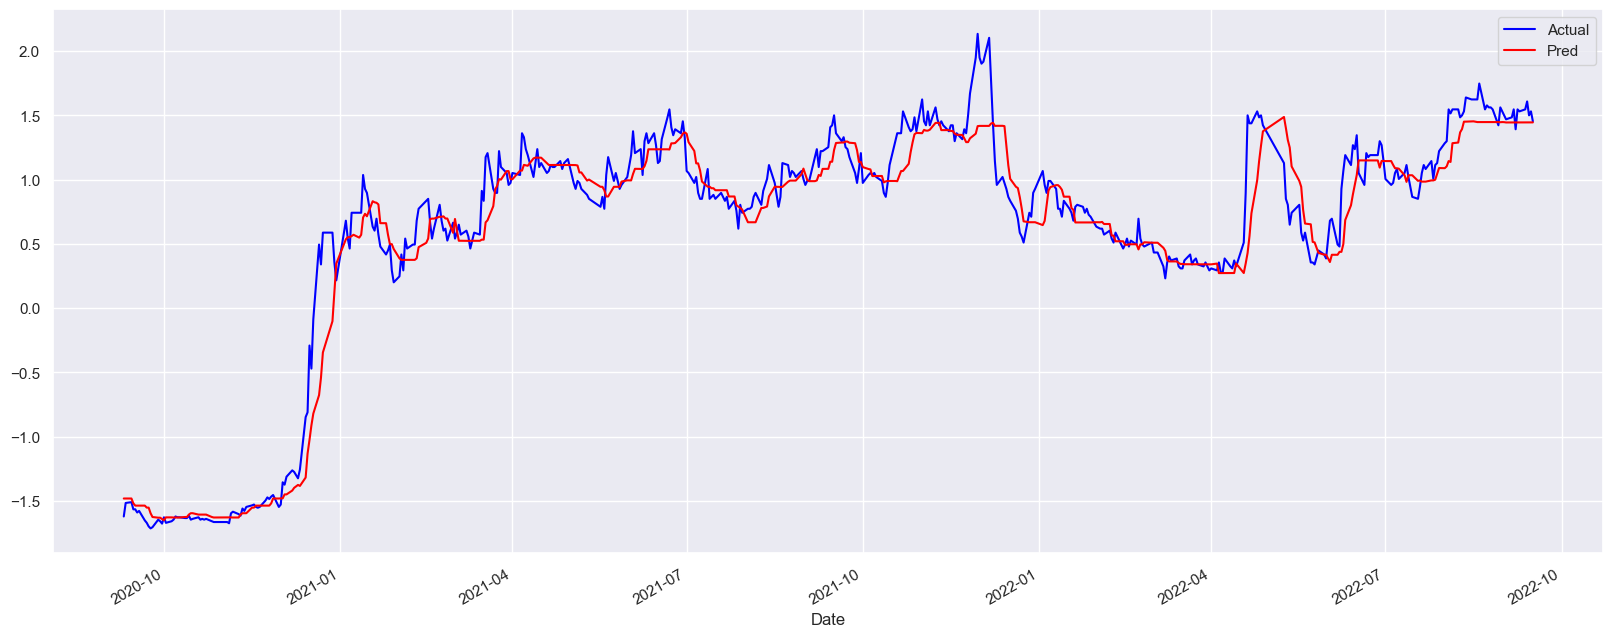

In [14]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [15]:
from joblib import load

In [16]:
close_scaler = load('../feature_engineering/isat_close_scaler.bin')

In [17]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [18]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2306.07666,2080.0
2020-09-11,2306.07666,2250.0


**Plot error distribution**

In [19]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

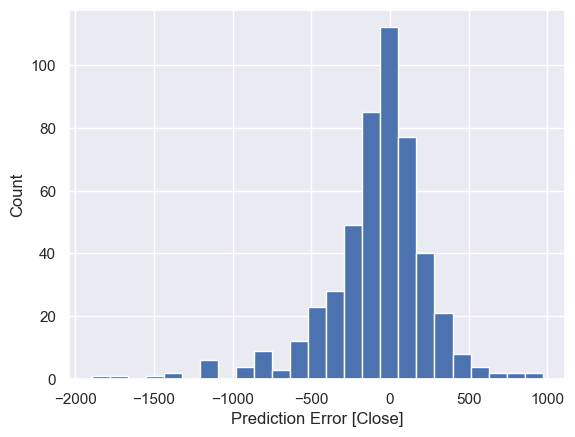

In [20]:
plotErrorHist(inversed)

**RMSE**

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
rmse(inversed['Pred'], inversed['Actual'])

346.67926741813665

**MAPE**

In [23]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
mape(inversed['Actual'], inversed['Pred'])

3.9915631872838473

**R-squared**

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9468768197941169

### Save Model

In [27]:
# Save model
model.save_model('./models/isat.json')